In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# load the data
data = pd.read_csv('D:\Downloads\-0Zaiku\genomic_benchmarks\datasets\human_nontata_promoters\train\/class_name.csv.gz', compression='gzip', header=0, sep='\t')

# plot the histogram
plt.hist(data['start'], bins=50)
plt.xlabel('Start Position')
plt.ylabel('Frequency')
plt.title('Distribution of Start Positions')
plt.show()


OSError: [Errno 22] Invalid argument: 'D:\\Downloads\\-0Zaiku\\genomic_benchmarks\\datasets\\human_nontata_promoters\train\\/class_name.csv.gz'

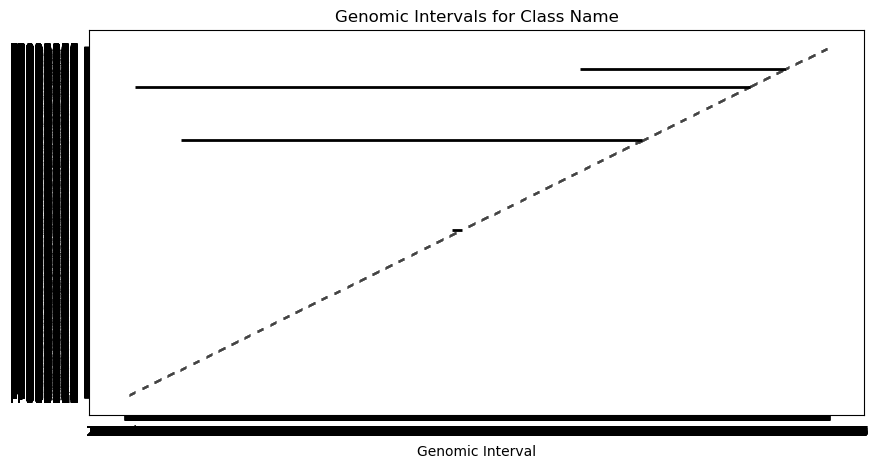

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file for the class
df = pd.read_csv("D:\\Downloads\\-0Zaiku\\genomic_benchmarks\\datasets\\human_nontata_promoters\\train\\positive.csv.gz", 
                 compression="gzip", 
                 header=None, 
                 names=["id", "region", "start", "end", "strand"])

# Plot the genomic intervals as horizontal bars
fig, ax = plt.subplots(figsize=(10, 5))

for index, row in df.iterrows():
    start = row["start"]
    end = row["end"]
    ax.hlines(y=index, xmin=start, xmax=end, colors='black', linewidth=2)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["id"])
ax.set_xlabel("Genomic Interval")
ax.set_title("Genomic Intervals for Class Name")

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file for the class
df = pd.read_csv("D:\\Downloads\\-0Zaiku\\genomic_benchmarks\\datasets\\human_nontata_promoters\\train\\negative.csv.gz", 
                 compression="gzip", 
                 header=None, 
                 names=["id", "region", "start", "end", "strand"])

# Plot the genomic intervals as horizontal bars
fig, ax = plt.subplots(figsize=(10, 5))

for index, row in df.iterrows():
    start = row["start"]
    end = row["end"]
    ax.hlines(y=index, xmin=start, xmax=end, colors='black', linewidth=2)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["id"])
ax.set_xlabel("Genomic Interval")
ax.set_title("Genomic Intervals for Negative")

plt.show()


In [10]:
import pandas as pd
import pybedtools
import matplotlib.pyplot as plt

# Read in the CSV file for the class
df = pd.read_csv("D:\\Downloads\\-0Zaiku\\genomic_benchmarks\\datasets\\human_nontata_promoters\\train\\positive.csv.gz", 
                 compression="gzip", 
                 header=None, 
                 names=["id", "region", "start", "end", "strand"])

# Convert the genomic intervals to a BED object
bed = pybedtools.BedTool.from_dataframe(df[["region", "start", "end", "id", ".", "strand"]])

# Merge overlapping intervals
merged_bed = bed.merge(d=100)

# Plot the merged genomic intervals as horizontal bars
fig, ax = plt.subplots(figsize=(10, 5))

for interval in merged_bed:
    start = interval.start
    end = interval.end
    ax.hlines(y=interval.name, xmin=start, xmax=end, colors='black', linewidth=2)

ax.set_yticks(range(len(merged_bed)))
ax.set_yticklabels(merged_bed.to_dataframe()["name"])
ax.set_xlabel("Genomic Interval")
ax.set_title("Genomic Intervals for Class Name")

plt.show()


ModuleNotFoundError: No module named 'pybedtools'

In [9]:
!pip install pybedtools

     ---------------------------------------- 12.5/12.5 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.0/4.0 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [28 lines of output]
  # pysam: no cython available - using pre-compiled C
  # pysam: htslib mode is shared
  # pysam: HTSLIB_CONFIGURE_OPTIONS=None
  '.' n'est pas reconnu en tant que commande interne
  ou externe, un programme ex‚cutable ou un fichier de commandes.
  '.' n'est pas reconnu en tant que commande interne
  ou externe, un programme ex‚cutable ou un fichier de commandes.
  makefile:131: htscodecs.mk: No such file or directory
  process_begin: CreateProcess(NULL, sh C:\Users\h\AppData\Local\Temp\pip-install-vxc7tm4z\pysam_b4d72225a6614230a736ba428cff416d\htslib\version.sh, ...) failed.
  process_begin: CreateProcess(NULL, sh C:\Users\h\AppData\Local\Temp\pip-install-vxc7tm4z\pysam_b4d72225a6614230a736ba428cff416d\htslib\version.sh numeric, ...) failed.
  process_begin: CreateProcess(NULL, uname -s, ...) failed.
  makefile:882: target `tags' given more than once 

In [13]:
import pandas as pd
import gffutils
import matplotlib.pyplot as plt

# Read in the CSV file for the class
df = pd.read_csv("D:\\Downloads\\-0Zaiku\\genomic_benchmarks\\datasets\\human_nontata_promoters\\train\\positive.csv.gz", 
                 compression="gzip", 
                 header=None, 
                 names=["id", "region", "start", "end", "strand"])

# Convert the genomic intervals to a BED object using gffutils
bed_lines = []
for index, row in df.iterrows():
    chrom = row["region"]
    start = row["start"]
    end = row["end"]
    name = row["id"]
    score = "."
    strand = row["strand"]
    bed_line = f"{chrom}\t{start}\t{end}\t{name}\t{score}\t{strand}"
    bed_lines.append(bed_line)
bed_string = "\n".join(bed_lines)
bed = gffutils.create_db(data=bed_string, dbfn="temp.db", force=True, keep_order=True)

# Merge overlapping intervals
merged_bed = []
current_interval = None
for interval in bed.features_of_type("region"):
    if not current_interval:
        current_interval = interval
    elif interval.start <= current_interval.end:
        current_interval = current_interval.merge(interval)
    else:
        merged_bed.append(current_interval)
        current_interval = interval
merged_bed.append(current_interval)

# Plot the merged genomic intervals as horizontal bars
fig, ax = plt.subplots(figsize=(10, 5))

for index, interval in enumerate(merged_bed):
    start = interval.start
    end = interval.end
    ax.hlines(y=index, xmin=start, xmax=end, colors='black', linewidth=2)

ax.set_yticks(range(len(merged_bed)))
ax.set_yticklabels([interval.attributes["ID"][0] for interval in merged_bed])
ax.set_xlabel("Genomic Interval")
ax.set_title("Genomic Intervals for Class Name")

plt.show()


ValueError: region	start	end	id	.	strand
chr8	42338283	42338534	FP008298	.	+
chr8	11201299	11201550	FP008075	.	-
chr1	13585401	13585652	FP000180	.	+
chr19	45602157	45602408	FP017418	.	-
chr12	54008771	54009022	FP012000	.	+
chr15	44458902	44459153	FP013768	.	+
chr11	107591029	107591280	FP011309	.	+
chr8	55762825	55763076	FP008335	.	-
chr3	136022671	136022922	FP004119	.	+
chr1	173207279	173207530	FP001532	.	-
chr6	129710111	129710362	FP006911	.	-
chr3	120908024	120908275	FP003980	.	+
chr5	176448184	176448435	FP006032	.	+
chr9	99221861	99222112	FP009129	.	-
chr14	78403521	78403772	FP013412	.	+
chr20	44960341	44960592	FP018144	.	-
chr16	90019442	90019693	FP015054	.	+
chr1	33256344	33256595	FP000477	.	+
chr10	45972371	45972622	FP009800	.	-
chr7	112206494	112206745	FP007747	.	+
chr7	105268999	105269250	FP007707	.	-
chr18	58862709	58862960	FP016410	.	+
chr8	91070143	91070394	FP008455	.	+
chr7	768279	768530	FP007129	.	+
chr11	64878559	64878810	FP010944	.	-
chr19	52570669	52570920	FP017639	.	+
chr19	33521738	33521989	FP017102	.	-
chr11	33039564	33039815	FP010670	.	+
chr1	155978496	155978747	FP001347	.	-
chr18	905052	905303	FP016183	.	+
chr3	25664852	25665103	FP003451	.	-
chr9	35665141	35665392	FP008894	.	-
chr22	37746065	37746316	FP018823	.	+
chr9	110089955	110090206	FP009179	.	+
chr1	204112800	204113051	FP001703	.	+
chr1	163071841	163072092	FP001472	.	+
chr1	61742250	61742501	FP000779	.	+
chr2	27356803	27357054	FP002134	.	-
chr20	18497155	18497406	FP017965	.	-
chr6	75633417	75633668	FP006705	.	+
chr18	58245261	58245512	FP016407	.	+
chr1	156815446	156815697	FP001385	.	+
chr5	36225489	36225740	FP005312	.	-
chr22	37519320	37519571	FP018815	.	-
chr12	57609971	57610222	FP012124	.	+
chr7	84195092	84195343	FP007518	.	-
chr7	146115913	146116164	FP007949	.	+
chr1	23393882	23394133	FP000302	.	-
chr1	119507009	119507260	FP001111	.	+
chr1	77683347	77683598	FP000854	.	-
chr10	27242049	27242300	FP009696	.	-
chr8	143291216	143291467	FP008654	.	+
chr6	137867429	137867680	FP006964	.	+
chr6	136822380	136822631	FP006958	.	+
chr2	50347745	50347996	FP002273	.	-
chr9	98255598	98255849	FP009120	.	-
chr2	206765277	206765528	FP003060	.	-
chr1	197067209	197067460	FP001630	.	-
chr10	7411439	7411690	FP009603	.	-
chr12	48119163	48119414	FP011867	.	+
chr1	1173631	1173882	FP000009	.	+
chr12	130839219	130839470	FP012582	.	-
chrX	72573028	72573279	FP019392	.	-
chr3	129439927	129440178	FP004078	.	+
chr9	93955304	93955555	FP009074	.	-
chr15	48178272	48178523	FP013788	.	-
chr11	75240531	75240782	FP011166	.	+
chr19	11435434	11435685	FP016805	.	+
chr12	81759154	81759405	FP012242	.	-
chr8	143716148	143716399	FP008672	.	+
chr19	15280393	15280644	FP016913	.	-
chr10	5890051	5890302	FP009594	.	+
chr2	218399694	218399945	FP003126	.	+
chr11	77994612	77994863	FP011196	.	-
chr12	3873315	3873566	FP011558	.	-
chr4	83010712	83010963	FP004825	.	-
chr11	31509555	31509806	FP010657	.	-
chr19	3094161	3094412	FP016580	.	+
chr7	114086126	114086377	FP007758	.	+
chr16	2267758	2268009	FP014305	.	-
chr16	58734226	58734477	FP014774	.	-
chr8	143541386	143541637	FP008658	.	-
chr3	50611679	50611930	FP003694	.	+
chr3	53045939	53046190	FP003744	.	-
chr1	151036412	151036663	FP001209	.	+
chr16	1943138	1943389	FP014281	.	-
chr6	72366545	72366796	FP006690	.	+
chr7	832402	832653	FP007131	.	+
chr6	44257461	44257712	FP006600	.	-
chr9	126376242	126376493	FP009316	.	+
chr20	18297863	18298114	FP017962	.	+
chr7	45027499	45027750	FP007381	.	+
chr16	726905	727156	FP014243	.	+
chr14	21477005	21477256	FP012997	.	+
chr9	37002624	37002875	FP008917	.	-
chr5	150357503	150357754	FP005906	.	+
chr17	75261678	75261929	FP015993	.	+
chr13	49585507	49585758	FP012793	.	-
chr12	108549167	108549418	FP012371	.	-
chr10	132336917	132337168	FP010347	.	+
chr15	66505125	66505376	FP013933	.	+
chr12	51026333	51026584	FP011923	.	-
chr6	96924473	96924724	FP006766	.	+
chr10	112951045	112951296	FP010227	.	+
chr6	7181828	7182079	FP006155	.	+
chr8	22023933	22024184	FP008137	.	+
chr19	50384142	50384393	FP017580	.	+
chr10	113679711	113679962	FP010233	.	+
chr2	96195382	96195633	FP002507	.	-
chr22	42720819	42721070	FP018920	.	-
chr13	44436803	44437054	FP012752	.	-
chr9	78031288	78031539	FP008990	.	-
chr9	93471093	93471344	FP009068	.	+
chr5	140691299	140691550	FP005790	.	-
chr1	223802744	223802995	FP001833	.	-
chr22	38057203	38057454	FP018831	.	+
chr12	125104815	125105066	FP012577	.	+
chr1	20661399	20661650	FP000266	.	-
chr16	30534823	30535074	FP014614	.	-
chrX	9033221	9033472	FP019062	.	-
chr16	87317341	87317592	FP014994	.	-
chr9	97633244	97633495	FP009108	.	+
chr1	182789251	182789502	FP001593	.	+
chr17	61591149	61591400	FP015867	.	-
chr5	177006292	177006543	FP006041	.	-
chr9	15510919	15511170	FP008787	.	-
chr11	27720490	27720741	FP010649	.	-
chrX	134990792	134991043	FP019638	.	+
chr12	55930961	55931212	FP012042	.	+
chr1	157045494	157045745	FP001390	.	-
chr2	218270086	218270337	FP003119	.	-
chr4	146945797	146946048	FP005076	.	-
chr15	80155870	80156121	FP014075	.	+
chr17	49414829	49415080	FP015772	.	-
chr12	53047049	53047300	FP011959	.	+
chr9	78235894	78236145	FP008991	.	+
chr14	58139199	58139450	FP013226	.	-
chr18	26549721	26549972	FP016286	.	-
chr16	55833063	55833314	FP014720	.	-
chr5	176899295	176899546	FP006040	.	-
chr14	88563366	88563617	FP013429	.	+
chr17	7043866	7044117	FP015195	.	-
chr10	102394294	102394545	FP010151	.	+
chr6	89080550	89080801	FP006750	.	+
chr20	5314549	5314800	FP017911	.	-
chr9	94640086	94640337	FP009081	.	-
chr15	81374195	81374446	FP014086	.	-
chr5	78360416	78360667	FP005499	.	+
chr11	70420212	70420463	FP011102	.	+
chr22	38201887	38202138	FP018835	.	+
chr21	41879283	41879534	FP018477	.	-
chr22	40177733	40177984	FP018872	.	+
chrX	136146546	136146797	FP019651	.	+
chr2	3575395	3575646	FP002001	.	+
chr17	69327082	69327333	FP015953	.	-
chr1	161749585	161749836	FP001462	.	+
chr12	91178426	91178677	FP012266	.	-
chr6	146027479	146027730	FP006998	.	+
chr2	64551402	64551653	FP002336	.	+
chr19	18919514	18919765	FP017009	.	+
chr1	213988110	213988361	FP001791	.	+
chrX	71215038	71215289	FP019374	.	+
chr9	97411895	97412146	FP009106	.	+
chr14	93294649	93294900	FP013471	.	-
chr1	169630070	169630321	FP001509	.	-
chr4	108004311	108004562	FP004945	.	+
chr9	92325299	92325550	FP009047	.	-
chr22	38872165	38872416	FP018854	.	-
chr8	130016586	130016837	FP008612	.	-
chr10	16817346	16817597	FP009650	.	-
chr6	122788602	122788853	FP006887	.	+
chr19	58150738	58150989	FP017807	.	-
chr6	54308249	54308500	FP006650	.	+
chr5	58999808	59000059	FP005389	.	-
chr4	42152650	42152901	FP004676	.	-
chr10	104641080	104641331	FP010199	.	+
chr5	181040033	181040284	FP006114	.	+
chr17	1724503	1724754	FP015088	.	+
chr1	202462324	202462575	FP001677	.	+
chr20	2652431	2652682	FP017862	.	+
chr2	177264648	177264899	FP002890	.	-
chr11	10751077	10751328	FP010557	.	+
chr2	38960302	38960553	FP002210	.	-
chr16	2970741	2970992	FP014330	.	+
chr7	44606389	44606640	FP007370	.	+
chr21	46458823	46459074	FP018548	.	+
chr8	123531916	123532167	FP008593	.	-
chr17	40035214	40035465	FP015562	.	-
chr17	81712151	81712402	FP016123	.	+
chr12	57050034	57050285	FP012093	.	-
chr4	86849002	86849253	FP004850	.	-
chr2	27663348	27663599	FP002150	.	-
chr9	136483342	136483593	FP009500	.	+
chr8	42193147	42193398	FP008296	.	-
chr1	109687643	109687894	FP001015	.	+
chr19	7762982	7763233	FP016698	.	+
chr2	27051467	27051718	FP002113	.	+
chr17	36534819	36535070	FP015499	.	+
chr7	151057838	151058089	FP007996	.	-
chr5	60945031	60945282	FP005398	.	+
chr10	11005127	11005378	FP009609	.	+
chr8	119638788	119639039	FP008573	.	-
chrY	13703290	13703541	FP019800	.	+
chr14	64549733	64549984	FP013283	.	+
chr6	168440979	168441230	FP007110	.	+
chr1	153963464	153963715	FP001265	.	-
chr6	43282758	43283009	FP006572	.	+
chr2	26244727	26244978	FP002099	.	+
chr19	38949977	38950228	FP017235	.	-
chr6	43229427	43229678	FP006570	.	-
chr5	151758580	151758831	FP005929	.	-
chr7	151086642	151086893	FP008005	.	+
chr3	4303168	4303419	FP003321	.	+
chr1	91500679	91500930	FP000918	.	+
chr7	27185181	27185432	FP007272	.	-
chr11	44950832	44951083	FP010727	.	-
chr17	47650792	47651043	FP015731	.	+
chr22	21642095	21642346	FP018622	.	+
chr11	118152732	118152983	FP011387	.	-
chr11	62727425	62727676	FP010885	.	-
chr5	39270625	39270876	FP005335	.	-
chr10	121517319	121517570	FP010285	.	-
chr16	57447315	57447566	FP014739	.	-
chr19	13795242	13795493	FP016879	.	+
chr16	74904331	74904582	FP014931	.	-
chr19	11924881	11925132	FP016820	.	+
chr3	16264892	16265143	FP003419	.	-
chr19	3708150	3708401	FP016601	.	+
chr16	2026701	2026952	FP014292	.	+
chr16	58001206	58001457	FP014761	.	+
chr6	3456393	3456644	FP006139	.	-
chr3	93979964	93980215	FP003851	.	+
chr1	64777635	64777886	FP000800	.	+
chr10	72203452	72203703	FP009902	.	-
chr8	55879624	55879875	FP008338	.	+
chr19	49119083	49119334	FP017534	.	-
chr9	83956691	83956942	FP009002	.	-
chr1	211675570	211675821	FP001773	.	-
chr10	101031078	101031329	FP010131	.	-
chr8	73093099	73093350	FP008398	.	-
chr1	148575620	148575871	FP001165	.	-
chr2	218568267	218568518	FP003130	.	-
chr1	3857160	3857411	FP000084	.	-
chr19	32691658	32691909	FP017090	.	+
chr14	49692919	49693170	FP013164	.	+
chr11	14520302	14520553	FP010586	.	-
chr2	218418922	218419173	FP003128	.	+
chr12	133037324	133037575	FP012607	.	+
chr13	98848531	98848782	FP012881	.	-
chr11	83194180	83194431	FP011213	.	+
chr19	58554960	58555211	FP017824	.	-
chr18	158387	158638	FP016174	.	+
chrX	149938423	149938674	FP019693	.	-
chr12	33439859	33440110	FP011810	.	-
chr5	15499982	15500233	FP005265	.	+
chr19	15232369	15232620	FP016911	.	-
chr6	2960130	2960381	FP006130	.	-
chr16	70356576	70356827	FP014896	.	+
chr6	30914060	30914311	FP006317	.	+
chr4	170089905	170090156	FP005156	.	-
chr2	47369110	47369361	FP002258	.	+
chr14	45134427	45134678	FP013152	.	-
chr2	210171325	210171576	FP003082	.	-
chr9	131276501	131276752	FP009429	.	-
chr16	56190913	56191164	FP014722	.	+
chr11	63681299	63681550	FP010906	.	+
chr1	185734170	185734421	FP001614	.	+
chr4	95091336	95091587	FP004888	.	+
chr7	44065553	44065804	FP007360	.	-
chr12	111681584	111681835	FP012425	.	-
chr9	28475961	28476212	FP008833	.	-
chr6	162727852	162728103	FP007092	.	+
chr2	234497007	234497258	FP003250	.	-
chr12	124914771	124915022	FP012574	.	-
chr8	142354583	142354834	FP008641	.	-
chr3	45915661	45915912	FP003579	.	-
chr22	42646921	42647172	FP018918	.	-
chr2	74553892	74554143	FP002433	.	-
chr11	59144664	59144915	FP010814	.	+
chr11	74170826	74171077	FP011152	.	-
chr3	14178636	14178887	FP003400	.	+
chr5	181243843	181244094	FP006118	.	-
chr7	27143663	27143914	FP007267	.	-
chr19	15010561	15010812	FP016906	.	+
chr11	73646134	73646385	FP011143	.	+
chr6	116100673	116100924	FP006851	.	+
chr14	102240562	102240813	FP013534	.	-
chr16	70173967	70174218	FP014885	.	+
chr15	55743044	55743295	FP013841	.	-
chr1	31763999	31764250	FP000438	.	-
chr2	101151331	101151582	FP002557	.	-
chr5	140800817	140801068	FP005795	.	+
chr4	98929074	98929325	FP004894	.	-
chr9	133703716	133703967	FP009467	.	-
chrX	73079705	73079956	FP019394	.	-
chr19	24033254	24033505	FP017072	.	+
chr2	173075648	173075899	FP002863	.	+
chr2	42792528	42792779	FP002230	.	-
chr3	33096750	33097001	FP003478	.	-
chr1	36306167	36306418	FP000513	.	+
chr3	183099445	183099696	FP004318	.	-
chr22	46150325	46150576	FP018970	.	+
chr19	54159667	54159918	FP017680	.	-
chr7	140641409	140641660	FP007909	.	-
chr5	35856710	35856961	FP005306	.	+
chr19	13953332	13953583	FP016885	.	-
chr8	141367232	141367483	FP008639	.	-
chr15	82647582	82647833	FP014096	.	-
chr11	62921532	62921783	FP010897	.	-
chr12	3077178	3077429	FP011554	.	+
chr7	150303012	150303263	FP007970	.	-
chr7	2242135	2242386	FP007145	.	-
chr11	1922632	1922883	FP010437	.	+
chr14	38207750	38208001	FP013134	.	+
chr1	93128437	93128688	FP000936	.	+
chr14	94452745	94452996	FP013484	.	-
chr19	55209450	55209701	FP017720	.	-
chr19	42301931	42302182	FP017327	.	+
chr16	24845794	24846045	FP014520	.	+
chr14	23286066	23286317	FP013025	.	-
chr3	39107479	39107730	FP003518	.	+
chr12	29641119	29641370	FP011788	.	-
chr17	3513797	3514048	FP015115	.	-
chr6	43431392	43431643	FP006577	.	+
chr8	132675507	132675758	FP008619	.	-
chr3	11225790	11226041	FP003368	.	+
chr1	156860665	156860916	FP001388	.	+
chr17	8162897	8163148	FP015262	.	-
chr16	649197	649448	FP014232	.	+
chr1	179143023	179143274	FP001569	.	-
chr2	110204941	110205192	FP002612	.	-
chr15	51242856	51243107	FP013809	.	-
chr7	12211126	12211377	FP007201	.	+
chr9	126613994	126614245	FP009317	.	+
chr6	116668729	116668980	FP006865	.	-
chr18	34493117	34493368	FP016306	.	+
chrX	63785466	63785717	FP019343	.	-
chr1	26169698	26169949	FP000356	.	+
chr13	96090400	96090651	FP012870	.	+
chr22	31160026	31160277	FP018745	.	+
chr1	115338185	115338436	FP001086	.	-
chr10	30999469	30999720	FP009711	.	-
chr6	38703094	38703345	FP006506	.	-
chr1	244461072	244461323	FP001960	.	+
chr12	3491011	3491262	FP011555	.	+
chr4	106316158	106316409	FP004937	.	-
chr9	93234657	93234908	FP009064	.	+
chr13	20566959	20567210	FP012627	.	+
chr3	125375217	125375468	FP004028	.	-
chr3	33113813	33114064	FP003480	.	+
chr17	38351851	38352102	FP015519	.	+
chr20	10673948	10674199	FP017931	.	-
chr19	39996859	39997110	FP017260	.	+
chrX	72277167	72277418	FP019389	.	-
chr22	30693664	30693915	FP018730	.	+
chr17	21214544	21214795	FP015388	.	-
chr10	128125572	128125823	FP010333	.	-
chr11	43311795	43312046	FP010711	.	+
chr2	107826721	107826972	FP002593	.	+
chr2	190180662	190180913	FP002947	.	+
chr4	27002852	27003103	FP004633	.	+
chr4	185656695	185656946	FP005195	.	-
chr19	55537097	55537348	FP017735	.	-
chr17	75878530	75878781	FP016019	.	-
chr12	123712141	123712392	FP012566	.	+
chr12	120302132	120302383	FP012482	.	+
chr16	28878265	28878516	FP014553	.	+
chr4	183504877	183505128	FP005180	.	+
chr4	129095924	129096175	FP005031	.	+
chr4	185295693	185295944	FP005193	.	+
chr10	21497206	21497457	FP009662	.	-
chr17	74736716	74736967	FP015971	.	+
chr2	61888563	61888814	FP002318	.	-
chr8	142834595	142834846	FP008647	.	+
chr3	49020251	49020502	FP003639	.	+
chr4	163494489	163494740	FP005132	.	+
chr22	17773964	17774215	FP018565	.	-
chr10	119596911	119597162	FP010277	.	-
chr10	73167957	73168208	FP009917	.	-
chr16	684274	684525	FP014236	.	-
chr12	6310520	6310771	FP011571	.	+
chr1	202808370	202808621	FP001681	.	-
chr10	116273562	116273813	FP010253	.	-
chr11	72080130	72080381	FP011117	.	+
chr21	44920824	44921075	FP018524	.	-
chr1	75786055	75786306	FP000846	.	+
chr2	200891127	200891378	FP003006	.	+
chr3	128994025	128994276	FP004064	.	-
chr19	53869129	53869380	FP017666	.	+
chr5	41904143	41904394	FP005344	.	+
chr2	27083454	27083705	FP002116	.	+
chr17	75515486	75515737	FP016003	.	-
chr2	214411712	214411963	FP003092	.	+
chr19	41882999	41883250	FP017316	.	+
chr10	132186749	132187000	FP010343	.	+
chr5	74866739	74866990	FP005479	.	-
chr15	50908498	50908749	FP013808	.	+
chr22	37560279	37560530	FP018817	.	+
chrX	154750997	154751248	FP019779	.	-
chr9	14779405	14779656	FP008782	.	-
chr7	100100475	100100726	FP007623	.	-
chr18	36187318	36187569	FP016327	.	+
chr6	83709048	83709299	FP006730	.	-
chr12	8612808	8613059	FP011647	.	-
chr3	138434385	138434636	FP004138	.	+
chr1	153678436	153678687	FP001255	.	+
chr2	186589833	186590084	FP002929	.	+
chr7	101245034	101245285	FP007674	.	-
chr15	73994515	73994766	FP013990	.	+
chr1	1246673	1246924	FP000015	.	-
chr4	82373940	82374191	FP004816	.	-
chr2	167818593	167818844	FP002821	.	+
chr2	190880620	190880871	FP002956	.	+
chr9	83980586	83980837	FP009006	.	+
chr21	33641690	33641941	FP018406	.	-
chr22	50474984	50475235	FP019006	.	-
chr6	36387717	36387968	FP006483	.	-
chr9	38596234	38596485	FP008934	.	-
chr12	109093421	109093672	FP012383	.	-
chr20	50691262	50691513	FP018217	.	-
chr13	19561471	19561722	FP012615	.	-
chr18	72543503	72543754	FP016452	.	-
chr2	177212559	177212810	FP002887	.	+
chr6	41072417	41072668	FP006516	.	-
chr19	3204372	3204623	FP016584	.	+
chr1	1000072	1000323	FP000006	.	-
chr17	59220347	59220598	FP015843	.	+
chr4	140756308	140756559	FP005050	.	-
chr19	49591317	49591568	FP017556	.	+
chr13	19181731	19181982	FP012614	.	-
chr20	36605578	36605829	FP018084	.	+
chr14	96039161	96039412	FP013496	.	+
chr9	130938713	130938964	FP009420	.	-
chr21	30613789	30614040	FP018376	.	-
chr16	1414644	1414895	FP014263	.	-
chr12	89524708	89524959	FP012259	.	-
chr19	55069460	55069711	FP017713	.	-
chr3	13548924	13549175	FP003393	.	+
chrX	10620517	10620768	FP019075	.	-
chr1	244864432	244864683	FP001963	.	-
chrX	78327560	78327811	FP019414	.	-
chr11	5324361	5324612	FP010475	.	-
chr17	4433723	4433974	FP015137	.	+
chr4	101347606	101347857	FP004908	.	+
chr3	111883613	111883864	FP003915	.	+
chr12	86838915	86839166	FP012252	.	-
chr12	9999070	9999321	FP011660	.	-
chr16	89701654	89701905	FP015037	.	-
chr2	180980159	180980410	FP002913	.	+
chr3	53882101	53882352	FP003752	.	-
chr17	47656779	47657030	FP015732	.	+
chr3	38454251	38454502	FP003513	.	+
chr17	49677945	49678196	FP015775	.	-
chr4	153759959	153760210	FP005107	.	-
chr2	206213387	206213638	FP003056	.	-
chr16	57025409	57025660	FP014730	.	+
chr13	114234852	114235103	FP012958	.	+
chr10	22320876	22321127	FP009669	.	+
chr11	76206451	76206702	FP011178	.	-
chr11	34632365	34632616	FP010692	.	+
chr17	5078279	5078530	FP015172	.	+
chr8	143597621	143597872	FP008665	.	-
chr8	38728007	38728258	FP008275	.	+
chr4	65669452	65669703	FP004743	.	-
chr6	30213312	30213563	FP006285	.	-
chr20	63865069	63865320	FP018324	.	+
chr1	40691633	40691884	FP000572	.	+
chr7	123748930	123749181	FP007799	.	-
chr9	37485747	37485998	FP008922	.	+
chr17	676369	676620	FP015059	.	-
chr14	102319545	102319796	FP013537	.	+
chr19	48619116	48619367	FP017504	.	+
chr15	55372899	55373150	FP013837	.	-
chr7	104207962	104208213	FP007703	.	-
chr18	24272164	24272415	FP016276	.	-
chr4	69760569	69760820	FP004753	.	-
chr6	161091064	161091315	FP007090	.	+
chr19	15232852	15233103	FP016912	.	-
chr19	11194472	11194723	FP016790	.	-
chr2	86720098	86720349	FP002484	.	+
chrX	48898033	48898284	FP019257	.	+
chr20	16729828	16730079	FP017944	.	+
chr22	38755395	38755646	FP018851	.	-
chr2	100819948	100820199	FP002554	.	+
chr1	204359872	204360123	FP001706	.	-
chr9	66153067	66153318	FP008938	.	-
chr10	73791666	73791917	FP009937	.	+
chr22	37244208	37244459	FP018809	.	-
chr4	1856048	1856299	FP004492	.	-
chr11	93741482	93741733	FP011255	.	+
chr9	37800596	37800847	FP008929	.	+
chr17	7394794	7395045	FP015221	.	-
chr8	42541608	42541859	FP008304	.	+
chr7	116499897	116500148	FP007766	.	+
chr10	97390748	97390999	FP010079	.	-
chr15	94231360	94231611	FP014175	.	+
chr2	118014019	118014270	FP002642	.	-
chr22	43187083	43187334	FP018931	.	-
chr15	45634578	45634829	FP013781	.	+
chr13	32538741	32538992	FP012697	.	-
chr5	62412575	62412826	FP005403	.	+
chr11	47176815	47177066	FP010761	.	-
chr2	9630946	9631197	FP002016	.	-
chr22	50532447	50532698	FP019013	.	-
chr3	121660865	121661116	FP003984	.	-
chr1	183590444	183590695	FP001597	.	-
chr1	184386860	184387111	FP001605	.	+
chr1	173992839	173993090	FP001541	.	-
chr6	28252218	28252469	FP006262	.	-
chr1	198638894	198639145	FP001639	.	+
chr1	35631293	35631544	FP000495	.	-
chr3	119597684	119597935	FP003967	.	+
chr15	28885806	28886057	FP013621	.	+
chr7	117323007	117323258	FP007778	.	-
chr4	1309698	1309949	FP004484	.	+
chr1	155990033	155990284	FP001350	.	-
chr5	72107276	72107527	FP005457	.	+
chr8	55102485	55102736	FP008334	.	+
chr5	149379145	149379396	FP005890	.	-
chr16	31459309	31459560	FP014662	.	+
chr11	6473991	6474242	FP010495	.	-
chr4	152348592	152348843	FP005096	.	-
chr3	48465629	48465880	FP003618	.	+
chr6	31494711	31494962	FP006333	.	+
chr13	71867153	71867404	FP012825	.	-
chr22	36028450	36028701	FP018786	.	-
chr2	66434968	66435219	FP002345	.	+
chr21	36990160	36990411	FP018436	.	-
chr1	28552885	28553136	FP000409	.	+
chr1	17053974	17054225	FP000222	.	-
chr3	142028575	142028826	FP004161	.	-
chr7	92528403	92528654	FP007561	.	-
chr12	1690869	1691120	FP011543	.	+
chr17	3592104	3592355	FP015117	.	-
chr12	49094771	49095022	FP011890	.	-
chr2	20327257	20327508	FP002062	.	-
chr1	110390975	110391226	FP001026	.	-
chr17	2303465	2303716	FP015101	.	-
chr6	24911042	24911293	FP006235	.	-
chr1	20765435	20765686	FP000269	.	-
chr10	12349378	12349629	FP009622	.	+
chr19	11346339	11346590	FP016798	.	+
chr11	12286842	12287093	FP010569	.	+
chr3	98732087	98732338	FP003865	.	+
chr16	71230650	71230901	FP014903	.	-
chr17	48054509	48054760	FP015743	.	+
chr20	1184367	1184618	FP017842	.	-
chr12	6867964	6868215	FP011611	.	+
chr2	157325351	157325602	FP002771	.	-
chr4	48986074	48986325	FP004703	.	+
chr6	38639869	38640120	FP006505	.	-
chr1	154272439	154272690	FP001282	.	+
chr10	123891783	123892034	FP010308	.	-
chr3	48479306	48479557	FP003620	.	-
chr16	66366435	66366686	FP014776	.	+
chr9	124940942	124941193	FP009303	.	-
chr10	102395534	102395785	FP010152	.	+
chr4	77819317	77819568	FP004800	.	-
chr11	10857985	10858236	FP010560	.	-
chr1	203128087	203128338	FP001690	.	+
chr17	29930126	29930377	FP015446	.	-
chr18	58948030	58948281	FP016414	.	+
chr19	1065708	1065959	FP016511	.	+
chr6	128882969	128883220	FP006910	.	+
chr19	48364258	48364509	FP017493	.	+
chr12	104303538	104303789	FP012347	.	+
chr6	36547416	36547667	FP006485	.	-
chr6	83707816	83708067	FP006728	.	-
chr11	86069807	86070058	FP011231	.	-
chr3	100114738	100114989	FP003871	.	+
chr11	64810635	64810886	FP010942	.	-
chr10	74826399	74826650	FP009948	.	+
chr4	67558547	67558798	FP004746	.	+
chr6	111873401	111873652	FP006841	.	-
chr12	8513288	8513539	FP011644	.	+
chr5	75337036	75337287	FP005481	.	+
chr20	325342	325593	FP017830	.	+
chr10	123135837	123136088	FP010305	.	+
chr6	157324039	157324290	FP007059	.	-
chr17	44899352	44899603	FP015689	.	-
chr8	73297071	73297322	FP008399	.	+
chr14	95157478	95157729	FP013492	.	-
chr1	56965964	56966215	FP000762	.	-
chr7	44748646	44748897	FP007374	.	+
chr6	108848238	108848489	FP006812	.	+
chr16	56729928	56730179	FP014726	.	+
chr14	61476938	61477189	FP013261	.	+
chr3	48635410	48635661	FP003628	.	-
chr7	101238853	101239104	FP007673	.	-
chr7	107044505	107044756	FP007719	.	+
chr12	12071273	12071524	FP011686	.	+
chr14	69726674	69726925	FP013320	.	+
chr11	44066056	44066307	FP010717	.	+
chr7	100168566	100168817	FP007635	.	-
chr7	192561	192812	FP007122	.	+
chr6	149896079	149896330	FP007021	.	-
chr1	87328281	87328532	FP000899	.	+
chr22	38318242	38318493	FP018840	.	-
chr8	73972235	73972486	FP008405	.	-
chrX	1452824	1453075	FP019034	.	-
chr1	152786003	152786254	FP001244	.	+
chr5	149520237	149520488	FP005891	.	-
chr12	104138152	104138403	FP012344	.	-
chr3	10816027	10816278	FP003364	.	+
chr4	76251529	76251780	FP004792	.	+
chr3	49422403	49422654	FP003655	.	-
chr16	69762131	69762382	FP014881	.	+
chr11	74462129	74462380	FP011157	.	-
chr7	37740286	37740537	FP007330	.	+
chr21	44928667	44928918	FP018525	.	-
chr9	124938598	124938849	FP009302	.	-
chr17	74326025	74326276	FP015966	.	+
chr4	99435253	99435504	FP004898	.	-
chr20	13221569	13221820	FP017936	.	+
chrX	101078672	101078923	FP019451	.	+
chr10	96043382	96043633	FP010065	.	+
chr2	46616976	46617227	FP002249	.	-
chr4	54657756	54658007	FP004717	.	+
chr8	28890455	28890706	FP008220	.	+
chr3	72996610	72996861	FP003834	.	+
chr2	46915968	46916219	FP002255	.	+
chr21	33589112	33589363	FP018405	.	-
chr1	94820156	94820407	FP000949	.	+
chr1	154627878	154628129	FP001293	.	-
chr4	2242070	2242321	FP004502	.	-
chr9	137227301	137227552	FP009538	.	+
chr22	44024101	44024352	FP018941	.	+
chr6	142147062	142147313	FP006978	.	+
chr6	97282503	97282754	FP006767	.	-
chr20	1325706	1325957	FP017847	.	-
chr9	35618343	35618594	FP008891	.	-
chr20	4686255	4686506	FP017901	.	+
chrX	119871668	119871919	FP019570	.	-
chr21	32278975	32279226	FP018382	.	-
chr16	57185988	57186239	FP014735	.	-
chr11	85811090	85811341	FP011226	.	-
chr20	63707872	63708123	FP018318	.	-
chr11	13668488	13668739	FP010581	.	+
chr2	165953734	165953985	FP002817	.	-
chr4	106316600	106316851	FP004939	.	-
chr1	150697103	150697354	FP001199	.	-
chr9	75028364	75028615	FP008979	.	-
chr6	37005498	37005749	FP006494	.	+
chr20	33282979	33283230	FP018028	.	+
chr20	52192134	52192385	FP018228	.	-
chr5	72955870	72956121	FP005463	.	+
chr3	39809408	39809659	FP003526	.	+
chr6	110958542	110958793	FP006833	.	+
chr1	165698514	165698765	FP001479	.	-
chr7	92000648	92000899	FP007553	.	+
chr19	38387977	38388228	FP017218	.	-
chr5	60945000	60945251	FP005397	.	-
chr15	81291573	81291824	FP014084	.	+
chr6	26364997	26365248	FP006244	.	+
chr18	2655686	2655937	FP016186	.	+
chr17	4710444	4710695	FP015146	.	+
chr15	79971132	79971383	FP014070	.	-
chr1	185045288	185045539	FP001608	.	+
chr1	159924541	159924792	FP001415	.	-
chr11	5596436	5596687	FP010479	.	+
chr7	102611480	102611731	FP007685	.	-
chr3	112974987	112975238	FP003927	.	-
chr22	40346328	40346579	FP018873	.	+
chr17	81923651	81923902	FP016135	.	-
chr14	75063964	75064215	FP013374	.	-
chr12	132206044	132206295	FP012590	.	-
chr4	95548922	95549173	FP004889	.	-
chr20	44531674	44531925	FP018137	.	+
chr17	2303734	2303985	FP015102	.	-
chr16	67279331	67279582	FP014817	.	+
chr4	95051385	95051636	FP004887	.	+
chr3	8769432	8769683	FP003330	.	-
chr11	65181834	65182085	FP010963	.	+
chr9	130835066	130835317	FP009418	.	+
chr6	44127428	44127679	FP006594	.	+
chr12	62501500	62501751	FP012151	.	+
chr14	87992948	87993199	FP013421	.	-
chr2	206765394	206765645	FP003061	.	+
chr3	113838685	113838936	FP003941	.	+
chr2	27119077	27119328	FP002119	.	-
chr4	2468905	2469156	FP004507	.	+
chr2	38778016	38778267	FP002207	.	+
chr17	35981421	35981672	FP015496	.	-
chr4	1938921	1939172	FP004497	.	+
chr15	58771101	58771352	FP013859	.	+
chr17	5486368	5486619	FP015180	.	+
chr9	76441594	76441845	FP008983	.	+
chr1	226309673	226309924	FP001854	.	-
chr12	15221366	15221617	FP011714	.	-
chr8	145052274	145052525	FP008730	.	+
chr4	82891092	82891343	FP004823	.	-
chr20	58309514	58309765	FP018254	.	+
chr2	49154464	49154715	FP002272	.	-
chr1	169367755	169368006	FP001505	.	+
chr17	78146184	78146435	FP016069	.	+
chr7	102611449	102611700	FP007688	.	-
chr8	144358648	144358899	FP008701	.	+
chr3	50328137	50328388	FP003683	.	-
chr4	112145217	112145468	FP004967	.	+
chr5	93741329	93741580	FP005545	.	-
chr12	989837	990088	FP011537	.	-
chr12	70242829	70243080	FP012201	.	+
chr11	65611029	65611280	FP010980	.	-
chr3	99817661	99817912	FP003869	.	+
chr16	67628208	67628459	FP014831	.	+
chr12	82358336	82358587	FP012243	.	-
chr6	28080998	28081249	FP006257	.	+
chr12	106357611	106357862	FP012355	.	+
chr9	137070506	137070757	FP009525	.	-
chr9	61853916	61854167	FP008939	.	+
chr4	109302116	109302367	FP004953	.	-
chr12	65121513	65121764	FP012170	.	-
chr12	108598033	108598284	FP012373	.	-
chr18	79400128	79400379	FP016471	.	+
chr12	70337314	70337565	FP012203	.	+
chr19	55113626	55113877	FP017716	.	-
chr1	32872430	32872681	FP000472	.	-
chr1	1374693	1374944	FP000028	.	-
chr5	140965883	140966134	FP005803	.	+
chr8	143973478	143973729	FP008683	.	-
chr3	149209177	149209428	FP004185	.	-
chrX	47190646	47190897	FP019214	.	+
chr1	65420467	65420718	FP000809	.	+
chr19	11238064	11238315	FP016794	.	-
chr11	8081010	8081261	FP010522	.	+
chr16	25257456	25257707	FP014523	.	-
chr17	42561970	42562221	FP015616	.	+
chr11	62646553	62646804	FP010876	.	-
chr11	66975103	66975354	FP011042	.	+
chr1	145995857	145996108	FP001134	.	-
chr19	9140196	9140447	FP016724	.	+
chr2	156330164	156330415	FP002766	.	-
chr15	34318721	34318972	FP013647	.	-
chr7	42237156	42237407	FP007344	.	-
chr11	61362211	61362462	FP010842	.	-
chr7	75789741	75789992	FP007475	.	-
chr13	85799297	85799548	FP012857	.	-
chr8	120445099	120445350	FP008578	.	-
chr7	18086741	18086992	FP007220	.	+
chr17	7306844	7307095	FP015214	.	+
chr8	53880815	53881066	FP008330	.	+
chr17	81871286	81871537	FP016128	.	-
chr3	58332726	58332977	FP003780	.	+
chr1	3857066	3857317	FP000085	.	+
chr13	99258350	99258601	FP012889	.	-
chr1	92694335	92694586	FP000929	.	-
chr16	68085176	68085427	FP014855	.	+
chr12	47770983	47771234	FP011857	.	-
chr10	75401731	75401982	FP009954	.	-
chr17	42288027	42288278	FP015609	.	+
chr8	124372649	124372900	FP008596	.	-
chrX	120603911	120604162	FP019582	.	+
chr19	53538222	53538473	FP017658	.	+
chr2	101859550	101859801	FP002565	.	+
chr6	83193933	83194184	FP006725	.	-
chr17	47831488	47831739	FP015734	.	+
chr8	67064167	67064418	FP008377	.	+
chr9	4145133	4145384	FP008746	.	-
chr17	40126068	40126319	FP015569	.	+
chr17	76385091	76385342	FP016033	.	+
chr22	24245102	24245353	FP018652	.	-
chr2	169069359	169069610	FP002827	.	+
chr15	65642678	65642929	FP013921	.	+
chr21	38256768	38257019	FP018453	.	+
chrX	103255126	103255377	FP019486	.	-
chr10	97713542	97713793	FP010096	.	+
chr17	51120817	51121068	FP015797	.	-
chr6	20212402	20212653	FP006219	.	-
chr5	122312036	122312287	FP005636	.	+
chr11	104968524	104968775	FP011298	.	-
chr2	68157476	68157727	FP002351	.	-
chr19	57351101	57351352	FP017774	.	+
chr15	72474129	72474380	FP013980	.	+
chr4	99563968	99564219	FP004900	.	-
chr15	64162937	64163188	FP013889	.	-
chr7	103074517	103074768	FP007693	.	-
chr22	48489227	48489478	FP018982	.	+
chr5	75511562	75511813	FP005482	.	-
chr5	175657814	175658065	FP006022	.	+
chr11	20055383	20055634	FP010625	.	+
chr5	55853316	55853567	FP005379	.	+
chr3	57227565	57227816	FP003768	.	+
chr8	123416573	123416824	FP008592	.	+
chr10	127736949	127737200	FP010330	.	+
chr15	41513803	41514054	FP013708	.	-
chr14	71587124	71587375	FP013329	.	+
chr11	12377370	12377621	FP010570	.	+
chr7	76480366	76480617	FP007490	.	+
chr16	14630157	14630408	FP014430	.	-
chr10	49538989	49539240	FP009795	.	-
chr12	110124213	110124464	FP012404	.	+
chr15	74433907	74434158	FP014000	.	-
chr11	34915956	34916207	FP010693	.	+
chr4	5525126	5525377	FP004540	.	+
chr3	124094520	124094771	FP004017	.	+
chr7	23140673	23140924	FP007241	.	+
chr7	155700576	155700827	FP008031	.	+
chr7	148698702	148698953	FP007951	.	+
chr6	11232617	11232868	FP006183	.	-
chr2	183078556	183078807	FP002925	.	+
chr20	46376702	46376953	FP018175	.	-
chr19	2096219	2096470	FP016550	.	-
chr11	72041071	72041322	FP011116	.	-
chr10	94088839	94089090	FP010051	.	+
chr22	41560920	41561171	FP018894	.	+
chr14	73760044	73760295	FP013348	.	-
chr12	103930209	103930460	FP012339	.	+
chr1	84302418	84302669	FP000879	.	+
chr17	28854815	28855066	FP015428	.	+
chr17	6070894	6071145	FP015184	.	+
chr11	34051531	34051782	FP010682	.	+
chr9	1050156	1050407	FP008738	.	+
chr16	1612001	1612252	FP014269	.	-
chrX	71618460	71618711	FP019386	.	-
chr3	194351251	194351502	FP004407	.	-
chr2	204545793	204546044	FP003050	.	+
chr10	103396413	103396664	FP010176	.	-
chr16	3283322	3283573	FP014348	.	+
chr19	21396959	21397210	FP017056	.	+
chrX	40097412	40097663	FP019185	.	-
chr10	96832097	96832348	FP010071	.	+
chr1	111989155	111989406	FP001051	.	-
chr6	35214205	35214456	FP006466	.	+
chrX	15854762	15855013	FP019108	.	-
chr7	151058124	151058375	FP007997	.	+
chr9	35732121	35732372	FP008898	.	+
chr9	34654864	34655115	FP008874	.	+
chr3	189631178	189631429	FP004391	.	+
chrX	103376337	103376588	FP019490	.	+
chr1	64470647	64470898	FP000798	.	+
chr3	58537139	58537390	FP003783	.	-
chr11	102452785	102453036	FP011292	.	-
chr10	113126676	113126927	FP010229	.	+
chr2	169584139	169584390	FP002831	.	+
chr11	20387515	20387766	FP010628	.	+
chrX	107118771	107119022	FP019512	.	-
chr7	140176995	140177246	FP007902	.	-
chr17	67044367	67044618	FP015928	.	+
chr19	34481556	34481807	FP017112	.	+
chr2	41953707	41953958	FP002221	.	-
chr7	130486143	130486394	FP007845	.	+
chr19	48637314	48637565	FP017509	.	-
chr2	208254372	208254623	FP003071	.	-
chr19	34404196	34404447	FP017109	.	+
chr1	111619627	111619878	FP001047	.	+
chr9	135500489	135500740	FP009479	.	+
chr1	203764982	203765233	FP001698	.	+
chr16	20806393	20806644	FP014485	.	-
chr6	31862753	31863004	FP006371	.	-
chr7	149262020	149262271	FP007963	.	+
chr3	182793284	182793535	FP004316	.	+
chr3	100334556	100334807	FP003873	.	+
chr1	231337848	231338099	FP001905	.	+
chr6	39314368	39314619	FP006509	.	-
chr17	3475805	3476056	FP015114	.	+
chr4	145097695	145097946	FP005063	.	+
chr14	24311374	24311625	FP013073	.	-
chr1	217089802	217090053	FP001800	.	-
chr17	77450548	77450799	FP016058	.	+
chr19	10928569	10928820	FP016782	.	-
chr19	32972071	32972322	FP017094	.	+
chr15	37098150	37098401	FP013657	.	-
chr12	108320601	108320852	FP012368	.	-
chr20	57709964	57710215	FP018251	.	-
chr2	135741654	135741905	FP002721	.	+
chr13	49451384	49451635	FP012790	.	+
chr19	8577391	8577642	FP016717	.	-
chr17	76726555	76726806	FP016042	.	-
chr6	163414519	163414770	FP007093	.	+
chr18	32772894	32773145	FP016303	.	-
chr20	35226573	35226824	FP018056	.	+
chr1	15764954	15765205	FP000202	.	+
chr3	196942472	196942723	FP004435	.	-
chr6	43172219	43172470	FP006568	.	+
chr1	40092455	40092706	FP000558	.	-
chr16	20770029	20770280	FP014484	.	+
chr1	25871010	25871261	FP000348	.	-
chr6	34757329	34757580	FP006460	.	+
chr10	87094838	87095089	FP009990	.	-
chr14	52951123	52951374	FP013200	.	-
chr3	155080118	155080369	FP004214	.	+
chr2	47835819	47836070	FP002263	.	-
chr6	127343473	127343724	FP006906	.	-
chr1	42335181	42335432	FP000584	.	-
chr2	32265778	32266029	FP002179	.	-
chr17	8176329	8176580	FP015263	.	-
chr5	55534913	55535164	FP005377	.	-
chr15	44676788	44677039	FP013772	.	-
chr22	18077797	18078048	FP018571	.	+
chr3	52528487	52528738	FP003729	.	-
chr11	77820671	77820922	FP011194	.	-
chr1	70354640	70354891	FP000836	.	+
chr18	43115634	43115885	FP016335	.	-
chr10	47523633	47523884	FP009778	.	-
chr16	19884820	19885071	FP014475	.	-
chr12	39619926	39620177	FP011816	.	-
chr15	82540406	82540657	FP014090	.	-
chr2	86563392	86563643	FP002482	.	-
chr16	66988388	66988639	FP014795	.	+
chr19	14419290	14419541	FP016895	.	-
chr17	36544731	36544982	FP015501	.	+
chr1	26317994	26318245	FP000363	.	-
chr4	140343260	140343511	FP005045	.	+
chr12	94262424	94262675	FP012284	.	+
chr1	22653062	22653313	FP000292	.	+
chr18	48950698	48950949	FP016361	.	-
chr2	73702029	73702280	FP002404	.	-
chr12	49707354	49707605	FP011902	.	-
chr2	24360485	24360736	FP002080	.	-
chr20	49278006	49278257	FP018203	.	-
chr7	37449433	37449684	FP007329	.	-
chr4	158172974	158173225	FP005120	.	-
chr16	4272817	4273068	FP014364	.	-
chr11	57761659	57761910	FP010808	.	+
chr5	140043221	140043472	FP005766	.	-
chr9	127897357	127897608	FP009343	.	-
chr7	77798375	77798626	FP007500	.	-
chr7	130205350	130205601	FP007840	.	-
chr11	65712423	65712674	FP010988	.	+
chr19	7515902	7516153	FP016683	.	+
chr17	47957838	47958089	FP015740	.	-
chr5	67004454	67004705	FP005425	.	+
chr17	28951402	28951653	FP015432	.	-
chr5	115625963	115626214	FP005616	.	-
chr4	17577296	17577547	FP004598	.	+
chr6	87322409	87322660	FP006742	.	+
chr19	22286469	22286720	FP017061	.	+
chr12	93378435	93378686	FP012273	.	+
chr20	18057871	18058122	FP017956	.	-
chr5	179698172	179698423	FP006087	.	+
chr8	22565546	22565797	FP008158	.	+
chr6	63572327	63572578	FP006670	.	+
chr10	48685041	48685292	FP009790	.	+
chr16	31010296	31010547	FP014639	.	-
chr12	68963214	68963465	FP012188	.	-
chr11	36594622	36594873	FP010707	.	+
chr13	23180778	23181029	FP012638	.	+
chr17	74893716	74893967	FP015978	.	-
chr4	176792871	176793122	FP005171	.	-
chr6	107490052	107490303	FP006800	.	+
chr2	218831752	218832003	FP003137	.	-
chr5	157296575	157296826	FP005950	.	+
chr12	16346914	16347165	FP011721	.	+
chr2	240435505	240435756	FP003283	.	+
chr21	36699245	36699496	FP018433	.	+
chr17	41771781	41772032	FP015590	.	-
chrX	74614557	74614808	FP019400	.	-
chr1	172444018	172444269	FP001529	.	-
chr2	178451082	178451333	FP002901	.	-
chr20	34558517	34558768	FP018043	.	+
chr18	72867429	72867680	FP016453	.	-
chr5	180591476	180591727	FP006106	.	-
chr3	142149450	142149701	FP004162	.	-
chr3	32238479	32238730	FP003471	.	+
chr12	116738114	116738365	FP012456	.	+
chrX	78104047	78104298	FP019411	.	+
chr16	67999256	67999507	FP014852	.	-
chr3	161105238	161105489	FP004254	.	-
chr5	179907834	179908085	FP006098	.	-
chr19	54616947	54617198	FP017702	.	+
chr5	65624269	65624520	FP005414	.	-
chr17	76585967	76586218	FP016039	.	-
chr5	127030507	127030758	FP005654	.	-
chr2	153478617	153478868	FP002763	.	-
chr11	3706542	3706793	FP010463	.	-
chr1	46394139	46394390	FP000678	.	+
chr1	206612413	206612664	FP001736	.	-
chr10	21174040	21174291	FP009661	.	-
chr14	24095074	24095325	FP013047	.	-
chr7	90213748	90213999	FP007542	.	+
chr4	83035000	83035251	FP004827	.	+
chr10	24722190	24722441	FP009681	.	-
chr7	136868884	136869135	FP007877	.	+
chr2	186486124	186486375	FP002928	.	+
chr3	129249431	129249682	FP004073	.	+
chr17	29294097	29294348	FP015439	.	-
chr4	128811119	128811370	FP005028	.	+
chr10	114404719	114404970	FP010243	.	-
chr17	2029954	2030205	FP015093	.	+
chr3	178536235	178536486	FP004295	.	+
chr19	49453072	49453323	FP017549	.	+
chr5	80654932	80655183	FP005514	.	-
chr16	28292324	28292575	FP014534	.	+
chr20	35615636	35615887	FP018064	.	+
chr1	154154916	154155167	FP001273	.	-
chr15	65356226	65356477	FP013911	.	-
chr14	100381776	100382027	FP013524	.	+
chr11	84273280	84273531	FP011216	.	-
chr9	105447922	105448173	FP009156	.	+
chr2	27582881	27583132	FP002147	.	+
chr2	131104482	131104733	FP002701	.	+
chr13	19958300	19958551	FP012621	.	+
chr8	80485454	80485705	FP008427	.	+
chr3	122184178	122184429	FP003991	.	+
chr1	173824472	173824723	FP001537	.	+
chr17	74736425	74736676	FP015970	.	+
chr3	49132968	49133219	FP003647	.	-
chr1	63593197	63593448	FP000795	.	+
chr6	44000376	44000627	FP006592	.	+
chr1	229626006	229626257	FP001890	.	+
chr1	25543406	25543657	FP000340	.	+
chr14	104800353	104800604	FP013572	.	+
chr17	36948785	36949036	FP015504	.	+
chr2	70257534	70257785	FP002371	.	+
chr3	126523954	126524205	FP004042	.	+
chr17	31936817	31937068	FP015466	.	+
chr10	119542662	119542913	FP010276	.	-
chrX	153793958	153794209	FP019742	.	+
chr20	57351054	57351305	FP018246	.	+
chr5	138543114	138543365	FP005747	.	-
chr15	64093849	64094100	FP013886	.	-
chr7	94909904	94910155	FP007577	.	+
chr12	16606111	16606362	FP011723	.	-
chr14	55411779	55412030	FP013217	.	-
chrX	18984335	18984586	FP019125	.	-
chr10	1056601	1056852	FP009570	.	+
chr17	7932007	7932258	FP015255	.	+
chr9	84669568	84669819	FP009010	.	+
chr22	30667824	30668075	FP018729	.	-
chr8	23084157	23084408	FP008171	.	+
chr1	1421294	1421545	FP000034	.	-
chr1	114669954	114670205	FP001080	.	-
chr1	23838605	23838856	FP000314	.	-
chr22	20507851	20508102	FP018604	.	+
chr19	2282124	2282375	FP016558	.	-
chr18	57586628	57586879	FP016400	.	-
chr8	30442379	30442630	FP008230	.	+
chr17	35147486	35147737	FP015484	.	+
chr14	37594214	37594465	FP013132	.	-
chr16	71289671	71289922	FP014905	.	-
chr19	40466860	40467111	FP017275	.	+
chr1	19485482	19485733	FP000242	.	-
chr4	185678769	185679020	FP005196	.	-
chr5	177472791	177473042	FP006057	.	-
chr1	33181990	33182241	FP000476	.	-
chr11	57335792	57336043	FP010795	.	-
chr19	13764360	13764611	FP016877	.	+
chr5	151686864	151687115	FP005928	.	-
chrX	102711830	102712081	FP019478	.	+
chr5	35991319	35991570	FP005308	.	-
chr1	211346169	211346420	FP001770	.	+
chr10	104338367	104338618	FP010198	.	-
chr10	60778277	60778528	FP009839	.	+
chr3	178419081	178419332	FP004294	.	+
chr5	37183418	37183669	FP005318	.	-
chr12	85280019	85280270	FP012250	.	+
chr12	121260267	121260518	FP012502	.	-
chr9	20820213	20820464	FP008809	.	+
chr1	110631416	110631667	FP001028	.	-
chr4	70721778	70722029	FP004756	.	+
chr19	695393	695644	FP016493	.	-
chr17	19312818	19313069	FP015365	.	+
chr2	188292627	188292878	FP002935	.	+
chr12	4321012	4321263	FP011560	.	+
chr17	28950415	28950666	FP015431	.	-
chr16	67163146	67163397	FP014803	.	+
chr1	205750131	205750382	FP001725	.	-
chr16	19718156	19718407	FP014473	.	-
chr3	58433778	58434029	FP003781	.	-
chr13	51979051	51979302	FP012809	.	-
chr22	22887494	22887745	FP018632	.	+
chr6	33080681	33080932	FP006426	.	-
chr7	143361881	143362132	FP007933	.	-
chr3	159069068	159069319	FP004241	.	+
chr12	64759331	64759582	FP012167	.	-
chr19	54415267	54415518	FP017696	.	+
chr21	39349003	39349254	FP018461	.	-
chr10	50418356	50418607	FP009808	.	-
chr14	23551686	23551937	FP013035	.	-
chr7	158744363	158744614	FP008048	.	-
chr8	103298315	103298566	FP008534	.	+
chr14	31168325	31168576	FP013100	.	-
chr6	6588572	6588823	FP006152	.	+
chrX	10567517	10567768	FP019073	.	-
chr12	118016502	118016753	FP012461	.	+
chr6	28349749	28350000	FP006266	.	+
chr20	5126541	5126792	FP017907	.	-
chr12	32107129	32107380	FP011804	.	+
chr2	71130124	71130375	FP002386	.	+
chr4	48906723	48906974	FP004702	.	-
chr17	13013191	13013442	FP015301	.	-
chrX	10156774	10157025	FP019070	.	+
chr20	17596293	17596544	FP017951	.	+
chr3	142578672	142578923	FP004165	.	-
chr18	58671264	58671515	FP016409	.	+
chr19	51224897	51225148	FP017604	.	+
chr8	74321489	74321740	FP008408	.	-
chr5	138575338	138575589	FP005748	.	-
chr19	7533963	7534214	FP016685	.	+
chr9	110579868	110580119	FP009182	.	-
chr2	27628961	27629212	FP002148	.	-
chr16	71714652	71714903	FP014911	.	-
chr5	134115481	134115732	FP005700	.	+
chr15	90954690	90954941	FP014162	.	+
chr3	123884256	123884507	FP004014	.	-
chr1	53327364	53327615	FP000736	.	-
chr11	5754435	5754686	FP010484	.	+
chr5	1801206	1801457	FP005234	.	+
chr16	8861754	8862005	FP014398	.	-
chr3	64687585	64687836	FP003801	.	-
chr1	3690481	3690732	FP000080	.	+
chr4	17781495	17781746	FP004599	.	-
chr11	112086698	112086949	FP011344	.	+
chr4	5890169	5890420	FP004544	.	-
chr12	56752272	56752523	FP012089	.	-
chr1	25338133	25338384	FP000336	.	+
chr17	4903040	4903291	FP015156	.	-
chr5	271445	271696	FP005218	.	+
chrY	14523339	14523590	FP019803	.	+
chr11	70078339	70078590	FP011097	.	+
chrX	38801258	38801509	FP019183	.	+
chr7	108003103	108003354	FP007734	.	-
chr16	67944069	67944320	FP014848	.	-
chr2	39665149	39665400	FP002215	.	+
chr12	56104365	56104616	FP012056	.	+
chr9	98078040	98078291	FP009115	.	+
chrX	75523208	75523459	FP019404	.	-
chr16	30585518	30585769	FP014618	.	-
chr9	117415002	117415253	FP009246	.	-
chr3	183825526	183825777	FP004327	.	-
chr11	102110246	102110497	FP011286	.	+
chr9	109087182	109087433	FP009169	.	-
chr22	21567518	21567769	FP018619	.	+
chr5	69369617	69369868	FP005439	.	+
chr1	16921730	16921981	FP000217	.	+
chr14	73886658	73886909	FP013351	.	+
chr11	47290524	47290775	FP010770	.	+
chr9	20658134	20658385	FP008808	.	+
chr17	42760949	42761200	FP015624	.	+
chrX	48521884	48522135	FP019241	.	+
chr2	224946999	224947250	FP003183	.	-
chr7	100573727	100573978	FP007650	.	-
chr13	21176134	21176385	FP012634	.	+
chr4	150849436	150849687	FP005087	.	-
chr1	6497373	6497624	FP000107	.	-
chr18	46104176	46104427	FP016346	.	-
chr7	90596120	90596371	FP007549	.	+
chr7	117119446	117119697	FP007777	.	+
chr5	132703567	132703818	FP005680	.	-
chr9	35754211	35754462	FP008902	.	-
chr9	114611314	114611565	FP009239	.	+
chr6	5261312	5261563	FP006150	.	+
chr21	42499446	42499697	FP018490	.	+
chr15	42274043	42274294	FP013722	.	+
chr4	164956769	164957020	FP005134	.	+
chr11	125111575	125111826	FP011465	.	-
chr19	35902328	35902579	FP017151	.	+
chr1	174964612	174964863	FP001549	.	+
chr12	55966629	55966880	FP012046	.	+
chr1	100178160	100178411	FP000969	.	-
chr16	54930762	54931013	FP014713	.	+
chr1	202958240	202958491	FP001684	.	-
chr1	32362041	32362292	FP000459	.	-
chr19	6424760	6425011	FP016665	.	-
chr10	116324247	116324498	FP010254	.	+
chr17	17136128	17136379	FP015329	.	+
chr10	103458849	103459100	FP010180	.	-
chr6	31665177	31665428	FP006353	.	-
chr16	30123168	30123419	FP014596	.	-
chr8	28490209	28490460	FP008214	.	-
chr19	37594679	37594930	FP017200	.	+
chr14	20454761	20455012	FP012970	.	-
chr6	10747604	10747855	FP006176	.	+
chr16	67326571	67326822	FP014819	.	+
chr20	20629492	20629743	FP017974	.	-
chr11	118342575	118342826	FP011394	.	-
chr19	52048712	52048963	FP017626	.	-
chr8	120811995	120812246	FP008581	.	-
chr8	116950022	116950273	FP008568	.	+
chrX	52995421	52995672	FP019302	.	-
chrX	154019851	154020102	FP019756	.	-
chr16	75647613	75647864	FP014945	.	+
chr16	22297219	22297470	FP014500	.	+
chr3	50322690	50322941	FP003682	.	-
chr12	98503804	98504055	FP012306	.	-
chr13	97222132	97222383	FP012873	.	+
chr9	35489910	35490161	FP008888	.	+
chr1	12229831	12230082	FP000174	.	+
chr11	10693908	10694159	FP010556	.	-
chr1	25430152	25430403	FP000338	.	-
chr4	184766569	184766820	FP005189	.	-
chr15	42273382	42273633	FP013720	.	-
chr10	113129350	113129601	FP010231	.	+
chr20	3800067	3800318	FP017892	.	+
chr1	28232975	28233226	FP000403	.	-
chr7	75395304	75395555	FP007471	.	+
chr17	75227877	75228128	FP015991	.	+
chr1	54886658	54886909	FP000753	.	-
chr1	43389749	43390000	FP000614	.	-
chr19	3062444	3062695	FP016578	.	-
chr12	112978379	112978630	FP012440	.	+
chr16	46831111	46831362	FP014673	.	-
chr13	19646434	19646685	FP012617	.	+
chr15	35546114	35546365	FP013655	.	-
chr7	90279694	90279945	FP007544	.	+
chr4	189940680	189940931	FP005213	.	+
chr17	41786660	41786911	FP015592	.	-
chr7	35254038	35254289	FP007319	.	-
chr2	218216988	218217239	FP003116	.	+
chr10	88583267	88583518	FP010003	.	-
chr11	208599	208850	FP010373	.	+
chr17	7219737	7219988	FP015203	.	+
chr2	231464433	231464684	FP003216	.	-
chr17	67993555	67993806	FP015933	.	-
chr2	19901908	19902159	FP002055	.	-
chr6	142088874	142089125	FP006977	.	-
chr1	19645720	19645971	FP000248	.	+
chr21	39612692	39612943	FP018468	.	-
chr18	21704723	21704974	FP016261	.	-
chrX	70452110	70452361	FP019366	.	+
chr18	45726860	45727111	FP016339	.	+
chr14	52314111	52314362	FP013192	.	+
chr14	102317304	102317555	FP013536	.	+
chr17	3609129	3609380	FP015118	.	-
chr16	1351811	1352062	FP014261	.	-
chr19	51366292	51366543	FP017608	.	-
chr8	30658182	30658433	FP008232	.	-
chr3	57889789	57890040	FP003774	.	+
chrX	131289255	131289506	FP019616	.	-
chr6	32473503	32473754	FP006400	.	-
chr8	76681075	76681326	FP008414	.	+
chr11	31811070	31811321	FP010658	.	-
chr6	31586498	31586749	FP006343	.	+
chr1	180631821	180632072	FP001584	.	+
chr21	29073593	29073844	FP018367	.	-
chr6	158016959	158017210	FP007063	.	+
chr17	7687228	7687479	FP015243	.	+
chr5	131263901	131264152	FP005664	.	+
chr19	51354738	51354989	FP017607	.	-
chr17	4950903	4951154	FP015163	.	+
chr20	57711384	57711635	FP018253	.	-
chr2	159286529	159286780	FP002784	.	-
chr2	233549095	233549346	FP003241	.	-
chr2	135985464	135985715	FP002723	.	-
chr19	52028349	52028600	FP017625	.	-
chrX	110792059	110792310	FP019531	.	-
chr19	44141384	44141635	FP017374	.	+
chr8	15540062	15540313	FP008098	.	+
chr6	30555585	30555836	FP006290	.	-
chr4	70839417	70839668	FP004759	.	-
chr15	82952608	82952859	FP014099	.	-
chr17	1109033	1109284	FP015069	.	-
chr11	74171105	74171356	FP011153	.	+
chr10	119892529	119892780	FP010282	.	+
chr5	173056151	173056402	FP006007	.	+
chr12	98593489	98593740	FP012308	.	+
chr20	1895178	1895429	FP017855	.	+
chr18	3011779	3012030	FP016188	.	-
chr7	149195377	149195628	FP007961	.	+
chr10	84424750	84425001	FP009980	.	+
chr3	138347525	138347776	FP004134	.	+
chr2	44168674	44168925	FP002240	.	+
chr11	112226177	112226428	FP011348	.	+
chr13	40982102	40982353	FP012735	.	-
chr3	11154292	11154543	FP003367	.	+
chr19	8308301	8308552	FP016709	.	-
chr16	81077187	81077438	FP014959	.	-
chr2	70553880	70554131	FP002375	.	-
chr19	57619991	57620242	FP017789	.	+
chr11	709095	709346	FP010402	.	+
chr22	38202603	38202854	FP018836	.	+
chr16	67660647	67660898	FP014833	.	-
chr4	183905135	183905386	FP005184	.	+
chr8	106657653	106657904	FP008546	.	+
chr17	43530390	43530641	FP015651	.	-
chr17	7435634	7435885	FP015225	.	+
chr19	45769199	45769450	FP017430	.	-
chr19	19668638	19668889	FP017038	.	+
chrX	15500606	15500857	FP019103	.	+
chr6	28124408	28124659	FP006258	.	+
chr16	67529588	67529839	FP014827	.	+
chr10	90871293	90871544	FP010019	.	+
chr7	149714806	149715057	FP007966	.	+
chr11	61816055	61816306	FP010857	.	+
chr8	81112017	81112268	FP008430	.	-
chr2	132671455	132671706	FP002712	.	-
chr7	101200982	101201233	FP007668	.	-
chr8	102125003	102125254	FP008525	.	-
chr12	55817663	55817914	FP012035	.	-
chr4	499039	499290	FP004461	.	+
chr9	120877137	120877388	FP009255	.	-
chr17	73232461	73232712	FP015960	.	+
chr19	5719787	5720038	FP016642	.	-
chr7	55538613	55538864	FP007407	.	-
chr7	23181847	23182098	FP007242	.	+
chr17	15999622	15999873	FP015316	.	-
chr1	174159319	174159570	FP001542	.	+
chr12	48350814	48351065	FP011872	.	-
chr11	75815009	75815260	FP011175	.	+
chr4	145179642	145179893	FP005068	.	-
chr12	110403640	110403891	FP012406	.	-
chr17	68248863	68249114	FP015937	.	+
chr11	67353481	67353732	FP011053	.	-
chr2	101002092	101002343	FP002556	.	+
chr7	75237355	75237606	FP007470	.	-
chr3	48633670	48633921	FP003627	.	-
chr19	55857242	55857493	FP017750	.	+
chr3	113897299	113897550	FP003943	.	+
chr12	132144256	132144507	FP012589	.	+
chr20	50510182	50510433	FP018216	.	+
chr1	203682769	203683020	FP001697	.	+
chr17	63600694	63600945	FP015884	.	+
chr11	61392179	61392430	FP010843	.	+
chrX	37685584	37685835	FP019178	.	+
chr17	10518423	10518674	FP015290	.	-
chr2	24564087	24564338	FP002081	.	+
chr17	7839705	7839956	FP015247	.	+
chr22	37486330	37486581	FP018812	.	-
chr2	63841695	63841946	FP002331	.	+
chr9	87974657	87974908	FP009026	.	-
chr4	15778135	15778386	FP004591	.	+
chr11	33015683	33015934	FP010669	.	+
chr11	12879153	12879404	FP010573	.	+
chr12	55728958	55729209	FP012031	.	-
chr17	82022827	82023078	FP016141	.	-
chrX	151397014	151397265	FP019703	.	+
chr17	81295248	81295499	FP016109	.	-
chr5	57173884	57174135	FP005384	.	+
chr13	77027108	77027359	FP012840	.	-
chr20	62367261	62367512	FP018284	.	-
chr5	62306005	62306256	FP005400	.	+
chr18	67516669	67516920	FP016442	.	-
chr16	4734220	4734471	FP014379	.	-
chr1	235161190	235161441	FP001921	.	-
chr17	9791362	9791613	FP015283	.	-
chr8	103414522	103414773	FP008537	.	+
chr12	104928595	104928846	FP012348	.	-
chrX	107206382	107206633	FP019513	.	-
chr19	1407468	1407719	FP016527	.	+
chr14	93115874	93116125	FP013466	.	-
chr3	69122456	69122707	FP003812	.	-
chr9	19049217	19049468	FP008795	.	+
chr3	9843944	9844195	FP003347	.	-
chr17	45132444	45132695	FP015697	.	-
chr19	16719646	16719897	FP016941	.	+
chr5	38445345	38445596	FP005329	.	+
chr10	27100443	27100694	FP009692	.	-
chr14	24114611	24114862	FP013049	.	+
chr17	46818639	46818890	FP015718	.	-
chr14	101964372	101964623	FP013530	.	+
chr12	92929242	92929493	FP012272	.	-
chr3	165196040	165196291	FP004259	.	-
chr15	68206018	68206269	FP013947	.	-
chr12	53380068	53380319	FP011983	.	+
chr4	625374	625625	FP004462	.	+
chr15	101489739	101489990	FP014197	.	-
chr19	53824254	53824505	FP017663	.	-
chr1	197917171	197917422	FP001637	.	+
chr11	78023217	78023468	FP011197	.	-
chr8	26383182	26383433	FP008189	.	+
chr3	123585002	123585253	FP004011	.	-
chr19	55339685	55339936	FP017727	.	+
chr5	113294887	113295138	FP005608	.	-
chr8	141128426	141128677	FP008636	.	+
chr1	193059288	193059539	FP001620	.	-
chr21	46635455	46635706	FP018550	.	+
chr10	117375389	117375640	FP010263	.	-
chr1	223364116	223364367	FP001828	.	-
chr20	462465	462716	FP017835	.	-
chr15	64841714	64841965	FP013899	.	+
chr16	66604503	66604754	FP014785	.	+
chr17	69286187	69286438	FP015951	.	-
chr19	727424	727675	FP016495	.	+
chr15	88256688	88256939	FP014124	.	-
chr8	119873525	119873776	FP008576	.	+
chr9	137605485	137605736	FP009551	.	+
chr1	209755852	209756103	FP001757	.	+
chr10	93702885	93703136	FP010046	.	-
chr1	61081926	61082177	FP000776	.	+
chr8	56445806	56446057	FP008341	.	-
chr19	49513065	49513316	FP017553	.	+
chr16	29662762	29663013	FP014566	.	+
chr2	68952935	68953186	FP002359	.	-
chr10	114179152	114179403	FP010241	.	+
chr11	2400528	2400779	FP010448	.	+
chr1	27934796	27935047	FP000398	.	+
chr17	17237114	17237365	FP015331	.	-
chr18	9136604	9136855	FP016220	.	+
chr2	112433527	112433778	FP002624	.	-
chr14	99481208	99481459	FP013507	.	+
chr4	119135631	119135882	FP004986	.	+
chr4	173399196	173399447	FP005163	.	-
chr11	17077617	17077868	FP010593	.	-
chr19	19192057	19192308	FP017023	.	+
chr19	10625352	10625603	FP016773	.	+
chr13	33205973	33206224	FP012700	.	-
chr12	57846673	57846924	FP012144	.	-
chr6	158818182	158818433	FP007073	.	-
chr14	81427143	81427394	FP013417	.	-
chr5	139395053	139395304	FP005758	.	-
chr11	110296561	110296812	FP011325	.	-
chr2	18560602	18560853	FP002054	.	-
chr16	85799443	85799694	FP014988	.	-
chrX	135970862	135971113	FP019648	.	-
chr2	24584291	24584542	FP002082	.	+
chr10	92831071	92831322	FP010036	.	+
chr10	30059510	30059761	FP009707	.	-
chr14	70417016	70417267	FP013323	.	-
chr3	170181682	170181933	FP004275	.	-
chr11	10808445	10808696	FP010558	.	-
chr11	27699616	27699867	FP010644	.	-
chr4	70902168	70902419	FP004761	.	+
chrX	107628289	107628540	FP019514	.	+
chr12	24997592	24997843	FP011756	.	-
chr15	55318745	55318996	FP013836	.	+
chr1	84164104	84164355	FP000875	.	+
chr2	170816720	170816971	FP002845	.	+
chr15	90352083	90352334	FP014151	.	+
chr19	35748375	35748626	FP017144	.	+
chr10	45594856	45595107	FP009768	.	-
chrX	103214907	103215158	FP019485	.	+
chr3	138348649	138348900	FP004136	.	+
chr14	50231527	50231778	FP013169	.	-
chr12	98515431	98515682	FP012307	.	+
chr12	51391595	51391846	FP011935	.	-
chr20	31845553	31845804	FP018007	.	-
chr9	100429413	100429664	FP009138	.	+
chrX	115593352	115593603	FP019548	.	+
chr10	68075232	68075483	FP009857	.	-
chr16	50152717	50152968	FP014690	.	+
chr2	61537030	61537281	FP002315	.	-
chr1	246507228	246507479	FP001968	.	-
chr5	139561181	139561432	FP005762	.	+
chr12	56521619	56521870	FP012079	.	+
chr9	35732138	35732389	FP008897	.	-
chrX	150445376	150445627	FP019696	.	+
chr10	77853367	77853618	FP009956	.	-
chr2	206159374	206159625	FP003054	.	-
chr3	131381593	131381844	FP004095	.	+
chr19	51372610	51372861	FP017609	.	-
chr10	132942509	132942760	FP010351	.	-
chr1	86423893	86424144	FP000895	.	+
chr1	21176811	21177062	FP000278	.	-
chr10	87357379	87357630	FP009993	.	+
chr3	48301316	48301567	FP003609	.	-
chr11	842651	842902	FP010415	.	+
chrX	96883597	96883848	FP019442	.	+
chr5	96412931	96413182	FP005557	.	-
chr5	157502888	157503139	FP005952	.	-
chr3	51995844	51996095	FP003715	.	-
chr5	135452300	135452551	FP005722	.	-
chrX	120985706	120985957	FP019588	.	-
chr11	535485	535736	FP010391	.	-
chr18	42025115	42025366	FP016334	.	+
chr10	123154200	123154451	FP010307	.	+
chr1	160031919	160032170	FP001419	.	-
chr1	1324609	1324860	FP000021	.	-
chr7	122886704	122886955	FP007795	.	-
chr16	67459156	67459407	FP014824	.	-
chr19	42075984	42076235	FP017320	.	+
chr19	15508324	15508575	FP016923	.	+
chr12	52520332	52520583	FP011953	.	-
chr10	133349895	133350146	FP010363	.	+
chr1	228149537	228149788	FP001876	.	+
chr3	143973157	143973408	FP004177	.	+
chr2	95279798	95280049	FP002502	.	+
chr12	119667764	119668015	FP012471	.	+
chr4	26490421	26490672	FP004630	.	-
chr7	97005923	97006174	FP007586	.	+
chr16	89560742	89560993	FP015030	.	+
chr1	241640318	241640569	FP001947	.	-
chrX	143883921	143884172	FP019675	.	+
chr11	119087785	119088036	FP011417	.	+
chr10	69180049	69180300	FP009875	.	+
chrX	23334580	23334831	FP019151	.	+
chr11	119149339	119149590	FP011421	.	+
chr17	64889756	64890007	FP015913	.	-
chr2	70190953	70191204	FP002369	.	-
chrX	130110843	130111094	FP019609	.	-
chr11	72189504	72189755	FP011121	.	+
chr20	53583116	53583367	FP018230	.	-
chr6	30690678	30690929	FP006302	.	-
chr9	122897980	122898231	FP009278	.	-
chr19	35248807	35249058	FP017131	.	+
chr17	35620946	35621197	FP015491	.	+
chr16	55656069	55656320	FP014719	.	+
chr7	27126833	27127084	FP007265	.	-
chr11	104898386	104898637	FP011297	.	-
chr13	77697510	77697761	FP012843	.	+
chr9	136373626	136373877	FP009493	.	-
chr13	35161557	35161808	FP012705	.	+
chr16	30194318	30194569	FP014562	.	-
chr3	142724356	142724607	FP004168	.	+
chr19	54630823	54631074	FP017704	.	+
chr20	50153672	50153923	FP018215	.	-
chr2	233854484	233854735	FP003249	.	-
chr1	151831747	151831998	FP001236	.	-
chr8	144148453	144148704	FP008696	.	+
chr10	72691942	72692193	FP009912	.	+
chr16	67150911	67151162	FP014799	.	-
chr6	32153357	32153608	FP006388	.	+
chr9	127612076	127612327	FP009330	.	+
chr2	74465315	74465566	FP002420	.	-
chr16	6483622	6483873	FP014391	.	+
chr1	247417932	247418183	FP001979	.	+
chr6	31736258	31736509	FP006363	.	-
chr17	39864135	39864386	FP015554	.	-
chr10	13300013	13300264	FP009628	.	-
chr5	108924404	108924655	FP005586	.	+
chr1	210329165	210329416	FP001765	.	+
chr5	179858787	179859038	FP006095	.	-
chrX	47232810	47233061	FP019220	.	+
chr12	53058144	53058395	FP011962	.	+
chr1	32538970	32539221	FP000461	.	+
chr6	116512292	116512543	FP006860	.	-
chr8	94553418	94553669	FP008473	.	-
chr5	172896817	172897068	FP006004	.	+
chr12	55707853	55708104	FP012023	.	-
chr11	60395685	60395936	FP010827	.	+
chr1	156282774	156283025	FP001365	.	-
chr1	2073890	2074141	FP000064	.	+
chr11	32583649	32583900	FP010664	.	+
chr11	116787955	116788206	FP011367	.	-
chr19	55280042	55280293	FP017723	.	-
chr18	31162674	31162925	FP016293	.	-
chr12	52022822	52023073	FP011945	.	+
chr19	51311726	51311977	FP017605	.	+
chr8	109645667	109645918	FP008560	.	-
chr20	33489916	33490167	FP018031	.	+
chr11	113314382	113314633	FP011350	.	+
chr19	19900745	19900996	FP017042	.	+
chr20	46406541	46406792	FP018177	.	-
chr7	12687030	12687281	FP007203	.	+
chr14	20332895	20333146	FP012964	.	-
chr9	92670080	92670331	FP009054	.	-
chr9	34589673	34589924	FP008865	.	-
chr1	163321703	163321954	FP001474	.	-
chr14	105458072	105458323	FP013591	.	+
chr20	25585480	25585731	FP017997	.	-
chr3	33626975	33627226	FP003484	.	-
chr15	34969646	34969897	FP013653	.	-
chr13	36346363	36346614	FP012712	.	-
chr9	130444728	130444979	FP009414	.	+
chr1	225515323	225515574	FP001842	.	-
chr21	38121297	38121548	FP018449	.	-
chr7	140403857	140404108	FP007904	.	+
chr1	2050284	2050535	FP000062	.	+
chr6	52763471	52763722	FP006636	.	-
chr21	34073377	34073628	FP018412	.	+
chr5	43121347	43121598	FP005350	.	+
chr2	218401962	218402213	FP003127	.	+
chr6	146543632	146543883	FP006999	.	+
chr8	32727771	32728022	FP008246	.	+
chr17	39151598	39151849	FP015534	.	-
chr19	54463758	54464009	FP017697	.	-
chr17	7445321	7445572	FP015228	.	+
chr16	1533480	1533731	FP014267	.	+
chr16	88453454	88453705	FP015006	.	+
chr1	44118822	44119073	FP000637	.	+
chr1	241848003	241848254	FP001948	.	+
chr22	43089340	43089591	FP018927	.	-
chr7	49773602	49773853	FP007392	.	+
chr2	219514149	219514400	FP003161	.	+
chr13	26222228	26222479	FP012656	.	-
chr11	35530041	35530292	FP010700	.	-
chr14	21431661	21431912	FP012993	.	-
chr13	96994379	96994630	FP012871	.	-
chr22	18024483	18024734	FP018570	.	-
chr7	1138196	1138447	FP007138	.	-
chr19	46471512	46471763	FP017444	.	-
chr2	223837531	223837782	FP003176	.	-
chr4	68951753	68952004	FP004752	.	-
chr11	125164550	125164801	FP011466	.	+
chr4	139301326	139301577	FP005039	.	+
chr12	69738696	69738947	FP012198	.	+
chr17	64505886	64506137	FP015910	.	-
chr3	32106422	32106673	FP003470	.	+
chr15	70097866	70098117	FP013961	.	-
chr20	5113025	5113276	FP017905	.	-
chr4	122170415	122170666	FP005003	.	+
chr11	809766	810017	FP010410	.	+
chr11	66345050	66345301	FP011019	.	-
chr6	43181994	43182245	FP006569	.	+
chr3	153162028	153162279	FP004207	.	+
chr8	27258353	27258604	FP008194	.	-
chr1	28643000	28643251	FP000411	.	-
chr9	137188509	137188760	FP009533	.	-
chr7	27119358	27119609	FP007264	.	-
chr14	23057469	23057720	FP013018	.	-
chrX	111681456	111681707	FP019538	.	+
chr1	200669884	200670135	FP001645	.	-
chr1	186379590	186379841	FP001617	.	+
chr8	109642931	109643182	FP008558	.	-
chr16	31354987	31355238	FP014655	.	+
chr6	32439686	32439937	FP006399	.	+
chr1	12019278	12019529	FP000171	.	+
chr4	107892887	107893138	FP004942	.	+
chr2	180007055	180007306	FP002911	.	-
chr2	232869994	232870245	FP003234	.	+
chr8	119832790	119833041	FP008574	.	-
chr20	3820355	3820606	FP017893	.	+
chr16	55955924	55956175	FP014721	.	-
chr10	988691	988942	FP009565	.	+
chr11	119423121	119423372	FP011429	.	-
chr15	34367145	34367396	FP013651	.	-
chr5	69415004	69415255	FP005444	.	+
chr7	3301051	3301302	FP007159	.	+
chr13	38686876	38687127	FP012726	.	+
chr16	69132108	69132359	FP014870	.	-
chr1	158831145	158831396	FP001405	.	+
chr12	6904621	6904872	FP011613	.	+
chr9	35812204	35812455	FP008904	.	-
chr1	47231876	47232127	FP000687	.	-
chr18	63587099	63587350	FP016434	.	+
chr19	35856725	35856976	FP017148	.	+
chrX	17860854	17861105	FP019120	.	-
chr17	35587311	35587562	FP015490	.	+
chr16	75251574	75251825	FP014937	.	-
chr14	28766725	28766976	FP013093	.	+
chr13	98849994	98850245	FP012882	.	-
chr9	136866209	136866460	FP009513	.	-
chr18	3454982	3455233	FP016198	.	+
chr12	57128287	57128538	FP012099	.	+
chr1	170074614	170074865	FP001518	.	-
chr1	65147624	65147875	FP000804	.	+
chr16	11915914	11916165	FP014422	.	-
chr1	54865612	54865863	FP000751	.	-
chr19	5978042	5978293	FP016655	.	-
chr3	129121753	129122004	FP004067	.	-
chr5	175796410	175796661	FP006023	.	+
chr9	128829743	128829994	FP009388	.	-
chr7	40134808	40135059	FP007342	.	+
chr2	43595987	43596238	FP002233	.	-
chr2	210477488	210477739	FP003085	.	+
chr10	97633449	97633700	FP010091	.	-
chr1	42816921	42817172	FP000594	.	+
chr11	8964883	8965134	FP010536	.	-
chr17	69414502	69414753	FP015954	.	+
chr3	52410460	52410711	FP003726	.	+
chr17	76487660	76487911	FP016037	.	-
chr1	169794839	169795090	FP001513	.	+
chr12	6567829	6568080	FP011584	.	-
chr12	6813965	6814216	FP011604	.	+
chr1	36464320	36464571	FP000520	.	-
chr20	41204787	41205038	FP018115	.	-
chr1	160205183	160205434	FP001425	.	+
chr5	35086253	35086504	FP005303	.	-
chr1	100037894	100038145	FP000966	.	+
chr17	28662004	28662255	FP015415	.	+
chr11	73376198	73376449	FP011139	.	+
chr12	57487870	57488121	FP012114	.	+
chr14	56579621	56579872	FP013221	.	+
chr10	31908693	31908944	FP009715	.	-
chr8	27322123	27322374	FP008197	.	+
chr9	4299918	4300169	FP008748	.	-
chr20	53594219	53594470	FP018231	.	-
chr3	2098602	2098853	FP003317	.	+
chr17	66069862	66070113	FP015922	.	-
chr12	14385080	14385331	FP011703	.	+
chr5	148268593	148268844	FP005883	.	+
chr14	24609624	24609875	FP013088	.	-
chr5	141673064	141673315	FP005845	.	-
chr6	72621451	72621702	FP006691	.	+
chr6	43053811	43054062	FP006561	.	-
chr1	171539877	171540128	FP001524	.	+
chr1	151008148	151008399	FP001206	.	-
chr3	184811973	184812224	FP004354	.	+
chr18	35041462	35041713	FP016313	.	+
chr19	7595683	7595934	FP016688	.	+
chr10	14330843	14331094	FP009634	.	-
chr22	38755978	38756229	FP018852	.	-
chr19	797214	797465	FP016497	.	+
chr22	28772530	28772781	FP018686	.	+
chr6	79537379	79537630	FP006712	.	-
chr4	55395756	55396007	FP004720	.	+
chr11	1827245	1827496	FP010430	.	+
chr19	35545425	35545676	FP017138	.	+
chr15	24973646	24973897	FP013611	.	+
chr12	16608029	16608280	FP011725	.	-
chr4	78245039	78245290	FP004802	.	+
chr19	7747395	7747646	FP016697	.	-
chr20	3781397	3781648	FP017887	.	-
chr3	10115480	10115731	FP003356	.	+
chr15	65490234	65490485	FP013914	.	-
chr9	85712476	85712727	FP009012	.	-
chr18	50281432	50281683	FP016371	.	-
chrX	108091489	108091740	FP019519	.	-
chr1	67833387	67833638	FP000828	.	-
chr19	40465694	40465945	FP017273	.	-
chrX	120469245	120469496	FP019580	.	-
chr17	49575670	49575921	FP015773	.	+
chr15	22786000	22786251	FP013604	.	+
chr21	41316611	41316862	FP018473	.	+
chr1	197268050	197268301	FP001634	.	+
chr4	120922788	120923039	FP004993	.	-
chr7	19708975	19709226	FP007224	.	-
chr19	18522019	18522270	FP016995	.	-
chr6	10722948	10723199	FP006175	.	+
chr6	29677309	29677560	FP006276	.	-
chr12	54259546	54259797	FP012005	.	-
chr9	86354359	86354610	FP009019	.	-
chr15	84716383	84716634	FP014115	.	-
chr1	163068438	163068689	FP001471	.	+
chr17	7929178	7929429	FP015253	.	-
chr1	173602981	173603232	FP001534	.	-
chr2	131120199	131120450	FP002703	.	+
chr11	18322078	18322329	FP010607	.	+
chr8	42541467	42541718	FP008302	.	-
chr6	54846545	54846796	FP006651	.	+
chr19	633476	633727	FP016490	.	-
chr7	30284231	30284482	FP007294	.	+
chr15	55289762	55290013	FP013835	.	-
chr19	6459719	6459970	FP016666	.	-
chr12	55702860	55703111	FP012022	.	-
chr14	92121642	92121893	FP013457	.	-
chr1	211326632	211326883	FP001769	.	+
chr17	64506790	64507041	FP015911	.	+
chr4	99563894	99564145	FP004901	.	+
chr1	225810231	225810482	FP001847	.	+
chr1	66533952	66534203	FP000815	.	+
chr1	81950218	81950469	FP000872	.	+
chr7	136869057	136869308	FP007878	.	+
chr8	38974033	38974284	FP008281	.	+
chr14	96391942	96392193	FP013501	.	+
chrX	49879439	49879690	FP019280	.	+
chr16	57628434	57628685	FP014748	.	+
chr11	43379032	43379283	FP010714	.	+
chr2	241653315	241653566	FP003309	.	+
chr20	3341074	3341325	FP017880	.	-
chr19	38617918	38618169	FP017223	.	-
chr19	57389653	57389904	FP017776	.	+
chr14	64505181	64505432	FP013281	.	-
chr7	150632608	150632859	FP007982	.	-
chrX	78945180	78945431	FP019417	.	+
chr5	71455450	71455701	FP005455	.	+
chr8	32548004	32548255	FP008241	.	+
chr16	19555428	19555679	FP014471	.	+
chrX	30246962	30247213	FP019168	.	+
chr19	50398756	50399007	FP017581	.	+
chr12	6840740	6840991	FP011608	.	+
chr3	44477603	44477854	FP003557	.	-
chr22	19432344	19432595	FP018579	.	+
chr10	130159801	130160052	FP010338	.	+
chr11	41459595	41459846	FP010710	.	-
chr6	13711668	13711919	FP006191	.	-
chr5	72816449	72816700	FP005461	.	+
chr17	38967353	38967604	FP015533	.	-
chr4	156971303	156971554	FP005117	.	-
chr20	2814786	2815037	FP017866	.	+
chr2	105851646	105851897	FP002587	.	+
chr4	121823832	121824083	FP005001	.	-
chr17	32267816	32268067	FP015469	.	+
chr1	227815509	227815760	FP001869	.	+
chr16	28846442	28846693	FP014549	.	+
chr19	20923082	20923333	FP017049	.	+
chr22	41240851	41241102	FP018885	.	-
chr11	62761379	62761630	FP010888	.	+
chr17	28897611	28897862	FP015429	.	-
chrX	53422613	53422864	FP019307	.	-
chr10	97687174	97687425	FP010095	.	-
chr4	8592594	8592845	FP004571	.	+
chr10	71964194	71964445	FP009899	.	+
chr17	62065341	62065592	FP015871	.	-
chr3	129567494	129567745	FP004082	.	-
chr11	134068870	134069121	FP011518	.	+
chr17	28812384	28812635	FP015426	.	-
chr17	18315092	18315343	FP015350	.	+
chr5	39074348	39074599	FP005332	.	-
chr4	2653985	2654236	FP004511	.	+
chr3	14658671	14658922	FP003403	.	+
chr9	110048495	110048746	FP009178	.	+
chr6	34238450	34238701	FP006451	.	+
chr16	2495832	2496083	FP014312	.	+
chr3	49869855	49870106	FP003670	.	-
chr14	77858960	77859211	FP013411	.	+
chr14	41607155	41607406	FP013146	.	+
chr1	211259774	211260025	FP001768	.	+
chr5	58582874	58583125	FP005388	.	+
chr11	7605533	7605784	FP010515	.	+
chr2	15561263	15561514	FP002041	.	-
chr3	43106024	43106275	FP003550	.	-
chr8	143590563	143590814	FP008663	.	-
chr21	25735602	25735853	FP018356	.	-
chr13	30617719	30617970	FP012687	.	+
chr14	60981028	60981279	FP013256	.	-
chr17	69244647	69244898	FP015949	.	-
chrX	102142460	102142711	FP019471	.	-
chr16	81779090	81779341	FP014966	.	+
chr4	38663998	38664249	FP004642	.	+
chr3	18438683	18438934	FP003429	.	-
chr6	13574426	13574677	FP006189	.	+
chr1	1375288	1375539	FP000030	.	-
chr1	37514703	37514954	FP000524	.	-
chr6	10528309	10528560	FP006170	.	+
chr19	51751809	51752060	FP017619	.	-
chr7	149198347	149198598	FP007962	.	+
chr8	96784728	96784979	FP008490	.	+
chr1	9651543	9651794	FP000132	.	+
chrX	150693195	150693446	FP019700	.	+
chr4	44726505	44726756	FP004681	.	-
chr5	96807888	96808139	FP005565	.	-
chr3	94063164	94063415	FP003855	.	-
chr17	7613831	7614082	FP015236	.	+
chr11	73787690	73787941	FP011147	.	+
chr19	47484168	47484419	FP017475	.	-
chr19	1490989	1491240	FP016532	.	+
chr4	88378651	88378902	FP004864	.	+
chr9	26956218	26956469	FP008826	.	+
chr6	18211363	18211614	FP006216	.	+
chr5	97183230	97183481	FP005569	.	-
chr19	58326818	58327069	FP017811	.	+
chr9	133376165	133376416	FP009461	.	+
chr2	5692459	5692710	FP002004	.	+
chr8	28963691	28963942	FP008221	.	+
chr22	20566299	20566550	FP018605	.	+
chr15	90388076	90388327	FP014152	.	+
chr17	40140097	40140348	FP015570	.	+
chrX	55451953	55452204	FP019332	.	+
chr12	121804494	121804745	FP012517	.	+
chr8	99013103	99013354	FP008506	.	+
chr12	132734522	132734773	FP012599	.	-
chr18	26549417	26549668	FP016285	.	-
chr7	100705920	100706171	FP007660	.	+
chr3	48847786	48848037	FP003633	.	-
chr17	28384402	28384653	FP015406	.	+
chr2	42695543	42695794	FP002228	.	+
chr7	35801014	35801265	FP007320	.	+
chr1	183805030	183805281	FP001601	.	+
chr3	196968782	196969033	FP004436	.	-
chr10	104268480	104268731	FP010193	.	+
chr8	51833549	51833800	FP008321	.	-
chr2	68252446	68252697	FP002353	.	-
chr18	21741420	21741671	FP016263	.	+
chr7	107890959	107891210	FP007732	.	+
chr16	67562383	67562634	FP014830	.	+
chr19	10119825	10120076	FP016748	.	-
chr12	57016478	57016729	FP012092	.	-
chr8	86098709	86098960	FP008440	.	+
chr7	99619393	99619644	FP007614	.	+
chr11	68010129	68010380	FP011072	.	+
chr5	160119372	160119623	FP005966	.	-
chrX	52797430	52797681	FP019296	.	-
chr17	5486664	5486915	FP015181	.	+
chr11	95924041	95924292	FP011273	.	-
chr4	153344516	153344767	FP005104	.	+
chr12	27022368	27022619	FP011772	.	+
chr15	45587175	45587426	FP013780	.	+
chr2	161308224	161308475	FP002798	.	+
chr1	27672146	27672397	FP000392	.	-
chr1	247331819	247332070	FP001978	.	-
chr17	43545619	43545870	FP015652	.	-
chr19	44025161	44025412	FP017368	.	+
chr12	53626331	53626582	FP011993	.	-
chr17	10036514	10036765	FP015287	.	-
chr7	116699028	116699279	FP007770	.	+
chr1	24137107	24137358	FP000318	.	-
chr2	10689924	10690175	FP002029	.	-
chr18	9475347	9475598	FP016224	.	+
chr1	28914368	28914619	FP000417	.	+
chr6	109382360	109382611	FP006818	.	-
chr14	72926300	72926551	FP013333	.	+
chr20	62161381	62161632	FP018280	.	+
chr6	63521545	63521796	FP006668	.	+
chr6	2841950	2842201	FP006128	.	-
chr3	15756629	15756880	FP003415	.	-
chr15	43493105	43493356	FP013749	.	-
chr14	24368682	24368933	FP013082	.	+
chr1	43306963	43307214	FP000609	.	+
chr1	1273782	1274033	FP000016	.	-
chr10	12196076	12196327	FP009621	.	-
chr6	34465903	34466154	FP006455	.	+
chr11	64306009	64306260	FP010929	.	+
chr7	106284900	106285151	FP007718	.	-
chr12	45292617	45292868	FP011838	.	+
chr5	141149872	141150123	FP005808	.	+
chr2	209771590	209771841	FP003078	.	+
chr3	122183456	122183707	FP003990	.	+
chr19	44748507	44748758	FP017388	.	+
chr1	23799491	23799742	FP000312	.	-
chr5	79513618	79513869	FP005505	.	-
chr1	169367743	169367994	FP001504	.	-
chr1	153986288	153986539	FP001272	.	-
chrX	47483128	47483379	FP019222	.	-
chr10	69087902	69088153	FP009873	.	+
chr5	176388547	176388798	FP006029	.	-
chr5	178995245	178995496	FP006078	.	-
chr1	147225550	147225801	FP001154	.	-
chr12	118190484	118190735	FP012465	.	-
chr2	99336270	99336521	FP002546	.	-
chr19	5622725	5622976	FP016638	.	-
chr9	104094107	104094358	FP009151	.	+
chr16	21446975	21447226	FP014493	.	-
chr2	27771536	27771787	FP002153	.	+
chr1	51330511	51330762	FP000706	.	-
chr1	246931549	246931800	FP001972	.	-
chr4	99930437	99930688	FP004904	.	-
chr3	51974865	51975116	FP003711	.	+
chr3	100840105	100840356	FP003880	.	-
chr6	46652774	46653025	FP006612	.	+
chr11	117797110	117797361	FP011380	.	-
chr12	43758766	43759017	FP011833	.	+
chr1	149321844	149322095	FP001126	.	-
chr10	102854058	102854309	FP010169	.	+
chr1	235866852	235867103	FP001929	.	-
chr16	15639238	15639489	FP014442	.	-
chr1	44423734	44423985	FP000641	.	+
chr1	19799829	19800080	FP000251	.	-
chr2	74554537	74554788	FP002435	.	+
chrX	50643576	50643827	FP019283	.	-
chr7	130051323	130051574	FP007838	.	-
chr6	106086135	106086386	FP006789	.	+
chr1	50612468	50612719	FP000700	.	-
chr22	29072847	29073098	FP018691	.	+
chr1	233058365	233058616	FP001911	.	-
chr19	45076427	45076678	FP017398	.	-
chr10	80078858	80079109	FP009965	.	+
chr2	46916002	46916253	FP002254	.	-
chr19	44954809	44955060	FP017394	.	+
chr11	66002106	66002357	FP011004	.	-
chr10	59906439	59906690	FP009832	.	-
chr5	126776949	126777200	FP005653	.	+
chr22	41699340	41699591	FP018899	.	+
chr17	51166210	51166461	FP015800	.	+
chr1	2586322	2586573	FP000071	.	+
chr20	47318314	47318565	FP018189	.	+
chr15	72775012	72775263	FP013982	.	-
chr5	141177618	141177869	FP005810	.	+
chr1	150549566	150549817	FP001197	.	+
chr6	138572480	138572731	FP006969	.	-
chrX	149505255	149505506	FP019680	.	-
chr21	31873117	31873368	FP018381	.	+
chr1	234214018	234214269	FP001916	.	+
chr4	94253094	94253345	FP004882	.	+
chr2	11539791	11540042	FP002035	.	+
chr20	31909477	31909728	FP018011	.	+
chr16	1420693	1420944	FP014264	.	-
chr14	37172522	37172773	FP013130	.	-
chr6	35297617	35297868	FP006468	.	+
chr19	35139406	35139657	FP017126	.	+
chr13	72727558	72727809	FP012826	.	-
chr11	93661500	93661751	FP011253	.	+
chr6	30344947	30345198	FP006289	.	+
chr21	45152354	45152605	FP018529	.	+
chr2	27071599	27071850	FP002114	.	-
chr22	28734802	28735053	FP018683	.	-
chr17	47896035	47896286	FP015737	.	+
chr3	157495334	157495585	FP004229	.	-
chrX	47582235	47582486	FP019223	.	+
chr17	44308370	44308621	FP015676	.	+
chrX	154411348	154411599	FP019763	.	+
chr2	199455996	199456247	FP002986	.	-
chr19	50376263	50376514	FP017579	.	+
chr10	18400374	18400625	FP009657	.	+
chr1	31703966	31704217	FP000437	.	-
chr8	23457596	23457847	FP008174	.	-
chr1	115641752	115642003	FP001087	.	+
chr10	47483958	47484209	FP009779	.	-
chr11	8964375	8964626	FP010535	.	-
chr2	176116579	176116830	FP002882	.	+
chr18	41954997	41955248	FP016333	.	+
chr8	124474679	124474930	FP008597	.	+
chr9	35111534	35111785	FP008885	.	-
chr7	44052679	44052930	FP007359	.	+
chr1	94418215	94418466	FP000948	.	+
chr12	52948645	52948896	FP011956	.	+
chr19	7926073	7926324	FP016706	.	-
chr8	9002712	9002963	FP008068	.	+
chr17	13017937	13018188	FP015302	.	-
chr12	49337137	49337388	FP011895	.	-
chrX	72181564	72181815	FP019387	.	+
chr1	185156991	185157242	FP001611	.	+
chr8	22578540	22578791	FP008159	.	+
chr9	113184347	113184598	FP009203	.	-
chr3	10248258	10248509	FP003359	.	+
chr3	50112634	50112885	FP003674	.	+
chr13	19633468	19633719	FP012616	.	+
chr10	73495951	73496202	FP009925	.	-
chr17	40188125	40188376	FP015572	.	+
chr1	26787751	26788002	FP000370	.	+
chr16	30395251	30395502	FP014608	.	+
chr17	82519502	82519753	FP016164	.	+
chr12	132761781	132762032	FP012601	.	-
chr16	2537820	2538071	FP014316	.	+
chr1	147611320	147611571	FP001158	.	+
chr7	97731703	97731954	FP007588	.	+
chr7	135147871	135148122	FP007866	.	+
chr8	144685791	144686042	FP008719	.	-
chr11	60855899	60856150	FP010830	.	-
chr3	184380113	184380364	FP004351	.	+
chr6	30908006	30908257	FP006316	.	+
chr20	49864363	49864614	FP018208	.	+
chr9	113187996	113188247	FP009204	.	-
chr10	369855	370106	FP009560	.	-
chr19	17470329	17470580	FP016961	.	+
chr2	11587821	11588072	FP002037	.	+
chr2	118941993	118942244	FP002644	.	+
chr6	110476562	110476813	FP006830	.	-
chr2	95297177	95297428	FP002503	.	+
chr6	108559624	108559875	FP006808	.	+
chr8	9151526	9151777	FP008070	.	-
chr12	57604408	57604659	FP012123	.	+
chrX	9683398	9683649	FP019065	.	+
chr10	31321000	31321251	FP009714	.	+
chr20	59958101	59958352	FP018270	.	+
chr17	43020215	43020466	FP015639	.	-
chr5	150113351	150113602	FP005902	.	-
chr1	15153568	15153819	FP000187	.	+
chr7	103347442	103347693	FP007701	.	+
chr15	43510589	43510840	FP013750	.	-
chr18	49487180	49487431	FP016364	.	-
chr6	149648582	149648833	FP007013	.	-
chr20	62302796	62303047	FP018283	.	+
chr16	15055988	15056239	FP014435	.	-
chr16	2214780	2215031	FP014302	.	-
chr10	46030540	46030791	FP009802	.	-
chr11	119728779	119729030	FP011431	.	-
chr5	107670829	107671080	FP005582	.	-
chr17	28726180	28726431	FP015422	.	-
chr10	122850776	122851027	FP010301	.	-
chrX	18707456	18707707	FP019124	.	+
chr11	65261761	65262012	FP010964	.	+
chr14	104689420	104689671	FP013565	.	+
chr1	42825430	42825681	FP000596	.	+
chr7	16421174	16421425	FP007212	.	-
chr11	65639665	65639916	FP010985	.	+
chr5	177509775	177510026	FP006060	.	-
chr3	51629150	51629401	FP003702	.	+
chr1	110952717	110952968	FP001032	.	-
chr10	97584122	97584373	FP010090	.	+
chr3	119557872	119558123	FP003963	.	-
chr2	227871462	227871713	FP003191	.	+
chr5	141338567	141338818	FP005819	.	+
chr1	67052767	67053018	FP000823	.	-
chr1	38873297	38873548	FP000542	.	-
chr7	35831297	35831548	FP007321	.	+
chr5	112737684	112737935	FP005603	.	+
chr19	12610762	12611013	FP016837	.	-
chr1	156728355	156728606	FP001379	.	-
chr5	169980451	169980702	FP005992	.	-
chr19	54190778	54191029	FP017685	.	+
chr9	83980157	83980408	FP009004	.	-
chr15	78438047	78438298	FP014053	.	+
chr4	107931353	107931604	FP004943	.	+
chr6	73695655	73695906	FP006699	.	+
chr6	43510295	43510546	FP006581	.	-
chr5	140174960	140175211	FP005768	.	+
chr16	89490510	89490761	FP015028	.	-
chr19	12162898	12163149	FP016828	.	+
chr15	63048292	63048543	FP013878	.	+
chr8	144465637	144465888	FP008709	.	-
chr12	6568240	6568491	FP011585	.	-
chr2	64653862	64654113	FP002337	.	-
chr1	37793888	37794139	FP000532	.	+
chr3	37399197	37399448	FP003500	.	+
chr2	73112824	73113075	FP002397	.	-
chr9	72365154	72365405	FP008972	.	-
chr3	33828655	33828906	FP003488	.	+
chr10	97401289	97401540	FP010080	.	-
chr16	71883440	71883691	FP014916	.	-
chr19	15641143	15641394	FP016925	.	+
chr17	4932053	4932304	FP015157	.	+
chr2	120466069	120466320	FP002660	.	-
chr11	450078	450329	FP010386	.	+
chr20	1657728	1657979	FP017852	.	-
chr10	11823155	11823406	FP009615	.	+
chr9	21817953	21818204	FP008814	.	+
chr4	25030838	25031089	FP004617	.	-
chr14	74426050	74426301	FP013363	.	-
chr1	23531182	23531433	FP000306	.	-
chr3	151086701	151086952	FP004200	.	+
chr1	213987736	213987987	FP001790	.	+
chr11	32932835	32933086	FP010668	.	+
chr19	40359623	40359874	FP017268	.	+
chr4	10040215	10040466	FP004574	.	-
chr14	54567404	54567655	FP013209	.	+
chr9	20620987	20621238	FP008805	.	-
chr12	31590147	31590398	FP011798	.	-
chr19	43670146	43670397	FP017355	.	-
chr19	48445791	48446042	FP017497	.	+
chr1	32817309	32817560	FP000469	.	-
chr8	42540947	42541198	FP008301	.	+
chr1	151156448	151156699	FP001216	.	+
chr7	2844270	2844521	FP007157	.	-
chr15	64387642	64387893	FP013892	.	+
chr3	160399479	160399730	FP004247	.	-
chr14	77799911	77800162	FP013410	.	+
chr8	130180732	130180983	FP008613	.	-
chr8	28092945	28093196	FP008211	.	+
chr4	173334302	173334553	FP005161	.	-
chr7	55964384	55964635	FP007413	.	+
chr19	57599684	57599935	FP017787	.	+
chr8	17801043	17801294	FP008112	.	-
chr19	7676891	7677142	FP016693	.	+
chr17	42458677	42458928	FP015613	.	+
chr12	57549843	57550094	FP012121	.	+
chr6	84764347	84764598	FP006736	.	-
chr2	101387420	101387671	FP002560	.	-
chr19	17405541	17405792	FP016958	.	-
chrX	154547512	154547763	FP019774	.	-
chr3	126517722	126517973	FP004041	.	-
chr11	637068	637319	FP010397	.	+
chr2	66439728	66439979	FP002347	.	+
chr9	134641606	134641857	FP009474	.	+
chr2	15940549	15940800	FP002044	.	+
chr8	30083012	30083263	FP008226	.	-
chr8	80874586	80874837	FP008429	.	-
chr10	12042758	12043009	FP009616	.	-
chrX	47218545	47218796	FP019219	.	+
chr12	67269185	67269436	FP012179	.	+
chr14	71529131	71529382	FP013328	.	+
chr3	140941645	140941896	FP004149	.	+
chr17	29566982	29567233	FP015441	.	-
chr4	2963355	2963606	FP004524	.	-
chr9	124291788	124292039	FP009292	.	+
chr9	97633680	97633931	FP009109	.	-
chr1	246566301	246566552	FP001970	.	+
chr4	186227317	186227568	FP005207	.	+
chr17	732406	732657	FP015061	.	+
chr19	44304974	44305225	FP017380	.	-
chr19	49361464	49361715	FP017541	.	-
chr20	45891134	45891385	FP018164	.	+
chr2	108588306	108588557	FP002599	.	+
chr8	38996772	38997023	FP008283	.	+
chr8	32721644	32721895	FP008245	.	+
chr9	92115327	92115578	FP009045	.	-
chr11	57427070	57427321	FP010796	.	-
chr7	13986372	13986623	FP007205	.	-
chr6	138107368	138107619	FP006965	.	-
chr19	45234276	45234527	FP017403	.	-
chr4	151015233	151015484	FP005088	.	-
chrX	2828735	2828986	FP019044	.	+
chr20	1313608	1313859	FP017846	.	-
chrX	52751049	52751300	FP019294	.	+
chr19	17258409	17258660	FP016949	.	-
chr19	39840648	39840899	FP017256	.	-
chr4	1871216	1871467	FP004493	.	+
chr20	13008771	13009022	FP017935	.	+
chr2	241858839	241859090	FP003314	.	-
chr7	153887098	153887349	FP008025	.	+
chr12	12725719	12725970	FP011696	.	+
chr11	126303533	126303784	FP011483	.	+
chr19	460982	461233	FP016485	.	-
chr12	112409563	112409814	FP012434	.	-
chrX	154653546	154653797	FP019777	.	-
chr9	97013542	97013793	FP009103	.	-
chr12	51324065	51324316	FP011932	.	-
chr2	112481955	112482206	FP002625	.	+
chr11	27363164	27363415	FP010640	.	-
chr1	11664026	11664277	FP000159	.	+
chr14	67819620	67819871	FP013307	.	+
chr2	86441818	86442069	FP002481	.	+
chr1	153680089	153680340	FP001256	.	+
chr8	102653702	102653953	FP008529	.	-
chrX	69615913	69616164	FP019360	.	+
chr16	23510441	23510692	FP014509	.	-
chr2	24793306	24793557	FP002084	.	-
chr1	84690490	84690741	FP000885	.	-
chr5	150758641	150758892	FP005913	.	-
chr3	9668568	9668819	FP003338	.	+
chr19	17309339	17309590	FP016954	.	+
chr14	31420499	31420750	FP013103	.	-
chr4	121696573	121696824	FP004997	.	-
chr6	165662229	165662480	FP007094	.	-
chr16	10818601	10818852	FP014409	.	-
chr1	9691337	9691588	FP000134	.	+
chr8	13514858	13515109	FP008095	.	-
chr6	108074668	108074919	FP006805	.	-
chr17	1710326	1710577	FP015086	.	-
chr8	42768667	42768918	FP008306	.	-
chr4	85827736	85827987	FP004840	.	+
chr19	14380973	14381224	FP016894	.	+
chr6	31572043	31572294	FP006341	.	+
chr11	85665059	85665310	FP011221	.	-
chr6	42820897	42821148	FP006548	.	+
chr1	28668593	28668844	FP000412	.	+
chr10	37858033	37858284	FP009739	.	-
chrX	103376837	103377088	FP019491	.	+
chrX	150568420	150568671	FP019698	.	+
chr17	38715482	38715733	FP015526	.	+
chr2	24792944	24793195	FP002083	.	+
chr17	42998277	42998528	FP015636	.	+
chr19	55355117	55355368	FP017728	.	-
chr22	24607470	24607721	FP018664	.	+
chr4	165031825	165032076	FP005136	.	+
chr18	69400687	69400938	FP016446	.	+
chr6	170556885	170557136	FP007119	.	+
chr17	48626307	48626558	FP015758	.	-
chr2	160200003	160200254	FP002793	.	-
chr9	129111667	129111918	FP009399	.	+
chr6	32045862	32046113	FP006382	.	-
chr6	42142946	42143197	FP006541	.	-
chr16	18896855	18897106	FP014457	.	-
chr5	143404005	143404256	FP005863	.	-
chr9	92963824	92964075	FP009058	.	+
chr4	70688331	70688582	FP004754	.	+
chr4	147881644	147881895	FP005083	.	+
chr2	44361441	44361692	FP002242	.	-
chr8	143991020	143991271	FP008688	.	+
chr8	31033466	31033717	FP008238	.	-
chr19	38224105	38224356	FP017208	.	-
chr16	1983992	1984243	FP014286	.	+
chr2	208359520	208359771	FP003074	.	+
chr17	7438102	7438353	FP015226	.	+
chr1	169106494	169106745	FP001503	.	+
chr10	43396719	43396970	FP009753	.	-
chr4	147617217	147617468	FP005080	.	+
chr12	66130698	66130949	FP012174	.	-
chr2	197122702	197122953	FP002972	.	-
chr21	32585444	32585695	FP018387	.	-
chr8	131903892	131904143	FP008616	.	+
chr6	69796558	69796809	FP006675	.	-
chr7	7640551	7640802	FP007193	.	+
chr5	75712130	75712381	FP005485	.	-
chr9	113410581	113410832	FP009215	.	-
chr16	74666825	74667076	FP014928	.	-
chrX	2854826	2855077	FP019046	.	+
chr20	49936196	49936447	FP018211	.	+
chr9	100441716	100441967	FP009139	.	+
chr20	25247898	25248149	FP017993	.	+
chr18	34593157	34593408	FP016307	.	+
chr3	52533759	52534010	FP003730	.	-
chr2	102797451	102797702	FP002577	.	+
chr14	63641790	63642041	FP013269	.	-
chr1	44787577	44787828	FP000646	.	-
chr16	50368883	50369134	FP014693	.	-
chr9	132978479	132978730	FP009448	.	+
chr3	37861762	37862013	FP003502	.	+
chr16	30429966	30430217	FP014610	.	-
chr17	76354149	76354400	FP016030	.	-
chr13	99307348	99307599	FP012890	.	-
chr7	100219139	100219390	FP007639	.	+
chr21	43105109	43105360	FP018498	.	-
chr3	132660708	132660959	FP004102	.	+
chr4	82561968	82562219	FP004819	.	-
chr1	228734953	228735204	FP001883	.	+
chr11	798216	798467	FP010408	.	-
chr6	47656267	47656518	FP006622	.	+
chr18	59139694	59139945	FP016415	.	+
chr13	95552519	95552770	FP012865	.	+
chr3	187368203	187368454	FP004381	.	+
chr21	38229727	38229978	FP018451	.	+
chr21	46504258	46504509	FP018549	.	+
chr9	36190722	36190973	FP008910	.	+
chr3	12796448	12796699	FP003386	.	+
chr1	37554242	37554493	FP000525	.	-
chr3	129121981	129122232	FP004068	.	-
chrX	46447096	46447347	FP019205	.	+
chrX	15507103	15507354	FP019104	.	+
chrX	47659083	47659334	FP019226	.	-
chr17	61411343	61411594	FP015864	.	+
chr11	6683258	6683509	FP010505	.	-
chr9	125200347	125200598	FP009306	.	+
chr9	72360506	72360757	FP008969	.	-
chr5	138337403	138337654	FP005741	.	+
chr16	52547802	52548053	FP014701	.	-
chr9	120447842	120448093	FP009249	.	-
chr17	17042552	17042803	FP015328	.	+
chr5	74767067	74767318	FP005478	.	-
chr18	6850522	6850773	FP016211	.	+
chr1	112715257	112715508	FP001061	.	-
chr22	35648245	35648496	FP018783	.	+
chr17	18721920	18722171	FP015357	.	+
chr20	20017650	20017901	FP017972	.	+
chr15	56733440	56733691	FP013847	.	-
chr1	84164737	84164988	FP000876	.	+
chr16	50696804	50697055	FP014696	.	+
chr9	5890664	5890915	FP008762	.	+
chr17	42017107	42017358	FP015597	.	-
chr21	29024450	29024701	FP018365	.	+
chr3	127822635	127822886	FP004053	.	-
chr10	122620929	122621180	FP010300	.	+
chr3	169769675	169769926	FP004269	.	-
chr20	38033391	38033642	FP018104	.	-
chr1	23743279	23743530	FP000309	.	+
chr8	22141856	22142107	FP008147	.	-
chr19	48170251	48170502	FP017483	.	-
chr3	39501915	39502166	FP003525	.	+
chr7	120950942	120951193	FP007785	.	+
chr4	183099072	183099323	FP005177	.	+
chr11	36567811	36568062	FP010705	.	+
chr18	49333712	49333963	FP016362	.	-
chr11	114295662	114295913	FP011360	.	+
chr5	304022	304273	FP005219	.	+
chr8	85220305	85220556	FP008437	.	-
chr11	73218083	73218334	FP011134	.	+
chr1	241848566	241848817	FP001949	.	+
chr19	12722610	12722861	FP016848	.	-
chr12	109052381	109052632	FP012382	.	+
chr14	92513580	92513831	FP013462	.	+
chr8	38150984	38151235	FP008263	.	-
chr16	70173989	70174240	FP014888	.	+
chr6	26538167	26538418	FP006250	.	+
chr1	156500724	156500975	FP001371	.	-
chr21	38121291	38121542	FP018450	.	+
chr12	96035536	96035787	FP012302	.	-
chr4	185775865	185776116	FP005199	.	-
chr17	6640631	6640882	FP015187	.	-
chr1	81699473	81699724	FP000870	.	+
chr12	99984772	99985023	FP012315	.	-
chr3	12159235	12159486	FP003375	.	-
chr3	184275788	184276039	FP004339	.	+
chr11	5679944	5680195	FP010480	.	-
chr3	44861714	44861965	FP003566	.	+
chr2	86199261	86199512	FP002478	.	+
chr16	66550049	66550300	FP014779	.	-
chr1	150974795	150975046	FP001204	.	-
chr4	106316316	106316567	FP004938	.	+
chr19	10251763	10252014	FP016751	.	+
chr5	163460039	163460290	FP005978	.	-
chr2	55269166	55269417	FP002291	.	-
chr1	20552343	20552594	FP000263	.	+
chr14	88550412	88550663	FP013426	.	-
chr12	62603383	62603634	FP012153	.	-
chr7	116862337	116862588	FP007772	.	+
chr22	50526114	50526365	FP019010	.	-
chr1	116570975	116571226	FP001095	.	-
chr19	42302556	42302807	FP017328	.	-
chr6	139291944	139292195	FP006975	.	-
chr4	47485084	47485335	FP004687	.	+
chr2	43776625	43776876	FP002236	.	+
chr12	14567784	14568035	FP011705	.	-
chr17	57849986	57850237	FP015823	.	-
chr21	37072671	37072922	FP018438	.	-
chr7	6706896	6707147	FP007186	.	-
chr1	71080982	71081233	FP000837	.	-
chr11	74592381	74592632	FP011160	.	+
chr17	18260713	18260964	FP015348	.	+
chr20	58651082	58651333	FP018257	.	+
chr19	34254380	34254631	FP017107	.	+
chr7	116222752	116223003	FP007764	.	+
chr1	88780977	88781228	FP000902	.	+
chr20	25390784	25391035	FP017994	.	-
chr5	36066831	36067082	FP005309	.	-
chr1	37931688	37931939	FP000536	.	-
chr2	79512850	79513101	FP002446	.	+
chr15	55993526	55993777	FP013842	.	-
chr4	53591435	53591686	FP004714	.	-
chr2	190343392	190343643	FP002950	.	+
chr18	51197568	51197819	FP016381	.	-
chr2	53859768	53860019	FP002276	.	-
chr20	23395055	23395306	FP017983	.	-
chr19	9675006	9675257	FP016737	.	-
chr3	38024487	38024738	FP003506	.	-
chr9	113876160	113876411	FP009226	.	+
chr7	105624094	105624345	FP007714	.	-
chr7	151048098	151048349	FP007995	.	+
chr12	106955706	106955957	FP012358	.	+
chr1	207064838	207065089	FP001743	.	+
chr10	120851191	120851442	FP010284	.	+
chr5	141651345	141651596	FP005844	.	-
chr3	157499495	157499746	FP004230	.	-
chr2	86913529	86913780	FP002487	.	+
chr5	38845811	38846062	FP005331	.	+
chr6	111567228	111567479	FP006836	.	-
chr16	70131816	70132067	FP014887	.	+
chr1	31413012	31413263	FP000433	.	+
chr2	200510017	200510268	FP002995	.	-
chr14	20343413	20343664	FP012966	.	+
chr11	17388595	17388846	FP010598	.	-
chr2	27409540	27409791	FP002140	.	-
chr18	9913850	9914101	FP016228	.	+
chr12	68332311	68332562	FP012182	.	-
chr19	14778541	14778792	FP016904	.	-
chr13	27620478	27620729	FP012667	.	-
chr19	1863528	1863779	FP016543	.	-
chr9	23826257	23826508	FP008821	.	-
chr19	39032493	39032744	FP017238	.	-
chr11	8038510	8038761	FP010521	.	+
chr3	11272196	11272447	FP003369	.	+
chr10	43574534	43574785	FP009760	.	-
chr2	202265570	202265821	FP003037	.	+
chr20	11919076	11919327	FP017934	.	+
chr15	41559017	41559268	FP013709	.	+
chr19	46746399	46746650	FP017454	.	-
chr22	28917408	28917659	FP018690	.	+
chr10	14959190	14959441	FP009641	.	+
chr5	149730109	149730360	FP005895	.	+
chr10	74150751	74151002	FP009944	.	-
chr15	29269758	29270009	FP013623	.	-
chr8	27837753	27838004	FP008208	.	-
chr5	141172443	141172694	FP005809	.	+
chr8	71362081	71362332	FP008394	.	-
chr19	51009518	51009769	FP017596	.	-
chr3	196867719	196867970	FP004433	.	+
chr6	26402094	26402345	FP006247	.	+
chr2	187448201	187448452	FP002932	.	-
chr11	117232631	117232882	FP011376	.	+
chr17	3723702	3723953	FP015124	.	+
chr12	10409492	10409743	FP011667	.	-
chr19	57435124	57435375	FP017777	.	+
chr13	114285719	114285970	FP012960	.	+
chr10	112447033	112447284	FP010224	.	+
chr6	107732099	107732350	FP006801	.	-
chr15	28589260	28589511	FP013620	.	+
chr11	64284603	64284854	FP010925	.	-
chr6	47309854	47310105	FP006620	.	-
chr8	103141281	103141532	FP008533	.	-
chr19	45423452	45423703	FP017411	.	-
chr1	43935103	43935354	FP000624	.	+
chr1	202643613	202643864	FP001678	.	-
chr2	120223329	120223580	FP002657	.	-
chr19	3135832	3136083	FP016581	.	+
chr19	47130688	47130939	FP017464	.	+
chr6	42928974	42929225	FP006551	.	+
chr17	10198555	10198806	FP015289	.	-
chr12	123221831	123222082	FP012547	.	-
chrX	48898115	48898366	FP019256	.	-
chr2	10302703	10302954	FP002024	.	+
chr7	150341578	150341829	FP007974	.	-
chr1	204494754	204495005	FP001708	.	-
chr3	112133174	112133425	FP003919	.	-
chr5	37834748	37834999	FP005324	.	-
chr6	30163006	30163257	FP006284	.	+
chr7	92245863	92246114	FP007558	.	-
chr11	57649861	57650112	FP010803	.	-
chr3	161105027	161105278	FP004253	.	-
chr12	94650506	94650757	FP012287	.	-
chr6	53060934	53061185	FP006638	.	-
chr17	39401616	39401867	FP015539	.	-
chr16	31135676	31135927	FP014649	.	-
chr7	129368111	129368362	FP007830	.	+
chr3	9952343	9952594	FP003353	.	-
chr7	27147732	27147983	FP007268	.	-
chr1	207321479	207321730	FP001748	.	+
chr5	140673287	140673538	FP005788	.	-
chr6	5003976	5004227	FP006146	.	-
chr7	73738749	73739000	FP007457	.	-
chr19	51646828	51647079	FP017617	.	-
chr2	74648215	74648466	FP002436	.	-
chr9	127451309	127451560	FP009326	.	+
chr3	37243070	37243321	FP003498	.	+
chr7	98900443	98900694	FP007594	.	+
chr12	7060517	7060768	FP011625	.	+
chr12	8066308	8066559	FP011641	.	-
chr2	37156916	37157167	FP002196	.	-
chr17	39667818	39668069	FP015545	.	+
chr3	49020834	49021085	FP003640	.	-
chr12	131949759	131950010	FP012587	.	+
chr1	32179542	32179793	FP000447	.	+
chr2	216412283	216412534	FP003105	.	+
chr11	64778480	64778731	FP010940	.	-
chr14	21437224	21437475	FP012994	.	-
chr1	27322065	27322316	FP000379	.	+
chr3	36993317	36993568	FP003493	.	+
chr9	123355915	123356166	FP009285	.	+
chr1	68194141	68194392	FP000829	.	-
chr1	51422018	51422269	FP000708	.	-
chr17	2041840	2042091	FP015096	.	+
chr3	127673692	127673943	FP004050	.	+
chr2	128090999	128091250	FP002684	.	+
chr5	81750997	81751248	FP005518	.	-
chr4	119300581	119300832	FP004988	.	-
chr15	26866518	26866769	FP013617	.	+
chr11	120128799	120129050	FP011432	.	-
chr10	100516860	100517111	FP010120	.	-
chr5	147510050	147510301	FP005880	.	-
chr9	72364486	72364737	FP008971	.	-
chr10	112183694	112183945	FP010218	.	-
chr16	75265906	75266157	FP014938	.	-
chr11	6259664	6259915	FP010486	.	+
chr3	32685129	32685380	FP003475	.	+
chr5	173892862	173893113	FP006015	.	+
chrX	55074838	55075089	FP019328	.	+
chr6	116571303	116571554	FP006863	.	+
chr16	57447252	57447503	FP014740	.	+
chr22	50343126	50343377	FP019002	.	+
chr1	16212601	16212852	FP000211	.	-
chr2	69643688	69643939	FP002364	.	-
chr10	73655946	73656197	FP009931	.	-
chr4	101813650	101813901	FP004910	.	+
chr2	215138575	215138826	FP003095	.	-
chr19	7439368	7439619	FP016680	.	+
chr11	76782081	76782332	FP011184	.	+
chr5	131165213	131165464	FP005662	.	-
chr4	84966188	84966439	FP004839	.	-
chr3	114056581	114056832	FP003947	.	+
chrX	103585357	103585608	FP019492	.	+
chr11	117824693	117824944	FP011381	.	-
chr15	48331982	48332233	FP013790	.	+
chr19	4066795	4067046	FP016611	.	-
chr9	97039564	97039815	FP009104	.	-
chr12	55927061	55927312	FP012040	.	-
chr4	187995570	187995821	FP005210	.	+
chr1	244451870	244452121	FP001959	.	-
chr21	45455321	45455572	FP018532	.	+
chr15	23647805	23648056	FP013605	.	-
chr4	56530405	56530656	FP004732	.	+
chr19	1812220	1812471	FP016541	.	-
chr5	96935193	96935444	FP005567	.	+
chr10	103479174	103479425	FP010181	.	-
chr13	19863468	19863719	FP012620	.	-
chr2	169694268	169694519	FP002834	.	+
chr11	2903762	2904013	FP010454	.	-
chr2	143435452	143435703	FP002731	.	+
chr17	42019906	42020157	FP015600	.	+
chr10	73641714	73641965	FP009929	.	-
chr1	32702693	32702944	FP000465	.	-
chr14	96204643	96204894	FP013497	.	+
chr1	55214801	55215052	FP000757	.	-
chr7	99438706	99438957	FP007600	.	-
chr19	10309705	10309956	FP016756	.	-
chr8	103298697	103298948	FP008535	.	+
chr16	23074811	23075062	FP014504	.	-
chr17	28711978	28712229	FP015417	.	-
chr3	142656492	142656743	FP004167	.	+
chr1	112467178	112467429	FP001053	.	+
chr19	50163143	50163394	FP017577	.	-
chr19	45641268	45641519	FP017420	.	+
chr10	104274688	104274939	FP010194	.	+
chr12	120581327	120581578	FP012492	.	-
chr11	34105428	34105679	FP010685	.	+
chr21	39445697	39445948	FP018465	.	-
chrX	54014323	54014574	FP019312	.	-
chr15	74615650	74615901	FP014005	.	+
chr5	144170586	144170837	FP005867	.	-
chr12	102120031	102120282	FP012333	.	+
chr11	6481268	6481519	FP010498	.	+
chr12	52185618	52185869	FP011948	.	-
chr10	23095378	23095629	FP009674	.	+
chrX	134794026	134794277	FP019632	.	-
chr19	35154529	35154780	FP017128	.	+
chr20	37527633	37527884	FP018099	.	-
chr19	40750677	40750928	FP017285	.	+
chr1	89632948	89633199	FP000912	.	+
chr15	58749737	58749988	FP013858	.	-
chr22	19431682	19431933	FP018578	.	-
chr2	62195914	62196165	FP002320	.	+
chr17	30831769	30832020	FP015453	.	+
chr1	227563340	227563591	FP001866	.	+
chr6	133951936	133952187	FP006936	.	+
chr7	33344393	33344644	FP007317	.	+
chr5	133026498	133026749	FP005692	.	-
chr3	16265032	16265283	FP003420	.	+
chr17	34980316	34980567	FP015478	.	+
chr6	82247672	82247923	FP006717	.	-
chr16	67191984	67192235	FP014808	.	+
chr21	14583367	14583618	FP018343	.	-
chr3	141876442	141876693	FP004159	.	+
chr12	53178296	53178547	FP011969	.	-
chr1	151198390	151198641	FP001220	.	+
chr20	36092509	36092760	FP018075	.	+
chr8	142403098	142403349	FP008642	.	-
chr1	6599807	6600058	FP000112	.	-
chr20	32207692	32207943	FP018015	.	-
chr7	27200084	27200335	FP007273	.	-
chr1	205663743	205663994	FP001723	.	-
chr5	151087554	151087805	FP005921	.	-
chr7	108569719	108569970	FP007742	.	+
chr12	56001220	56001471	FP012049	.	+
chr11	14358517	14358768	FP010583	.	-
chrX	23743211	23743462	FP019153	.	-
chr11	126211595	126211846	FP011478	.	-
chr1	107394953	107395204	FP000982	.	+
chr11	108169936	108170187	FP011314	.	-
chr15	58987936	58988187	FP013863	.	+
chr9	134068482	134068733	FP009471	.	-
chr16	720945	721196	FP014241	.	+
chr6	24935953	24936204	FP006236	.	-
chr17	30970838	30971089	FP015456	.	+
chr6	44127369	44127620	FP006593	.	-
chr11	78188573	78188824	FP011201	.	-
chr11	2444769	2445020	FP010450	.	+
chr9	130939137	130939388	FP009421	.	-
chr4	121696924	121697175	FP004998	.	-
chr19	7874339	7874590	FP016701	.	-
chr6	122717412	122717663	FP006885	.	+
chr17	8867623	8867874	FP015276	.	-
chrX	45200805	45201056	FP019204	.	-
chr8	32605361	32605612	FP008243	.	+
chr3	192918167	192918418	FP004402	.	-
chr1	160343523	160343774	FP001428	.	-
chr7	6374332	6374583	FP007180	.	+
chr12	131929075	131929326	FP012586	.	+
chr8	43056122	43056373	FP008310	.	+
chr12	52191963	52192214	FP011949	.	-
chr14	89954679	89954930	FP013435	.	-
chr10	59709799	59710050	FP009831	.	-
chr18	50276832	50277083	FP016369	.	-
chr17	4142996	4143247	FP015133	.	+
chr3	16174479	16174730	FP003418	.	+
chr7	2647634	2647885	FP007156	.	+
chr17	73092637	73092888	FP015956	.	-
chr9	72149239	72149490	FP008968	.	+
chr13	24512727	24512978	FP012647	.	-
chr22	29205725	29205976	FP018693	.	+
chr15	74461085	74461336	FP014001	.	-
chr4	44448507	44448758	FP004679	.	-
chr12	6914759	6915010	FP011616	.	+
chr13	77741015	77741266	FP012845	.	+
chr2	79025529	79025780	FP002445	.	+
chr11	62791948	62792199	FP010891	.	-
chr13	52159527	52159778	FP012813	.	-
chr1	197912283	197912534	FP001636	.	+
chr21	46323944	46324195	FP018547	.	+
chr11	64226080	64226331	FP010918	.	+
chr12	49828362	49828613	FP011905	.	-
chr13	46104982	46105233	FP012764	.	-
chr22	50525521	50525772	FP019009	.	-
chr7	44999545	44999796	FP007379	.	+
chr8	64798683	64798934	FP008359	.	-
chr20	17658883	17659134	FP017952	.	-
chr11	107859137	107859388	FP011310	.	-
chr2	3379521	3379772	FP001997	.	+
chr17	57256823	57257074	FP015822	.	+
chr2	72825964	72826215	FP002394	.	-
chr11	45885450	45885701	FP010736	.	+
chr18	77132732	77132983	FP016469	.	-
chr11	100687651	100687902	FP011279	.	+
chr16	58551638	58551889	FP014771	.	-
chr17	76265147	76265398	FP016028	.	+
chr11	61792540	61792791	FP010852	.	-
chr4	82900893	82901144	FP004824	.	-
chr3	126056664	126056915	FP004034	.	-
chr6	170554168	170554419	FP007118	.	+
chr19	7069507	7069758	FP016677	.	+
chr4	108763040	108763291	FP004951	.	-
chr3	52056516	52056767	FP003716	.	-
chr16	381927	382178	FP014217	.	-
chr7	139133566	139133817	FP007890	.	+
chr12	69778782	69779033	FP012200	.	+
chr8	144078501	144078752	FP008690	.	+
chr20	62065770	62066021	FP018274	.	-
chr19	14572011	14572262	FP016900	.	-
chr3	138947016	138947267	FP004145	.	+
chr16	50681261	50681512	FP014694	.	-
chr7	112480830	112481081	FP007751	.	+
chr1	16980570	16980821	FP000219	.	-
chr19	48624817	48625068	FP017507	.	+
chr18	500650	500901	FP016176	.	-
chr14	90256353	90256604	FP013438	.	+
chr5	100903210	100903461	FP005572	.	-
chr5	95619886	95620137	FP005552	.	+
chr1	203305318	203305569	FP001692	.	+
chr9	115112721	115112972	FP009243	.	-
chr6	4079108	4079359	FP006143	.	-
chr6	33391402	33391653	FP006438	.	+
chr4	67545452	67545703	FP004745	.	-
chr15	72197736	72197987	FP013972	.	-
chr5	126464993	126465244	FP005649	.	+
chr19	49360521	49360772	FP017540	.	-
chr19	10517899	10518150	FP016768	.	-
chr8	51861092	51861343	FP008322	.	-
chr14	21098635	21098886	FP012986	.	+
chr19	14582891	14583142	FP016901	.	+
chr8	25310236	25310487	FP008179	.	+
chr3	84958790	84959041	FP003842	.	+
chr12	118061124	118061375	FP012462	.	-
chr6	41734258	41734509	FP006529	.	-
chr11	57324899	57325150	FP010793	.	-
chr6	31541435	31541686	FP006335	.	-
chr12	53058782	53059033	FP011963	.	+
chrX	71283452	71283703	FP019380	.	+
chr18	36067500	36067751	FP016324	.	-
chr4	155758838	155759089	FP005114	.	+
chr17	58529265	58529516	FP015836	.	-
chr16	8674420	8674671	FP014393	.	+
chr4	56821640	56821891	FP004734	.	-
chr2	63050618	63050869	FP002324	.	+
chr1	201828991	201829242	FP001664	.	+
chr11	67428293	67428544	FP011061	.	+
chr7	98878331	98878582	FP007593	.	+
chr14	105315439	105315690	FP013588	.	-
chr1	58700011	58700262	FP000767	.	-
chr18	48538985	48539236	FP016359	.	+
chr12	214226	214477	FP011528	.	-
chr11	126403059	126403310	FP011486	.	+
chr22	32412196	32412447	FP018770	.	-
chr7	158704752	158705003	FP008047	.	-
chr17	82273649	82273900	FP016157	.	-
chr11	18040733	18040984	FP010604	.	-
chr18	34817894	34818145	FP016309	.	+
chr15	70702231	70702482	FP013962	.	-
chr12	46825943	46826194	FP011848	.	-
chr19	9127034	9127285	FP016723	.	-
chr2	69914870	69915121	FP002367	.	+
chr16	53703955	53704206	FP014712	.	+
chr7	75878833	75879084	FP007477	.	+
chr2	189783505	189783756	FP002942	.	-
chr3	12556886	12557137	FP003382	.	+
chr2	74458237	74458488	FP002419	.	+
chr6	154330017	154330268	FP007048	.	-
chr10	100185978	100186229	FP010115	.	-
chr12	56266741	56266992	FP012068	.	+
chr4	158682150	158682401	FP005126	.	+
chr12	6905520	6905771	FP011614	.	+
chr6	73225270	73225521	FP006692	.	-
chrX	1212881	1213132	FP019030	.	-
chr17	352746	352997	FP015056	.	-
chrX	43973420	43973671	FP019198	.	-
chr1	200409975	200410226	FP001643	.	-
chr1	151254564	151254815	FP001221	.	+
chr18	50266444	50266695	FP016368	.	-
chr9	87497535	87497786	FP009022	.	+
chr7	24573259	24573510	FP007251	.	+
chr19	39391211	39391462	FP017244	.	+
chr19	44259685	44259936	FP017379	.	+
chr2	96034865	96035116	FP002506	.	-
chr1	34782088	34782339	FP000486	.	+
chr9	98796488	98796739	FP009125	.	-
chr19	18274283	18274534	FP016987	.	-
chr4	17511527	17511778	FP004596	.	-
chr12	53321509	53321760	FP011982	.	-
chr6	83859488	83859739	FP006732	.	+
chr5	140527988	140528239	FP005776	.	+
chr11	18396179	18396430	FP010609	.	+
chr9	130713108	130713359	FP009416	.	+
chr6	137867058	137867309	FP006963	.	+
chr17	19977777	19978028	FP015380	.	-
chr9	27157706	27157957	FP008828	.	+
chrX	78747704	78747955	FP019416	.	+
chr8	22088949	22089200	FP008144	.	+
chr7	134548913	134549164	FP007858	.	+
chr19	40444284	40444535	FP017272	.	-
chr10	86957564	86957815	FP009987	.	-
chr8	26390185	26390436	FP008190	.	+
chr3	8682034	8682285	FP003328	.	-
chr1	145405190	145405441	FP001170	.	-
chr16	29461236	29461487	FP014565	.	+
chr7	43889611	43889862	FP007352	.	-
chrX	81201862	81202113	FP019424	.	-
chr6	69866355	69866606	FP006677	.	+
chr15	65517638	65517889	FP013916	.	-
chr12	64752665	64752916	FP012166	.	-
chr16	6019644	6019895	FP014390	.	+
chr19	54965143	54965394	FP017710	.	+
chr1	203186552	203186803	FP001691	.	-
chr11	73982781	73983032	FP011151	.	-
chr11	27700404	27700655	FP010645	.	-
chr11	5689595	5689846	FP010482	.	+
chr15	39933960	39934211	FP013667	.	+
chr19	33225776	33226027	FP017099	.	-
chr19	35000264	35000515	FP017118	.	+
chr1	155202146	155202397	FP001315	.	-
chr11	93741443	93741694	FP011254	.	-
chr8	140451217	140451468	FP008625	.	-
chr3	113696591	113696842	FP003936	.	-
chr9	124861906	124862157	FP009300	.	-
chr6	105179931	105180182	FP006787	.	-
chr8	98294184	98294435	FP008502	.	-
chr17	7114631	7114882	FP015198	.	-
chr6	15248676	15248927	FP006198	.	+
chr3	9792317	9792568	FP003343	.	+
chr13	79405778	79406029	FP012852	.	-
chr1	34176569	34176820	FP000483	.	+
chr1	186828748	186828999	FP001618	.	+
chr19	3572763	3573014	FP016593	.	+
chr13	21140345	21140596	FP012633	.	+
chr8	141421778	141422029	FP008640	.	+
chr3	158646061	158646312	FP004237	.	+
chr3	53846351	53846602	FP003749	.	-
chr15	88638845	88639096	FP014130	.	+
chr13	109786532	109786783	FP012914	.	-
chr7	149126190	149126441	FP007957	.	-
chr2	96638273	96638524	FP002516	.	-
chr5	82278303	82278554	FP005520	.	-
chr1	228082894	228083145	FP001871	.	+
chr1	154970696	154970947	FP001300	.	-
chr20	45857416	45857667	FP018163	.	+
chr19	50476706	50476957	FP017582	.	-
chr20	62796304	62796555	FP018292	.	+
chr17	81977428	81977679	FP016140	.	+
chr1	45012053	45012304	FP000651	.	+
chr11	5301704	5301955	FP010474	.	-
chr3	49171410	49171661	FP003649	.	+
chr22	43151349	43151600	FP018929	.	+
chr8	89757642	89757893	FP008446	.	+
chr13	46168470	46168721	FP012766	.	-
chr22	37844283	37844534	FP018827	.	-
chr1	165445101	165445352	FP001477	.	-
chr5	139342417	139342668	FP005756	.	+
chr1	220748057	220748308	FP001811	.	+
chrX	48802396	48802647	FP019253	.	+
chr19	19628672	19628923	FP017035	.	-
chr12	123271153	123271404	FP012552	.	-
chr11	113475228	113475479	FP011352	.	-
chr15	37100160	37100411	FP013659	.	-
chr17	2054902	2055153	FP015098	.	+
chr19	40576686	40576937	FP017276	.	+
chr2	182716059	182716310	FP002922	.	+
chr12	132687422	132687673	FP012597	.	+
chr7	151059402	151059653	FP007998	.	+
chr6	77463442	77463693	FP006707	.	-
chr1	84893155	84893406	FP000887	.	-
chrX	147911721	147911972	FP019677	.	+
chr1	39331042	39331293	FP000547	.	+
chr1	40691503	40691754	FP000571	.	+
chr1	43358775	43359026	FP000610	.	+
chr22	25564627	25564878	FP018669	.	+
chrX	81202377	81202628	FP019426	.	+
chr12	48716702	48716953	FP011875	.	-
chr19	54905947	54906198	FP017708	.	+
chr19	38304038	38304289	FP017212	.	+
chr4	109730015	109730266	FP004957	.	-
chr22	30080238	30080489	FP018711	.	+
chr3	37987793	37988044	FP003503	.	+
chr22	23979933	23980184	FP018648	.	+
chr22	19950494	19950745	FP018589	.	+
chr16	69311155	69311406	FP014875	.	+
chr1	54199982	54200233	FP000745	.	+
chr19	6887378	6887629	FP016676	.	+
chr2	3594776	3595027	FP002002	.	+
chr12	76559720	76559971	FP012226	.	-
chr12	47758829	47759080	FP011856	.	-
chr5	181261044	181261295	FP006119	.	-
chr2	31129372	31129623	FP002169	.	-
chr11	111298651	111298902	FP011327	.	+
chr11	62679016	62679267	FP010880	.	-
chr4	1899219	1899470	FP004495	.	+
chr17	5116259	5116510	FP015173	.	+
chr2	33291441	33291692	FP002185	.	+
chr4	733736	733987	FP004467	.	+
chr17	58417483	58417734	FP015833	.	-
chr16	20763820	20764071	FP014483	.	+
chr21	29299201	29299452	FP018372	.	+
chr7	72890775	72891026	FP007445	.	+
chr2	61177271	61177522	FP002313	.	+
chr5	74640657	74640908	FP005475	.	-
chr1	52358227	52358478	FP000718	.	-
chr19	46714243	46714494	FP017452	.	-
chr19	36605112	36605363	FP017172	.	+
chr3	115071289	115071540	FP003952	.	-
chr10	97334667	97334918	FP010078	.	-
chr5	95284492	95284743	FP005549	.	-
chr19	17419846	17420097	FP016959	.	+
chr10	179842	180093	FP009558	.	+
chr3	21751159	21751410	FP003437	.	-
chr1	36306906	36307157	FP000514	.	+
chr8	55773327	55773578	FP008337	.	-
chr9	128656607	128656858	FP009379	.	-
chr19	15200945	15201196	FP016910	.	-
chr14	23567762	23568013	FP013037	.	-
chr16	30075826	30076077	FP014592	.	+
chr17	4366624	4366875	FP015136	.	-
chr10	109923395	109923646	FP010201	.	-
chr1	74733024	74733275	FP000843	.	+
chr6	104957950	104958201	FP006783	.	+
chr16	68843343	68843594	FP014866	.	+
chr20	62926454	62926705	FP018297	.	-
chr19	18543522	18543773	FP016997	.	-
chr5	132011766	132012017	FP005668	.	-
chr12	58919454	58919705	FP012146	.	-
chr4	186144613	186144864	FP005203	.	+
chr4	90127334	90127585	FP004877	.	+
chr4	105145705	105145956	FP004927	.	+
chr19	19033466	19033717	FP017015	.	-
chr14	94388769	94389020	FP013482	.	-
chr11	72080460	72080711	FP011118	.	-
chr17	54900652	54900903	FP015807	.	+
chr4	92304044	92304295	FP004878	.	+
chr5	180494198	180494449	FP006103	.	+
chr11	18412108	18412359	FP010610	.	+
chr16	47461130	47461381	FP014679	.	+
chr15	40874185	40874436	FP013698	.	-
chr6	170584586	170584837	FP007120	.	-
chr1	145964524	145964775	FP001136	.	-
chr3	37175110	37175361	FP003496	.	-
chr6	24666876	24667127	FP006231	.	+
chr20	3045851	3046102	FP017874	.	+
chr16	71462194	71462445	FP014907	.	-
chr17	38730140	38730391	FP015527	.	+
chr10	45000728	45000979	FP009764	.	+
chr3	57165267	57165518	FP003766	.	-
chr21	45981569	45981820	FP018539	.	+
chr14	92015697	92015948	FP013453	.	-
chr5	79069569	79069820	FP005501	.	-
chr4	185471701	185471952	FP005194	.	-
chr1	223134827	223135078	FP001826	.	-
chr4	76434911	76435162	FP004794	.	+
chr17	20073431	20073682	FP015382	.	+
chr9	136118771	136119022	FP009486	.	-
chr9	15307165	15307416	FP008784	.	-
chr8	140890582	140890833	FP008634	.	-
chr1	37808110	37808361	FP000534	.	-
chr1	177970007	177970258	FP001562	.	-
chr16	74915884	74916135	FP014932	.	-
chr16	67963910	67964161	FP014849	.	-
chr1	241357127	241357378	FP001944	.	-
chr2	158968460	158968711	FP002782	.	+
chrX	1336370	1336621	FP019032	.	+
chr16	53434290	53434541	FP014708	.	+
chr6	57221609	57221860	FP006664	.	-
chr3	28348945	28349196	FP003460	.	-
chr7	100126549	100126800	FP007632	.	+
chr20	1893912	1894163	FP017853	.	+
chr7	45000000	45000251	FP007380	.	+
chr12	50400694	50400945	FP011916	.	+
chr19	41271982	41272233	FP017300	.	+
chr1	247078711	247078962	FP001974	.	-
chr22	38982199	38982450	FP018855	.	+
chr10	87157880	87158131	FP009992	.	+
chr5	172983606	172983857	FP006006	.	+
chr22	45008858	45009109	FP018951	.	-
chr19	46600932	46601183	FP017446	.	-
chr11	70398340	70398591	FP011101	.	+
chr2	75569715	75569966	FP002441	.	-
chr22	31093015	31093266	FP018741	.	+
chr17	44195394	44195645	FP015670	.	-
chr19	49876182	49876433	FP017568	.	-
chr22	43812254	43812505	FP018934	.	-
chr3	142000251	142000502	FP004160	.	-
chr17	5123065	5123316	FP015174	.	-
chr19	44777716	44777967	FP017389	.	+
chrX	76172861	76173112	FP019405	.	+
chr6	159761827	159762078	FP007083	.	+
chr1	156053674	156053925	FP001352	.	-
chrX	109535623	109535874	FP019525	.	+
chr20	45406108	45406359	FP018152	.	+
chr6	32117851	32118102	FP006384	.	-
chr2	178480276	178480527	FP002905	.	+
chr6	24666826	24667077	FP006230	.	-
chr5	69492314	69492565	FP005446	.	+
chr15	43133571	43133822	FP013736	.	+
chr12	51270376	51270627	FP011931	.	-
chr10	63521249	63521500	FP009851	.	+
chrX	19515412	19515663	FP019129	.	-
chr1	114670415	114670666	FP001081	.	-
chr10	110304879	110305130	FP010210	.	-
chr22	40951177	40951428	FP018882	.	+
chr1	235650557	235650808	FP001928	.	-
chr14	20461383	20461634	FP012972	.	-
chr17	445783	446034	FP015058	.	-
chr6	83096777	83097028	FP006722	.	+
chr12	93571659	93571910	FP012279	.	+
chr7	152025492	152025743	FP008019	.	+
chr11	64225764	64226015	FP010916	.	-
chr1	150876659	150876910	FP001202	.	-
chr9	124507343	124507594	FP009296	.	-
chr20	46651408	46651659	FP018182	.	-
chr21	37073073	37073324	FP018440	.	+
chr2	213150359	213150610	FP003089	.	-
chr3	108222352	108222603	FP003897	.	-
chr8	11769563	11769814	FP008081	.	+
chr1	22636477	22636728	FP000291	.	+
chr12	19205099	19205350	FP011728	.	+
chrX	70133259	70133510	FP019361	.	+
chr10	68955969	68956220	FP009870	.	+
chr13	101416423	101416674	FP012897	.	-
chr1	42380585	42380836	FP000586	.	+
chr4	56387440	56387691	FP004725	.	-
chr2	241150169	241150420	FP003299	.	-
chr3	112499510	112499761	FP003922	.	-
chr8	92017520	92017771	FP008457	.	-
chr6	159693190	159693441	FP007079	.	-
chr8	143609524	143609775	FP008667	.	-
chr3	111998669	111998920	FP003917	.	+
chr12	50201269	50201520	FP011913	.	-
chr2	38602871	38603122	FP002205	.	-
chr14	77141739	77141990	FP013395	.	-
chrX	87517661	87517912	FP019436	.	+
chr10	97738475	97738726	FP010098	.	+
chr13	41132710	41132961	FP012738	.	-
chr7	101217528	101217779	FP007669	.	-
chr10	80413634	80413885	FP009973	.	+
chr18	5295643	5295894	FP016202	.	-
chr17	14300880	14301131	FP015305	.	+
chr11	134224470	134224721	FP011519	.	+
chr11	85719029	85719280	FP011223	.	-
chr11	28108187	28108438	FP010651	.	+
chr9	121768242	121768493	FP009268	.	+
chr15	59030804	59031055	FP013864	.	+
chr12	76764057	76764308	FP012227	.	+
chr11	64745293	64745544	FP010938	.	-
chr15	89221570	89221821	FP014134	.	-
chr6	26087228	26087479	FP006243	.	+
chr8	143635857	143636108	FP008669	.	+
chr11	134253269	134253520	FP011520	.	-
chr3	52534974	52535225	FP003731	.	-
chr7	102464783	102465034	FP007683	.	+
chr7	142111584	142111835	FP007923	.	+
chr17	75844489	75844740	FP016016	.	-
chr5	140647579	140647830	FP005784	.	-
chr12	56083113	56083364	FP012053	.	+
chr17	82228234	82228485	FP016151	.	+
chr22	30387052	30387303	FP018717	.	-
chr16	29745939	29746190	FP014569	.	-
chr9	33395223	33395474	FP008850	.	-
chr11	46617093	46617344	FP010752	.	+
chr2	43637101	43637352	FP002234	.	+
chr11	107018313	107018564	FP011306	.	-
chr17	45061121	45061372	FP015696	.	+
chr3	190122227	190122478	FP004394	.	-
chr1	15247084	15247335	FP000188	.	+
chr1	78620247	78620498	FP000867	.	+
chr10	22927835	22928086	FP009673	.	+
chr20	59932033	59932284	FP018266	.	-
chr3	132597093	132597344	FP004100	.	+
chr4	6693629	6693880	FP004552	.	+
chr11	94128750	94129001	FP011260	.	+
chr15	96330562	96330813	FP014178	.	+
chr11	57568236	57568487	FP010800	.	-
chr1	160795979	160796230	FP001435	.	+
chr22	39152501	39152752	FP018861	.	-
chr12	63584057	63584308	FP012155	.	-
chr8	70148425	70148676	FP008387	.	-
chr7	117479824	117480075	FP007779	.	+
chr9	81688825	81689076	FP008995	.	-
chr2	33587229	33587480	FP002188	.	-
chr8	47260737	47260988	FP008312	.	+
chr9	136477420	136477671	FP009499	.	-
chr6	157823045	157823296	FP007061	.	+
chr8	138913990	138914241	FP008624	.	-
chr11	62601814	62602065	FP010871	.	-
chr14	36320586	36320837	FP013126	.	-
chr19	38831741	38831992	FP017226	.	-
chr6	117675288	117675539	FP006872	.	+
chr16	83968191	83968442	FP014974	.	+
chr9	122375093	122375344	FP009276	.	+
chr16	636251	636502	FP014230	.	-
chr13	21670872	21671123	FP012637	.	+
chr19	39413578	39413829	FP017246	.	+
chr11	66372058	66372309	FP011022	.	-
chr20	56412247	56412498	FP018241	.	+
chr21	33324779	33325030	FP018399	.	+
chr6	79078149	79078400	FP006710	.	-
chr11	68042496	68042747	FP011075	.	+
chr16	89657635	89657886	FP015034	.	+
chr1	186375684	186375935	FP001616	.	+
chr6	63646328	63646579	FP006673	.	+
chr21	36059962	36060213	FP018423	.	-
chr7	64990868	64991119	FP007424	.	-
chr10	50623905	50624156	FP009810	.	-
chr2	197515357	197515608	FP002981	.	+
chr13	111186518	111186769	FP012926	.	+
chr12	29389211	29389462	FP011786	.	+
chr9	136886315	136886566	FP009515	.	+
chr4	80335552	80335803	FP004810	.	+
chr5	65722027	65722278	FP005416	.	+
chr11	65382622	65382873	FP010968	.	-
chr6	113971085	113971336	FP006848	.	-
chr5	59893673	59893924	FP005393	.	-
chr1	92298570	92298821	FP000925	.	+
chr12	22334641	22334892	FP011745	.	-
chr4	127965921	127966172	FP005022	.	-
chr5	36608259	36608510	FP005316	.	+
chr14	74084367	74084618	FP013359	.	-
chr2	43574730	43574981	FP002232	.	-
chr19	14475302	14475553	FP016897	.	-
chr11	106077461	106077712	FP011304	.	+
chr14	23319930	23320181	FP013030	.	+
chr11	69293954	69294205	FP011092	.	+
chrX	120468827	120469078	FP019579	.	-
chr1	108559899	108560150	FP000985	.	+
chr2	86721106	86721357	FP002485	.	-
chr16	2223457	2223708	FP014303	.	+
chr1	44031417	44031668	FP000635	.	-
chr3	52278595	52278846	FP003722	.	-
chr17	40364656	40364907	FP015581	.	-
chr8	22692660	22692911	FP008166	.	-
chr12	47963406	47963657	FP011861	.	+
chr10	125719520	125719771	FP010318	.	+
chr8	109334148	109334399	FP008554	.	+
chr2	68774709	68774960	FP002358	.	+
chr22	20917268	20917519	FP018611	.	+
chr6	3258798	3259049	FP006138	.	+
chr9	113221387	113221638	FP009206	.	+
chr7	2314332	2314583	FP007147	.	-
chr3	133573509	133573760	FP004106	.	+
chr11	116864999	116865250	FP011369	.	-
chrX	139768265	139768516	FP019666	.	-
chr2	185738584	185738835	FP002927	.	+
chr11	34620892	34621143	FP010690	.	+
chrX	80014534	80014785	FP019420	.	+
chr19	43922209	43922460	FP017363	.	-
chr4	337613	337864	FP004458	.	+
chr13	41019265	41019516	FP012736	.	-
chr12	94615948	94616199	FP012286	.	-
chr7	85186744	85186995	FP007522	.	-
chr2	105329652	105329903	FP002581	.	-
chr6	149864297	149864548	FP007019	.	-
chr1	32651009	32651260	FP000463	.	+
chr1	145918668	145918919	FP001139	.	-
chr9	2621373	2621624	FP008741	.	+
chr1	203044958	203045209	FP001687	.	+
chr19	43205587	43205838	FP017340	.	-
chr3	100401357	100401608	FP003875	.	-
chr19	52690435	52690686	FP017641	.	-
chr2	110472796	110473047	FP002610	.	-
chr17	82051677	82051928	FP016145	.	+
chr19	36605206	36605457	FP017171	.	-
chr10	5813383	5813634	FP009591	.	-
chr1	52842481	52842732	FP000728	.	+
chr12	63668466	63668717	FP012156	.	-
chr12	14803425	14803676	FP011707	.	-
chr2	27078497	27078748	FP002115	.	+
chr11	117828038	117828289	FP011382	.	-
chr17	50867927	50868178	FP015796	.	-
chr7	151440106	151440357	FP008013	.	-
chr4	55853538	55853789	FP004723	.	+
chr2	222297891	222298142	FP003171	.	+
chr19	1652097	1652348	FP016539	.	-
chr20	62708635	62708886	FP018291	.	+
chr1	224330089	224330340	FP001836	.	-
chr11	13463135	13463386	FP010580	.	-
chr3	44624835	44625086	FP003560	.	+
chr1	222548012	222548263	FP001816	.	-
chr2	121649392	121649643	FP002662	.	-
chr3	184188564	184188815	FP004333	.	+
chr18	11148614	11148865	FP016230	.	-
chr10	68827330	68827581	FP009867	.	+
chr17	77089154	77089405	FP016049	.	+
chr12	40908151	40908402	FP011822	.	+
chrX	154542034	154542285	FP019772	.	+
chr7	137932959	137933210	FP007881	.	-
chr12	89656007	89656258	FP012263	.	-
chrX	21374217	21374468	FP019143	.	+
chr4	147480894	147481145	FP005078	.	+
chr2	37084297	37084548	FP002193	.	-
chr10	133347155	133347406	FP010362	.	+
chr7	108515321	108515572	FP007738	.	-
chr6	117538983	117539234	FP006870	.	+
chr2	241508246	241508497	FP003304	.	-
chr2	69013156	69013407	FP002360	.	+
chr1	212794784	212795035	FP001785	.	+
chr22	37149865	37150116	FP018807	.	-
chr9	133738301	133738552	FP009468	.	-
chr2	197434977	197435228	FP002974	.	-
chr12	123268175	123268426	FP012550	.	-
chr5	173989003	173989254	FP006017	.	+
chr11	5441263	5441514	FP010476	.	-
chr11	9384451	9384702	FP010541	.	+
chr11	59142658	59142909	FP010813	.	+
chr17	60256538	60256789	FP015858	.	-
chr5	37371052	37371303	FP005322	.	-
chr12	50085141	50085392	FP011910	.	+
chr12	71754672	71754923	FP012214	.	+
chr1	1616062	1616313	FP000044	.	+
chr12	29497662	29497913	FP011787	.	-
chr19	57935332	57935583	FP017801	.	-
chr19	6737529	6737780	FP016672	.	-
chr8	144444390	144444641	FP008706	.	-
chr4	122826630	122826881	FP005007	.	+
chr11	105045269	105045520	FP011300	.	-
chr1	6785253	6785504	FP000117	.	+
chr10	43229557	43229808	FP009750	.	-
chr17	1492635	1492886	FP015079	.	-
chr9	129641494	129641745	FP009401	.	-
chr10	60134281	60134532	FP009834	.	-
chr17	35447323	35447574	FP015487	.	-
chr16	10942417	10942668	FP014411	.	-
chr7	129224835	129225086	FP007829	.	+
chr16	11742781	11743032	FP014419	.	-
chr1	84301507	84301758	FP000878	.	+
chr6	131063194	131063445	FP006921	.	-
chr12	133235653	133235904	FP012613	.	-
chr6	41201052	41201303	FP006521	.	-
chr1	51344989	51345240	FP000707	.	-
chr1	200891340	200891591	FP001648	.	+
chr16	56451263	56451514	FP014724	.	-
chr12	103957096	103957347	FP012340	.	-
chr16	29820261	29820512	FP014576	.	+
chr5	53560438	53560689	FP005371	.	+
chr14	55051446	55051697	FP013213	.	+
chr17	6713318	6713569	FP015190	.	-
chr6	30326726	30326977	FP006287	.	+
chr7	15561964	15562215	FP007211	.	-
chr7	128030886	128031137	FP007812	.	-
chr19	1354758	1355009	FP016523	.	+
chr2	60781683	60781934	FP002307	.	+
chr16	20451367	20451618	FP014479	.	+
chr10	30433983	30434234	FP009709	.	+
chr4	89307959	89308210	FP004872	.	-
chr19	7522423	7522674	FP016684	.	+
chr1	107965081	107965332	FP000983	.	-
chr17	15944916	15945167	FP015314	.	+
chr3	97764557	97764808	FP003857	.	+
chrX	53593500	53593751	FP019310	.	-
chr11	62612450	62612701	FP010874	.	+
chr19	6463453	6463704	FP016667	.	+
chr19	18086859	18087110	FP016979	.	-
chr14	74016046	74016297	FP013356	.	-
chr19	3178708	3178959	FP016582	.	+
chr1	150629526	150629777	FP001198	.	-
chr1	110070606	110070857	FP001022	.	-
chr19	57556219	57556470	FP017783	.	-
chr2	197675695	197675946	FP002984	.	-
chr10	71319058	71319309	FP009896	.	+
chr22	23974390	23974641	FP018645	.	-
chr14	75981922	75982173	FP013388	.	-
chr3	14651561	14651812	FP003402	.	+
chr2	74529240	74529491	FP002429	.	+
chr6	144064524	144064775	FP006989	.	-
chr4	46993481	46993732	FP004684	.	-
chr12	27710631	27710882	FP011778	.	+
chr5	177134883	177135134	FP006048	.	+
chr2	206274487	206274738	FP003058	.	+
chr16	14632739	14632990	FP014431	.	+
chr22	19525286	19525537	FP018584	.	-
chr11	6655758	6656009	FP010504	.	-
chr2	26269626	26269877	FP002100	.	+
chr5	73565542	73565793	FP005467	.	+
chr1	95072866	95073117	FP000953	.	-
chr4	4279394	4279645	FP004534	.	-
chr17	8310040	8310291	FP015268	.	+
chr2	201258010	201258261	FP003020	.	+
chr11	128911110	128911361	FP011495	.	+
chr5	134845795	134846046	FP005715	.	+
chr1	25272282	25272533	FP000335	.	+
chr10	72216237	72216488	FP009905	.	-
chr2	25482736	25482987	FP002092	.	-
chr8	38176311	38176562	FP008265	.	+
chr5	124746246	124746497	FP005645	.	-
chr6	31403394	31403645	FP006332	.	+
chr10	73911373	73911624	FP009942	.	+
chr11	74398372	74398623	FP011156	.	-
chrX	136531953	136532204	FP019660	.	+
chr7	111877071	111877322	FP007745	.	-
chr13	46182124	46182375	FP012767	.	-
chr5	134367120	134367371	FP005703	.	-
chr10	118342269	118342520	FP010266	.	-
chr9	64369159	64369410	FP008944	.	+
chr16	31108185	31108436	FP014648	.	+
chr17	1516589	1516840	FP015080	.	-
chr1	24502677	24502928	FP000324	.	+
chr12	120640319	120640570	FP012493	.	+
chr5	132489339	132489590	FP005676	.	-
chr19	1285724	1285975	FP016522	.	+
chr16	8867474	8867725	FP014399	.	-
chr9	33290315	33290566	FP008848	.	+
chr11	124923477	124923728	FP011462	.	-
chr8	26513926	26514177	FP008191	.	+
chr18	35340496	35340747	FP016316	.	-
chr12	15789662	15789913	FP011718	.	-
chr4	41538103	41538354	FP004668	.	+
chr7	30594656	30594907	FP007298	.	+
chr4	102827073	102827324	FP004916	.	-
chr14	72937535	72937786	FP013334	.	+
chr16	16009647	16009898	FP014448	.	+
chr19	1174217	1174468	FP016518	.	-
chr4	39697935	39698186	FP004655	.	+
chr12	27970146	27970397	FP011780	.	-
chr3	191328860	191329111	FP004397	.	+
chr2	61853993	61854244	FP002317	.	-
chr1	94927053	94927304	FP000952	.	-
chr17	75154450	75154701	FP015988	.	-
chr10	119178761	119179012	FP010271	.	-
chr5	177592002	177592253	FP006063	.	+
chr3	45146327	45146578	FP003571	.	-
chr16	50084429	50084680	FP014689	.	+
chr16	2964074	2964325	FP014328	.	+
chr5	16179574	16179825	FP005266	.	-
chr16	83953039	83953290	FP014973	.	+
chr8	123274226	123274477	FP008589	.	-
chr14	64704262	64704513	FP013284	.	+
chr14	58298374	58298625	FP013232	.	+
chr10	86521727	86521978	FP009983	.	-
chr3	43621902	43622153	FP003552	.	-
chr3	168095579	168095830	FP004265	.	-
chr1	20069993	20070244	FP000255	.	+
chrX	103687993	103688244	FP019498	.	-
chr9	34590100	34590351	FP008866	.	-
chr13	43023143	43023394	FP012746	.	+
chr7	29989749	29990000	FP007289	.	-
chr4	185811200	185811451	FP005201	.	-
chr3	52484333	52484584	FP003728	.	+
chr10	88990507	88990758	FP010007	.	+
chr11	126282893	126283144	FP011482	.	+
chr6	24646135	24646386	FP006229	.	-
chr12	15882203	15882454	FP011719	.	+
chr8	56211249	56211500	FP008339	.	-
chr18	24397773	24398024	FP016277	.	-
chr6	33317995	33318246	FP006436	.	-
chr2	119366776	119367027	FP002648	.	+
chr4	171813227	171813478	FP005158	.	+
chr18	5628791	5629042	FP016209	.	-
chr1	227100939	227101190	FP001864	.	-
chr11	44950109	44950360	FP010726	.	-
chr5	22853321	22853572	FP005277	.	-
chr19	46850793	46851044	FP017458	.	-
chr15	84658325	84658576	FP014114	.	-
chr16	77434608	77434859	FP014948	.	-
chr19	52411347	52411598	FP017636	.	+
chr15	43185238	43185489	FP013738	.	+
chrX	102712243	102712494	FP019479	.	+
chr7	66771819	66772070	FP007435	.	+
chr15	65623927	65624178	FP013920	.	+
chr5	69369469	69369720	FP005438	.	-
chr1	58546693	58546944	FP000766	.	-
chr17	44221575	44221826	FP015675	.	-
chr1	6579826	6580077	FP000111	.	+
chr2	85615988	85616239	FP002471	.	+
chr12	132257593	132257844	FP012591	.	-
chr9	128947552	128947803	FP009393	.	-
chr9	36276927	36277178	FP008912	.	-
chr6	151805504	151805755	FP007038	.	+
chr2	159065747	159065998	FP002783	.	+
chr14	64215968	64216219	FP013275	.	+
chr17	48614938	48615189	FP015757	.	-
chr18	58195204	58195455	FP016406	.	+
chr3	134485934	134486185	FP004115	.	-
chr19	43465557	43465808	FP017342	.	-
chr10	117240918	117241169	FP010262	.	+
chr6	44297654	44297905	FP006603	.	-
chr8	76703881	76704132	FP008415	.	+
chr10	124093513	124093764	FP010310	.	-
chr4	152779678	152779929	FP005101	.	-
chr12	12356917	12357168	FP011691	.	+
chr1	6385746	6385997	FP000096	.	-
chr10	46578815	46579066	FP009773	.	+
chrX	84187850	84188101	FP019428	.	-
chr2	115162025	115162276	FP002640	.	+
chr11	113706300	113706551	FP011353	.	-
chr19	7830020	7830271	FP016699	.	+
chr17	44807782	44808033	FP015686	.	-
chr12	6851920	6852171	FP011610	.	+
chr5	138352504	138352755	FP005744	.	+
chr20	62238363	62238614	FP018282	.	+
chr17	60526133	60526384	FP015860	.	-
chr19	56671704	56671955	FP017764	.	-
chr11	26473828	26474079	FP010635	.	+
chr6	105136673	105136924	FP006785	.	-
chrX	80809601	80809852	FP019423	.	-
chr4	83114674	83114925	FP004829	.	-
chr12	123584351	123584602	FP012561	.	+
chr8	20255242	20255493	FP008135	.	-
chr1	24415601	24415852	FP000322	.	+
chr10	123008744	123008995	FP010303	.	-
chr20	32010237	32010488	FP018013	.	+
chr5	157731224	157731475	FP005955	.	+
chr5	127290595	127290846	FP005655	.	+
chr16	714917	715168	FP014240	.	+
chr5	88823855	88824106	FP005534	.	-
chr18	69947822	69948073	FP016447	.	-
chr1	25232451	25232702	FP000333	.	-
chr2	219178097	219178348	FP003144	.	-
chr9	97983121	97983372	FP009113	.	+
chr3	10505543	10505794	FP003362	.	-
chr1	43453858	43454109	FP000617	.	-
chr17	16492056	16492307	FP015323	.	-
chr12	102061934	102062185	FP012331	.	-
chrX	136497369	136497620	FP019659	.	+
chr17	38674906	38675157	FP015524	.	-
chr6	15662931	15663182	FP006200	.	-
chr13	51584261	51584512	FP012805	.	+
chr22	23974374	23974625	FP018646	.	-
chr9	70258777	70259028	FP008962	.	+
chr14	60734571	60734822	FP013255	.	+
chr16	70271728	70271979	FP014890	.	-
chr19	41264880	41265131	FP017299	.	+
chr14	74019210	74019461	FP013358	.	+
chr7	90245012	90245263	FP007543	.	+
chr17	38457995	38458246	FP015521	.	+
chr3	37176270	37176521	FP003497	.	-
chr16	89657657	89657908	FP015033	.	-
chr6	135181175	135181426	FP006944	.	+
chr7	142854880	142855131	FP007924	.	+
chr6	10412326	10412577	FP006167	.	-
chr1	154956070	154956321	FP001297	.	-
chrX	17375053	17375304	FP019117	.	+
chr11	62574859	62575110	FP010868	.	-
chr19	45995266	45995517	FP017438	.	+
chr12	112791547	112791798	FP012437	.	+
chr5	180072083	180072334	FP006099	.	-
chr15	74695973	74696224	FP014006	.	-
chr19	10713112	10713363	FP016777	.	+
chr6	157981673	157981924	FP007062	.	+
chr5	137754312	137754563	FP005729	.	-
chr14	68796067	68796318	FP013308	.	-
chr1	1724283	1724534	FP000052	.	-
chr1	6261047	6261298	FP000093	.	-
chr8	38269163	38269414	FP008268	.	-
chr18	50281725	50281976	FP016372	.	-
chr3	186108464	186108715	FP004367	.	-
chr11	66843247	66843498	FP011038	.	+
chr11	83071778	83072029	FP011211	.	-
chr22	38754907	38755158	FP018850	.	-
chr7	76491951	76492202	FP007491	.	+
chr12	122021797	122022048	FP012522	.	+
chr19	16660081	16660332	FP016939	.	-
chr13	26760780	26761031	FP012659	.	-
chr5	55851164	55851415	FP005378	.	+
chr17	56833864	56834115	FP015813	.	-
chr14	103928255	103928506	FP013563	.	+
chr7	135662285	135662536	FP007872	.	+
chr7	152238772	152239023	FP008021	.	-
chr3	111071615	111071866	FP003907	.	+
chr15	82647951	82648202	FP014097	.	-
chr14	23555841	23556092	FP013036	.	+
chr2	112254991	112255242	FP002622	.	-
chr19	48455621	48455872	FP017498	.	+
chr11	76444843	76445094	FP011180	.	+
chr4	7381929	7382180	FP004564	.	+
chr19	37719676	37719927	FP017204	.	-
chr5	179806808	179807059	FP006093	.	+
chr8	28701385	28701636	FP008216	.	+
chr15	72118013	72118264	FP013970	.	-
chr6	82364075	82364326	FP006719	.	+
chr17	6556444	6556695	FP015186	.	-
chr15	78299541	78299792	FP014051	.	-
chr7	102464808	102465059	FP007682	.	-
chr19	10782801	10783052	FP016779	.	+
chr1	40981684	40981935	FP000577	.	+
chr8	78665888	78666139	FP008419	.	+
chr6	151690368	151690619	FP007037	.	+
chr5	69217565	69217816	FP005435	.	+
chr14	74881724	74881975	FP013369	.	+
chr8	94527311	94527562	FP008472	.	-
chr5	135034177	135034428	FP005720	.	-
chr1	2412520	2412771	FP000069	.	-
chr22	42959823	42960074	FP018924	.	-
chr15	64821631	64821882	FP013897	.	-
chr4	75757374	75757625	FP004784	.	+
chr16	8712712	8712963	FP014394	.	+
chr11	1571841	1572092	FP010426	.	-
chr5	138083713	138083964	FP005732	.	+
chr8	123768264	123768515	FP008595	.	+
chr19	48993225	48993476	FP017524	.	-
chr13	113208486	113208737	FP012937	.	+
chr3	187291649	187291900	FP004379	.	-
chr2	203380131	203380382	FP003046	.	+
chr15	78131394	78131645	FP014046	.	-
chr9	35829309	35829560	FP008906	.	+
chr20	60055724	60055975	FP018272	.	+
chr3	134374396	134374647	FP004113	.	-
chr19	45340549	45340800	FP017405	.	+
chr15	40755197	40755448	FP013692	.	-
chr12	122526885	122527136	FP012532	.	-
chr9	76500193	76500444	FP008985	.	+
chr3	40386986	40387237	FP003528	.	+
chr16	30748224	30748475	FP014627	.	+
chr11	6603573	6603824	FP010501	.	+
chr14	104138386	104138637	FP013564	.	+
chr16	55655673	55655924	FP014718	.	+
chr1	169427411	169427662	FP001506	.	-
chr7	103300026	103300277	FP007699	.	+
chr11	66466102	66466353	FP011024	.	+
chr22	46763518	46763769	FP018980	.	+
chr10	116272136	116272387	FP010252	.	-
chr1	46604215	46604466	FP000679	.	-
chr4	177309673	177309924	FP005172	.	+
chr1	1340033	1340284	FP000024	.	-
chr22	26483777	26484028	FP018674	.	-
chr10	102776020	102776271	FP010168	.	+
chr19	12052910	12053161	FP016823	.	-
chr18	48760092	48760343	FP016360	.	+
chr2	20278880	20279131	FP002061	.	-
chr2	215032120	215032371	FP003094	.	-
chr22	46637663	46637914	FP018977	.	+
chr6	6007487	6007738	FP006151	.	-
chr15	28921506	28921757	FP013622	.	+
chr7	1530501	1530752	FP007142	.	+
chr6	32968393	32968644	FP006418	.	+
chr17	59707360	59707611	FP015848	.	-
chr7	155644460	155644711	FP008030	.	+
chr19	58511921	58512172	FP017819	.	-
chr6	138795795	138796046	FP006971	.	+
chr1	111473783	111474034	FP001045	.	+
chr15	72118205	72118456	FP013971	.	+
chr20	3707163	3707414	FP017884	.	-
chr1	6624982	6625233	FP000115	.	+
chr6	151452318	151452569	FP007035	.	+
chr3	172754368	172754619	FP004288	.	+
chr7	99374529	99374780	FP007597	.	+
chr9	114381186	114381437	FP009232	.	-
chr19	1401481	1401732	FP016526	.	-
chr3	105533463	105533714	FP003891	.	+
chr5	142108624	142108875	FP005855	.	+
chr12	108631981	108632232	FP012374	.	-
chr22	29603432	29603683	FP018704	.	+
chr1	212791693	212791944	FP001784	.	+
chr12	125065234	125065485	FP012576	.	+
chr18	63915446	63915697	FP016437	.	+
chr3	52065061	52065312	FP003717	.	-
chr10	27240746	27240997	FP009695	.	-
chr19	57709153	57709404	FP017792	.	-
chr3	48898831	48899082	FP003634	.	-
chr19	36838333	36838584	FP017178	.	-
chr7	73624471	73624722	FP007453	.	-
chr17	62478650	62478901	FP015873	.	+
chr15	75023408	75023659	FP014016	.	+
chr6	31156895	31157146	FP006320	.	-
chr9	33928731	33928982	FP008855	.	-
chr6	31729748	31729999	FP006361	.	-
chr15	79897285	79897536	FP014065	.	-
chr12	120469655	120469906	FP012489	.	+
chr9	94374368	94374619	FP009079	.	+
chr1	220046454	220046705	FP001805	.	-
chr16	56425426	56425677	FP014723	.	-
chr14	103385188	103385439	FP013551	.	+
chr3	98353700	98353951	FP003860	.	+
chr16	1334242	1334493	FP014260	.	+
chr22	37282314	37282565	FP018810	.	+
chr5	147453632	147453883	FP005879	.	-
chr16	1918364	1918615	FP014280	.	-
chr14	64162012	64162263	FP013273	.	+
chr4	147731861	147732112	FP005082	.	+
chr8	143334812	143335063	FP008655	.	-
chr3	100492496	100492747	FP003876	.	+
chr6	32184121	32184372	FP006394	.	-
chr9	128067292	128067543	FP009352	.	-
chr15	67065641	67065892	FP013937	.	+
chr19	1631985	1632236	FP016537	.	-
chr18	12947830	12948081	FP016249	.	+
chr8	144792083	144792334	FP008722	.	-
chr22	49853636	49853887	FP018986	.	+
chr7	130070371	130070622	FP007839	.	+
chr12	57738364	57738615	FP012131	.	-
chr19	55180090	55180341	FP017719	.	-
chr12	109097396	109097647	FP012384	.	+
chrX	49186349	49186600	FP019270	.	-
chr19	20565730	20565981	FP017047	.	-
chr2	201129215	201129466	FP003013	.	+
chr2	241637492	241637743	FP003308	.	+
chr2	170715138	170715389	FP002844	.	+
chr2	127858076	127858327	FP002678	.	-
chr4	109827645	109827896	FP004961	.	+
chr12	50103807	50104058	FP011911	.	+
chr2	70553775	70554026	FP002374	.	-
chr11	126405886	126406137	FP011487	.	+
chr15	40039096	40039347	FP013669	.	-
chr19	7629608	7629859	FP016689	.	+
chr6	69927702	69927953	FP006678	.	+
chr6	89081612	89081863	FP006751	.	+
chr1	160739072	160739323	FP001434	.	+
chr16	12803836	12804087	FP014426	.	-
chr6	15400716	15400967	FP006199	.	+
chr2	207134073	207134324	FP003062	.	-
chr12	7130194	7130445	FP011629	.	+
chr3	49785967	49786218	FP003664	.	-
chr22	42947020	42947271	FP018923	.	-
chr13	21176508	21176759	FP012635	.	-
chr5	111757143	111757394	FP005597	.	-
chr1	156338188	156338439	FP001368	.	-
chr6	167827412	167827663	FP007107	.	+
chr20	17531321	17531572	FP017947	.	-
chr5	154756972	154757223	FP005938	.	+
chr1	200027357	200027608	FP001640	.	+
chr6	160991568	160991819	FP007089	.	+
chr2	190534658	190534909	FP002953	.	-
chr2	232901425	232901676	FP003235	.	-
chr19	45507278	45507529	FP017415	.	+
chr3	180601997	180602248	FP004312	.	+
chr11	68750605	68750856	FP011085	.	-
chr13	108218289	108218540	FP012911	.	-
chr21	30747116	30747367	FP018377	.	-
chr10	73697812	73698063	FP009932	.	-
chr1	247104277	247104528	FP001975	.	-
chr4	88592260	88592511	FP004867	.	+
chr15	43692714	43692965	FP013756	.	+
chr14	44961887	44962138	FP013149	.	-
chr1	113953597	113953848	FP001072	.	+
chr3	50617453	50617704	FP003696	.	+
chr12	56300265	56300516	FP012071	.	-
chr2	95159526	95159777	FP002499	.	-
chr2	55924067	55924318	FP002301	.	-
chr1	154325353	154325604	FP001284	.	+
chr11	71998708	71998959	FP011112	.	+
chr7	141014912	141015163	FP007914	.	-
chr20	2102461	2102712	FP017858	.	+
chr2	208025470	208025721	FP003067	.	-
chr15	101277366	101277617	FP014195	.	-
chr15	51738084	51738335	FP013814	.	-
chr15	89679304	89679555	FP014140	.	-
chr4	145482587	145482838	FP005070	.	+
chr20	63980934	63981185	FP018330	.	+
chr1	25906368	25906619	FP000350	.	-
chr2	55050403	55050654	FP002287	.	-
chr6	31114602	31114853	FP006319	.	+
chr9	109867302	109867553	FP009177	.	+
chr7	954629	954880	FP007135	.	-
chr17	7857517	7857768	FP015249	.	+
chr5	151141604	151141855	FP005922	.	-
chr4	119627989	119628240	FP004990	.	-
chr1	168136879	168137130	FP001498	.	-
chr8	79766604	79766855	FP008422	.	-
chr19	49705759	49706010	FP017561	.	+
chr15	50119182	50119433	FP013801	.	-
chr7	30028211	30028462	FP007292	.	+
chr1	20175037	20175288	FP000258	.	-
chr7	37353595	37353846	FP007327	.	-
chr9	14180753	14181004	FP008779	.	-
chr4	6639988	6640239	FP004551	.	+
chr1	6519953	6520204	FP000108	.	-
chr3	55480733	55480984	FP003755	.	-
chr6	87472776	87473027	FP006745	.	+
chr1	29123842	29124093	FP000420	.	-
chr6	43016962	43017213	FP006559	.	+
chr13	113585038	113585289	FP012949	.	+
chr10	28533083	28533334	FP009702	.	+
chr10	112375014	112375265	FP010220	.	+
chr9	35161789	35162040	FP008887	.	+
chr15	82630025	82630276	FP014095	.	-
chr4	38867605	38867856	FP004644	.	+
chr19	1000113	1000364	FP016505	.	+
chr17	42851012	42851263	FP015631	.	+
chr1	235367229	235367480	FP001925	.	+
chr7	99558479	99558730	FP007611	.	-
chr22	41381741	41381992	FP018890	.	+
chr1	1540274	1540525	FP000040	.	-
chr16	90022492	90022743	FP015055	.	+
chr10	93700060	93700311	FP010044	.	-
chr11	77128045	77128296	FP011188	.	+
chr2	201071573	201071824	FP003010	.	+
chr10	14954013	14954264	FP009640	.	-
chr20	46386237	46386488	FP018176	.	-
chr3	45842068	45842319	FP003577	.	-
chr2	177888714	177888965	FP002896	.	-
chr12	106774420	106774671	FP012357	.	+
chr14	102777319	102777570	FP013543	.	+
chr4	22455534	22455785	FP004608	.	-
chr6	37257548	37257799	FP006497	.	-
chr1	231241093	231241344	FP001903	.	-
chr19	21767538	21767789	FP017057	.	-
chr3	113670068	113670319	FP003935	.	-
chr2	152619416	152619667	FP002758	.	+
chr6	125154045	125154296	FP006893	.	+
chr1	28987301	28987552	FP000418	.	+
chr7	143381839	143382090	FP007937	.	+
chr6	33204460	33204711	FP006429	.	+
chr19	19063793	19064044	FP017019	.	+
chr17	81084667	81084918	FP016101	.	+
chr17	27293913	27294164	FP015394	.	+
chr6	41733802	41734053	FP006528	.	-
chrX	123960524	123960775	FP019596	.	+
chr6	31902022	31902273	FP006375	.	-
chr11	90223248	90223499	FP011248	.	-
chr5	161847800	161848051	FP005974	.	+
chr12	57591005	57591256	FP012122	.	+
chr8	17924536	17924787	FP008115	.	+
chr12	57455106	57455357	FP012110	.	+
chr22	46296682	46296933	FP018973	.	+
chr1	220786672	220786923	FP001812	.	+
chr1	1471577	1471828	FP000037	.	+
chr7	128405916	128406167	FP007814	.	-
chr3	156674696	156674947	FP004225	.	+
chr1	179985981	179986232	FP001577	.	+
chr7	30504747	30504998	FP007296	.	-
chr6	33419864	33420115	FP006441	.	+
chr17	20467527	20467778	FP015384	.	-
chr17	52158248	52158499	FP015805	.	-
chr3	53161016	53161267	FP003746	.	+
chr10	48140062	48140313	FP009783	.	-
chr15	43133938	43134189	FP013737	.	+
chr17	7688276	7688527	FP015245	.	+
chr5	141320733	141320984	FP005817	.	-
chr9	92325338	92325589	FP009048	.	+
chr14	24232969	24233220	FP013064	.	+
chr19	51342150	51342401	FP017606	.	-
chr6	170553256	170553507	FP007117	.	-
chr17	7251628	7251879	FP015207	.	-
chrX	102937083	102937334	FP019482	.	+
chr19	18571656	18571907	FP017000	.	+
chr1	211578759	211579010	FP001771	.	-
chr19	47607984	47608235	FP017477	.	+
chr14	21317448	21317699	FP012990	.	+
chr17	73164809	73165060	FP015957	.	+
chr22	35541021	35541272	FP018780	.	+
chr3	129428585	129428836	FP004076	.	-
chr3	52897497	52897748	FP003743	.	-
chr3	122384029	122384280	FP003993	.	+
chrX	49171505	49171756	FP019268	.	+
chr3	28348977	28349228	FP003461	.	+
chr10	102432523	102432774	FP010158	.	-
chr2	99118478	99118729	FP002536	.	-
chr4	55346041	55346292	FP004719	.	+
chr8	90985160	90985411	FP008453	.	-
chr4	75940202	75940453	FP004785	.	-
chr11	72224570	72224821	FP011124	.	+
chr17	31265109	31265360	FP015458	.	+
chr12	106247941	106248192	FP012354	.	-
chr19	1103793	1104044	FP016515	.	+
chr18	50878965	50879216	FP016377	.	+
chr9	122913262	122913513	FP009280	.	-
chr1	223845896	223846147	FP001834	.	-
chr19	7903676	7903927	FP016703	.	+
chr14	105489982	105490233	FP013596	.	+
chr22	29350026	29350277	FP018700	.	-
chrX	9463097	9463348	FP019063	.	+
chr1	207050938	207051189	FP001740	.	-
chr7	100827472	100827723	FP007661	.	-
chr6	36130320	36130571	FP006479	.	+
chr14	31457375	31457626	FP013104	.	-
chr5	145835291	145835542	FP005870	.	-
chr14	24314678	24314929	FP013076	.	+
chr15	57706513	57706764	FP013854	.	+
chr7	50327479	50327730	FP007395	.	+
chr17	75287413	75287664	FP015998	.	-
chr12	75329728	75329979	FP012220	.	-
chr1	153977607	153977858	FP001269	.	-
chr6	139028597	139028848	FP006973	.	+
chr16	88803588	88803839	FP015016	.	+
chr17	9644987	9645238	FP015281	.	+
chr20	51768339	51768590	FP018225	.	-
chr14	74713029	74713280	FP013366	.	-
chr12	123150782	123151033	FP012546	.	-
chr4	99563647	99563898	FP004899	.	-
chr2	63840812	63841063	FP002330	.	+
chr6	136466827	136467078	FP006952	.	-
chr11	131909455	131909706	FP011514	.	+
chr12	107761070	107761321	FP012366	.	-
chr8	140800558	140800809	FP008632	.	-
chrX	20218822	20219073	FP019140	.	-
chr20	45405980	45406231	FP018151	.	+
chr8	42393970	42394221	FP008300	.	+
chr18	46098234	46098485	FP016345	.	-
chr6	83193156	83193407	FP006724	.	+
chr16	89719455	89719706	FP015038	.	-
chr18	43277439	43277690	FP016336	.	-
chr14	94581229	94581480	FP013487	.	+
chr2	171434027	171434278	FP002851	.	+
chr2	3387442	3387693	FP001998	.	+
chrX	103686671	103686922	FP019497	.	-
chr1	20775085	20775336	FP000270	.	-
chr11	17169710	17169961	FP010594	.	-
chr16	89720829	89721080	FP015039	.	-
chr2	161624215	161624466	FP002799	.	+
chr2	68467384	68467635	FP002356	.	+
chr14	18967167	18967418	FP012962	.	+
chr19	2900756	2901007	FP016571	.	+
chr17	78126760	78127011	FP016065	.	-
chr7	157138768	157139019	FP008041	.	+
chr22	41205111	41205362	FP018884	.	+
chr11	47578918	47579169	FP010779	.	-
chr1	24319156	24319407	FP000321	.	+
chr1	176207189	176207440	FP001558	.	-
chr1	167630060	167630311	FP001491	.	+
chr12	47745070	47745321	FP011854	.	-
chr1	156893519	156893770	FP001389	.	+
chr1	54053436	54053687	FP000744	.	+
chr9	94084263	94084514	FP009076	.	+
chr1	151008318	151008569	FP001207	.	+
chr11	9172191	9172442	FP010538	.	-
chr16	81040163	81040414	FP014958	.	+
chr10	35137431	35137682	FP009732	.	+
chr20	290699	290950	FP017828	.	-
chr7	65770735	65770986	FP007427	.	-
chr3	39154560	39154811	FP003520	.	-
chr5	179624546	179624797	FP006086	.	-
chr9	124415388	124415639	FP009294	.	-
chr14	50871891	50872142	FP013181	.	+
chr1	153634282	153634533	FP001252	.	-
chr18	35377286	35377537	FP016318	.	-
chrX	313921	314172	FP019027	.	-
chr19	51594326	51594577	FP017615	.	-
chr19	19182582	19182833	FP017022	.	-
chr17	57955222	57955473	FP015825	.	-
chr19	10432003	10432254	FP016764	.	+
chr1	155173251	155173502	FP001310	.	-
chr19	52189851	52190102	FP017631	.	+
chr9	79571764	79572015	FP008993	.	+
chrX	38033502	38033753	FP019180	.	+
chr7	140924657	140924908	FP007912	.	-
chr12	122203521	122203772	FP012525	.	+
chr11	119168545	119168796	FP011422	.	+
chr1	40450621	40450872	FP000566	.	+
chr1	111140004	111140255	FP001036	.	+
chr5	141135048	141135299	FP005807	.	+
chr19	43576596	43576847	FP017348	.	+
chr17	714785	715036	FP015060	.	-
chr22	31086165	31086416	FP018739	.	+
chr6	166956499	166956750	FP007102	.	-
chr3	195442938	195443189	FP004415	.	-
chr12	45990543	45990794	FP011841	.	-
chr12	12350180	12350431	FP011689	.	-
chr6	149890855	149891106	FP007020	.	-
chr19	23395426	23395677	FP017067	.	-
chr21	44133482	44133733	FP018510	.	+
chr10	73414000	73414251	FP009924	.	-
chr5	139273637	139273888	FP005753	.	+
chr7	102517726	102517977	FP007686	.	-
chr1	153968018	153968269	FP001268	.	+
chr19	17794909	17795160	FP016971	.	+
chr21	44818009	44818260	FP018521	.	-
chr2	45567964	45568215	FP002245	.	-
chr11	289311	289562	FP010377	.	+
chr19	56840675	56840926	FP017767	.	-
chr17	63972899	63973150	FP015902	.	-
chr19	6333564	6333815	FP016658	.	-
chr19	4124075	4124326	FP016612	.	-
chr12	57520460	57520711	FP012116	.	-
chr16	29806328	29806579	FP014573	.	+
chr12	121444072	121444323	FP012508	.	-
chr6	31927495	31927746	FP006376	.	+
chr4	15644626	15644877	FP004587	.	-
chr12	111405722	111405973	FP012420	.	+
chr6	160348177	160348428	FP007088	.	+
chr11	47488902	47489153	FP010775	.	-
chr19	51719651	51719902	FP017618	.	-
chr2	70994820	70995071	FP002382	.	-
chr10	31928763	31929014	FP009716	.	-
chr17	54968564	54968815	FP015809	.	+
chr17	75844720	75844971	FP016017	.	-
chr5	50665698	50665949	FP005365	.	+
chr1	161215097	161215348	FP001454	.	+
chr1	20717742	20717993	FP000267	.	-
chr8	66962520	66962771	FP008374	.	-
chr20	10218656	10218907	FP017926	.	+
chr15	56918421	56918672	FP013849	.	-
chr21	28992812	28993063	FP018363	.	-
chr19	45092978	45093229	FP017400	.	+
chr19	55643448	55643699	FP017744	.	+
chr6	32175977	32176228	FP006390	.	-
chr8	141001178	141001429	FP008635	.	-
chr3	15332511	15332762	FP003409	.	-
chr22	36817094	36817345	FP018799	.	-
chr9	120926736	120926987	FP009256	.	-
chr8	143684286	143684537	FP008671	.	+
chr1	161505256	161505507	FP001457	.	+
chr16	81035641	81035892	FP014956	.	+
chr7	151277091	151277342	FP008010	.	-
chr11	67289237	67289488	FP011050	.	+
chr4	56467432	56467683	FP004730	.	+
chr7	76428439	76428690	FP007488	.	+
chr6	30646932	30647183	FP006297	.	+
chrX	153886091	153886342	FP019748	.	-
chr8	142727073	142727324	FP008645	.	+
chr20	37345939	37346190	FP018097	.	+
chrX	77969463	77969714	FP019410	.	-
chr1	2228497	2228748	FP000066	.	+
chr13	108215453	108215704	FP012910	.	-
chr17	43170156	43170407	FP015646	.	-
chr19	57559812	57560063	FP017784	.	-
chr6	24402735	24402986	FP006227	.	+
chr19	54188297	54188548	FP017682	.	-
chr2	177552745	177552996	FP002894	.	-
chr12	49741356	49741607	FP011903	.	+
chr11	19240905	19241156	FP010617	.	-
chr4	169612532	169612783	FP005151	.	-
chr3	197749227	197749478	FP004446	.	+
chr5	178113388	178113639	FP006067	.	+
chr22	19291668	19291919	FP018577	.	-
chr6	133241156	133241407	FP006934	.	+
chr7	92246211	92246462	FP007559	.	+
chr1	161045845	161046096	FP001441	.	-
chr11	117327949	117328200	FP011379	.	+
chrX	16711921	16712172	FP019109	.	-
chr7	158818699	158818950	FP008050	.	-
chr7	2242720	2242971	FP007146	.	+
chr3	188341662	188341913	FP004387	.	+
chr1	202889071	202889322	FP001682	.	-
chr1	3068964	3069215	FP000074	.	+
chr1	227735232	227735483	FP001868	.	-
chr1	60073711	60073962	FP000774	.	-
chrX	110002462	110002713	FP019529	.	+
chr1	155051112	155051363	FP001304	.	+
chr22	17007957	17008208	FP018552	.	-
chr18	26657422	26657673	FP016287	.	-
chr1	244970204	244970455	FP001966	.	+
chr22	24806049	24806300	FP018666	.	+
chr10	21616928	21617179	FP009666	.	+
chr8	48008230	48008481	FP008315	.	+
chr3	19148205	19148456	FP003430	.	+
chr10	95561320	95561571	FP010058	.	-
chr4	152779765	152780016	FP005102	.	+
chrX	66203317	66203568	FP019351	.	+
chr18	8707230	8707481	FP016216	.	+
chr21	44455309	44455560	FP018517	.	+
chr19	7846189	7846440	FP016700	.	+
chr5	154850546	154850797	FP005939	.	-
chr16	2777215	2777466	FP014320	.	-
chr3	122564519	122564770	FP004001	.	-
chr3	120596137	120596388	FP003975	.	+
chr19	55648032	55648283	FP017746	.	+
chr16	89873444	89873695	FP015045	.	+
chr1	119719599	119719850	FP001114	.	+
chr3	197949845	197950096	FP004452	.	-
chr10	69315565	69315816	FP009877	.	+
chr22	40044570	40044821	FP018870	.	+
chr9	136205146	136205397	FP009487	.	-
chr2	222860813	222861064	FP003175	.	+
chr1	158076029	158076280	FP001397	.	+
chr19	19618636	19618887	FP017033	.	-
chr7	92069968	92070219	FP007554	.	+
chr1	10398863	10399114	FP000145	.	+
chr6	24775265	24775516	FP006234	.	+
chr3	42905959	42906210	FP003547	.	+
chr16	10428817	10429068	FP014406	.	+
chr7	33145968	33146219	FP007316	.	+
chr5	180909376	180909627	FP006113	.	+
chr13	28174134	28174385	FP012676	.	+
chr16	29961878	29962129	FP014581	.	+
chr11	102347036	102347287	FP011291	.	+
chr14	35826193	35826444	FP013125	.	+
chr16	67190133	67190384	FP014807	.	-
chr1	226408042	226408293	FP001855	.	-
chr3	155870461	155870712	FP004219	.	+
chr20	17558770	17559021	FP017948	.	-
chr19	55676455	55676706	FP017749	.	+
chr5	172283715	172283966	FP005999	.	-
chrX	132957432	132957683	FP019625	.	-
chrX	101390725	101390976	FP019461	.	-
chr1	112707076	112707327	FP001059	.	-
chrX	10015341	10015592	FP019069	.	+
chr1	42846413	42846664	FP000598	.	+
chr12	31073655	31073906	FP011795	.	+
chr1	174874218	174874469	FP001546	.	+
chr9	110668668	110668919	FP009183	.	+
chr5	143812029	143812280	FP005866	.	+
chr4	185209946	185210197	FP005192	.	+
chr17	46192804	46193055	FP015710	.	-
chr10	103351035	103351286	FP010174	.	-
chr17	29180335	29180586	FP015438	.	-
chr19	40578285	40578536	FP017277	.	+
chr22	44180729	44180980	FP018944	.	+
chr1	58539088	58539339	FP000765	.	-
chr7	135748762	135749013	FP007874	.	-
chr16	18983774	18984025	FP014459	.	+
chr12	49651997	49652248	FP011901	.	-
chr17	4795980	4796231	FP015152	.	+
chr1	3796433	3796684	FP000082	.	-
chr6	159790299	159790550	FP007086	.	+
chr9	71768841	71769092	FP008964	.	-
chr9	13165452	13165703	FP008776	.	-
chr1	99849897	99850148	FP000962	.	+
chr8	144526982	144527233	FP008716	.	-
chr6	55579115	55579366	FP006652	.	-
chr17	31859193	31859444	FP015464	.	-
chr10	73074862	73075113	FP009915	.	-
chr7	29194214	29194465	FP007282	.	+
chr10	97634086	97634337	FP010092	.	-
chr17	410142	410393	FP015057	.	+
chr3	122383180	122383431	FP003992	.	-
chr3	197299266	197299517	FP004441	.	-
chr16	15378280	15378531	FP014438	.	-
chr19	56825162	56825413	FP017766	.	-
chr4	6563499	6563750	FP004549	.	-
chrX	135344595	135344846	FP019643	.	+
chr6	125956589	125956840	FP006900	.	+
chr5	59356931	59357182	FP005392	.	-
chr4	25862823	25863074	FP004625	.	-
chr17	77185059	77185310	FP016051	.	+
chr21	37367377	37367628	FP018444	.	+
chr17	67377102	67377353	FP015931	.	+
chr14	75126997	75127248	FP013376	.	-
chr19	11848566	11848817	FP016817	.	+
chr14	64465300	64465551	FP013277	.	+
chr3	56801898	56802149	FP003762	.	-
chr1	154320915	154321166	FP001283	.	+
chr4	99946534	99946785	FP004905	.	-
chr17	63881899	63882150	FP015900	.	-
chr7	30751934	30752185	FP007299	.	+
chr13	100588725	100588976	FP012895	.	-
chr10	25062276	25062527	FP009686	.	-
chr14	58427136	58427387	FP013235	.	-
chr3	194672400	194672651	FP004412	.	-
chr3	136862032	136862283	FP004125	.	+
chr22	31091133	31091384	FP018740	.	+
chr12	111599617	111599868	FP012424	.	-
chr1	235327018	235327269	FP001922	.	+
chr12	49366704	49366955	FP011896	.	+
chr7	74083603	74083854	FP007459	.	+
chr12	57941445	57941696	FP012145	.	+
chr16	89721377	89721628	FP015041	.	+
chr2	101252685	101252936	FP002558	.	+
chr16	22374566	22374817	FP014501	.	-
chr8	22367337	22367588	FP008154	.	+
chr6	138161738	138161989	FP006966	.	+
chr1	45687993	45688244	FP000664	.	+
chr12	95073494	95073745	FP012290	.	-
chr9	19082955	19083206	FP008796	.	-
chr1	206406349	206406600	FP001733	.	+
chr1	155078641	155078892	FP001306	.	+
chr17	49788518	49788769	FP015777	.	-
chr17	9645343	9645594	FP015282	.	+
chr7	53035221	53035472	FP007402	.	+
chr2	65227630	65227881	FP002343	.	+
chr1	160885119	160885370	FP001437	.	-
chr9	131740014	131740265	FP009438	.	-
chr1	1091961	1092212	FP000008	.	-
chr11	17351599	17351850	FP010597	.	+
chr1	109249624	109249875	FP000998	.	+
chr19	54370498	54370749	FP017695	.	-
chr3	184155222	184155473	FP004330	.	+
chr9	128322372	128322623	FP009370	.	+
chr9	69174023	69174274	FP008956	.	+
chr2	74958442	74958693	FP002438	.	+
chr1	23368284	23368535	FP000299	.	-
chr1	229626005	229626256	FP001889	.	-
chr15	93073105	93073356	FP014172	.	-
chr17	42121295	42121546	FP015602	.	-
chr11	75490661	75490912	FP011170	.	-
chr14	67241200	67241451	FP013295	.	+
chr10	73807055	73807306	FP009938	.	-
chr1	146135379	146135630	FP001130	.	-
chr5	141402603	141402854	FP005831	.	+
chrX	107776034	107776285	FP019517	.	-
chr16	760930	761181	FP014248	.	+
chr15	42448556	42448807	FP013727	.	-
chr19	44094160	44094411	FP017371	.	+
chr10	68407226	68407477	FP009861	.	-
chr10	102714259	102714510	FP010165	.	-
chr17	59587831	59588082	FP015846	.	+
chr16	89722631	89722882	FP015042	.	+
chr11	65524897	65525148	FP010970	.	+
chr14	80211714	80211965	FP013414	.	-
chr19	35115650	35115901	FP017122	.	+
chrX	133414943	133415194	FP019627	.	-
chr13	46896983	46897234	FP012773	.	-
chr17	64918574	64918825	FP015915	.	-
chr8	81447363	81447614	FP008431	.	-
chr1	34165115	34165366	FP000481	.	-
chr11	7020278	7020529	FP010508	.	-
chr9	97922449	97922700	FP009112	.	-
chr3	157436649	157436900	FP004228	.	+
chr20	5950479	5950730	FP017915	.	+
chr12	7189502	7189753	FP011630	.	+
chr14	22815760	22816011	FP013004	.	-
chr16	67156392	67156643	FP014800	.	-
chr12	47216007	47216258	FP011851	.	+
chrX	11759446	11759697	FP019082	.	+
chr17	68515232	68515483	FP015943	.	+
chr2	151828370	151828621	FP002752	.	-
chr1	222627403	222627654	FP001818	.	+
chr20	3767693	3767944	FP017886	.	-
chr5	73813345	73813596	FP005471	.	+
chr12	62260203	62260454	FP012149	.	+
chr1	35719044	35719295	FP000497	.	-
chr3	173604182	173604433	FP004291	.	+
chr16	5033738	5033989	FP014387	.	+
chr1	166876213	166876464	FP001483	.	-
chr10	87659647	87659898	FP009995	.	+
chr17	68512215	68512466	FP015941	.	+
chr2	61470684	61470935	FP002314	.	-
chr22	30822313	30822564	FP018733	.	+
chr20	63831213	63831464	FP018323	.	-
chr1	32179864	32180115	FP000448	.	+
chr8	143950875	143951126	FP008681	.	-
chr1	46303226	46303477	FP000676	.	-
chr16	87601870	87602121	FP015001	.	+
chr9	125650395	125650646	FP009308	.	-
chr5	140633711	140633962	FP005781	.	-
chr1	169798639	169798890	FP001515	.	+
chr11	66258252	66258503	FP011012	.	+
chr5	34915515	34915766	FP005299	.	+
chr22	50012415	50012666	FP018991	.	-
chr3	62217257	62217508	FP003789	.	+
chr10	45535217	45535468	FP009767	.	-
chr1	56819652	56819903	FP000760	.	-
chr11	22829750	22830001	FP010632	.	-
chr19	52891294	52891545	FP017646	.	-
chr15	32614944	32615195	FP013636	.	+
chr22	31346292	31346543	FP018749	.	-
chr11	47714761	47715012	FP010784	.	-
chr1	157598026	157598277	FP001394	.	-
chr12	57488754	57489005	FP012115	.	-
chr19	11355297	11355548	FP016800	.	+
chr6	46735612	46735863	FP006615	.	-
chr1	38859663	38859914	FP000541	.	-
chr9	69324374	69324625	FP008958	.	+
chr22	42070758	42071009	FP018906	.	-
chr6	13328463	13328714	FP006186	.	-
chr1	45011273	45011524	FP000650	.	-
chr17	75087761	75088012	FP015984	.	+
chr2	39124315	39124566	FP002213	.	-
chr17	82212777	82213028	FP016150	.	-
chr22	40862028	40862279	FP018881	.	+
chrX	52517012	52517263	FP019293	.	-
chr14	51697992	51698243	FP013185	.	+
chr12	113221263	113221514	FP012445	.	+
chr9	128920595	128920846	FP009392	.	+
chr1	232462583	232462834	FP001909	.	-
chr16	800683	800934	FP014252	.	-
chr14	58244655	58244906	FP013230	.	+
chr18	80147729	80147980	FP016480	.	+
chr2	206443337	206443588	FP003059	.	+
chr2	27262996	27263247	FP002127	.	-
chr12	103495927	103496178	FP012337	.	-
chr7	7234216	7234467	FP007189	.	+
chr3	113019615	113019866	FP003929	.	-
chr16	20741767	20742018	FP014482	.	-
chr2	10043624	10043875	FP002020	.	+
chr22	17084799	17085050	FP018553	.	+
chr5	69370972	69371223	FP005442	.	+
chr22	33920227	33920478	FP018774	.	-
chr5	38556595	38556846	FP005330	.	-
chr8	17156281	17156532	FP008101	.	+
chr19	10194900	10195151	FP016749	.	-
chr11	61949620	61949871	FP010862	.	+
chr4	110198686	110198937	FP004963	.	-
chr19	10315950	10316201	FP016757	.	-
chrX	109537004	109537255	FP019527	.	+
chr21	34512159	34512410	FP018416	.	-
chr2	200891877	200892128	FP003007	.	+
chr3	48188366	48188617	FP003606	.	-
chr10	92848319	92848570	FP010038	.	+
chr12	57633131	57633382	FP012128	.	-
chr19	42879662	42879913	FP017337	.	-
chr1	120813794	120814045	FP001161	.	+
chr10	80132529	80132780	FP009966	.	+
chr3	37281916	37282167	FP003499	.	+
chr4	183683810	183684061	FP005183	.	+
chr9	129665543	129665794	FP009403	.	+
chr20	46363300	46363551	FP018173	.	-
chr11	72216593	72216844	FP011123	.	+
chr12	122975090	122975341	FP012543	.	-
chr7	66628858	66629109	FP007432	.	+
chr16	2471096	2471347	FP014311	.	+
chr19	54063846	54064097	FP017672	.	-
chr9	113463526	113463777	FP009217	.	+
chr8	38996468	38996719	FP008282	.	-
chr11	64317912	64318163	FP010931	.	+
chr2	101998771	101999022	FP002567	.	+
chr17	18857958	18858209	FP015359	.	+
chr5	66596192	66596443	FP005422	.	+
chr19	10565959	10566210	FP016769	.	-
chr7	101217980	101218231	FP007671	.	+
chr6	158536454	158536705	FP007069	.	+
chr10	92834363	92834614	FP010037	.	+
chr1	65147421	65147672	FP000803	.	+
chr14	104752980	104753231	FP013568	.	+
chr1	31296831	31297082	FP000431	.	+
chr17	4967762	4968013	FP015165	.	-
chr11	108008718	108008969	FP011312	.	+
chr10	125160979	125161230	FP010317	.	-
chr14	91060572	91060823	FP013444	.	-
chr12	6334172	6334423	FP011574	.	-
chr7	102433374	102433625	FP007681	.	+
chr2	219498690	219498941	FP003160	.	+
chr1	19251471	19251722	FP000235	.	-
chr2	207769250	207769501	FP003066	.	-
chr15	84654232	84654483	FP014113	.	-
chr17	77140800	77141051	FP016050	.	+
chr12	6444786	6445037	FP011580	.	+
chr12	132490521	132490772	FP012594	.	+
chr7	74453727	74453978	FP007466	.	+
chr19	52734993	52735244	FP017642	.	-
chr17	74213321	74213572	FP015964	.	+
chr14	105300954	105301205	FP013586	.	-
chrX	55161111	55161362	FP019330	.	-
chr5	64690302	64690553	FP005408	.	+
chr17	50478659	50478910	FP015790	.	+
chr10	93496438	93496689	FP010042	.	+
chr10	47384242	47384493	FP009780	.	-
chr17	78723515	78723766	FP016073	.	-
chr2	226835887	226836138	FP003186	.	+
chr6	132375052	132375303	FP006928	.	-
chr7	47369336	47369587	FP007386	.	-
chr19	39540110	39540361	FP017252	.	-
chr19	23687161	23687412	FP017068	.	-
chr7	148729760	148730011	FP007952	.	+
chr6	104956907	104957158	FP006782	.	+
chr13	46045468	46045719	FP012762	.	-
chr11	61295263	61295514	FP010838	.	-
chr3	197791059	197791310	FP004450	.	+
chr2	65069334	65069585	FP002341	.	+
chr2	15940349	15940600	FP002043	.	+
chr7	73683414	73683665	FP007455	.	+
chr10	110963990	110964241	FP010217	.	+
chr17	35142235	35142486	FP015483	.	-
chr12	124863796	124864047	FP012573	.	-
chr19	55075668	55075919	FP017714	.	+
chr17	70075045	70075296	FP015955	.	+
chr3	27456677	27456928	FP003457	.	-
chr9	98056571	98056822	FP009114	.	+
chr11	320797	321048	FP010380	.	-
chr9	137255126	137255377	FP009539	.	+
chrX	112679876	112680127	FP019540	.	-
chr3	135965527	135965778	FP004118	.	+
chr4	121801140	121801391	FP005000	.	+
chr14	23299399	23299650	FP013026	.	-
chr17	59619694	59619945	FP015847	.	+
chr8	37899446	37899697	FP008259	.	-
chr1	64966446	64966697	FP000801	.	-
chr5	79991206	79991457	FP005508	.	-
chr1	231626600	231626851	FP001908	.	+
chr9	137054006	137054257	FP009524	.	-
chr17	60392032	60392283	FP015859	.	-
chr2	73234107	73234358	FP002400	.	+
chr8	1882510	1882761	FP008061	.	+
chr1	151165844	151166095	FP001217	.	-
chr13	67230285	67230536	FP012824	.	-
chr19	47232696	47232947	FP017466	.	-
chr6	17600151	17600402	FP006209	.	+
chr3	138188114	138188365	FP004132	.	+
chr16	4767111	4767362	FP014380	.	-
chr1	34754865	34755116	FP000484	.	+
chr7	5781601	5781852	FP007170	.	-
chr17	78873859	78874110	FP016078	.	-
chr16	75148323	75148574	FP014936	.	+
chr8	43140296	43140547	FP008311	.	+
chr6	143450675	143450926	FP006983	.	+
chr11	27506716	27506967	FP010642	.	-
chr1	156020860	156021111	FP001351	.	-
chr19	1383706	1383957	FP016525	.	+
chr3	9433560	9433811	FP003336	.	+
chr3	190120839	190121090	FP004393	.	-
chr19	33194613	33194864	FP017098	.	+
chr16	15650044	15650295	FP014444	.	+
chr9	124257759	124258010	FP009290	.	+
chr17	1091693	1091944	FP015068	.	-
chr1	161038925	161039176	FP001440	.	-
chr5	6378496	6378747	FP005243	.	-
chr11	10455063	10455314	FP010550	.	+
chr17	19378297	19378548	FP015369	.	+
chr17	29621201	29621452	FP015445	.	-
chr1	206470252	206470503	FP001734	.	+
chr1	31617488	31617739	FP000434	.	+
chr19	36850675	36850926	FP017181	.	+
chr16	81006327	81006578	FP014954	.	+
chr2	68467243	68467494	FP002355	.	-
chr1	18107588	18107839	FP000230	.	+
chr10	75111455	75111706	FP009950	.	+
chr1	41161347	41161598	FP000581	.	-
chr3	169774072	169774323	FP004271	.	+
chr1	47312912	47313163	FP000688	.	-
chr6	116528845	116529096	FP006861	.	+
chr7	123534527	123534778	FP007797	.	-
chr5	10761177	10761428	FP005258	.	-
chr3	71359096	71359347	FP003823	.	-
chr9	134917861	134918112	FP009475	.	-
chr5	141430414	141430665	FP005836	.	+
chr9	83999508	83999759	FP009007	.	+
chr18	45825474	45825725	FP016341	.	+
chr9	91423781	91424032	FP009042	.	-
chr17	82698643	82698894	FP016166	.	-
chr12	53097433	53097684	FP011965	.	+
chr6	149746453	149746704	FP007017	.	-
chr16	89949184	89949435	FP015050	.	+
chr8	106617876	106618127	FP008545	.	+
chr5	179023603	179023854	FP006079	.	+
chr6	35728615	35728866	FP006474	.	-
chr11	11621954	11622205	FP010562	.	-
chr12	101830887	101831138	FP012329	.	-
chr2	159616447	159616698	FP002787	.	-
chr20	36154436	36154687	FP018077	.	+
chr1	202348510	202348761	FP001676	.	+
chr1	155173686	155173937	FP001311	.	+
chr7	140474587	140474838	FP007905	.	-
chr21	10521267	10521518	FP018339	.	+
chr1	42817258	42817509	FP000595	.	-
chr18	12702588	12702839	FP016246	.	-
chr20	16573320	16573571	FP017943	.	-
chr4	182915525	182915776	FP005175	.	-
chr14	90816379	90816630	FP013442	.	-
chrX	136647957	136648208	FP019661	.	+
chr13	32428079	32428330	FP012696	.	-
chr19	58278780	58279031	FP017810	.	+
chr9	131709791	131710042	FP009436	.	-
chr5	138274586	138274837	FP005738	.	-
chr14	21104581	21104832	FP012987	.	-
chr4	127782121	127782372	FP005017	.	+
chr4	104494843	104495094	FP004926	.	-
chr15	73926265	73926516	FP013988	.	+
chr19	18557669	18557920	FP016998	.	+
chr2	174847498	174847749	FP002876	.	-
chr8	78805412	78805663	FP008420	.	-
chr11	8168974	8169225	FP010524	.	-
chr11	6405369	6405620	FP010491	.	-
chr10	134283	134534	FP009556	.	+
chr12	110468610	110468861	FP012409	.	-
chr4	41981342	41981593	FP004673	.	+
chr3	45388375	45388626	FP003573	.	+
chrX	8465193	8465444	FP019060	.	+
chr2	74374617	74374868	FP002412	.	-
chr22	45240841	45241092	FP018957	.	-
chr5	174724396	174724647	FP006019	.	+
chr1	149917791	149918042	FP001177	.	-
chr5	172006587	172006838	FP005997	.	-
chr9	87148354	87148605	FP009021	.	+
chrX	71251505	71251756	FP019375	.	-
chr14	23307032	23307283	FP013029	.	+
chr17	19004713	19004964	FP015360	.	-
chr2	161160227	161160478	FP002797	.	+
chr2	121736821	121737072	FP002663	.	-
chr1	183023077	183023328	FP001595	.	+
chr21	34613983	34614234	FP018417	.	-
chr18	74630916	74631167	FP016460	.	+
chr19	42065731	42065982	FP017319	.	-
chr16	67936777	67937028	FP014847	.	-
chr12	112013251	112013502	FP012431	.	+
chr20	36859919	36860170	FP018088	.	-
chr1	155989448	155989699	FP001349	.	-
chr10	69232819	69233070	FP009876	.	+
chr3	115623099	115623350	FP003954	.	+
chr3	69052282	69052533	FP003810	.	-
chr5	83471543	83471794	FP005525	.	+
chr6	1312243	1312494	FP006123	.	+
chr19	32345409	32345660	FP017083	.	+
chr1	112508764	112509015	FP001054	.	+
chr1	43969809	43970060	FP000627	.	+
chr8	1763588	1763839	FP008059	.	+
chr12	49741638	49741889	FP011904	.	+
chrX	150361371	150361622	FP019694	.	+
chr2	216633220	216633471	FP003109	.	+
chr1	171313982	171314233	FP001522	.	+
chr4	137532443	137532694	FP005033	.	-
chr11	70270535	70270786	FP011100	.	+
chr17	81894305	81894556	FP016131	.	+
chr19	49085250	49085501	FP017532	.	+
chr20	1329088	1329339	FP017848	.	-
chr12	122227446	122227697	FP012526	.	-
chr7	128476798	128477049	FP007817	.	+
chr2	101474650	101474901	FP002561	.	-
chr12	57772051	57772302	FP012139	.	-
chr14	58152154	58152405	FP013227	.	-
chr1	117367248	117367499	FP001104	.	+
chr15	39955419	39955670	FP013668	.	+
chr15	80989764	80990015	FP014078	.	-
chr14	32076817	32077068	FP013108	.	+
chr19	49665808	49666059	FP017559	.	+
chr12	133080214	133080465	FP012609	.	+
chr4	70839839	70840090	FP004760	.	-
chr6	7107755	7108006	FP006154	.	+
chr3	170222278	170222529	FP004276	.	+
chr7	155003073	155003324	FP008028	.	-
chr6	36027607	36027858	FP006478	.	+
chr12	57782576	57782827	FP012141	.	+
chr15	52789937	52790188	FP013829	.	-
chr6	159000136	159000387	FP007076	.	-
chr12	95548747	95548998	FP012296	.	-
chr19	42740430	42740681	FP017335	.	-
chr1	167721789	167722040	FP001492	.	+
chr17	43832385	43832636	FP015658	.	-
chr16	84116783	84117034	FP014975	.	-
chr14	24367313	24367564	FP013080	.	+
chr16	19067703	19067954	FP014462	.	+
chr1	77682604	77682855	FP000853	.	-
chr11	32892868	32893119	FP010666	.	+
chr12	7092485	7092736	FP011627	.	-
chr10	13972179	13972430	FP009633	.	-
chr11	126268970	126269221	FP011481	.	+
chr2	43838719	43838970	FP002238	.	+
chr19	5791112	5791363	FP016648	.	-
chr2	232734315	232734566	FP003231	.	+
chr14	81427371	81427622	FP013418	.	-
chr17	82418146	82418397	FP016160	.	+
chr22	35299106	35299357	FP018777	.	+
chr9	123930075	123930326	FP009287	.	-
chr1	155014444	155014695	FP001303	.	+
chr8	143430140	143430391	FP008657	.	-
chr3	48662844	48663095	FP003629	.	-
chr14	23080618	23080869	FP013019	.	-
chr16	88785139	88785390	FP015015	.	-
chr19	10102900	10103151	FP016745	.	-
chr17	10019960	10020211	FP015286	.	-
chr2	241150266	241150517	FP003300	.	+
chr4	70704588	70704839	FP004755	.	+
chr1	109548434	109548685	FP001008	.	+
chr17	3668527	3668778	FP015121	.	-
chr10	102451492	102451743	FP010159	.	-
chr17	64497003	64497254	FP015909	.	-
chr8	100150432	100150683	FP008508	.	+
chr19	4831661	4831912	FP016633	.	-
chr17	68247876	68248127	FP015935	.	+
chr6	27473054	27473305	FP006254	.	-
chr17	1562731	1562982	FP015081	.	-
chr19	53912642	53912893	FP017669	.	+
chr3	45689234	45689485	FP003575	.	+
chr10	119208173	119208424	FP010273	.	+
chr1	20119510	20119761	FP000256	.	-
chr16	2817036	2817287	FP014322	.	+
chrX	152753789	152754040	FP019715	.	-
chr2	30447072	30447323	FP002167	.	+
chr6	2999677	2999928	FP006134	.	+
chr6	33711646	33711897	FP006446	.	-
chr7	102376012	102376263	FP007679	.	+
chr1	208244333	208244584	FP001753	.	-
chr1	203351048	203351299	FP001693	.	-
chr12	133130426	133130677	FP012611	.	+
chr10	67838084	67838335	FP009853	.	-
chr14	23352347	23352598	FP013031	.	-
chr2	3377779	3378030	FP001996	.	-
chr19	39498716	39498967	FP017250	.	+
chr12	27780060	27780311	FP011779	.	+
chr10	94402340	94402591	FP010053	.	+
chr7	134527351	134527602	FP007857	.	+
chr1	50103708	50103959	FP000698	.	+
chr5	140359914	140360165	FP005770	.	+
chr19	37370965	37371216	FP017192	.	+
chr19	52857568	52857819	FP017645	.	-
chr19	14085727	14085978	FP016889	.	-
chr11	507181	507432	FP010389	.	-
chrX	71119881	71120132	FP019372	.	+
chr16	67226939	67227190	FP014812	.	+
chr9	133129201	133129452	FP009452	.	-
chrX	52958467	52958718	FP019298	.	-
chr2	218356656	218356907	FP003123	.	+
chr15	41493673	41493924	FP013707	.	+
chr7	55552715	55552966	FP007408	.	-
chr2	27380691	27380942	FP002139	.	-
chr16	3065202	3065453	FP014338	.	+
chr2	55693793	55694044	FP002300	.	-
chr11	124897754	124898005	FP011461	.	-
chr2	238288730	238288981	FP003273	.	-
chr17	63484645	63484896	FP015881	.	+
chr6	24125943	24126194	FP006224	.	+
chr22	30425603	30425854	FP018721	.	+
chr4	87391118	87391369	FP004855	.	-
chr21	32771681	32771932	FP018392	.	-
chr3	47282720	47282971	FP003596	.	-
chr22	31753888	31754139	FP018759	.	+
chr11	73264305	73264556	FP011136	.	+
chr6	18387280	18387531	FP006218	.	+
chr12	48682187	48682438	FP011874	.	-
chr6	31665637	31665888	FP006354	.	+
chr11	57712396	57712647	FP010807	.	+
chr12	101279908	101280159	FP012326	.	+
chr1	45500118	45500369	FP000660	.	+
chr6	83512335	83512586	FP006727	.	+
chr10	24633414	24633665	FP009680	.	-
chr19	52095714	52095965	FP017627	.	-
chr12	53049864	53050115	FP011961	.	+
chr18	2846805	2847056	FP016187	.	+
chr10	54801139	54801390	FP009817	.	-
chr2	237517948	237518199	FP003260	.	+
chr19	46601829	46602080	FP017448	.	+
chr2	96335600	96335851	FP002513	.	+
chr7	23680002	23680253	FP007249	.	+
chr5	173146671	173146922	FP006009	.	+
chr19	17951089	17951340	FP016976	.	+
chr1	96721587	96721838	FP000956	.	+
chr10	87818138	87818389	FP009999	.	-
chr5	134370992	134371243	FP005704	.	-
chr19	1940993	1941244	FP016546	.	+
chr6	158769762	158770013	FP007072	.	-
chr17	47897618	47897869	FP015738	.	+
chr3	23916886	23917137	FP003442	.	-
chr4	81215171	81215422	FP004813	.	-
chr15	40239614	40239865	FP013676	.	+
chr11	4643780	4644031	FP010472	.	+
chr11	61816784	61817035	FP010859	.	-
chr1	166166693	166166944	FP001481	.	-
chr9	94278666	94278917	FP009078	.	+
chr10	91220037	91220288	FP010021	.	+
chr7	151083422	151083673	FP008003	.	-
chr12	101210112	101210363	FP012325	.	-
chr13	99981583	99981834	FP012893	.	+
chrX	15491150	15491401	FP019102	.	-
chr20	37095946	37096197	FP018091	.	-
chr4	184808508	184808759	FP005190	.	-
chr1	149390421	149390672	FP001127	.	+
chr1	244860952	244861203	FP001962	.	-
chr12	53180514	53180765	FP011971	.	+
chr19	56404131	56404382	FP017757	.	+
chr19	41218988	41219239	FP017294	.	+
chr14	22874967	22875218	FP013009	.	+
chr5	157743535	157743786	FP005956	.	+
chr1	32464864	32465115	FP000460	.	+
chr10	95693877	95694128	FP010060	.	-
chr5	69234642	69234893	FP005436	.	+
chr21	36319996	36320247	FP018429	.	+
chr3	108090978	108091229	FP003896	.	-
chr1	6393716	6393967	FP000097	.	-
chr2	219460639	219460890	FP003159	.	+
chr8	8381543	8381794	FP008065	.	-
chr6	109465913	109466164	FP006823	.	-
chr6	57089991	57090242	FP006660	.	+
chr2	120076772	120077023	FP002656	.	+
chr3	69084813	69085064	FP003811	.	+
chr2	48440747	48440998	FP002266	.	+
chr3	51499928	51500179	FP003700	.	-
chr12	132754834	132755085	FP012600	.	-
chr4	182917328	182917579	FP005176	.	-
chr17	44830236	44830487	FP015687	.	-
chr2	74454892	74455143	FP002418	.	+
chr15	100919128	100919379	FP014193	.	+
chr13	97433968	97434219	FP012874	.	+
chr2	217920368	217920619	FP003111	.	-
chr11	925669	925920	FP010421	.	+
chr11	62728285	62728536	FP010887	.	+
chr10	12043183	12043434	FP009617	.	-
chr5	122074050	122074301	FP005632	.	-
chr1	202967101	202967352	FP001685	.	-
chr2	186693861	186694112	FP002930	.	+
chr3	138348922	138349173	FP004137	.	+
chr3	179562725	179562976	FP004306	.	+
chr20	5610941	5611192	FP017913	.	-
chr14	105168677	105168928	FP013579	.	-
chr19	2163756	2164007	FP016554	.	+
chr8	24914536	24914787	FP008177	.	+
chr6	131710902	131711153	FP006927	.	-
chr16	4474480	4474731	FP014369	.	+
chr10	13099962	13100213	FP009624	.	+
chr2	74513200	74513451	FP002426	.	+
chr9	69035568	69035819	FP008953	.	+
chr3	156457048	156457299	FP004222	.	+
chr19	11814091	11814342	FP016816	.	+
chr2	108786570	108786821	FP002604	.	+
chr2	73269474	73269725	FP002401	.	-
chr17	7583651	7583902	FP015235	.	+
chr6	69796941	69797192	FP006676	.	-
chr17	69175738	69175989	FP015948	.	-
chr16	50287904	50288155	FP014692	.	+
chr17	42964403	42964654	FP015633	.	-
chr18	12656599	12656850	FP016243	.	-
chr11	71448342	71448593	FP011105	.	-
chrX	121047368	121047619	FP019589	.	+
chr5	132734302	132734553	FP005681	.	-
chr9	92764722	92764973	FP009055	.	-
chr9	127803098	127803349	FP009341	.	+
chr2	99180997	99181248	FP002544	.	+
chr3	179322830	179323081	FP004300	.	+
chr15	44711312	44711563	FP013773	.	+
chr1	29122638	29122889	FP000419	.	-
chr19	23914662	23914913	FP017071	.	+
chr4	141133424	141133675	FP005051	.	-
chr12	57216618	57216869	FP012101	.	+
chr5	141343674	141343925	FP005820	.	+
chr7	21945848	21946099	FP007232	.	-
chr11	44565437	44565688	FP010723	.	+
chr3	52536404	52536655	FP003732	.	+
chr1	52033759	52034010	FP000714	.	-
chr17	63437510	63437761	FP015878	.	-
chr4	5708508	5708759	FP004541	.	-
chr16	87491881	87492132	FP015000	.	-
chr21	39444179	39444430	FP018464	.	-
chr10	102393923	102394174	FP010150	.	+
chr1	169893877	169894128	FP001516	.	-
chr15	63189405	63189656	FP013881	.	+
chr18	9885441	9885692	FP016227	.	+
chr6	30555892	30556143	FP006291	.	-
chr18	55302587	55302838	FP016388	.	-
chr3	138164258	138164509	FP004129	.	-
chr17	40177713	40177964	FP015571	.	+
chr2	181657054	181657305	FP002917	.	-
chr4	110641997	110642248	FP004966	.	-
chr15	40105974	40106225	FP013670	.	-
chr1	174700155	174700406	FP001544	.	+
chr14	105065379	105065630	FP013577	.	-
chr19	984145	984396	FP016504	.	+
chr7	30134805	30135056	FP007293	.	+
chr5	6633228	6633479	FP005245	.	+
chr1	153775206	153775457	FP001260	.	+
chr1	160262400	160262651	FP001426	.	-
chr3	9902661	9902912	FP003350	.	+
chr12	110689358	110689609	FP012413	.	-
chr1	91886100	91886351	FP000920	.	-
chr1	37692835	37693086	FP000531	.	+
chr11	118076877	118077128	FP011386	.	+
chr10	89251724	89251975	FP010011	.	-
chr15	74957349	74957600	FP014014	.	-
chrX	101487873	101488124	FP019464	.	+
chr2	170948180	170948431	FP002848	.	+
chr11	126268844	126269095	FP011480	.	-
chr17	77281301	77281552	FP016052	.	+
chr22	37519484	37519735	FP018816	.	-
chr6	30721437	30721688	FP006306	.	+
chr11	67056646	67056897	FP011045	.	+
chr2	202912074	202912325	FP003041	.	+
chrX	106037020	106037271	FP019506	.	-
chr10	5094175	5094426	FP009583	.	+
chr19	58440102	58440353	FP017816	.	-
chr6	5260882	5261133	FP006148	.	-
chr1	61725412	61725663	FP000778	.	-
chr11	71787321	71787572	FP011109	.	+
chr1	201171505	201171756	FP001653	.	-
chr9	136483732	136483983	FP009501	.	-
chr14	60981044	60981295	FP013257	.	+
chr11	65859419	65859670	FP010995	.	-
chr8	144508871	144509122	FP008713	.	+
chr2	158456751	158457002	FP002779	.	+
chr22	29277878	29278129	FP018697	.	+
chr12	132710641	132710892	FP012598	.	+
chr21	43107473	43107724	FP018499	.	-
chr14	67360152	67360403	FP013297	.	+
chr10	72215811	72216062	FP009904	.	+
chr20	62952508	62952759	FP018300	.	+
chr9	114505449	114505700	FP009237	.	-
chr1	43172508	43172759	FP000602	.	-
chr4	17810678	17810929	FP004600	.	-
chr12	54498605	54498856	FP012015	.	+
chr3	126394787	126395038	FP004039	.	+
chr4	48557567	48557818	FP004697	.	-
chr10	68988615	68988866	FP009872	.	+
chr12	109713999	109714250	FP012394	.	+
chr4	55591954	55592205	FP004722	.	-
chr22	31107517	31107768	FP018742	.	-
chr16	11976533	11976784	FP014425	.	+
chr6	28141682	28141933	FP006259	.	+
chr8	144517803	144518054	FP008715	.	+
chr11	117327653	117327904	FP011378	.	+
chr19	16185229	16185480	FP016933	.	+
chr4	157075958	157076209	FP005118	.	+
chr12	110502057	110502308	FP012410	.	-
chr5	141407820	141408071	FP005832	.	+
chr12	116910779	116911030	FP012459	.	+
chr1	162381529	162381780	FP001466	.	+
chr12	116881390	116881641	FP012458	.	-
chr12	120116702	120116953	FP012475	.	-
chr14	103334687	103334938	FP013550	.	+
chr7	43906566	43906817	FP007353	.	-
chr6	159169199	159169450	FP007078	.	+
chr5	177006683	177006934	FP006042	.	-
chr2	173964486	173964737	FP002866	.	-
chr18	63969900	63970151	FP016440	.	+
chr3	63863754	63864005	FP003795	.	-
chr2	233712713	233712964	FP003247	.	+
chr3	43690737	43690988	FP003553	.	+
chr6	52995228	52995479	FP006637	.	-
chr5	168579308	168579559	FP005989	.	-
chr12	4538706	4538957	FP011562	.	+
chr2	111120713	111120964	FP002617	.	+
chr4	56656419	56656670	FP004733	.	-
chr14	45253151	45253402	FP013155	.	-
chr19	43619822	43620073	FP017353	.	-
chr5	27038532	27038783	FP005279	.	-
chr12	112013114	112013365	FP012430	.	-
chr12	25958650	25958901	FP011761	.	+
chr18	70288844	70289095	FP016450	.	+
chr6	114342508	114342759	FP006849	.	-
chrX	54043112	54043363	FP019314	.	-
chr9	96655266	96655517	FP009098	.	-
chr14	88323281	88323532	FP013424	.	-
chr2	88170145	88170396	FP002493	.	+
chr10	68471897	68472148	FP009862	.	-
chr19	10871380	10871631	FP016781	.	+
chr16	30200579	30200830	FP014601	.	+
chr4	2934136	2934387	FP004521	.	-
chr9	114394304	114394555	FP009234	.	-
chr12	53999923	54000174	FP011999	.	+
chr12	2004404	2004655	FP011545	.	-
chr20	408098	408349	FP017834	.	+
chr11	288925	289176	FP010376	.	+
chr7	28435239	28435490	FP007278	.	+
chr4	39032321	39032572	FP004646	.	-
chr15	41402409	41402660	FP013705	.	-
chr1	36088691	36088942	FP000504	.	+
chr10	104085829	104086080	FP010189	.	-
chr16	22513410	22513661	FP014492	.	+
chr1	111755799	111756050	FP001050	.	-
chr17	28370217	28370468	FP015404	.	-
chr9	117703981	117704232	FP009247	.	+
chr12	54324938	54325189	FP012010	.	+
chr12	68610724	68610975	FP012183	.	+
chr11	76526263	76526514	FP011182	.	+
chr12	54295707	54295958	FP012008	.	-
chr2	219597656	219597907	FP003168	.	+
chr21	42653420	42653671	FP018492	.	+
chr12	6607359	6607610	FP011587	.	-
chr17	75405623	75405874	FP016000	.	-
chr1	62194648	62194899	FP000781	.	+
chr10	34815262	34815513	FP009728	.	-
chr19	3762481	3762732	FP016604	.	+
chr3	128153282	128153533	FP004057	.	+
chr9	132161818	132162069	FP009440	.	+
chr14	64822975	64823226	FP013288	.	-
chr15	51377141	51377392	FP013810	.	+
chr10	45001007	45001258	FP009765	.	-
chr19	10403463	10403714	FP016760	.	-
chr11	2158332	2158583	FP010444	.	-
chr6	1610163	1610414	FP006125	.	+
chr9	128160133	128160384	FP009359	.	+
chr2	201116133	201116384	FP003011	.	+
chr16	71577044	71577295	FP014909	.	-
chr19	49036751	49037002	FP017528	.	-
chr11	12674220	12674471	FP010572	.	+
chr5	154038859	154039110	FP005931	.	-
chr15	22838525	22838776	FP013602	.	+
chr10	101032210	101032461	FP010133	.	+
chr9	114930482	114930733	FP009241	.	-
chr9	113349349	113349600	FP009210	.	+
chr5	177133588	177133839	FP006047	.	+
chr1	40531360	40531611	FP000569	.	+
chr3	141486855	141487106	FP004156	.	+
chr5	154938148	154938399	FP005941	.	-
chr1	75616109	75616360	FP000844	.	-
chr3	112641249	112641500	FP003926	.	-
chr15	32641509	32641760	FP013638	.	+
chr7	102642750	102643001	FP007690	.	-
chr16	1771492	1771743	FP014272	.	-
chr8	144464831	144465082	FP008707	.	-
chr2	130372054	130372305	FP002694	.	+
chr9	129028240	129028491	FP009395	.	-
chr3	138174870	138175121	FP004130	.	-
chr1	59296893	59297144	FP000769	.	+
chr1	161706984	161707235	FP001460	.	+
chr11	120138062	120138313	FP011433	.	-
chr3	111595295	111595546	FP003910	.	-
chr15	78811413	78811664	FP014059	.	-
chr20	45406410	45406661	FP018153	.	+
chr10	30349228	30349479	FP009708	.	-
chr4	99894376	99894627	FP004903	.	-
chr19	7668848	7669099	FP016692	.	+
chr2	119367071	119367322	FP002649	.	+
chr14	89984930	89985181	FP013437	.	+
chr12	114684124	114684375	FP012453	.	-
chr13	30465885	30466136	FP012685	.	-
chr6	89117953	89118204	FP006752	.	-
chr2	206159414	206159665	FP003055	.	+
chr15	75335862	75336113	FP014020	.	+
chr3	138608570	138608821	FP004140	.	+
chr1	155241198	155241449	FP001318	.	-
chr21	37072988	37073239	FP018439	.	-
chr6	32014594	32014845	FP006381	.	+
chr2	17745879	17746130	FP002047	.	-
chr17	7252107	7252358	FP015209	.	+
chr7	56064107	56064358	FP007416	.	+
chr9	132079816	132080067	FP009439	.	-
chr2	134254206	134254457	FP002714	.	+
chr19	45692279	45692530	FP017425	.	-
chr16	70439028	70439279	FP014898	.	-
chr7	129611538	129611789	FP007834	.	+
chr1	110674879	110675130	FP001029	.	-
chr16	3235517	3235768	FP014345	.	-
chr9	133375990	133376241	FP009460	.	-
chr8	144409275	144409526	FP008702	.	-
chr14	50007335	50007586	FP013168	.	-
chr12	57240676	57240927	FP012105	.	-
chr19	45815434	45815685	FP017434	.	-
chr17	21376156	21376407	FP015392	.	+
chr10	5889814	5890065	FP009593	.	-
chr3	40524780	40525031	FP003532	.	+
chr2	97645867	97646118	FP002525	.	+
chr11	62706235	62706486	FP010882	.	-
chr11	64284632	64284883	FP010926	.	+
chr2	84971147	84971398	FP002451	.	+
chr10	129963765	129964016	FP010336	.	-
chr11	7020305	7020556	FP010509	.	+
chr2	152717445	152717696	FP002761	.	+
chr1	3772570	3772821	FP000081	.	+
chr3	161221110	161221361	FP004255	.	+
chr3	170908542	170908793	FP004280	.	-
chr3	93927224	93927475	FP003849	.	-
chr10	72088393	72088644	FP009900	.	-
chr8	27325321	27325572	FP008198	.	+
chr20	33993661	33993912	FP018039	.	+
chr1	156728309	156728560	FP001380	.	+
chr11	747263	747514	FP010403	.	+
chr2	33513525	33513776	FP002187	.	+
chr1	84574397	84574648	FP000883	.	-
chr1	183635908	183636159	FP001600	.	+
chr7	100081658	100081909	FP007620	.	-
chr1	172532936	172533187	FP001530	.	+
chr22	17902605	17902856	FP018568	.	-
chr20	56468447	56468698	FP018242	.	+
chr3	141051696	141051947	FP004150	.	+
chr19	39934548	39934799	FP017258	.	-
chr1	228082521	228082772	FP001870	.	+
chr7	138981338	138981589	FP007888	.	-
chr4	21697644	21697895	FP004606	.	-
chr6	149342479	149342730	FP007007	.	+
chr10	49298969	49299220	FP009793	.	+
chrX	13044552	13044803	FP019086	.	-
chr12	109309233	109309484	FP012387	.	-
chr5	36876645	36876896	FP005317	.	+
chr11	95089670	95089921	FP011267	.	+
chr9	136354567	136354818	FP009490	.	+
chr3	49199299	49199550	FP003650	.	+
chr2	27356388	27356639	FP002133	.	-
chr7	128791827	128792078	FP007820	.	+
chr14	36513562	36513813	FP013127	.	-
chr5	178859825	178860076	FP006074	.	+
chr5	44388668	44388919	FP005361	.	-
chr19	17337358	17337609	FP016957	.	+
chrX	15331734	15331985	FP019099	.	-
chr3	156290981	156291232	FP004221	.	+
chr17	76710933	76711184	FP016041	.	-
chr22	21002065	21002316	FP018616	.	-
chr19	13804535	13804786	FP016880	.	+
chr1	44404968	44405219	FP000640	.	+
chr9	90642773	90643024	FP009037	.	-
chr2	233718542	233718793	FP003248	.	+
chr12	122078555	122078806	FP012523	.	+
chr6	31170603	31170854	FP006324	.	-
chr14	44962018	44962269	FP013150	.	+
chr19	38426168	38426419	FP017222	.	-
chr1	151059522	151059773	FP001211	.	-
chr1	1624888	1625139	FP000046	.	+
chr20	58389030	58389281	FP018255	.	+
chr1	107056508	107056759	FP000980	.	+
chr19	46746759	46747010	FP017455	.	-
chr6	110415505	110415756	FP006829	.	-
chr10	32935507	32935758	FP009722	.	-
chr2	200305958	200306209	FP002992	.	+
chr5	112861104	112861355	FP005604	.	+
chr17	18682191	18682442	FP015354	.	-
chr19	47048573	47048824	FP017462	.	-
chr4	6709814	6710065	FP004553	.	-
chr10	14838115	14838366	FP009637	.	+
chr17	28662120	28662371	FP015414	.	-
chr2	3575062	3575313	FP002000	.	+
chr4	173168610	173168861	FP005159	.	+
chr17	40818944	40819195	FP015584	.	+
chr19	40716835	40717086	FP017283	.	-
chr21	29121792	29122043	FP018369	.	+
chr12	44876304	44876555	FP011836	.	-
chr6	133240580	133240831	FP006933	.	+
chr19	24086986	24087237	FP017073	.	+
chr19	57583944	57584195	FP017786	.	+
chr10	38428092	38428343	FP009744	.	+
chr21	44939851	44940102	FP018526	.	-
chr11	117232022	117232273	FP011374	.	-
chr19	913121	913372	FP016502	.	-
chr1	212035494	212035745	FP001776	.	-
chr16	1078569	1078820	FP014254	.	+
chr11	64803140	64803391	FP010941	.	-
chr1	31698729	31698980	FP000436	.	-
chr17	80260651	80260902	FP016097	.	+
chr7	100479127	100479378	FP007647	.	-
chr1	226739276	226739527	FP001857	.	-
chr10	26438140	26438391	FP009688	.	+
chr12	15217329	15217580	FP011713	.	-
chr1	1511948	1512199	FP000038	.	+
chr9	23821342	23821593	FP008820	.	-
chr13	20161001	20161252	FP012624	.	-
chr6	26382925	26383176	FP006245	.	+
chr3	125120768	125121019	FP004025	.	-
chr20	17569903	17570154	FP017950	.	+
chr1	52141907	52142158	FP000717	.	+
chr1	40393031	40393282	FP000563	.	+
chr17	9021474	9021725	FP015278	.	+
chr14	34982791	34983042	FP013118	.	+
chr2	69437384	69437635	FP002362	.	-
chr18	12702841	12703092	FP016247	.	+
chr9	35103075	35103326	FP008883	.	-
chr19	6361330	6361581	FP016659	.	+
chr9	98943668	98943919	FP009127	.	+
chr20	47355762	47356013	FP018191	.	-
chr9	21335345	21335596	FP008811	.	-
chrX	16712908	16713159	FP019111	.	-
chr15	40307884	40308135	FP013679	.	-
chrX	13652940	13653191	FP019088	.	+
chr8	67746349	67746600	FP008380	.	-
chr7	76030465	76030716	FP007479	.	-
chr17	75765122	75765373	FP016013	.	-
chr8	95133584	95133835	FP008482	.	+
chr17	42980429	42980680	FP015635	.	-
chr3	58666725	58666976	FP003785	.	-
chr1	192158261	192158512	FP001619	.	+
chr16	31213824	31214075	FP014652	.	+
chr4	3369997	3370248	FP004528	.	+
chr10	48451596	48451847	FP009787	.	-
chr9	131144080	131144331	FP009426	.	+
chr13	78659104	78659355	FP012850	.	-
chr5	177303610	177303861	FP006049	.	+
chr19	17075576	17075827	FP016944	.	+
chr3	184299050	184299301	FP004340	.	+
chr2	202034414	202034665	FP003035	.	+
chr15	40440971	40441222	FP013685	.	+
chr8	54101853	54102104	FP008332	.	-
chr17	6640510	6640761	FP015188	.	+
chr1	43979017	43979268	FP000629	.	+
chr7	93921534	93921785	FP007570	.	+
chr5	145937554	145937805	FP005872	.	+
chr1	211134027	211134278	FP001766	.	-
chr12	47819835	47820086	FP011859	.	-
chr11	7673740	7673991	FP010517	.	-
chr14	75147678	75147929	FP013377	.	-
chr2	172085306	172085557	FP002858	.	+
chr14	103715622	103715873	FP013560	.	+
chr15	75649317	75649568	FP014029	.	+
chr11	394008	394259	FP010383	.	+
chr11	4058310	4058561	FP010469	.	+
chr19	58554503	58554754	FP017823	.	-
chr14	35292203	35292454	FP013121	.	+
chr14	21409939	21410190	FP012992	.	-
chr7	150852317	150852568	FP007989	.	+
chr8	11285069	11285320	FP008077	.	+
chr3	23945735	23945986	FP003446	.	+
chr14	96363325	96363576	FP013499	.	+
chr11	119055759	119056010	FP011414	.	-
chr19	18612672	18612923	FP017002	.	+
chr1	89524655	89524906	FP000910	.	+
chr9	122940819	122941070	FP009282	.	+
chr19	57769456	57769707	FP017794	.	+
chr1	58250481	58250732	FP000764	.	-
chr2	219206683	219206934	FP003147	.	+
chr1	108746484	108746735	FP000990	.	+
chr12	122980032	122980283	FP012545	.	+
chr12	69739180	69739431	FP012199	.	+
chrX	55088817	55089068	FP019329	.	+
chrX	10577002	10577253	FP019074	.	-
chr10	116427674	116427925	FP010255	.	+
chrX	49598840	49599091	FP019275	.	+
chr1	23344230	23344481	FP000298	.	-
chr10	133379070	133379321	FP010366	.	+
chr1	220690185	220690436	FP001810	.	+
chr3	195908918	195909169	FP004420	.	-
chr17	43483815	43484066	FP015650	.	+
chr5	43483793	43484044	FP005356	.	-
chr5	149771612	149771863	FP005896	.	+
chr19	40465807	40466058	FP017274	.	+
chr9	137187971	137188222	FP009532	.	-
chr19	3522772	3523023	FP016591	.	+
chr19	13102918	13103169	FP016869	.	-
chr13	93226677	93226928	FP012860	.	+
chr5	140509821	140510072	FP005774	.	+
chr5	141192152	141192403	FP005811	.	+
chr9	17134835	17135086	FP008793	.	+
chr11	123195181	123195432	FP011449	.	-
chr19	52171611	52171862	FP017630	.	-
chr7	156796439	156796690	FP008036	.	-
chr19	40365667	40365918	FP017269	.	+
chr3	48223248	48223499	FP003607	.	+
chr11	119364157	119364408	FP011427	.	-
chr7	73522242	73522493	FP007450	.	-
chr14	96502175	96502426	FP013502	.	+
chr17	7242322	7242573	FP015206	.	-
chr7	44044505	44044756	FP007357	.	+
chr2	127811120	127811371	FP002677	.	-
chr2	110732388	110732639	FP002615	.	+
chr9	69204954	69205205	FP008957	.	+
chr6	46954885	46955136	FP006619	.	-
chr2	227328478	227328729	FP003189	.	+
chr2	230925191	230925442	FP003211	.	-
chr11	94493802	94494053	FP011262	.	+
chr2	73780052	73780303	FP002406	.	-
chr4	85930153	85930404	FP004841	.	+
chr16	3519768	3520019	FP014357	.	+
chr5	138139355	138139606	FP005733	.	-
chr14	74712969	74713220	FP013367	.	+
chr5	68292141	68292392	FP005431	.	+
chr18	76495308	76495559	FP016464	.	+
chr9	131125385	131125636	FP009425	.	+
chr22	40636647	40636898	FP018876	.	-
chr19	51927275	51927526	FP017622	.	+
chr19	49119181	49119432	FP017535	.	+
chr16	15888539	15888790	FP014446	.	-
chr12	53164286	53164537	FP011967	.	-
chr9	89178674	89178925	FP009032	.	-
chr19	19033409	19033660	FP017016	.	+
chr9	127905273	127905524	FP009345	.	-
chrX	48911595	48911846	FP019258	.	-
chr5	65481869	65482120	FP005411	.	-
chr17	29390707	29390958	FP015440	.	+
chr1	197775429	197775680	FP001635	.	-
chr5	145936361	145936612	FP005871	.	+
chr12	42326032	42326283	FP011827	.	-
chr21	17901016	17901267	FP018351	.	+
chr2	11786722	11786973	FP002040	.	+
chr12	28306691	28306942	FP011782	.	+
chr22	42074063	42074314	FP018907	.	+
chr5	140821412	140821663	FP005797	.	+
chr1	43300781	43301032	FP000607	.	+
chr5	52787735	52787986	FP005367	.	+
chr10	50885576	50885827	FP009813	.	-
chrX	2500574	2500825	FP019040	.	-
chr6	155216676	155216927	FP007056	.	+
chr1	19644116	19644367	FP000246	.	+
chr17	42798653	42798904	FP015627	.	-
chr11	46380739	46380990	FP010745	.	+
chr8	59119059	59119310	FP008348	.	-
chr6	112254516	112254767	FP006845	.	-
chr11	1389736	1389987	FP010424	.	+
chr22	24417406	24417657	FP018655	.	+
chr22	49918483	49918734	FP018988	.	+
chr4	88697778	88698029	FP004868	.	-
chr12	51217421	51217672	FP011929	.	-
chr5	56909151	56909402	FP005382	.	+
chr5	3595631	3595882	FP005240	.	+
chrX	48801985	48802236	FP019252	.	+
chr20	57620375	57620626	FP018249	.	-
chr17	45490700	45490951	FP015706	.	-
chr21	33749537	33749788	FP018410	.	+
chr17	752120	752371	FP015062	.	-
chr3	122514865	122515116	FP003998	.	-
chr3	111674475	111674726	FP003911	.	+
chr1	13749214	13749465	FP000182	.	+
chr22	50085336	50085587	FP018992	.	-
chr4	83334794	83335045	FP004831	.	-
chr7	76282429	76282680	FP007483	.	+
chr17	47851112	47851363	FP015736	.	-
chr5	172454462	172454713	FP006000	.	-
chr1	222814838	222815089	FP001825	.	+
chr12	118359649	118359900	FP012466	.	-
chr9	136665588	136665839	FP009505	.	+
chrX	1453691	1453942	FP019035	.	-
chr17	78814383	78814634	FP016075	.	-
chr17	32349956	32350207	FP015471	.	+
chr8	38386931	38387182	FP008271	.	+
chrX	12791211	12791462	FP019084	.	+
chr2	169573793	169574044	FP002830	.	-
chr15	65286833	65287084	FP013910	.	-
chr19	19643557	19643808	FP017036	.	-
chr2	190408154	190408405	FP002951	.	+
chr22	43015058	43015309	FP018925	.	-
chr7	121076377	121076628	FP007788	.	+
chr16	75116700	75116951	FP014935	.	-
chr20	63657420	63657671	FP018315	.	+
chr1	153963271	153963522	FP001264	.	-
chr18	62559980	62560231	FP016426	.	+
chr4	10116694	10116945	FP004575	.	-
chr3	130894349	130894600	FP004091	.	+
chr5	160852161	160852412	FP005973	.	-
chr2	238107588	238107839	FP003268	.	+
chr1	6554462	6554713	FP000109	.	-
chr22	45309917	45310168	FP018960	.	+
chr12	110613931	110614182	FP012412	.	+
chr21	33324194	33324445	FP018398	.	+
chr11	118436291	118436542	FP011398	.	+
chr19	8610631	8610882	FP016718	.	-
chr5	149141304	149141555	FP005886	.	+
chr19	1605411	1605662	FP016535	.	-
chr3	196739700	196739951	FP004432	.	+
chr5	150904816	150905067	FP005915	.	-
chr20	58981074	58981325	FP018259	.	+
chr15	43799833	43800084	FP013760	.	-
chr22	23751084	23751335	FP018638	.	-
chr22	50577993	50578244	FP019016	.	-
chr3	188225209	188225460	FP004386	.	+
chr15	65611080	65611331	FP013918	.	-
chr11	106090271	106090522	FP011305	.	+
chr14	21070103	21070354	FP012983	.	+
chr11	2141195	2141446	FP010442	.	-
chr13	49691402	49691653	FP012795	.	-
chr12	88104089	88104340	FP012254	.	-
chr4	184734024	184734275	FP005188	.	-
chr12	57128986	57129237	FP012100	.	-
chr10	104121970	104122221	FP010190	.	+
chr13	113364079	113364330	FP012943	.	-
chr10	122385817	122386068	FP010297	.	+
chr1	103108445	103108696	FP000977	.	-
chr10	103967479	103967730	FP010188	.	+
chr3	184249478	184249729	FP004336	.	-
chr3	50359466	50359717	FP003689	.	-
chr5	150758960	150759211	FP005914	.	-
chr4	89894821	89895072	FP004876	.	+
chr7	100436393	100436644	FP007645	.	-
chr7	64563055	64563306	FP007421	.	-
chr2	207624920	207625171	FP003065	.	-
chr19	10380517	10380768	FP016759	.	-
chr2	218217138	218217389	FP003117	.	+
chr12	48818324	48818575	FP011879	.	+
chr7	23105608	23105859	FP007239	.	+
chr9	126962015	126962266	FP009321	.	+
chr11	6404735	6404986	FP010490	.	-
chr7	80646577	80646828	FP007511	.	+
chr2	171687283	171687534	FP002854	.	+
chr11	77637722	77637973	FP011193	.	-
chr6	31878946	31879197	FP006372	.	-
chr1	1206541	1206792	FP000011	.	-
chr5	150520717	150520968	FP005910	.	+
chr9	35905985	35906236	FP008907	.	+
chr1	161130954	161131205	FP001446	.	-
chr19	58387068	58387319	FP017814	.	+
chr19	49850958	49851209	FP017566	.	+
chr19	55258485	55258736	FP017722	.	-
chr4	86934847	86935098	FP004852	.	+
chr14	79279189	79279440	FP013413	.	+
chr17	17303172	17303423	FP015333	.	+
chr22	43151692	43151943	FP018930	.	+
chr2	165295609	165295860	FP002813	.	+
chr16	30761399	30761650	FP014628	.	+
chr12	30754463	30754714	FP011792	.	-
chr8	116874725	116874976	FP008566	.	-
chr1	156247899	156248150	FP001364	.	-
chr20	57710526	57710777	FP018252	.	-
chr1	26890223	26890474	FP000375	.	-
chr1	89820831	89821082	FP000913	.	+
chr3	19946937	19947188	FP003432	.	-
chr1	35869580	35869831	FP000500	.	+
chr16	67660779	67661030	FP014834	.	+
chrX	69504879	69505130	FP019359	.	+
chr5	40835161	40835412	FP005340	.	-
chr10	97319098	97319349	FP010077	.	+
chr1	153958543	153958794	FP001263	.	-
chr3	193241024	193241275	FP004403	.	+
chr18	80033885	80034136	FP016477	.	-
chr1	151070560	151070811	FP001214	.	+
chr2	201257834	201258085	FP003019	.	+
chr4	119628753	119629004	FP004991	.	-
chr1	161089507	161089758	FP001443	.	-
chr19	9621316	9621567	FP016736	.	+
chr1	20185898	20186149	FP000259	.	+
chr8	37762444	37762695	FP008255	.	+
chr16	67430921	67431172	FP014823	.	+
chr8	103020882	103021133	FP008531	.	+
chr6	31357128	31357379	FP006329	.	-
chr11	120336753	120337004	FP011438	.	+
chr11	65013967	65014218	FP010949	.	+
chr15	24954788	24955039	FP013609	.	+
chr17	8152353	8152604	FP015261	.	-
chrX	129843833	129844084	FP019604	.	-
chr21	46285322	46285573	FP018543	.	-
chr1	153633865	153634116	FP001251	.	+
chr12	53251452	53251703	FP011977	.	+
chr11	45771220	45771471	FP010731	.	+
chr17	81222914	81223165	FP016105	.	-
chr9	128128389	128128640	FP009358	.	-
chr22	37109636	37109887	FP018806	.	-
chrX	22032782	22033033	FP019148	.	+
chr7	143289152	143289403	FP007930	.	+
chr20	20712592	20712843	FP017975	.	-
chr4	176065653	176065904	FP005168	.	+
chr5	157671388	157671639	FP005954	.	-
chr8	100158101	100158352	FP008510	.	+
chr3	119468762	119469013	FP003961	.	+
chr6	10419528	10419779	FP006169	.	-
chr12	48122446	48122697	FP011868	.	+
chr11	6932038	6932289	FP010507	.	+
chr15	80152601	80152852	FP014074	.	+
chr7	135211463	135211714	FP007869	.	-
chr6	42890770	42891021	FP006550	.	-
chrX	49235295	49235546	FP019272	.	+
chr22	50603127	50603378	FP019021	.	+
chr1	158180668	158180919	FP001399	.	+
chr7	108239971	108240222	FP007736	.	-
chr3	52410310	52410561	FP003725	.	+
chr16	3443453	3443704	FP014352	.	-
chr4	77157042	77157293	FP004797	.	+
chr17	7252328	7252579	FP015210	.	+
chr12	10884101	10884352	FP011673	.	-
chr3	71753653	71753904	FP003827	.	-
chr9	34522925	34523176	FP008864	.	-
chr5	141618949	141619200	FP005841	.	-
chr1	45340170	45340421	FP000656	.	-
chr22	29267870	29268121	FP018695	.	-
chr7	141995678	141995929	FP007922	.	+
chrX	135569134	135569385	FP019645	.	+
chr11	117929335	117929586	FP011384	.	-
chr5	50666851	50667102	FP005366	.	+
chr7	27095869	27096120	FP007263	.	-
chr20	25032599	25032850	FP017989	.	-
chr14	39266014	39266265	FP013141	.	+
chr11	118631854	118632105	FP011404	.	+
chr6	13924751	13925002	FP006194	.	+
chr20	32358130	32358381	FP018019	.	+
chr19	14136531	14136782	FP016892	.	-
chr12	57230162	57230413	FP012104	.	+
chr14	24339939	24340190	FP013077	.	-
chr16	67931946	67932197	FP014846	.	-
chr11	47408410	47408661	FP010772	.	+
chr11	123525425	123525676	FP011450	.	+
chr2	189817939	189818190	FP002945	.	+
chrX	119399114	119399365	FP019558	.	+
chr1	171781473	171781724	FP001527	.	+
chr12	53295341	53295592	FP011980	.	+
chr2	27890554	27890805	FP002155	.	+
chr11	132943054	132943305	FP011516	.	-
chr1	202159938	202160189	FP001670	.	-
chr4	105146685	105146936	FP004928	.	+
chr1	53220560	53220811	FP000734	.	-
chr6	108560786	108561037	FP006809	.	+
chr15	74781925	74782176	FP014007	.	+
chr12	112938273	112938524	FP012439	.	+
chr8	33599911	33600162	FP008251	.	-
chr22	31399403	31399654	FP018750	.	+
chr11	93543340	93543591	FP011252	.	-
chr10	87814778	87815029	FP009998	.	-
chr5	11904047	11904298	FP005259	.	-
chr19	43820583	43820834	FP017360	.	-
chr2	148020686	148020937	FP002738	.	-
chr5	157052418	157052669	FP005944	.	-
chr12	57610107	57610358	FP012125	.	+
chr21	41426038	41426289	FP018475	.	+
chrX	10475342	10475593	FP019071	.	-
chr1	178725043	178725294	FP001565	.	+
chr18	21600653	21600904	FP016259	.	-
chr2	219282255	219282506	FP003155	.	+
chr1	148889440	148889691	FP001124	.	+
chr17	42306040	42306291	FP015610	.	+
chr5	176361713	176361964	FP006027	.	-
chr1	1407196	1407447	FP000033	.	-
chr7	21543131	21543382	FP007231	.	+
chr20	20017131	20017382	FP017971	.	+
chr19	42217653	42217904	FP017322	.	-
chr10	60944088	60944339	FP009840	.	-
chr9	114329632	114329883	FP009230	.	+
chr15	81188056	81188307	FP014083	.	+
chr6	31586016	31586267	FP006342	.	+
chr1	197200409	197200660	FP001632	.	-
chr1	93681786	93682037	FP000943	.	-
chr15	41774271	41774522	FP013713	.	+
chr3	128681073	128681324	FP004061	.	-
chr16	53659	53910	FP014201	.	+
chr9	19336317	19336568	FP008801	.	+
chr1	54764472	54764723	FP000749	.	-
chr3	136195793	136196044	FP004121	.	-
chr21	25970419	25970670	FP018357	.	-
chr5	116574772	116575023	FP005623	.	-
chr2	178885043	178885294	FP002906	.	-
chr4	56977554	56977805	FP004739	.	-
chr10	87507532	87507783	FP009994	.	+
chr17	48830829	48831080	FP015761	.	+
chr2	127885857	127886108	FP002680	.	-
chr17	11997413	11997664	FP015296	.	-
chr10	121598380	121598631	FP010287	.	-
chr5	132830611	132830862	FP005687	.	-
chr1	225809923	225810174	FP001846	.	+
chr15	50182024	50182275	FP013802	.	+
chr7	73719592	73719843	FP007456	.	-
chr10	3172731	3172982	FP009578	.	-
chr20	46118113	46118364	FP018172	.	+
chr7	7535799	7536050	FP007190	.	-
chr1	99645912	99646163	FP000961	.	+
chr2	27369845	27370096	FP002135	.	-
chr17	45620145	45620396	FP015707	.	+
chr4	168480436	168480687	FP005146	.	-
chr12	27244051	27244302	FP011773	.	+
chr7	102363682	102363933	FP007678	.	+
chrX	71111524	71111775	FP019370	.	-
chr20	25195527	25195778	FP017991	.	+
chrX	3920712	3920963	FP019053	.	-
chr7	150329507	150329758	FP007973	.	+
chr10	124449984	124450235	FP010311	.	-
chr9	35732476	35732727	FP008899	.	+
chr20	6007006	6007257	FP017916	.	+
chr12	56630275	56630526	FP012083	.	-
chr14	59484330	59484581	FP013245	.	-
chr2	199911110	199911361	FP002989	.	+
chr4	42657054	42657305	FP004678	.	-
chr2	74526180	74526431	FP002428	.	-
chr7	43926235	43926486	FP007355	.	+
chr7	30478677	30478928	FP007295	.	-
chr5	83720956	83721207	FP005528	.	-
chr21	43075778	43076029	FP018496	.	-
chr19	38229644	38229895	FP017209	.	-
chr17	3691740	3691991	FP015122	.	-
chr10	124941778	124942029	FP010315	.	+
chr10	17617345	17617596	FP009653	.	-
chr19	45780768	45781019	FP017431	.	-
chr2	119929586	119929837	FP002654	.	+
chr16	21599391	21599642	FP014494	.	+
chr10	31319015	31319266	FP009713	.	+
chr2	223945284	223945535	FP003177	.	-
chr17	81330398	81330649	FP016110	.	-
chr16	78024	78275	FP014204	.	+
chr2	178451181	178451432	FP002902	.	+
chr14	91060086	91060337	FP013443	.	-
chr8	58659725	58659976	FP008347	.	-
chr16	19410447	19410698	FP014467	.	+
chr17	75456440	75456691	FP016001	.	+
chrX	108439614	108439865	FP019523	.	+
chr1	3611475	3611726	FP000077	.	-
chr12	69585258	69585509	FP012194	.	+
chr19	4791544	4791795	FP016632	.	+
chr16	67833830	67834081	FP014840	.	-
chr15	26773712	26773963	FP013616	.	-
chr22	20016772	20017023	FP018592	.	-
chr6	73354227	73354478	FP006694	.	-
chr4	118888655	118888906	FP004985	.	+
chr13	40666591	40666842	FP012732	.	-
chr10	92240543	92240794	FP010028	.	-
chr21	33915720	33915971	FP018411	.	-
chr1	6358878	6359129	FP000094	.	-
chr18	23560226	23560477	FP016271	.	-
chr18	11851213	11851464	FP016234	.	+
chr2	152717358	152717609	FP002760	.	-
chr7	16753576	16753827	FP007215	.	+
chr6	110981883	110982134	FP006834	.	+
chr12	53207177	53207428	FP011974	.	-
chr4	86594114	86594365	FP004848	.	+
chr11	86003365	86003616	FP011228	.	-
chrX	153689078	153689329	FP019735	.	+
chr2	69829464	69829715	FP002365	.	+
chr11	65181727	65181978	FP010962	.	+
chr17	49646533	49646784	FP015774	.	-
chr7	139341152	139341403	FP007894	.	+
chr12	120250071	120250322	FP012479	.	-
chr1	232950410	232950661	FP001910	.	+
chrX	48196766	48197017	FP019232	.	-
chr5	141223142	141223393	FP005815	.	+
chr3	185498984	185499235	FP004361	.	-
chr8	31639741	31639992	FP008240	.	+
chr11	66371709	66371960	FP011021	.	-
chrX	77895380	77895631	FP019407	.	-
chr17	63838663	63838914	FP015897	.	-
chr19	57888981	57889232	FP017799	.	-
chr17	60989998	60990249	FP015863	.	+
chr2	159712305	159712556	FP002788	.	+
chr12	118372856	118373107	FP012467	.	-
chr11	10693492	10693743	FP010555	.	-
chr10	25016450	25016701	FP009685	.	+
chr9	135882840	135883091	FP009481	.	-
chr7	139777952	139778203	FP007899	.	+
chr2	230416738	230416989	FP003204	.	+
chr10	99235645	99235896	FP010102	.	-
chr2	88172886	88173137	FP002494	.	+
chr1	155192130	155192381	FP001313	.	-
chr5	69093889	69094140	FP005432	.	+
chr5	69371199	69371450	FP005443	.	+
chr12	31326099	31326350	FP011797	.	-
chr12	48183411	48183662	FP011871	.	+
chr8	144094884	144095135	FP008692	.	+
chr7	139258337	139258588	FP007892	.	+
chr11	1852903	1853154	FP010434	.	+
chr11	60841912	60842163	FP010829	.	+
chr3	49468747	49468998	FP003657	.	+
chr2	65432475	65432726	FP002344	.	-
chr17	41785236	41785487	FP015591	.	-
chr2	39120338	39120589	FP002212	.	-
chr4	2812090	2812341	FP004515	.	+
chr10	101839813	101840064	FP010143	.	-
chr1	149475724	149475975	FP001129	.	+
chr11	82733788	82734039	FP011207	.	-
chr1	24965087	24965338	FP000332	.	-
chr11	128905659	128905910	FP011493	.	-
chr10	86366473	86366724	FP009981	.	-
chr19	32675209	32675460	FP017089	.	+
chr2	237085126	237085377	FP003256	.	+
chr6	43060343	43060594	FP006564	.	+
chr2	201632022	201632273	FP003026	.	-
chr19	12933658	12933909	FP016862	.	-
chr14	95133371	95133622	FP013490	.	-
chr3	196712143	196712394	FP004431	.	+
chr14	95319849	95320100	FP013493	.	-
chr16	74632471	74632722	FP014927	.	-
chr2	88067624	88067875	FP002492	.	+
chr2	174764421	174764672	FP002875	.	-
chrX	25015858	25016109	FP019162	.	-
chr16	3023842	3024093	FP014334	.	+
chr7	100148777	100149028	FP007633	.	+
chr10	68560136	68560387	FP009865	.	+
chr19	12835377	12835628	FP016856	.	-
chr2	40430055	40430306	FP002218	.	-
chr10	86470990	86471241	FP009982	.	-
chr12	53103285	53103536	FP011966	.	+
chr6	79234586	79234837	FP006711	.	-
chr2	25982426	25982677	FP002095	.	-
chr8	28386409	28386660	FP008213	.	-
chr19	1479146	1479397	FP016530	.	-
chr7	100272166	100272417	FP007640	.	-
chr6	31586752	31587003	FP006344	.	+
chr17	10697481	10697732	FP015291	.	-
chr5	157460042	157460293	FP005951	.	+
chr11	535383	535634	FP010390	.	-
chrX	129738748	129738999	FP019601	.	+
chr19	37594691	37594942	FP017199	.	-
chr15	67254603	67254854	FP013941	.	-
chr14	99684116	99684367	FP013510	.	+
chr7	100102075	100102326	FP007628	.	+
chr3	129794490	129794741	FP004085	.	-
chr11	34513743	34513994	FP010689	.	-
chr13	52450579	52450830	FP012815	.	-
chr14	51651746	51651997	FP013184	.	+
chr5	39424908	39425159	FP005336	.	-
chr2	68053008	68053259	FP002349	.	-
chr3	170359638	170359889	FP004278	.	+
chr11	34916328	34916579	FP010694	.	-
chr12	95791099	95791350	FP012298	.	-
chr6	105403000	105403251	FP006788	.	-
chr2	96895111	96895362	FP002521	.	-
chr7	100688994	100689245	FP007659	.	-
chr6	135442620	135442871	FP006946	.	-
chr10	59362709	59362960	FP009830	.	-
chr5	16738137	16738388	FP005272	.	-
chr9	98784969	98785220	FP009123	.	-
chr2	241315154	241315405	FP003301	.	+
chr10	109996172	109996423	FP010202	.	+
chr5	36151910	36152161	FP005311	.	+
chr11	70422268	70422519	FP011103	.	+
chr2	181891754	181892005	FP002918	.	+
chr19	13116685	13116936	FP016871	.	-
chr1	63411131	63411382	FP000792	.	+
chr14	77377209	77377460	FP013403	.	+
chr3	12288840	12289091	FP003378	.	+
chr11	128891156	128891407	FP011492	.	+
chr15	42359170	42359421	FP013724	.	+
chr11	82901535	82901786	FP011209	.	+
chr12	56725489	56725740	FP012088	.	-
chr12	53972931	53973182	FP011998	.	+
chr11	113977299	113977550	FP011358	.	+
chr19	56477286	56477537	FP017758	.	-
chr6	25279259	25279510	FP006238	.	+
chr7	108569615	108569866	FP007741	.	-
chr5	178232750	178233001	FP006070	.	-
chr3	15206045	15206296	FP003408	.	+
chr1	42455980	42456231	FP000587	.	-
chr10	92497486	92497737	FP010033	.	-
chr16	29977589	29977840	FP014583	.	+
chr17	15265275	15265526	FP015307	.	-
chr1	25998012	25998263	FP000352	.	-
chr22	36520585	36520836	FP018796	.	-
chr12	6535063	6535314	FP011582	.	+
chr8	435419	435670	FP008055	.	+
chr3	12484290	12484541	FP003380	.	+
chr20	34704081	34704332	FP018045	.	+
chr1	65148002	65148253	FP000805	.	+
chr3	44761570	44761821	FP003564	.	-
chr14	24634221	24634472	FP013089	.	-
chr9	114078403	114078654	FP009227	.	-
chr20	2652859	2653110	FP017863	.	+
chr11	44066284	44066535	FP010718	.	+
chr4	188105371	188105622	FP005211	.	-
chr11	2301867	2302118	FP010446	.	-
chr13	77698767	77699018	FP012844	.	+
chr14	104795688	104795939	FP013571	.	-
chr11	65134444	65134695	FP010959	.	-
chr2	218286729	218286980	FP003120	.	-
chr13	87672383	87672634	FP012858	.	+
chr7	113087673	113087924	FP007756	.	-
chr6	125749416	125749667	FP006896	.	+
chr2	159286657	159286908	FP002785	.	-
chr6	37433022	37433273	FP006501	.	+
chr20	35954441	35954692	FP018073	.	-
chr1	198156832	198157083	FP001638	.	+
chr6	143843166	143843417	FP006986	.	+
chr11	45922475	45922726	FP010739	.	+
chr15	68277586	68277837	FP013949	.	+
chr17	61863477	61863728	FP015869	.	-
chr4	158681764	158682015	FP005125	.	+
chr10	97484050	97484301	FP010086	.	-
chr16	57542444	57542695	FP014745	.	+
chr8	19313492	19313743	FP008127	.	+
chr19	57320290	57320541	FP017773	.	+
chr15	84603809	84604060	FP014112	.	+
chrX	46573564	46573815	FP019207	.	+
chr9	88388231	88388482	FP009028	.	+
chr10	100998095	100998346	FP010128	.	+
chr9	137224973	137225224	FP009537	.	+
chr2	74529637	74529888	FP002430	.	-
chr9	15552842	15553093	FP008788	.	+
chr21	17438677	17438928	FP018347	.	+
chr11	68121337	68121588	FP011076	.	-
chr11	68213588	68213839	FP011079	.	-
chr16	737699	737950	FP014244	.	-
chr10	95656660	95656911	FP010059	.	-
chr7	27739961	27740212	FP007276	.	+
chr3	111978838	111979089	FP003916	.	+
chr6	136789592	136789843	FP006956	.	-
chr11	68751469	68751720	FP011086	.	-
chr1	205680456	205680707	FP001724	.	-
chr12	10674001	10674252	FP011671	.	-
chr5	132737485	132737736	FP005682	.	-
chr11	112176165	112176416	FP011347	.	+
chr1	145401071	145401322	FP001167	.	-
chr4	7001052	7001303	FP004559	.	+
chr11	118759094	118759345	FP011406	.	-
chr3	45594484	45594735	FP003574	.	+
chr12	4538457	4538708	FP011561	.	-
chr7	127718431	127718682	FP007811	.	+
chr11	118607414	118607665	FP011403	.	+
chr17	81666554	81666805	FP016118	.	-
chr16	83807816	83808067	FP014971	.	+
chr11	57322277	57322528	FP010792	.	-
chrX	119692760	119693011	FP019565	.	-
chr2	43838840	43839091	FP002237	.	-
chr12	102480441	102480692	FP012335	.	-
chr14	30880193	30880444	FP013096	.	+
chr2	219543000	219543251	FP003162	.	-
chr12	6789327	6789578	FP011603	.	+
chr20	45115109	45115360	FP018147	.	-
chr19	48993697	48993948	FP017525	.	+
chrX	155612883	155613134	FP019788	.	-
chr5	163503109	163503360	FP005980	.	+
chr3	185253998	185254249	FP004358	.	-
chr10	97640533	97640784	FP010093	.	+
chr15	40763867	40764118	FP013693	.	+
chr2	27335606	27335857	FP002132	.	-
chr17	17206282	17206533	FP015330	.	-
chr9	131429903	131430154	FP009431	.	+
chr2	207166802	207167053	FP003063	.	-
chr12	54300964	54301215	FP012009	.	-
chr17	32142301	32142552	FP015468	.	+
chr6	167826712	167826963	FP007106	.	+
chr4	48831190	48831441	FP004701	.	+
chr13	102798947	102799198	FP012902	.	-
chr19	3932871	3933122	FP016606	.	+
chr2	72887207	72887458	FP002395	.	+
chr10	46109486	46109737	FP009801	.	+
chr17	56834571	56834822	FP015815	.	+
chr1	32107846	32108097	FP000444	.	+
chr20	49915450	49915701	FP018210	.	-
chr19	57527220	57527471	FP017782	.	+
chr12	94254192	94254443	FP012283	.	+
chr1	70354671	70354922	FP000835	.	-
chr19	40265206	40265457	FP017265	.	-
chr2	214809632	214809883	FP003093	.	-
chr7	114922116	114922367	FP007761	.	+
chr17	43124037	43124288	FP015643	.	-
chr1	152359903	152360154	FP001243	.	-
chr22	19178454	19178705	FP018575	.	-
chr2	112138215	112138466	FP002621	.	+
chr2	238426852	238427103	FP003276	.	+
chr6	125153608	125153859	FP006892	.	+
chr8	10730460	10730711	FP008073	.	-
chr12	94459810	94460061	FP012285	.	-
chr13	108269487	108269738	FP012913	.	+
chr15	78234490	78234741	FP014048	.	-
chr2	135631725	135631976	FP002720	.	+
chr12	42483564	42483815	FP011829	.	-
chr17	1829759	1830010	FP015090	.	-
chr11	72722270	72722521	FP011128	.	-
chr19	4867616	4867867	FP016634	.	-
chr14	24307876	24308127	FP013071	.	-
chr19	53882028	53882279	FP017668	.	+
chr15	92655698	92655949	FP014169	.	-
chr9	113150775	113151026	FP009202	.	+
chr12	72272479	72272730	FP012217	.	+
chr19	56507662	56507913	FP017759	.	+
chr10	8054487	8054738	FP009608	.	+
chr2	232539417	232539668	FP003225	.	+
chr16	71747066	71747317	FP014912	.	-
chr12	98645089	98645340	FP012310	.	+
chr1	35031894	35032145	FP000490	.	-
chr17	50707611	50707862	FP015794	.	-
chr14	54754362	54754613	FP013210	.	+
chr1	62555723	62555974	FP000787	.	-
chr6	53061751	53062002	FP006639	.	-
chr14	21042161	21042412	FP012982	.	+
chr20	38724187	38724438	FP018110	.	+
chr17	78130570	78130821	FP016067	.	+
chr2	238060800	238061051	FP003267	.	+
chr16	569767	570018	FP014225	.	+
chr1	84298282	84298533	FP000877	.	+
chr19	43596083	43596334	FP017351	.	-
chr2	24047340	24047591	FP002072	.	-
chr1	6491650	6491901	FP000105	.	-
chr12	121296653	121296904	FP012504	.	-
chr14	23969730	23969981	FP013042	.	+
chr1	236686206	236686457	FP001940	.	+
chr6	42269712	42269963	FP006542	.	-
chr5	136132644	136132895	FP005725	.	+
chr6	98947889	98948140	FP006771	.	-
chr3	49813862	49814113	FP003668	.	-
chr1	6555109	6555360	FP000110	.	+
chr2	29115435	29115686	FP002163	.	+
chr17	3696202	3696453	FP015123	.	-
chr16	68084616	68084867	FP014854	.	+
chr9	77648265	77648516	FP008988	.	-
chr1	46198383	46198634	FP000673	.	-
chr18	23662855	23663106	FP016273	.	-
chr12	6200156	6200407	FP011569	.	+
chr13	19958633	19958884	FP012622	.	+
chr3	10026236	10026487	FP003355	.	+
chrX	9765796	9766047	FP019066	.	-
chr4	2826212	2826463	FP004518	.	+
chr16	69754870	69755121	FP014880	.	-
chr1	161662949	161663200	FP001459	.	+
chr19	29213085	29213336	FP017074	.	-
chr14	70641742	70641993	FP013325	.	+
chr6	46879888	46880139	FP006617	.	-
chr4	86768411	86768662	FP004849	.	+
chr11	36594322	36594573	FP010706	.	+
chr19	15332447	15332698	FP016915	.	-
chr9	129835224	129835475	FP009407	.	-
chr6	10694555	10694806	FP006173	.	-
chr12	53500728	53500979	FP011991	.	+
chr11	14643603	14643854	FP010588	.	+
chr12	29744741	29744992	FP011789	.	-
chr16	352627	352878	FP014214	.	-
chr22	36387914	36388165	FP018792	.	-
chr7	44848036	44848287	FP007376	.	-
chr12	50427559	50427810	FP011917	.	+
chr1	226896912	226897163	FP001859	.	+
chr9	131447521	131447772	FP009432	.	+
chr15	88895505	88895756	FP014131	.	-
chr12	70637375	70637626	FP012206	.	-
chr15	74433626	74433877	FP013999	.	-
chr11	33039945	33040196	FP010671	.	+
chr19	39342291	39342542	FP017242	.	+
chr19	10086169	10086420	FP016744	.	+
chr12	56224143	56224394	FP012063	.	+
chr11	61508548	61508799	FP010847	.	+
chr22	21442097	21442348	FP018618	.	+
chr2	201698594	201698845	FP003032	.	-
chr8	38176448	38176699	FP008264	.	-
chr19	16888659	16888910	FP016943	.	+
chr5	68215561	68215812	FP005428	.	+
chr16	2752156	2752407	FP014318	.	+
chr1	155323724	155323975	FP001329	.	+
chrX	119693108	119693359	FP019566	.	-
chr3	38137045	38137296	FP003508	.	-
chr1	63523155	63523406	FP000793	.	-
chr19	54257213	54257464	FP017690	.	-
chr12	56021308	56021559	FP012051	.	+
chr7	120989004	120989255	FP007787	.	+
chr3	196582	196833	FP003315	.	+
chr16	29790816	29791067	FP014571	.	+
chr2	99180981	99181232	FP002543	.	-
chr11	99020807	99021058	FP011278	.	+
chr18	46917456	46917707	FP016351	.	-
chr15	57376322	57376573	FP013852	.	+
chr12	57754903	57755154	FP012136	.	+
chr15	98514285	98514536	FP014182	.	-
chr9	125747984	125748235	FP009312	.	+
chr6	28587207	28587458	FP006269	.	-
chr17	65560266	65560517	FP015920	.	-
chr11	22625794	22626045	FP010630	.	-
chr9	33026320	33026571	FP008843	.	+
chr19	44051835	44052086	FP017369	.	+
chr18	13029591	13029842	FP016251	.	+
chr4	140257107	140257358	FP005044	.	+
chr6	28080735	28080986	FP006256	.	+
chr10	60733431	60733682	FP009838	.	-
chr16	69565804	69566055	FP014879	.	+
chr5	34684163	34684414	FP005295	.	+
chr11	57657572	57657823	FP010804	.	+
chr12	55728647	55728898	FP012030	.	-
chr11	19241569	19241820	FP010618	.	-
chr10	93757735	93757986	FP010047	.	+
chr17	782229	782480	FP015063	.	-
chr3	9249595	9249846	FP003332	.	-
chrX	102155920	102156171	FP019472	.	-
chr6	122779400	122779651	FP006886	.	+
chr12	98671488	98671739	FP012311	.	+
chr7	157010609	157010860	FP008040	.	-
chr5	69419301	69419552	FP005445	.	+
chr17	19745561	19745812	FP015378	.	-
chr1	52056113	52056364	FP000716	.	+
chr17	76376381	76376632	FP016031	.	+
chr3	197749644	197749895	FP004447	.	-
chr5	34915493	34915744	FP005298	.	-
chr5	159209909	159210160	FP005962	.	-
chr19	2456901	2457152	FP016560	.	-
chr16	75433419	75433670	FP014940	.	-
chr5	70900533	70900784	FP005452	.	+
chr22	39097011	39097262	FP018860	.	+
chr1	39788804	39789055	FP000554	.	-
chr12	120216905	120217156	FP012477	.	-
chr2	238138479	238138730	FP003270	.	+
chr17	2040135	2040386	FP015095	.	+
chr17	66192025	66192276	FP015923	.	-
chr16	27888116	27888367	FP014532	.	-
chr14	100295768	100296019	FP013519	.	-
chr8	106447857	106448108	FP008544	.	+
chr20	3407582	3407833	FP017881	.	-
chr2	240896032	240896283	FP003293	.	-
chr9	128455951	128456202	FP009375	.	+
chr4	152535214	152535465	FP005099	.	-
chr8	97887749	97888000	FP008495	.	+
chr2	27211840	27212091	FP002123	.	+
chr6	153002638	153002889	FP007045	.	-
chr7	38909140	38909391	FP007336	.	-
chr3	51967404	51967655	FP003708	.	-
chr4	122732561	122732812	FP005006	.	+
chr11	66958325	66958576	FP011041	.	-
chr12	123383951	123384202	FP012556	.	+
chr3	197959940	197960191	FP004454	.	-
chr20	2923040	2923291	FP017873	.	+
chr16	57486422	57486673	FP014743	.	-
chr9	79574594	79574845	FP008994	.	+
chrX	11111131	11111382	FP019077	.	+
chr14	105248337	105248588	FP013583	.	+
chr12	53079331	53079582	FP011964	.	-
chr1	1331079	1331330	FP000023	.	+
chr2	192194882	192195133	FP002963	.	-
chr12	50763900	50764151	FP011920	.	+
chr6	53064783	53065034	FP006640	.	+
chr12	52056326	52056577	FP011946	.	+
chr12	10613540	10613791	FP011670	.	-
chr4	89112537	89112788	FP004871	.	+
chr20	25209557	25209808	FP017992	.	+
chr14	61695317	61695568	FP013262	.	+
chr16	85799494	85799745	FP014989	.	+
chr21	36244978	36245229	FP018428	.	+
chrX	101550380	101550631	FP019465	.	+
chr15	65792242	65792493	FP013922	.	-
chr1	1778791	1779042	FP000057	.	-
chr3	23945088	23945339	FP003445	.	+
chr11	5516544	5516795	FP010477	.	-
chr2	176129498	176129749	FP002884	.	+
chr1	28235953	28236204	FP000404	.	+
chr2	201132580	201132831	FP003015	.	+
chr10	124461622	124461873	FP010312	.	+
chr6	54018715	54018966	FP006648	.	+
chrX	135032154	135032405	FP019640	.	+
chr11	108467478	108467729	FP011318	.	-
chr19	5680621	5680872	FP016640	.	-
chr14	50559944	50560195	FP013178	.	+
chr17	1179926	1180177	FP015070	.	-
chr14	63204225	63204476	FP013267	.	+
chr6	44223378	44223629	FP006597	.	+
chr9	27573754	27574005	FP008832	.	-
chr19	12722208	12722459	FP016847	.	-
chr7	31052233	31052484	FP007302	.	+
chr16	84504626	84504877	FP014981	.	-
chr5	141359808	141360059	FP005823	.	+
chr19	2328530	2328781	FP016559	.	-
chr11	24496893	24497144	FP010633	.	+
chr19	10252045	10252296	FP016752	.	+
chr7	28180555	28180806	FP007277	.	-
chr12	108515079	108515330	FP012370	.	+
chr16	5033874	5034125	FP014386	.	-
chr1	37514199	37514450	FP000523	.	-
chr1	212432719	212432970	FP001780	.	+
chr4	6200498	6200749	FP004546	.	-
chr19	1438179	1438430	FP016528	.	+
chr17	16353399	16353650	FP015321	.	-
chr5	34929377	34929628	FP005301	.	+
chr1	113963255	113963506	FP001073	.	+
chr8	70608364	70608615	FP008390	.	+
chr8	94217227	94217478	FP008470	.	-
chr18	25352098	25352349	FP016280	.	-
chr14	71932228	71932479	FP013332	.	+
chr6	56247486	56247737	FP006654	.	-
chr18	70314041	70314292	FP016451	.	+
chr1	46132578	46132829	FP000669	.	-
chr14	105181261	105181512	FP013580	.	-
chr1	52366096	52366347	FP000720	.	-
chr17	42998536	42998787	FP015637	.	+
chr16	57735580	57735831	FP014752	.	+
chr1	205504522	205504773	FP001721	.	+
chr1	231040179	231040430	FP001902	.	-
chr15	41332533	41332784	FP013703	.	-
chr22	30635580	30635831	FP018728	.	+
chr7	44123617	44123868	FP007364	.	-
chr10	46911236	46911487	FP009784	.	+
chr19	47514989	47515240	FP017476	.	-
chr6	112054132	112054383	FP006843	.	+
chr4	109433625	109433876	FP004954	.	+
chr6	168319805	168320056	FP007109	.	-
chr7	6590083	6590334	FP007184	.	+
chr19	37692264	37692515	FP017202	.	-
chr12	51953065	51953316	FP011943	.	+
chr9	91950111	91950362	FP009044	.	-
chr6	127266472	127266723	FP006904	.	+
chr8	28890130	28890381	FP008218	.	-
chr11	117144071	117144322	FP011370	.	+
chr19	52296968	52297219	FP017633	.	+
chr8	25184514	25184765	FP008178	.	+
chr6	52670912	52671163	FP006635	.	+
chr8	144798669	144798920	FP008724	.	+
chr17	68258969	68259220	FP015938	.	+
chr1	6235881	6236132	FP000092	.	-
chr2	108989141	108989392	FP002605	.	-
chr11	65314665	65314916	FP010965	.	+
chr8	85107037	85107288	FP008434	.	+
chr11	66347563	66347814	FP011020	.	-
chr19	35908244	35908495	FP017152	.	-
chrX	19122413	19122664	FP019126	.	-
chr10	69451314	69451565	FP009880	.	+
chr17	43907475	43907726	FP015662	.	-
chr3	179251453	179251704	FP004298	.	-
chr3	113532354	113532605	FP003934	.	+
chr19	5622938	5623189	FP016639	.	+
chr1	156338341	156338592	FP001369	.	+
chr11	65354556	65354807	FP010967	.	+
chr17	81683810	81684061	FP016121	.	+
chr11	111871489	111871740	FP011336	.	-
chr3	69386034	69386285	FP003815	.	-
chr19	19203335	19203586	FP017027	.	-
chr3	58237337	58237588	FP003778	.	+
chr16	2210800	2211051	FP014301	.	-
chr3	130746772	130747023	FP004088	.	-
chr22	19961061	19961312	FP018591	.	+
chr7	112790342	112790593	FP007752	.	-
chr12	124295337	124295588	FP012570	.	+
chr2	159904705	159904956	FP002791	.	-
chr3	48465356	48465607	FP003617	.	+
chr7	2360519	2360770	FP007149	.	+
chr6	32937256	32937507	FP006415	.	-
chr16	560051	560302	FP014224	.	+
chr11	61429923	61430174	FP010846	.	+
chr4	152679946	152680197	FP005100	.	-
chr3	49007222	49007473	FP003638	.	+
chr15	40844276	40844527	FP013697	.	+
chr6	144286123	144286374	FP006992	.	+
chr7	127243230	127243481	FP007803	.	-
chr10	27154764	27155015	FP009694	.	+
chr12	56957460	56957711	FP012090	.	-
chr9	121370197	121370448	FP009266	.	-
chr9	68779864	68780115	FP008951	.	+
chr18	35497548	35497799	FP016319	.	-
chr19	35745450	35745701	FP017143	.	+
chr11	6474303	6474554	FP010496	.	-
chr15	99598312	99598563	FP014185	.	+
chr10	58268964	58269215	FP009821	.	+
chr22	50244958	50245209	FP018997	.	-
chr10	13348004	13348255	FP009630	.	-
chr5	177497550	177497801	FP006059	.	-
chr11	94768162	94768413	FP011264	.	+
chr2	197705168	197705419	FP002985	.	+
chr19	41844618	41844869	FP017312	.	+
chr10	33335218	33335469	FP009726	.	-
chr5	69503975	69504226	FP005448	.	+
chr10	22003679	22003930	FP009667	.	-
chr7	93148318	93148569	FP007567	.	-
chr1	118185156	118185407	FP001107	.	-
chr11	107928247	107928498	FP011311	.	+
chr13	43786858	43787109	FP012747	.	-
chr22	30881480	30881731	FP018734	.	+
chr4	56436059	56436310	FP004728	.	+
chr1	180092471	180092722	FP001580	.	+
chr2	96816069	96816320	FP002517	.	+
chr20	37902928	37903179	FP018103	.	+
chr21	43427080	43427331	FP018500	.	-
chr3	44455442	44455693	FP003556	.	-
chr4	13627674	13627925	FP004580	.	-
chr15	67254615	67254866	FP013942	.	+
chr3	19946972	19947223	FP003433	.	+
chr17	75182908	75183159	FP015989	.	-
chrX	103607770	103608021	FP019493	.	+
chrX	107775708	107775959	FP019516	.	-
chr17	76452960	76453211	FP016036	.	+
chr2	55618165	55618416	FP002299	.	-
chr2	73642342	73642593	FP002403	.	-
chr17	7687437	7687688	FP015244	.	-
chr14	20999092	20999343	FP012976	.	+
chr17	1628331	1628582	FP015082	.	-
chr10	72215905	72216156	FP009903	.	-
chr1	23168766	23169017	FP000295	.	-
chr2	178194311	178194562	FP002899	.	+
chr12	133181294	133181545	FP012612	.	+
chr10	91909431	91909682	FP010025	.	-
chr16	81037018	81037269	FP014957	.	+
chr19	49818098	49818349	FP017564	.	+
chr13	110870200	110870451	FP012922	.	-
chr22	42857228	42857479	FP018922	.	-
chr11	119185274	119185525	FP011424	.	+
chr22	20982096	20982347	FP018614	.	+
chr4	102827491	102827742	FP004917	.	-
chr19	1449920	1450171	FP016529	.	+
chr11	18012984	18013235	FP010603	.	-
chr22	43862462	43862713	FP018935	.	-
chr19	18152994	18153245	FP016981	.	+
chr11	5685023	5685274	FP010481	.	-
chr4	295975	296226	FP004456	.	-
chr10	95755962	95756213	FP010063	.	+
chr16	74998826	74999077	FP014934	.	+
chr22	41544419	41544670	FP018893	.	-
chr11	68038852	68039103	FP011074	.	+
chr1	26233999	26234250	FP000359	.	+
chr1	47333713	47333964	FP000690	.	+
chr4	25377071	25377322	FP004622	.	+
chr1	74198096	74198347	FP000840	.	-
chr6	155314425	155314676	FP007057	.	-
chr8	100157837	100158088	FP008509	.	+
chr17	3890692	3890943	FP015128	.	-
chr11	127000719	127000970	FP011489	.	-
chr10	116850154	116850405	FP010259	.	-
chr1	207751885	207752136	FP001751	.	+
chr22	41092391	41092642	FP018883	.	+
chr19	12721812	12722063	FP016846	.	-
chr2	71453485	71453736	FP002390	.	+
chr17	45784008	45784259	FP015708	.	+
chr2	230813855	230814106	FP003208	.	+
chr10	132331798	132332049	FP010345	.	-
chr12	128823932	128824183	FP012579	.	-
chr22	39502161	39502412	FP018865	.	+
chr17	48107566	48107817	FP015746	.	+
chr3	167380246	167380497	FP004261	.	-
chr14	49767952	49768203	FP013165	.	+
chr12	54549299	54549550	FP012016	.	+
chr10	26697500	26697751	FP009689	.	+
chr7	64794227	64794478	FP007423	.	+
chr8	22244932	22245183	FP008151	.	+
chr10	73177728	73177979	FP009919	.	+
chr6	149566174	149566425	FP007011	.	+
chr6	17393487	17393738	FP006208	.	+
chr6	37819327	37819578	FP006504	.	+
chr2	213151552	213151803	FP003090	.	-
chr1	85708382	85708633	FP000893	.	-
chr1	100266015	100266266	FP000970	.	+
chr11	9460607	9460858	FP010542	.	-
chr14	23306654	23306905	FP013028	.	+
chr2	263981	264232	FP001988	.	-
chr10	72626028	72626279	FP009911	.	-
chr9	128371149	128371400	FP009373	.	+
chr16	28985063	28985314	FP014560	.	+
chr8	73878788	73879039	FP008403	.	-
chrX	71254089	71254340	FP019376	.	-
chr10	988233	988484	FP009564	.	+
chr17	30921718	30921969	FP015455	.	+
chr17	39739861	39740112	FP015552	.	+
chr12	113422189	113422440	FP012448	.	+
chr2	173354648	173354899	FP002864	.	+
chr10	48605022	48605273	FP009788	.	-
chr10	96271467	96271718	FP010066	.	-
chr7	26151997	26152248	FP007257	.	+
chr17	39927550	39927801	FP015558	.	-
chr17	39197618	39197869	FP015536	.	-
chr2	55419788	55420039	FP002295	.	-
chr3	68932494	68932745	FP003808	.	-
chr13	80341075	80341326	FP012855	.	-
chr13	50014850	50015101	FP012799	.	+
chr1	9654524	9654775	FP000133	.	-
chr10	104254700	104254951	FP010192	.	+
chr1	42335829	42336080	FP000585	.	-
chr22	38488716	38488967	FP018844	.	-
chr10	45972307	45972558	FP009805	.	+
chr15	75198707	75198958	FP014017	.	+
chr6	122471756	122472007	FP006882	.	-
chr1	27914498	27914749	FP000397	.	-
chr10	119819063	119819314	FP010279	.	+
chr6	44265497	44265748	FP006601	.	-
chr9	128098306	128098557	FP009355	.	+
chr13	19852033	19852284	FP012619	.	-
chr3	119582093	119582344	FP003966	.	+
chr12	53232137	53232388	FP011976	.	-
chr8	90791574	90791825	FP008452	.	+
chr3	129278644	129278895	FP004074	.	+
chr22	21867594	21867845	FP018624	.	-
chr12	131894443	131894694	FP012585	.	+
chr8	30727768	30728019	FP008233	.	-
chr11	8810634	8810885	FP010530	.	-
chr1	17618177	17618428	FP000228	.	+
chr3	160449709	160449960	FP004249	.	-
chrX	20267420	20267671	FP019142	.	-
chr6	109441316	109441567	FP006820	.	-
chr4	39458498	39458749	FP004651	.	-
chr12	55966658	55966909	FP012045	.	-
chr16	88941369	88941620	FP015021	.	-
chr8	142699910	142700161	FP008644	.	+
chr11	74988732	74988983	FP011164	.	+
chr12	56645933	56646184	FP012085	.	-
chr19	6371981	6372232	FP016660	.	+
chrX	75156228	75156479	FP019402	.	-
chr15	58933628	58933879	FP013861	.	-
chr4	140373445	140373696	FP005046	.	+
chr12	79690916	79691167	FP012234	.	-
chr3	20186155	20186406	FP003436	.	-
chr3	42936165	42936416	FP003548	.	+
chr3	112332955	112333206	FP003921	.	+
chrX	68828820	68829071	FP019357	.	+
chr6	107114578	107114829	FP006798	.	-
chr15	25863264	25863515	FP013614	.	-
chr2	188790070	188790321	FP002937	.	-
chr17	4143501	4143752	FP015134	.	+
chr3	179266941	179267192	FP004299	.	-
chr8	18084910	18085161	FP008121	.	-
chr2	85133213	85133464	FP002452	.	+
chr16	46885208	46885459	FP014675	.	+
chr5	34936013	34936264	FP005302	.	+
chr19	53867682	53867933	FP017665	.	+
chr18	54224575	54224826	FP016383	.	-
chr3	45984803	45985054	FP003581	.	-
chr13	29595585	29595836	FP012681	.	-
chr16	31508335	31508586	FP014666	.	-
chrX	24054755	24055006	FP019155	.	+
chr7	99144057	99144308	FP007595	.	-
chr19	39415166	39415417	FP017247	.	+
chrX	2968194	2968445	FP019049	.	-
chrX	147981145	147981396	FP019678	.	+
chr1	149899396	149899647	FP001176	.	+
chr6	134177810	134178061	FP006939	.	-
chr5	90780893	90781144	FP005542	.	+
chr8	15238140	15238391	FP008097	.	-
chr1	65992534	65992785	FP000813	.	+
chr19	17747554	17747805	FP016968	.	+
chr2	127884822	127885073	FP002679	.	-
chr14	99645001	99645252	FP013509	.	+
chrX	152914260	152914511	FP019719	.	+
chr9	32989656	32989907	FP008841	.	-
chr2	231781212	231781463	FP003219	.	-
chr3	49429259	49429510	FP003656	.	-
chr10	75782425	75782676	FP009955	.	+
chr19	36772754	36773005	FP017176	.	-
chr3	50338099	50338350	FP003686	.	-
chr17	43211672	43211923	FP015649	.	+
chr16	30610320	30610571	FP014619	.	-
chr17	42017430	42017681	FP015599	.	-
chr3	133661870	133662121	FP004108	.	-
chr8	56211588	56211839	FP008340	.	+
chr1	159923683	159923934	FP001414	.	-
chr5	174045505	174045756	FP006018	.	+
chr3	14402420	14402671	FP003401	.	+
chrX	47145002	47145253	FP019212	.	-
chr14	103921475	103921726	FP013562	.	-
chr18	5295973	5296224	FP016203	.	-
chr16	57810318	57810569	FP014758	.	+
chr16	57798045	57798296	FP014755	.	-
chr1	112674265	112674516	FP001058	.	+
chr12	53727395	53727646	FP011996	.	-
chr18	11751392	11751643	FP016232	.	+
chr12	41437483	41437734	FP011824	.	+
chr9	36036751	36037002	FP008908	.	+
chr17	47208876	47209127	FP015723	.	+
chr7	148883219	148883470	FP007953	.	-
chr1	209938036	209938287	FP001761	.	+
chr1	182385362	182385613	FP001590	.	-
chr1	32741656	32741907	FP000466	.	+
chr1	54623476	54623727	FP000747	.	-
chr8	93740934	93741185	FP008465	.	-
chr19	6375956	6376207	FP016661	.	-
chr3	125937035	125937286	FP004031	.	-
chr15	50424204	50424455	FP013804	.	+
chr9	34637702	34637953	FP008869	.	-
chr9	128203178	128203429	FP009362	.	+
chr11	43680537	43680788	FP010715	.	+
chr6	31271109	31271360	FP006326	.	-
chr13	112689979	112690230	FP012929	.	+
chr20	44909859	44910110	FP018142	.	+
chr19	56314788	56315039	FP017753	.	-
chr20	45912094	45912345	FP018166	.	-
chr5	88883659	88883910	FP005535	.	-
chr14	52707005	52707256	FP013196	.	+
chr15	52019037	52019288	FP013819	.	+
chr8	144358391	144358642	FP008700	.	+
chr11	8871316	8871567	FP010532	.	-
chr17	40123037	40123288	FP015568	.	+
chr3	186640388	186640639	FP004373	.	+
chr17	63773986	63774237	FP015890	.	+
chr16	67481106	67481357	FP014825	.	-
chr14	105472699	105472950	FP013592	.	+
chr22	37849218	37849469	FP018828	.	+
chr4	169620377	169620628	FP005152	.	+
chr7	17940443	17940694	FP007218	.	-
chr8	141228449	141228700	FP008638	.	-
chr17	4948479	4948730	FP015161	.	-
chr5	7868960	7869211	FP005250	.	+
chr18	5296888	5297139	FP016204	.	-
chr10	89414367	89414618	FP010013	.	+
chr9	95508199	95508450	FP009088	.	-
chr22	20117175	20117426	FP018596	.	-
chr1	1324626	1324877	FP000022	.	+
chr3	55481297	55481548	FP003756	.	-
chr2	186849034	186849285	FP002931	.	-
chr18	55321790	55322041	FP016389	.	-
chr11	73598061	73598312	FP011142	.	-
chr5	103007267	103007518	FP005575	.	+
chr12	48105964	48106215	FP011865	.	-
chr1	62319305	62319556	FP000783	.	-
chr12	6493199	6493450	FP011581	.	-
chr7	74254348	74254599	FP007463	.	-
chr15	92393695	92393946	FP014168	.	+
chr14	32077103	32077354	FP013109	.	+
chr6	43243289	43243540	FP006571	.	+
chr3	29281166	29281417	FP003464	.	+
chrX	48574283	48574534	FP019243	.	+
chr22	39020704	39020955	FP018857	.	+
chr11	68929676	68929927	FP011089	.	+
chr15	79922486	79922737	FP014067	.	+
chr3	179148156	179148407	FP004297	.	+
chr4	71187102	71187353	FP004763	.	+
chr1	167371725	167371976	FP001489	.	+
chr19	48269845	48270096	FP017488	.	+
chr17	7216911	7217162	FP015201	.	+
chr21	33585925	33586176	FP018404	.	-
chr11	74949070	74949321	FP011163	.	+
chr16	30245401	30245652	FP014602	.	-
chr17	75941001	75941252	FP016021	.	-
chr8	94645965	94646216	FP008475	.	+
chr1	26787987	26788238	FP000371	.	+
chr20	45910906	45911157	FP018165	.	-
chr18	62715310	62715561	FP016427	.	+
chr16	28846284	28846535	FP014548	.	-
chr9	137550340	137550591	FP009547	.	-
chr1	2194721	2194972	FP000065	.	-
chr3	160400297	160400548	FP004248	.	+
chr11	66721356	66721607	FP011035	.	-
chr16	66603950	66604201	FP014783	.	+
chr1	207089384	207089635	FP001746	.	+
chr15	75201681	75201932	FP014018	.	+
chr5	45695853	45696104	FP005362	.	-
chr3	132317206	132317457	FP004098	.	+
chr7	36389661	36389912	FP007324	.	+
chr11	46361405	46361656	FP010744	.	+
chr1	225924227	225924478	FP001849	.	-
chr12	118135923	118136174	FP012464	.	+
chr2	71068097	71068348	FP002383	.	+
chr19	50639785	50640036	FP017587	.	-
chr16	71845775	71846026	FP014915	.	+
chr2	237591038	237591289	FP003261	.	-
chrX	30230480	30230731	FP019167	.	+
chr1	240612104	240612355	FP001943	.	-
chr16	75566178	75566429	FP014943	.	+
chr1	182391290	182391541	FP001591	.	-
chr1	226548563	226548814	FP001856	.	+
chr8	123275482	123275733	FP008590	.	-
chr1	153922921	153923172	FP001261	.	-
chrX	118495670	118495921	FP019554	.	+
chr9	129802983	129803234	FP009405	.	+
chr20	31722817	31723068	FP018005	.	-
chr11	65860320	65860571	FP010996	.	+
chr4	48269816	48270067	FP004694	.	-
chr12	12070738	12070989	FP011685	.	+
chr9	92600113	92600364	FP009052	.	+
chr13	52455794	52456045	FP012817	.	+
chr12	6374968	6375219	FP011576	.	+
chr12	2877096	2877347	FP011551	.	-
chr1	155941387	155941638	FP001345	.	+
chr8	71356634	71356885	FP008393	.	-
chr20	35394067	35394318	FP018059	.	-
chr12	108731467	108731718	FP012378	.	-
chr9	67726597	67726848	FP008941	.	-
chr4	99321334	99321585	FP004897	.	-
chr7	88226925	88227176	FP007537	.	-
chr19	53365514	53365765	FP017655	.	+
chr11	66049093	66049344	FP011007	.	-
chr12	88142029	88142280	FP012256	.	-
chr1	151994057	151994308	FP001241	.	-
chr1	217631164	217631415	FP001802	.	+
chr20	61252236	61252487	FP018273	.	+
chr16	57668105	57668356	FP014750	.	+
chr16	482321	482572	FP014222	.	+
chr12	56333937	56334188	FP012073	.	-
chrX	74421292	74421543	FP019399	.	+
chr17	59964686	59964937	FP015853	.	-
chr9	4726099	4726350	FP008753	.	-
chr19	51026548	51026799	FP017598	.	-
chr6	33575152	33575403	FP006443	.	-
chr19	2151500	2151751	FP016553	.	-
chr1	54875938	54876189	FP000752	.	-
chr7	33129363	33129614	FP007315	.	+
chr5	31639097	31639348	FP005284	.	+
chr1	154220757	154221008	FP001278	.	+
chr7	17821791	17822042	FP007217	.	-
chr1	233375729	233375980	FP001913	.	+
chr11	66857201	66857452	FP011039	.	+
chr1	52056070	52056321	FP000715	.	-
chr22	44172669	44172920	FP018943	.	+
chr13	45418299	45418550	FP012759	.	-
chr16	55508871	55509122	FP014716	.	+
chr7	150800568	150800819	FP007987	.	+
chr4	86360009	86360260	FP004846	.	-
chr3	10292896	10293147	FP003360	.	-
chr3	5122091	5122342	FP003324	.	+
chr14	94129550	94129801	FP013479	.	-
chr12	63779648	63779899	FP012157	.	+
chr3	101561684	101561935	FP003883	.	+
chr5	111073173	111073424	FP005592	.	+
chr16	46973573	46973824	FP014676	.	-
chr8	58659280	58659531	FP008346	.	-
chr12	43806265	43806516	FP011834	.	-
chr1	222644128	222644379	FP001819	.	+
chr19	2783212	2783463	FP016565	.	-
chr5	159207597	159207848	FP005959	.	-
chr19	843151	843402	FP016499	.	+
chr12	5043884	5044135	FP011568	.	+
chr4	144645955	144646206	FP005062	.	+
chr1	202807004	202807255	FP001680	.	-
chr1	16592259	16592510	FP000215	.	-
chr18	36959163	36959414	FP016331	.	+
chr12	55931578	55931829	FP012043	.	+
chr4	305423	305674	FP004457	.	-
chrX	48599181	48599432	FP019245	.	+
chr5	1345003	1345254	FP005231	.	-
chr10	7787958	7788209	FP009607	.	+
chr8	120269845	120270096	FP008577	.	+
chr2	36598099	36598350	FP002191	.	-
chr2	218880332	218880583	FP003139	.	+
chr1	63593686	63593937	FP000796	.	+
chr1	19251604	19251855	FP000236	.	+
chr14	100376275	100376526	FP013523	.	+
chr12	89525973	89526224	FP012261	.	-
chr19	45643656	45643907	FP017421	.	-
chr1	16237103	16237354	FP000212	.	-
chr9	128724076	128724327	FP009384	.	-
chrX	44542803	44543054	FP019200	.	-
chr17	3801137	3801388	FP015125	.	-
chr4	4290103	4290354	FP004535	.	-
chr17	68248027	68248278	FP015936	.	+
chr10	649876	650127	FP009561	.	+
chr2	75710647	75710898	FP002442	.	-
chr6	53065222	53065473	FP006641	.	+
chr19	47113718	47113969	FP017463	.	-
chr12	122730715	122730966	FP012534	.	-
chr1	71081229	71081480	FP000838	.	-
chr9	98172668	98172919	FP009117	.	-
chr8	18684052	18684303	FP008124	.	-
chrX	119791568	119791819	FP019568	.	-
chr9	136807746	136807997	FP009511	.	+
chr10	68956446	68956697	FP009871	.	+
chr5	178941010	178941261	FP006077	.	+
chr18	50559842	50560093	FP016375	.	+
chr1	151909792	151910043	FP001239	.	-
chr10	89737299	89737550	FP010018	.	+
chr12	45729515	45729766	FP011839	.	+
chr6	44134869	44135120	FP006595	.	+
chr1	159009726	159009977	FP001407	.	+
chr2	10329719	10329970	FP002026	.	+
chr5	126561418	126561669	FP005650	.	-
chr4	25160503	25160754	FP004619	.	+
chr11	86955344	86955595	FP011240	.	-
chr19	8513111	8513362	FP016716	.	-
chr2	100417596	100417847	FP002552	.	-
chr14	75051416	75051667	FP013373	.	-
chr7	31554290	31554541	FP007303	.	+
chr22	19854765	19855016	FP018586	.	-
chr16	4476211	4476462	FP014371	.	+
chr2	216414522	216414773	FP003107	.	+
chr7	80135516	80135767	FP007507	.	+
chr20	43189830	43190081	FP018119	.	-
chr17	1400158	1400409	FP015073	.	-
chr4	82798721	82798972	FP004820	.	-
chr14	35533890	35534141	FP013122	.	+
chr3	195895297	195895548	FP004419	.	-
chr19	19628169	19628420	FP017034	.	-
chr11	113875485	113875736	FP011356	.	-
chr14	24429753	24430004	FP013086	.	+
chr6	33780047	33780298	FP006447	.	-
chr7	102642924	102643175	FP007687	.	-
chr8	17969162	17969413	FP008117	.	+
chr6	37169951	37170202	FP006495	.	+
chr17	6831655	6831906	FP015193	.	-
chr2	36355967	36356218	FP002190	.	+
chr9	34376814	34377065	FP008861	.	-
chrX	132218042	132218293	FP019622	.	-
chr3	81743819	81744070	FP003841	.	-
chr11	111514584	111514835	FP011330	.	+
chr20	2840544	2840795	FP017868	.	+
chr14	101809665	101809916	FP013529	.	+
chr11	33774469	33774720	FP010679	.	-
chr16	15949433	15949684	FP014447	.	+
chr15	91853507	91853758	FP014166	.	+
chr17	81927684	81927935	FP016136	.	-
chr7	102478848	102479099	FP007684	.	-
chr10	103668683	103668934	FP010183	.	-
chr10	116742515	116742766	FP010257	.	-
chr16	19716211	19716462	FP014472	.	+
chr11	33869881	33870132	FP010680	.	-
chr17	4980574	4980825	FP015166	.	-
chr1	158999775	159000026	FP001406	.	+
chr19	48232255	48232506	FP017484	.	-
chr16	81314761	81315012	FP014962	.	+
chr11	124953958	124954209	FP011464	.	+
chr14	24071364	24071615	FP013046	.	+
chr16	20073867	20074118	FP014477	.	-
chr2	218382072	218382323	FP003124	.	+
chr12	105330655	105330906	FP012353	.	+
chr3	1092812	1093063	FP003316	.	+
chr10	87095005	87095256	FP009991	.	+
chr17	48997248	48997499	FP015765	.	+
chr12	96194176	96194427	FP012303	.	+
chr7	139523498	139523749	FP007897	.	+
chr1	155676588	155676839	FP001333	.	-
chr10	102114951	102115202	FP010146	.	-
chr12	57772424	57772675	FP012140	.	+
chr8	94475037	94475288	FP008471	.	-
chr14	73058344	73058595	FP013336	.	+
chr19	37468879	37469130	FP017195	.	+
chr10	25933755	25934006	FP009687	.	+
chr4	155376757	155377008	FP005110	.	-
chr9	131189826	131190077	FP009427	.	+
chr12	118103960	118104211	FP012463	.	-
chr17	40966816	40967067	FP015587	.	-
chr16	82035184	82035435	FP014968	.	+
chr2	55519517	55519768	FP002296	.	+
chr13	100088895	100089146	FP012894	.	+
chr14	22999874	23000125	FP013014	.	-
chr12	65824282	65824533	FP012173	.	+
chr17	58691965	58692216	FP015838	.	-
chr8	143039046	143039297	FP008649	.	+
chr1	161069881	161070132	FP001442	.	-
chr20	18288326	18288577	FP017961	.	+
chr17	40054357	40054608	FP015564	.	-
chr15	42495005	42495256	FP013729	.	+
chrX	23907809	23908060	FP019154	.	+
chrX	53082166	53082417	FP019304	.	+
chr10	133393991	133394242	FP010367	.	+
chr12	91111466	91111717	FP012265	.	-
chr1	178093533	178093784	FP001563	.	+
chr11	96343144	96343395	FP011274	.	-
chr7	32490334	32490585	FP007306	.	-
chr11	61813270	61813521	FP010855	.	-
chr16	57284621	57284872	FP014738	.	-
chr4	38929057	38929308	FP004645	.	+
chr19	1905198	1905449	FP016545	.	+
chr8	96257015	96257266	FP008485	.	-
chr7	2647232	2647483	FP007155	.	+
chr5	103258562	103258813	FP005579	.	+
chr4	2364763	2365014	FP004504	.	-
chr19	2236645	2236896	FP016555	.	+
chr20	46021482	46021733	FP018168	.	+
chr9	95875490	95875741	FP009091	.	+
chr10	117542107	117542358	FP010264	.	+
chr9	137170000	137170251	FP009531	.	-
chr9	127771243	127771494	FP009338	.	-
chr12	12266968	12267219	FP011687	.	-
chr16	71894225	71894476	FP014918	.	+
chr17	48892586	48892837	FP015762	.	+
chr6	8102488	8102739	FP006165	.	-
chr8	130443609	130443860	FP008614	.	-
chr3	69013599	69013850	FP003809	.	-
chr1	119711695	119711946	FP001113	.	+
chr4	48134034	48134285	FP004693	.	-
chr17	61452188	61452439	FP015865	.	+
chr9	123268535	123268786	FP009284	.	-
chr8	38105728	38105979	FP008262	.	+
chr14	68978218	68978469	FP013310	.	-
chr8	48735217	48735468	FP008316	.	-
chr7	1160145	1160396	FP007139	.	-
chr9	110125300	110125551	FP009180	.	+
chr17	39867845	39868096	FP015555	.	+
chr10	84328388	84328639	FP009979	.	+
chr18	50560502	50560753	FP016376	.	+
chr9	101738587	101738838	FP009150	.	-
chr1	210232585	210232836	FP001762	.	+
chr18	76822226	76822477	FP016466	.	-
chr12	2890690	2890941	FP011552	.	+
chr1	40413571	40413822	FP000565	.	+
chr12	64451937	64452188	FP012164	.	+
chr3	12287329	12287580	FP003376	.	+
chr9	129835248	129835499	FP009408	.	+
chr10	25015993	25016244	FP009684	.	-
chr8	66126928	66127179	FP008364	.	+
chr10	46023327	46023578	FP009803	.	-
chr16	52547071	52547322	FP014700	.	-
chr17	62627190	62627441	FP015874	.	+
chr22	20437774	20438025	FP018601	.	-
chr1	1891036	1891287	FP000059	.	-
chr15	63833897	63834148	FP013884	.	-
chr14	24366523	24366774	FP013078	.	+
chr8	91249094	91249345	FP008456	.	+
chr11	9573489	9573740	FP010544	.	+
chr3	155806227	155806478	FP004217	.	-
chr14	24299729	24299980	FP013068	.	-
chr17	7308172	7308423	FP015217	.	+
chr3	52455429	52455680	FP003727	.	+
chr1	202161545	202161796	FP001671	.	-
chr4	41990329	41990580	FP004674	.	+
chr2	99141628	99141879	FP002538	.	-
chrX	27807759	27808010	FP019164	.	+
chr16	74985072	74985323	FP014933	.	-
chr1	93681546	93681797	FP000942	.	-
chr1	27959798	27960049	FP000399	.	+
chrX	130005079	130005330	FP019606	.	+
chr19	9835134	9835385	FP016741	.	+
chr11	706001	706252	FP010400	.	+
chr15	52678674	52678925	FP013827	.	-
chr3	111071811	111072062	FP003908	.	+
chr10	113751432	113751683	FP010235	.	+
chrX	55000162	55000413	FP019327	.	+
chr2	188569828	188570079	FP002936	.	+
chr10	133160018	133160269	FP010353	.	+
chr17	39687893	39688144	FP015546	.	+
chr5	176549143	176549394	FP006035	.	+
chr16	28492023	28492274	FP014537	.	-
chr22	38570132	38570383	FP018846	.	-
chr3	197949992	197950243	FP004453	.	+
chr19	42220074	42220325	FP017323	.	-
chr18	47930596	47930847	FP016355	.	-
chr17	76240388	76240639	FP016027	.	-
chr10	96720483	96720734	FP010070	.	-
chr17	47253623	47253874	FP015725	.	+
chr3	121835008	121835259	FP003987	.	+
chrX	153724655	153724906	FP019738	.	+
chr16	68539544	68539795	FP014864	.	+
chr2	26172935	26173186	FP002097	.	+
chr5	143404419	143404670	FP005864	.	-
chr15	49620767	49621018	FP013799	.	-
chr3	42809275	42809526	FP003546	.	+
chr11	67650680	67650931	FP011068	.	-
chr17	19377564	19377815	FP015367	.	+
chrX	85244520	85244771	FP019431	.	+
chr7	151519844	151520095	FP008014	.	-
chr4	158672172	158672423	FP005123	.	-
chr7	87345490	87345741	FP007529	.	+
chr19	49031762	49032013	FP017527	.	+
chr14	75605308	75605559	FP013383	.	+
chr1	59515513	59515764	FP000770	.	+
chr19	2906855	2907106	FP016572	.	+
chr3	71130890	71131141	FP003820	.	-
chr19	10960841	10961092	FP016784	.	+
chr9	128881941	128882192	FP009390	.	+
chr22	29553658	29553909	FP018702	.	-
chr11	47214802	47215053	FP010763	.	+
chr12	106966910	106967161	FP012359	.	+
chr11	8594135	8594386	FP010526	.	-
chr2	177264026	177264277	FP002889	.	-
chr1	151993746	151993997	FP001240	.	-
chr19	36115156	36115407	FP017161	.	-
chr4	99816649	99816900	FP004902	.	+
chr12	9951098	9951349	FP011659	.	+
chr17	74923171	74923422	FP015979	.	-
chr14	69398239	69398490	FP013316	.	-
chr4	110198499	110198750	FP004962	.	-
chr4	8580198	8580449	FP004570	.	+
chr1	203475605	203475856	FP001694	.	+
chr15	56243229	56243480	FP013843	.	-
chr12	48925469	48925720	FP011883	.	-
chr15	81134069	81134320	FP014081	.	+
chr3	131026734	131026985	FP004094	.	+
chr6	145814708	145814959	FP006996	.	-
chr12	100267502	100267753	FP012320	.	+
chr10	95711555	95711806	FP010061	.	+
chr19	20167013	20167264	FP017046	.	+
chr11	8682591	8682842	FP010528	.	+
chr16	27313725	27313976	FP014528	.	+
chr12	55727669	55727920	FP012028	.	-
chr17	44758812	44759063	FP015685	.	+
chr10	122392172	122392423	FP010298	.	+
chr21	38660412	38660663	FP018456	.	-
chr12	56468377	56468628	FP012077	.	+
chr21	43659363	43659614	FP018502	.	+
chr9	137441294	137441545	FP009543	.	-
chr17	39461285	39461536	FP015541	.	+
chr12	10307784	10308035	FP011666	.	+
chr3	184824499	184824750	FP004355	.	+
chr10	93482283	93482534	FP010041	.	-
chr18	5419700	5419951	FP016205	.	-
chr7	65982164	65982415	FP007429	.	-
chr5	96662824	96663075	FP005560	.	+
chr1	77933082	77933333	FP000862	.	+
chr13	24922810	24923061	FP012648	.	-
chr4	1113501	1113752	FP004477	.	-
chr9	95507352	95507603	FP009087	.	-
chr7	142885694	142885945	FP007925	.	-
chr1	42849007	42849258	FP000599	.	+
chr14	100306390	100306641	FP013520	.	-
chr9	34048836	34049087	FP008856	.	-
chr7	131327690	131327941	FP007849	.	+
chr9	114623914	114624165	FP009240	.	+
chr11	66593012	66593263	FP011030	.	-
chr10	49988076	49988327	FP009806	.	+
chr17	8397745	8397996	FP015272	.	-
chr1	247112176	247112427	FP001976	.	-
chr9	109451149	109451400	FP009174	.	-
chr17	1456169	1456420	FP015074	.	-
chr15	63157424	63157675	FP013880	.	-
chr16	28863647	28863898	FP014551	.	+
chr6	143966105	143966356	FP006988	.	-
chr10	91923594	91923845	FP010026	.	+
chr7	137846789	137847040	FP007880	.	-
chr2	99154873	99155124	FP002542	.	+
chr6	99515367	99515618	FP006775	.	-
chr5	111758019	111758270	FP005600	.	-
chrX	136147332	136147583	FP019652	.	+
chr7	140672761	140673012	FP007910	.	+
chr19	32580989	32581240	FP017087	.	+
chr11	68903706	68903957	FP011088	.	+
chr4	56909405	56909656	FP004738	.	+
chr17	15999266	15999517	FP015315	.	+
chr2	47410008	47410259	FP002260	.	+
chr11	106022173	106022424	FP011303	.	-
chr10	133290938	133291189	FP010357	.	-
chr22	20779205	20779456	FP018608	.	+
chr7	151134128	151134379	FP008006	.	+
chr1	150487234	150487485	FP001195	.	+
chrX	106168104	106168355	FP019507	.	+
chr17	43900573	43900824	FP015661	.	-
chr12	121467249	121467500	FP012510	.	-
chr9	122159679	122159930	FP009270	.	+
chr12	6724086	6724337	FP011598	.	+
chr16	29830764	29831015	FP014577	.	+
chr16	10580581	10580832	FP014407	.	-
chr17	10114537	10114788	FP015288	.	-
chr3	170585941	170586192	FP004279	.	-
chr5	73498247	73498498	FP005465	.	+
chr7	77122437	77122688	FP007494	.	+
chr3	19947171	19947422	FP003434	.	+
chr7	90154268	90154519	FP007539	.	+
chr20	23086273	23086524	FP017979	.	-
chr1	179591460	179591711	FP001572	.	+
chr1	109655911	109656162	FP001013	.	+
chr16	20409333	20409584	FP014478	.	+
chr17	3557761	3558012	FP015116	.	-
chr11	65780498	65780749	FP010990	.	-
chr19	3506110	3506361	FP016590	.	+
chr4	163613483	163613734	FP005133	.	-
chr1	45206322	45206573	FP000652	.	-
chr15	73751185	73751436	FP013987	.	-
chr11	72016445	72016696	FP011115	.	-
chr4	124712681	124712932	FP005013	.	-
chr1	52927123	52927374	FP000730	.	-
chr17	39451211	39451462	FP015540	.	-
chr13	37609351	37609602	FP012723	.	-
chr9	18473952	18474203	FP008794	.	+
chr8	28890194	28890445	FP008219	.	+
chr14	24131023	24131274	FP013052	.	+
chr6	127118470	127118721	FP006903	.	+
chr1	25247403	25247654	FP000334	.	-
chr6	158649853	158650104	FP007071	.	+
chr13	30307006	30307257	FP012683	.	-
chr9	4666415	4666666	FP008751	.	-
chr1	16440541	16440792	FP000214	.	+
chr22	44026110	44026361	FP018942	.	+
chr16	19067816	19068067	FP014463	.	+
chr6	32130126	32130377	FP006386	.	-
chr1	220089741	220089992	FP001806	.	-
chr3	45796425	45796676	FP003576	.	-
chr1	161524029	161524280	FP001458	.	+
chr11	47269483	47269734	FP010768	.	+
chr2	178072726	178072977	FP002897	.	-
chr2	85558858	85559109	FP002463	.	-
chr6	118548095	118548346	FP006873	.	+
chr4	83284719	83284970	FP004830	.	-
chr9	135075087	135075338	FP009476	.	+
chr17	49210523	49210774	FP015768	.	-
chr16	51151288	51151539	FP014699	.	-
chr6	41078828	41079079	FP006518	.	+
chr10	689583	689834	FP009562	.	-
chr16	66967465	66967716	FP014794	.	+
chr20	50794860	50795111	FP018219	.	+
chr15	90233887	90234138	FP014148	.	-
chr13	102596804	102597055	FP012900	.	+
chr1	1231935	1232186	FP000013	.	-
chr22	26429080	26429331	FP018672	.	+
chr1	66930179	66930430	FP000822	.	+
chr18	23135808	23136059	FP016268	.	+
chrX	103686076	103686327	FP019496	.	-
chr8	30812767	30813018	FP008234	.	-
chr10	78029462	78029713	FP009957	.	-
chr1	32291903	32292154	FP000457	.	+
chr16	589461	589712	FP014227	.	+
chrX	104112342	104112593	FP019501	.	+
chr10	72354868	72355119	FP009909	.	-
chr3	36380284	36380535	FP003490	.	+
chr19	48716694	48716945	FP017512	.	-
chr22	23786777	23787028	FP018641	.	+
chr1	45686471	45686722	FP000663	.	-
chr21	41901569	41901820	FP018478	.	-
chr12	123457926	123458177	FP012558	.	+
chr11	74731301	74731552	FP011161	.	-
chr19	19538064	19538315	FP017032	.	+
chr1	93847168	93847419	FP000944	.	-
chr2	156435092	156435343	FP002768	.	+
chr10	19816407	19816658	FP009660	.	+
chr12	124567540	124567791	FP012572	.	-
chr18	11752046	11752297	FP016233	.	+
chr14	65102466	65102717	FP013293	.	-
chr17	7217558	7217809	FP015202	.	-
chrX	66639215	66639466	FP019354	.	-
chr3	133745577	133745828	FP004109	.	+
chr1	160081337	160081588	FP001420	.	+
chr7	108456334	108456585	FP007737	.	-
chr8	38457482	38457733	FP008272	.	-
chr8	23287907	23288158	FP008173	.	+
chr6	32741187	32741438	FP006406	.	+
chr5	141484848	141485099	FP005838	.	+
chr3	51983334	51983585	FP003714	.	+
chr6	46491387	46491638	FP006609	.	-
chrX	151563490	151563741	FP019704	.	+
chr14	77321296	77321547	FP013400	.	+
chr11	66545986	66546237	FP011028	.	-
chr11	123741609	123741860	FP011454	.	-
chr17	35069476	35069727	FP015480	.	-
chr5	892683	892934	FP005226	.	+
chr15	99632925	99633176	FP014187	.	+
chr1	119647648	119647899	FP001112	.	-
chr19	41884243	41884494	FP017317	.	+
chr10	133565503	133565754	FP010369	.	-
chr2	237486209	237486460	FP003258	.	+
chr12	122363996	122364247	FP012528	.	-
chr16	87602547	87602798	FP015002	.	+
chr14	21383968	21384219	FP012991	.	-
chr17	68514571	68514822	FP015942	.	+
chr5	146878685	146878936	FP005877	.	-
chr3	185586101	185586352	FP004364	.	+
chr19	54100752	54101003	FP017674	.	-
chr18	32092487	32092738	FP016302	.	+
chr2	105337353	105337604	FP002582	.	+
chr2	134718796	134719047	FP002715	.	-
chr1	111449264	111449515	FP001044	.	+
chr1	180912989	180913240	FP001585	.	+
chr19	11384271	11384522	FP016802	.	-
chr1	40230748	40230999	FP000559	.	+
chr2	216081716	216081967	FP003100	.	-
chr18	80247445	80247696	FP016481	.	-
chr4	2755945	2756196	FP004512	.	-
chr7	94907480	94907731	FP007576	.	+
chr19	2128988	2129239	FP016552	.	-
chr19	52786724	52786975	FP017643	.	-
chr16	3112385	3112636	FP014342	.	+
chr19	40611783	40612034	FP017280	.	+
chr1	160862836	160863087	FP001436	.	-
chr15	51481403	51481654	FP013811	.	-
chr19	40690607	40690858	FP017281	.	-
chr14	20413404	20413655	FP012968	.	-
chr4	37826517	37826768	FP004639	.	+
chr9	133534554	133534805	FP009466	.	+
chrX	134373111	134373362	FP019630	.	+
chr7	151341623	151341874	FP008011	.	+
chr7	72337333	72337584	FP007443	.	-
chrX	2829855	2830106	FP019045	.	+
chr11	3808359	3808610	FP010466	.	+
chr1	153727849	153728100	FP001257	.	+
chr3	57864384	57864635	FP003773	.	+
chr9	85941403	85941654	FP009015	.	+
chr12	26195189	26195440	FP011764	.	+
chr10	133357968	133358219	FP010364	.	-
chr20	63739575	63739826	FP018320	.	+
chr10	100286623	100286874	FP010118	.	-
chrX	52958417	52958668	FP019301	.	-
chr17	46361706	46361957	FP015712	.	-
chr19	41310027	41310278	FP017302	.	+
chr9	93662701	93662952	FP009073	.	+
chr11	65096040	65096291	FP010955	.	+
chr19	51630400	51630651	FP017616	.	-
chr1	1375131	1375382	FP000029	.	-
chr17	21042921	21043172	FP015386	.	-
chr1	26190401	26190652	FP000358	.	+
chr10	24208760	24209011	FP009677	.	+
chr2	230068873	230069124	FP003199	.	-
chr19	5838743	5838994	FP016650	.	-
chr19	12064530	12064781	FP016824	.	+
chr20	10034794	10035045	FP017925	.	+
chr8	119855839	119856090	FP008575	.	-
chr5	132777210	132777461	FP005684	.	-
chr6	127901007	127901258	FP006908	.	-
chr21	44339351	44339602	FP018514	.	-
chr13	114314330	114314581	FP012961	.	+
chr3	51982965	51983216	FP003712	.	+
chr3	167653322	167653573	FP004262	.	-
chr1	100132962	100133213	FP000968	.	+
chr6	106325709	106325960	FP006792	.	-
chr1	7961500	7961751	FP000121	.	+
chr6	111606223	111606474	FP006837	.	-
chr3	169146485	169146736	FP004266	.	-
chr5	116084824	116085075	FP005620	.	+
chr1	24964959	24965210	FP000331	.	-
chr4	68129808	68130059	FP004748	.	-
chr2	241686764	241687015	FP003310	.	-
chr2	73214044	73214295	FP002398	.	+
chr5	96741077	96741328	FP005563	.	+
chr2	102418449	102418700	FP002573	.	+
chr14	49586334	49586585	FP013157	.	-
chr22	31717102	31717353	FP018756	.	-
chr11	73308425	73308676	FP011138	.	+
chr18	12407747	12407998	FP016241	.	+
chr11	64340003	64340254	FP010932	.	+
chr2	38376717	38376968	FP002203	.	-
chr4	106315734	106315985	FP004936	.	+
chr4	185203941	185204192	FP005191	.	-
chr1	151511186	151511437	FP001228	.	+
chr12	123601898	123602149	FP012562	.	+
chr19	35030269	35030520	FP017120	.	+
chr19	47274684	47274935	FP017468	.	+
chr2	219245371	219245622	FP003151	.	-
chr1	3650052	3650303	FP000079	.	-
chr10	48652451	48652702	FP009789	.	-
chr12	122975043	122975294	FP012544	.	+
chr3	66404130	66404381	FP003804	.	-
chr22	24181256	24181507	FP018651	.	+
chr12	51887902	51888153	FP011939	.	+
chrX	12138463	12138714	FP019083	.	+
chr11	65084021	65084272	FP010953	.	+
chr1	43270902	43271153	FP000604	.	-
chr17	75784632	75784883	FP016014	.	+
chr4	15655299	15655550	FP004588	.	-
chr1	94237533	94237784	FP000947	.	-
chr20	3795588	3795839	FP017891	.	+
chr19	46784704	46784955	FP017456	.	-
chr20	46613638	46613889	FP018181	.	-
chr16	4847889	4848140	FP014383	.	+
chr9	128276092	128276343	FP009368	.	+
chr17	46590533	46590784	FP015716	.	+
chr19	10420243	10420494	FP016762	.	+
chr1	180502811	180503062	FP001583	.	-
chr4	101347475	101347726	FP004907	.	-
chr10	114938029	114938280	FP010250	.	+
chr6	27838368	27838619	FP006255	.	+
chr13	99200068	99200319	FP012887	.	+
chr4	13484287	13484538	FP004579	.	-
chr1	220093931	220094182	FP001807	.	+
chr12	49623582	49623833	FP011899	.	+
chr1	116754263	116754514	FP001099	.	+
chr5	108747696	108747947	FP005585	.	+
chr1	246724096	246724347	FP001971	.	+
chr12	123972703	123972954	FP012568	.	-
chrX	155881144	155881395	FP019790	.	+
chr20	62937946	62938197	FP018299	.	+
chr1	46616760	46617011	FP000681	.	-
chr11	61816261	61816512	FP010858	.	+
chr6	110815361	110815612	FP006832	.	-
chr1	159826449	159826700	FP001412	.	+
chr11	44310258	44310509	FP010722	.	-
chr1	55039347	55039598	FP000756	.	+
chr16	89948594	89948845	FP015049	.	+
chr3	57889901	57890152	FP003775	.	+
chr2	200889197	200889448	FP003005	.	+
chr6	85449531	85449782	FP006737	.	+
chr2	233671697	233671948	FP003244	.	+
chr15	89690701	89690952	FP014141	.	-
chr10	92290949	92291200	FP010030	.	-
chr1	215083045	215083296	FP001795	.	+
chr22	42644575	42644826	FP018917	.	-
chr18	3449543	3449794	FP016194	.	+
chr11	65549036	65549287	FP010973	.	-
chr2	205682300	205682551	FP003051	.	+
chr5	69369993	69370244	FP005440	.	+
chr7	140479466	140479717	FP007906	.	-
chr11	94973505	94973756	FP011265	.	-
chr10	102467943	102468194	FP010161	.	+
chr6	130882981	130883232	FP006919	.	-
chr17	3636278	3636529	FP015120	.	+
chr5	1295002	1295253	FP005229	.	-
chr4	40056649	40056900	FP004657	.	+
chr19	17688291	17688542	FP016966	.	-
chr20	58839547	58839798	FP018258	.	+
chr9	7799727	7799978	FP008771	.	-
chr18	58863335	58863586	FP016411	.	+
chr14	45083920	45084171	FP013151	.	+
chr8	27311428	27311679	FP008196	.	+
chr7	151877304	151877555	FP008018	.	-
chr3	179347534	179347785	FP004302	.	+
chr14	70809170	70809421	FP013326	.	-
chr11	43358742	43358993	FP010713	.	+
chr6	117425865	117426116	FP006868	.	-
chr8	22604849	22605100	FP008163	.	+
chr10	103153698	103153949	FP010172	.	-
chr1	51330115	51330366	FP000705	.	-
chr6	18122601	18122852	FP006212	.	-
chr12	9827227	9827478	FP011655	.	+
chr8	27992595	27992846	FP008209	.	-
chr6	130215487	130215738	FP006913	.	-
chr12	25973423	25973674	FP011762	.	+
chr4	499105	499356	FP004460	.	-
chr6	127266663	127266914	FP006905	.	+
chr6	150874830	150875081	FP007030	.	+
chr4	100517951	100518202	FP004906	.	-
chr9	137459283	137459534	FP009546	.	-
chr3	195271083	195271334	FP004414	.	-
chrX	70444634	70444885	FP019365	.	+
chr10	6144720	6144971	FP009600	.	+
chr2	190658927	190659178	FP002955	.	+
chr13	48001222	48001473	FP012775	.	-
chr10	70146618	70146869	FP009886	.	-
chr9	137205597	137205848	FP009534	.	-
chr9	15422675	15422926	FP008785	.	+
chr19	37719139	37719390	FP017203	.	-
chr20	35699222	35699473	FP018070	.	+
chr3	188568575	188568826	FP004388	.	+
chr15	43777256	43777507	FP013758	.	-
chr3	52679609	52679860	FP003734	.	-
chr2	11612101	11612352	FP002038	.	+
chr19	7535538	7535789	FP016687	.	+
chr16	2980393	2980644	FP014331	.	-
chr5	134967551	134967802	FP005718	.	+
chr19	2702643	2702894	FP016562	.	-
chr15	74022770	74023021	FP013991	.	+
chr2	31414651	31414902	FP002172	.	-
chr9	32783292	32783543	FP008840	.	+
chr2	144517561	144517812	FP002734	.	-
chr17	39699787	39700038	FP015547	.	+
chr10	102132839	102133090	FP010147	.	+
chr15	90906510	90906761	FP014159	.	+
chr10	43408825	43409076	FP009756	.	-
chr17	18314943	18315194	FP015349	.	-
chr11	66291693	66291944	FP011016	.	+
chr13	114077910	114078161	FP012956	.	-
chr6	122652489	122652740	FP006884	.	+
chr11	6390273	6390524	FP010488	.	+
chr1	66354037	66354288	FP000814	.	+
chr5	43412340	43412591	FP005355	.	-
chr19	1490281	1490532	FP016531	.	-
chr1	23868241	23868492	FP000315	.	-
chr2	26244553	26244804	FP002098	.	-
chr10	47484127	47484378	FP009776	.	-
chr19	37078232	37078483	FP017185	.	+
chr19	17334799	17335050	FP016956	.	+
chr7	118183931	118184182	FP007781	.	+
chr1	85048449	85048700	FP000889	.	-
chr10	33334520	33334771	FP009725	.	-
chr1	221742038	221742289	FP001815	.	-
chr17	82648393	82648644	FP016165	.	-
chr14	52791556	52791807	FP013198	.	-
chr10	117138071	117138322	FP010261	.	-
chr3	33798433	33798684	FP003487	.	+
chr9	37592531	37592782	FP008926	.	-
chr3	113515105	113515356	FP003933	.	-
chr19	58059081	58059332	FP017804	.	+
chr15	69298739	69298990	FP013956	.	+
chr12	22624996	22625247	FP011749	.	+
chr8	42391679	42391930	FP008299	.	+
chr22	38057470	38057721	FP018832	.	+
chr8	1973498	1973749	FP008062	.	+
chrX	24465047	24465298	FP019158	.	+
chr11	30016925	30017176	FP010652	.	-
chr17	81847245	81847496	FP016126	.	-
chr22	23216726	23216977	FP018636	.	+
chr16	57245058	57245309	FP014737	.	+
chr7	150367988	150368239	FP007975	.	+
chr1	167328966	167329217	FP001488	.	+
chr10	21534040	21534291	FP009664	.	+
chr1	32964758	32965009	FP000474	.	-
chr11	18526809	18527060	FP010611	.	-
chr2	151409961	151410212	FP002751	.	+
chr5	72507325	72507576	FP005460	.	-
chr20	44810474	44810725	FP018140	.	-
chr20	59988658	59988909	FP018271	.	+
chr19	49474348	49474599	FP017551	.	+
chr5	179590583	179590834	FP006083	.	+
chr2	157597300	157597551	FP002773	.	-
chr4	21948721	21948972	FP004607	.	-
chr14	60249075	60249326	FP013252	.	+
chr12	48971684	48971935	FP011885	.	-
chr2	33476089	33476340	FP002186	.	+
chr19	50511103	50511354	FP017583	.	-
chr4	53427984	53428235	FP004712	.	+
chr7	77908686	77908937	FP007503	.	+
chr9	124869014	124869265	FP009301	.	+
chr19	52336092	52336343	FP017634	.	+
chr16	27203610	27203861	FP014526	.	+
chr19	23250363	23250614	FP017066	.	-
chr12	121888589	121888840	FP012519	.	-
chr10	103396476	103396727	FP010177	.	+
chr6	33009528	33009779	FP006422	.	-
chr14	77457528	77457779	FP013405	.	-
chr19	36528195	36528446	FP017169	.	-
chr3	111859643	111859894	FP003914	.	+
chr1	114581564	114581815	FP001079	.	-
chr9	128192141	128192392	FP009361	.	-
chr3	120450940	120451191	FP003974	.	-
chr20	62937844	62938095	FP018298	.	-
chr19	9435490	9435741	FP016731	.	-
chr7	6615695	6615946	FP007185	.	+
chr11	102047257	102047508	FP011285	.	+
chr3	160225274	160225525	FP004245	.	+
chr6	89432988	89433239	FP006756	.	+
chr10	50067753	50068004	FP009807	.	+
chr10	28303013	28303264	FP009700	.	-
chr2	32010957	32011208	FP002174	.	-
chr8	115667956	115668207	FP008562	.	-
chr12	119593460	119593711	FP012470	.	+
chr10	103367775	103368026	FP010175	.	+
chr9	137423111	137423362	FP009541	.	-
chr1	3454464	3454715	FP000075	.	+
chr17	16079945	16080196	FP015318	.	-
chrX	136207617	136207868	FP019656	.	+
chr7	45111646	45111897	FP007383	.	-
chr12	111417943	111418194	FP012422	.	+
chr15	60479061	60479312	FP013872	.	-
chr11	392397	392648	FP010382	.	+
chr12	57111295	57111546	FP012098	.	-
chr15	43330471	43330722	FP013743	.	+
chr19	14979813	14980064	FP016905	.	-
chr17	81918097	81918348	FP016134	.	-
chr21	42219508	42219759	FP018485	.	+
chr2	99141506	99141757	FP002539	.	+
chr7	36390064	36390315	FP007325	.	-
chr9	124776959	124777210	FP009298	.	+
chr18	27185257	27185508	FP016289	.	-
chr18	48137167	48137418	FP016357	.	-
chr3	133124610	133124861	FP004105	.	+
chr10	29496704	29496955	FP009704	.	-
chr16	3263599	3263850	FP014347	.	+
chr19	53254770	53255021	FP017653	.	-
chr11	129192261	129192512	FP011497	.	-
chr2	222671457	222671708	FP003174	.	+
chrX	152138505	152138756	FP019709	.	-
chr16	67278984	67279235	FP014816	.	+
chr15	88467337	88467588	FP014125	.	-
chr12	10178831	10179082	FP011663	.	+
chr18	58149119	58149370	FP016405	.	+
chr4	176195521	176195772	FP005169	.	-
chr7	150368633	150368884	FP007976	.	+
chr19	48740559	48740810	FP017514	.	-
chr19	55640856	55641107	FP017742	.	+
chr1	38991087	38991338	FP000544	.	+
chr3	169966610	169966861	FP004273	.	+
chr5	94618553	94618804	FP005547	.	-
chr19	15331859	15332110	FP016914	.	-
chr15	75579390	75579641	FP014026	.	-
chr16	680226	680477	FP014235	.	+
chr12	6988133	6988384	FP011623	.	+
chr1	56579353	56579604	FP000758	.	-
chr13	113835930	113836181	FP012954	.	-
chr19	5016094	5016345	FP016635	.	+
chr2	102186787	102187038	FP002571	.	+
chr5	181204304	181204555	FP006115	.	-
chrX	2751870	2752121	FP019043	.	+
chr15	44195220	44195471	FP013764	.	-
chr5	10441678	10441929	FP005256	.	+
chr20	9514026	9514277	FP017923	.	+
chr17	40341975	40342226	FP015580	.	+
chr1	19312125	19312376	FP000240	.	+
chr3	179652839	179653090	FP004309	.	+
chr5	151063694	151063945	FP005917	.	-
chr6	75202701	75202952	FP006700	.	-
chr1	6471532	6471783	FP000101	.	-
chr14	21070804	21071055	FP012984	.	-
chr19	11866056	11866307	FP016818	.	+
chr17	7307783	7308034	FP015216	.	+
chr19	47331957	47332208	FP017469	.	+
chr5	62347859	62348110	FP005401	.	+
chr4	78551569	78551820	FP004804	.	+
chr7	90709661	90709912	FP007550	.	+
chr16	46884164	46884415	FP014674	.	+
chr9	33167285	33167536	FP008845	.	-
chr19	2721312	2721563	FP016563	.	-
chr1	155323290	155323541	FP001328	.	+
chr1	184051532	184051783	FP001604	.	+
chr20	10651339	10651590	FP017930	.	-
chr2	85413965	85414216	FP002460	.	-
chr1	111739338	111739589	FP001048	.	-
chr21	15065899	15066150	FP018345	.	-
chr10	50622936	50623187	FP009809	.	-
chr4	140427607	140427858	FP005047	.	-
chr22	44498064	44498315	FP018945	.	-
chr1	169586411	169586662	FP001508	.	-
chr7	102396188	102396439	FP007680	.	+
chr11	65793276	65793527	FP010992	.	+
chr17	65558840	65559091	FP015919	.	-
chr10	133424543	133424794	FP010368	.	-
chr5	141475787	141476038	FP005837	.	+
chr5	87412835	87413086	FP005532	.	-
chr19	4304459	4304710	FP016620	.	+
chr1	43736150	43736401	FP000622	.	+
chr3	77039901	77040152	FP003837	.	+
chr12	131828192	131828443	FP012584	.	+
chr12	8914357	8914608	FP011651	.	+
chr1	193059863	193060114	FP001623	.	+
chr18	46756778	46757029	FP016350	.	-
chr1	228140078	228140329	FP001874	.	+
chr10	68827946	68828197	FP009868	.	+
chr1	212285325	212285576	FP001777	.	+
chr15	50765646	50765897	FP013807	.	-
chr2	20823033	20823284	FP002065	.	-
chr2	26764087	26764338	FP002108	.	+
chr7	151595382	151595633	FP008015	.	-
chr16	30787137	30787388	FP014631	.	-
chr1	39633136	39633387	FP000550	.	-
chr6	25973086	25973337	FP006241	.	+
chrX	9786239	9786490	FP019067	.	+
chr17	7234466	7234717	FP015204	.	-
chr1	156705516	156705767	FP001376	.	-
chr4	184474430	184474681	FP005185	.	-
chr19	34172303	34172554	FP017106	.	+
chr9	37120373	37120624	FP008919	.	+
chr11	57530703	57530954	FP010798	.	-
chr20	36875923	36876174	FP018089	.	+
chr11	46700830	46701081	FP010755	.	+
chr5	177462375	177462626	FP006056	.	-
chr7	16645693	16645944	FP007213	.	-
chr1	12715872	12716123	FP000178	.	+
chrX	64205657	64205908	FP019344	.	-
chr2	43773838	43774089	FP002235	.	+
chr19	49363349	49363600	FP017543	.	+
chr3	71583909	71584160	FP003825	.	-
chr11	5595910	5596161	FP010478	.	+
chr17	1485477	1485728	FP015075	.	-
chr15	67640423	67640674	FP013946	.	+
chr9	128340360	128340611	FP009372	.	+
chr14	58213465	58213716	FP013229	.	+
chrX	56995467	56995718	FP019336	.	-
chr19	15934810	15935061	FP016926	.	-
chr2	85611981	85612232	FP002469	.	-
chr12	56258317	56258568	FP012067	.	-
chr1	155910906	155911157	FP001342	.	-
chr1	193105363	193105614	FP001625	.	-
chr10	88880046	88880297	FP010006	.	+
chr8	6708175	6708426	FP008064	.	+
chr11	66011807	66012058	FP011005	.	+
chr3	132722330	132722581	FP004103	.	-
chr1	155193025	155193276	FP001314	.	-
chr2	10303538	10303789	FP002025	.	+
chr19	7293955	7294206	FP016678	.	-
chr2	24971904	24972155	FP002088	.	-
chr1	171841297	171841548	FP001528	.	+
chr15	47183896	47184147	FP013783	.	+
chr1	180154668	180154919	FP001581	.	+
chrX	120985673	120985924	FP019585	.	-
chr5	115841788	115842039	FP005617	.	-
chr12	51009191	51009442	FP011922	.	-
chr12	69689114	69689365	FP012196	.	-
chr11	46591504	46591755	FP010749	.	-
chr13	27945081	27945332	FP012672	.	+
chr16	28925169	28925420	FP014555	.	-
chr19	49829583	49829834	FP017565	.	+
chr5	126600746	126600997	FP005652	.	+
chr14	61697614	61697865	FP013263	.	+
chr5	54517558	54517809	FP005373	.	+
chr10	6580188	6580439	FP009602	.	-
chrX	96684652	96684903	FP019441	.	+
chr3	146251071	146251322	FP004179	.	-
chr7	150801157	150801408	FP007988	.	-
chr3	46163273	46163524	FP003582	.	+
chr5	177473583	177473834	FP006058	.	-
chr6	136037858	136038109	FP006950	.	+
chr15	31870622	31870873	FP013635	.	-
chr6	96015773	96016024	FP006763	.	+
chr1	153670936	153671187	FP001254	.	-
chr19	3786370	3786621	FP016605	.	-
chr14	63543310	63543561	FP013268	.	-
chr11	36510218	36510469	FP010704	.	-
chr22	30396817	30397068	FP018719	.	+
chr2	54115277	54115528	FP002278	.	+
chr9	122228906	122229157	FP009271	.	-
chr3	51962943	51963194	FP003707	.	-
chr14	67600217	67600468	FP013301	.	-
chr16	89816596	89816847	FP015043	.	-
chr19	12610735	12610986	FP016838	.	+
chrX	130679509	130679760	FP019613	.	-
chr8	109539649	109539900	FP008556	.	+
chr17	30824641	30824892	FP015452	.	-
chr21	43076317	43076568	FP018497	.	-
chr18	7567115	7567366	FP016213	.	+
chr20	34955721	34955972	FP018053	.	+
chr1	94925718	94925969	FP000951	.	-
chr12	24562363	24562614	FP011752	.	-
chr6	150866314	150866565	FP007029	.	+
chr14	21098598	21098849	FP012985	.	-
chr2	200811709	200811960	FP002999	.	+
chr14	24369037	24369288	FP013083	.	+
chr15	41416931	41417182	FP013706	.	+
chr3	112561586	112561837	FP003923	.	-
chrX	80022025	80022276	FP019421	.	+
chr19	45251080	45251331	FP017404	.	+
chr19	2248955	2249206	FP016556	.	+
chr6	85643266	85643517	FP006740	.	-
chr14	39114122	39114373	FP013137	.	+
chr13	25171506	25171757	FP012649	.	-
chr19	36214614	36214865	FP017164	.	-
chr11	73376611	73376862	FP011140	.	+
chr19	55485010	55485261	FP017733	.	+
chr7	6104748	6104999	FP007175	.	+
chr5	180209150	180209401	FP006100	.	-
chr1	227318269	227318520	FP001865	.	-
chr1	181022843	181023094	FP001586	.	-
chr3	51974584	51974835	FP003710	.	-
chrX	48761554	48761805	FP019248	.	+
chr3	184363202	184363453	FP004349	.	+
chr4	56907720	56907971	FP004736	.	+
chr11	58622464	58622715	FP010811	.	+
chr3	9916924	9917175	FP003351	.	+
chr5	1341702	1341953	FP005230	.	-
chr11	8268684	8268935	FP010525	.	-
chr4	2418761	2419012	FP004506	.	+
chr4	81030566	81030817	FP004811	.	+
chr6	46921827	46922078	FP006618	.	-
chr17	76384445	76384696	FP016032	.	+
chr4	67701097	67701348	FP004747	.	-
chr1	77282401	77282652	FP000851	.	+
chr12	122133248	122133499	FP012524	.	+
chr1	74732989	74733240	FP000842	.	-
chr9	16870619	16870870	FP008792	.	-
chr11	76860736	76860987	FP011186	.	+
chr7	95396305	95396556	FP007579	.	-
chr7	127392017	127392268	FP007806	.	-
chr4	36244462	36244713	FP004635	.	-
chr10	21534263	21534514	FP009665	.	+
chr5	141382541	141382792	FP005827	.	+
chr19	12156683	12156934	FP016827	.	-
chrX	33211498	33211749	FP019173	.	-
chr1	43304923	43305174	FP000608	.	+
chr15	41972506	41972757	FP013717	.	-
chr10	127906902	127907153	FP010331	.	+
chr19	42132395	42132646	FP017321	.	-
chr7	27165486	27165737	FP007269	.	-
chr2	64988278	64988529	FP002338	.	+
chr16	76792	77043	FP014203	.	+
chr16	8963194	8963445	FP014402	.	-
chr2	8750059	8750310	FP002007	.	-
chr8	86342537	86342788	FP008441	.	+
chr8	144950824	144951075	FP008729	.	-
chr11	134387732	134387983	FP011525	.	-
chr5	140303039	140303290	FP005769	.	-
chr2	171521871	171522122	FP002852	.	+
chr4	15681603	15681854	FP004589	.	+
chr5	55173315	55173566	FP005374	.	-
chr11	129874702	129874953	FP011500	.	-
chr4	1721318	1721569	FP004491	.	+
chr8	31032879	31033130	FP008236	.	-
chr11	119084689	119084940	FP011416	.	+
chr3	59049968	59050219	FP003787	.	-
chr19	7534547	7534798	FP016686	.	+
chr14	50668255	50668506	FP013179	.	-
chr7	158829458	158829709	FP008051	.	-
chr20	4171515	4171766	FP017899	.	+
chr11	67207489	67207740	FP011047	.	+
chr12	7872721	7872972	FP011637	.	-
chr18	57352260	57352511	FP016398	.	+
chr9	100099042	100099293	FP009133	.	+
chr1	37634854	37635105	FP000528	.	-
chr20	64079883	64080134	FP018335	.	-
chr9	112175359	112175610	FP009193	.	-
chr8	98117118	98117369	FP008501	.	+
chr22	25381399	25381650	FP018668	.	-
chr20	46989849	46990100	FP018187	.	+
chr16	31150043	31150294	FP014650	.	-
chr1	8525865	8526116	FP000123	.	-
chr3	193378702	193378953	FP004404	.	-
chr12	57110238	57110489	FP012097	.	-
chr17	47531054	47531305	FP015729	.	+
chr2	63588767	63589018	FP002329	.	+
chr7	70765978	70766229	FP007441	.	+
chr12	10826150	10826401	FP011672	.	-
chr19	36214876	36215127	FP017165	.	-
chr5	143403655	143403906	FP005862	.	-
chr9	120714419	120714670	FP009251	.	-
chr12	15322130	15322381	FP011715	.	+
chr12	54188923	54189174	FP012004	.	-
chr19	50514530	50514781	FP017585	.	-
chr9	38392520	38392771	FP008932	.	+
chr2	210476654	210476905	FP003084	.	-
chr3	47513661	47513912	FP003599	.	-
chr1	1739406	1739657	FP000049	.	-
chr11	417372	417623	FP010385	.	-
chr1	36100088	36100339	FP000505	.	-
chr2	231198496	231198747	FP003214	.	+
chr14	68885446	68885697	FP013309	.	-
chr1	18902504	18902755	FP000232	.	-
chr19	54803413	54803664	FP017705	.	+
chr2	171522305	171522556	FP002853	.	+
chr9	26947088	26947339	FP008825	.	+
chr19	48469160	48469411	FP017499	.	+
chr2	202238513	202238764	FP003036	.	-
chr15	22980293	22980544	FP013600	.	-
chr3	184314965	184315216	FP004343	.	+
chr1	114511152	114511403	FP001078	.	-
chr11	65961532	65961783	FP011003	.	+
chr16	31032725	31032976	FP014640	.	+
chr17	81637061	81637312	FP016115	.	-
chr7	103344716	103344967	FP007700	.	-
chr7	24892439	24892690	FP007254	.	-
chr2	197310729	197310980	FP002973	.	-
chrX	154398286	154398537	FP019760	.	+
chr11	65544608	65544859	FP010971	.	-
chr16	57092353	57092604	FP014732	.	+
chr19	34677477	34677728	FP017113	.	+
chr8	144012028	144012279	FP008689	.	+
chr11	1309581	1309832	FP010423	.	-
chr4	932266	932517	FP004470	.	-
chr16	1971854	1972105	FP014284	.	+
chr3	151086417	151086668	FP004199	.	+
chr2	219179921	219180172	FP003146	.	+
chr19	44356629	44356880	FP017381	.	-
chr6	131135268	131135519	FP006922	.	+
chr19	35528256	35528507	FP017137	.	-
chr10	125823163	125823414	FP010321	.	-
chr11	102625291	102625542	FP011293	.	-
chr5	43602979	43603230	FP005360	.	+
chr22	23145287	23145538	FP018634	.	+
chr15	101188002	101188253	FP014194	.	-
chr2	84459194	84459445	FP002448	.	-
chr19	18919319	18919570	FP017008	.	-
chr7	16645944	16646195	FP007214	.	+
chr16	10775275	10775526	FP014408	.	-
chr15	60004113	60004364	FP013871	.	+
chr1	110031276	110031527	FP001021	.	+
chr13	75549303	75549554	FP012833	.	+
chr8	123396396	123396647	FP008591	.	-
chr7	121396257	121396508	FP007790	.	-
chr1	243255203	243255454	FP001953	.	-
chr21	38805728	38805979	FP018458	.	+
chr1	26110946	26111197	FP000353	.	+
chr15	32615354	32615605	FP013637	.	+
chr1	17580253	17580504	FP000226	.	+
chr5	178626979	178627230	FP006072	.	-
chrX	28587245	28587496	FP019165	.	+
chrX	19670359	19670610	FP019130	.	-
chr9	114387931	114388182	FP009233	.	-
chr16	30195745	30195996	FP014563	.	+
chr2	98444657	98444908	FP002529	.	+
chr22	39457223	39457474	FP018864	.	+
chr21	17512846	17513097	FP018348	.	+
chr1	40508566	40508817	FP000568	.	+
chr10	60172354	60172605	FP009835	.	-
chr11	1750562	1750813	FP010428	.	-
chr18	31042702	31042953	FP016291	.	-
chr17	49362444	49362695	FP015771	.	-
chr17	63815444	63815695	FP015892	.	+
chr3	15859483	15859734	FP003417	.	-
chr3	119782482	119782733	FP003971	.	+
chr7	151248609	151248860	FP008009	.	-
chr2	147844316	147844567	FP002736	.	+
chr2	166375893	166376144	FP002819	.	-
chr3	33097095	33097346	FP003479	.	-
chr16	30526695	30526946	FP014613	.	-
chr3	44976059	44976310	FP003569	.	+
chr11	65614198	65614449	FP010981	.	-
chr17	18377458	18377709	FP015352	.	+
chr16	58684719	58684970	FP014773	.	-
chr12	53676031	53676282	FP011994	.	-
chrX	132023101	132023352	FP019619	.	+
chr19	48755345	48755596	FP017516	.	-
chr7	94004304	94004555	FP007572	.	-
chr1	67166257	67166508	FP000825	.	+
chr10	125160529	125160780	FP010316	.	-
chr20	63547205	63547456	FP018311	.	-
chr8	53843220	53843471	FP008328	.	-
chr8	51899038	51899289	FP008323	.	-
chrX	109733183	109733434	FP019528	.	-
chrX	13569400	13569651	FP019087	.	+
chr11	65040732	65040983	FP010950	.	+
chr9	94259117	94259368	FP009077	.	+
chr12	56603621	56603872	FP012081	.	-
chr7	102912799	102913050	FP007692	.	+
chr16	15094221	15094472	FP014437	.	-
chr18	34976830	34977081	FP016310	.	+
chr2	172859941	172860192	FP002862	.	+
chr11	105035092	105035343	FP011299	.	-
chr11	1839963	1840214	FP010433	.	+
chr7	73433577	73433828	FP007449	.	+
chr16	2155581	2155832	FP014297	.	+
chr22	41800478	41800729	FP018900	.	+
chr8	41665190	41665441	FP008290	.	-
chr12	54053628	54053879	FP012003	.	+
chr12	95217378	95217629	FP012291	.	-
chr16	84145105	84145356	FP014976	.	-
chr10	93073318	93073569	FP010040	.	+
chr19	3721540	3721791	FP016602	.	+
chr7	128409912	128410163	FP007815	.	-
chr19	36115277	36115528	FP017162	.	+
chr3	138329772	138330023	FP004133	.	-
chr2	135531168	135531419	FP002718	.	-
chr1	151024552	151024803	FP001208	.	+
chr9	127785844	127786095	FP009339	.	+
chr4	94451741	94451992	FP004883	.	+
chr5	7395997	7396248	FP005248	.	+
chr3	125279127	125279378	FP004027	.	-
chr8	17721955	17722206	FP008110	.	-
chr11	20363235	20363486	FP010626	.	+
chr5	134904930	134905181	FP005717	.	+
chrX	151918056	151918307	FP019708	.	+
chr11	66257567	66257818	FP011011	.	+
chr17	50719397	50719648	FP015795	.	+
chr17	35578517	35578768	FP015489	.	-
chr17	16080395	16080646	FP015319	.	-
chr16	23678689	23678940	FP014515	.	+
chr14	64213964	64214215	FP013274	.	+
chr19	40778046	40778297	FP017289	.	+
chr14	24442724	24442975	FP013087	.	-
chr3	112086188	112086439	FP003918	.	+
chr17	48110474	48110725	FP015747	.	+
chr19	47336896	47337147	FP017470	.	+
chr15	52678874	52679125	FP013828	.	-
chr4	112637324	112637575	FP004972	.	+
chr16	1989789	1990040	FP014288	.	+
chr22	50251214	50251465	FP018998	.	-
chr12	55829536	55829787	FP012038	.	-
chr7	122621422	122621673	FP007793	.	-
chr16	11916632	11916883	FP014423	.	-
chr5	16936225	16936476	FP005273	.	-
chr3	121593136	121593387	FP003983	.	+
chr10	103555127	103555378	FP010182	.	+
chr2	33599234	33599485	FP002189	.	-
chr2	180980732	180980983	FP002915	.	+
chr10	102869372	102869623	FP010170	.	+
chr9	6241545	6241796	FP008766	.	+
chr9	5628906	5629157	FP008760	.	+
chr19	48249791	48250042	FP017486	.	-
chr12	69348180	69348431	FP012191	.	+
chr5	134524114	134524365	FP005707	.	+
chr1	12166790	12167041	FP000173	.	+
chr1	44674511	44674762	FP000643	.	+
chr12	123272157	123272408	FP012553	.	-
chrX	11665863	11666114	FP019079	.	-
chr21	39313531	39313782	FP018460	.	-
chr13	20232120	20232371	FP012625	.	-
chr4	153204245	153204496	FP005103	.	+
chr9	128881880	128882131	FP009389	.	-
chr1	179293601	179293852	FP001570	.	+
chr7	76201668	76201919	FP007482	.	+
chr17	4948905	4949156	FP015162	.	-
chr11	65833762	65834013	FP010993	.	+
chr10	97467518	97467769	FP010085	.	-
chr17	30378738	30378989	FP015451	.	+
chr19	2785343	2785594	FP016566	.	+
chr12	51912182	51912433	FP011941	.	+
chr9	72953287	72953538	FP008973	.	-
chr22	39040673	39040924	FP018858	.	+
chrX	135295982	135296233	FP019642	.	-
chr8	94208504	94208755	FP008469	.	-
chr9	94639460	94639711	FP009080	.	-
chr2	96537783	96538034	FP002515	.	+
chr9	128456180	128456431	FP009376	.	+
chr10	14878665	14878916	FP009638	.	+
chrX	22037954	22038205	FP019149	.	+
chr11	47448994	47449245	FP010774	.	-
chr8	42843306	42843557	FP008307	.	-
chr19	3185740	3185991	FP016583	.	+
chr18	5423402	5423653	FP016206	.	-
chr2	17753696	17753947	FP002050	.	+
chr1	230868470	230868721	FP001897	.	-
chr1	26177306	26177557	FP000357	.	+
chr5	61162388	61162639	FP005399	.	-
chrX	120985682	120985933	FP019586	.	-
chr16	71809008	71809259	FP014914	.	-
chr1	150010683	150010934	FP001181	.	-
chr20	916486	916737	FP017839	.	-
chr22	17774418	17774669	FP018566	.	-
chr3	18425119	18425370	FP003428	.	-
chr16	19168052	19168303	FP014465	.	+
chr16	58464081	58464332	FP014768	.	+
chr2	219308956	219309207	FP003156	.	-
chr10	43267008	43267259	FP009751	.	-
chr8	108787530	108787781	FP008552	.	-
chr14	96363290	96363541	FP013498	.	-
chr9	131737410	131737661	FP009437	.	-
chr7	12687965	12688216	FP007204	.	+
chr11	20048546	20048797	FP010624	.	+
chr3	189808112	189808363	FP004392	.	+
chr22	50578714	50578965	FP019018	.	-
chr22	17628698	17628949	FP018560	.	-
chr3	48556752	48557003	FP003623	.	-
chr12	77831038	77831289	FP012230	.	+
chr19	3557533	3557784	FP016592	.	-
chr11	66438768	66439019	FP011023	.	-
chr10	114575521	114575772	FP010246	.	-
chr1	24643097	24643348	FP000327	.	+
chr7	143836214	143836465	FP007940	.	-
chr4	186723785	186724036	FP005209	.	-
chr5	132866445	132866696	FP005689	.	+
chr6	105137106	105137357	FP006786	.	-
chr7	71132204	71132455	FP007442	.	+
chr2	233060137	233060388	FP003238	.	+
chr11	111299099	111299350	FP011328	.	+
chr12	63983796	63984047	FP012160	.	+
chr20	31475087	31475338	FP018002	.	+
chr15	92904314	92904565	FP014171	.	+
chr4	76213773	76214024	FP004790	.	-
chr9	38069176	38069427	FP008931	.	-
chr11	119121387	119121638	FP011419	.	+
chr2	73926679	73926930	FP002408	.	+
chr19	1512968	1513219	FP016533	.	-
chr15	96332293	96332544	FP014179	.	+
chr8	10054117	10054368	FP008071	.	+
chr15	44728872	44729123	FP013774	.	+
chr6	75243735	75243986	FP006701	.	-
chr20	62914358	62914609	FP018296	.	-
chr8	30095235	30095486	FP008227	.	+
chr12	11649538	11649789	FP011683	.	+
chr7	140602283	140602534	FP007907	.	-
chr4	474099	474350	FP004459	.	-
chr1	117929553	117929804	FP001106	.	+
chr16	57999994	58000245	FP014760	.	-
chr13	49628272	49628523	FP012794	.	+
chr8	143557634	143557885	FP008660	.	+
chr8	17722475	17722726	FP008111	.	-
chr2	239190185	239190436	FP003279	.	-
chr3	46979625	46979876	FP003590	.	+
chr1	51990649	51990900	FP000713	.	-
chr1	7784068	7784319	FP000119	.	+
chr10	119536314	119536565	FP010275	.	-
chr4	37453800	37454051	FP004636	.	+
chr2	23384999	23385250	FP002067	.	+
chr7	74209726	74209977	FP007462	.	+
chr6	10585559	10585810	FP006172	.	+
chr14	58331083	58331334	FP013233	.	+
chr1	24187238	24187489	FP000320	.	-
chr14	73714330	73714581	FP013346	.	-
chr5	43294808	43295059	FP005353	.	-
chr19	10984083	10984334	FP016785	.	+
chr6	54111266	54111517	FP006649	.	+
chr22	32357536	32357787	FP018769	.	+
chr4	139453615	139453866	FP005041	.	+
chr6	43076689	43076940	FP006566	.	+
chr10	13338652	13338903	FP009629	.	-
chr19	38975656	38975907	FP017237	.	-
chr3	180036886	180037137	FP004311	.	-
chr5	140633124	140633375	FP005780	.	-
chrX	86047503	86047754	FP019434	.	-
chr5	80487917	80488168	FP005511	.	+
chr5	142644188	142644439	FP005858	.	-
chr15	74541056	74541307	FP014002	.	+
chr1	6045571	6045822	FP000088	.	+
chr7	102284877	102285128	FP007677	.	+
chr3	151278315	151278566	FP004201	.	-
chr3	15601544	15601795	FP003414	.	+
chr11	65595771	65596022	FP010978	.	-
chr1	28369558	28369809	FP000407	.	+
chr4	108620376	108620627	FP004949	.	+
chr12	6821620	6821871	FP011605	.	+
chr11	126355811	126356062	FP011485	.	+
chr9	130893718	130893969	FP009419	.	-
chr2	160200208	160200459	FP002794	.	-
chr6	32972632	32972883	FP006421	.	+
chr2	48529989	48530240	FP002268	.	+
chr16	56783409	56783660	FP014727	.	+
chr3	39051815	39052066	FP003516	.	+
chr17	42844160	42844411	FP015630	.	+
chr6	31660716	31660967	FP006352	.	-
chr9	122264773	122265024	FP009273	.	-
chr11	3126577	3126828	FP010458	.	-
chr15	50686746	50686997	FP013806	.	-
chr5	96661856	96662107	FP005558	.	+
chr2	85577385	85577636	FP002465	.	+
chr4	56435562	56435813	FP004727	.	+
chr19	36915964	36916215	FP017182	.	-
chr9	137077286	137077537	FP009526	.	+
chr17	39628235	39628486	FP015543	.	+
chr6	125919102	125919353	FP006899	.	+
chr22	31754664	31754915	FP018760	.	+
chr19	18000925	18001176	FP016978	.	+
chr6	73520984	73521235	FP006697	.	-
chr1	161117986	161118237	FP001445	.	-
chr4	145098145	145098396	FP005064	.	-
chr5	37213573	37213824	FP005319	.	-
chr16	30659687	30659938	FP014623	.	+
chr1	171485350	171485601	FP001523	.	+
chr11	72191939	72192190	FP011122	.	+
chr10	68331866	68332117	FP009860	.	+
chr11	45147140	45147391	FP010728	.	+
chr21	29305114	29305365	FP018373	.	+
chr1	46668307	46668558	FP000682	.	-
chr6	80106470	80106721	FP006716	.	+
chr5	149551340	149551591	FP005893	.	-
chr7	23014037	23014288	FP007238	.	-
chr10	102419605	102419856	FP010155	.	-
chr16	30610724	30610975	FP014620	.	-
chr4	151175516	151175767	FP005091	.	-
chr1	228144495	228144746	FP001875	.	+
chr6	43076113	43076364	FP006565	.	+
chr1	113979240	113979491	FP001074	.	+
chrX	112082748	112082999	FP019539	.	-
chr6	110179901	110180152	FP006827	.	-
chr11	45804948	45805199	FP010733	.	+
chr2	162243430	162243681	FP002801	.	-
chr3	16932953	16933204	FP003425	.	+
chr1	117121686	117121937	FP001103	.	-
chr7	64665932	64666183	FP007422	.	+
chr11	69704039	69704290	FP011095	.	-
chr1	211830287	211830538	FP001774	.	-
chr1	29230873	29231124	FP000422	.	-
chr16	89575557	89575808	FP015031	.	+
chr5	143402523	143402774	FP005861	.	-
chr15	82045967	82046218	FP014087	.	-
chr10	107164655	107164906	FP010200	.	-
chr19	16133987	16134238	FP016931	.	+
chr11	10460683	10460934	FP010552	.	+
chr19	55117586	55117837	FP017717	.	-
chr16	28822827	28823078	FP014547	.	+
chrX	123732983	123733234	FP019593	.	-
chr8	90791570	90791821	FP008451	.	-
chr14	50312175	50312426	FP013170	.	-
chr17	15260765	15261016	FP015306	.	-
chr12	55927839	55928090	FP012041	.	-
chr15	74173613	74173864	FP013994	.	+
chr4	105708590	105708841	FP004932	.	+
chr9	10612513	10612764	FP008772	.	-
chr9	87725918	87726169	FP009025	.	+
chr1	52698296	52698547	FP000726	.	-
chr5	191443	191694	FP005214	.	+
chr10	110918885	110919136	FP010214	.	-
chr1	229304402	229304653	FP001885	.	+
chr20	62143302	62143553	FP018278	.	-
chr1	204516192	204516443	FP001709	.	+
chr8	108083569	108083820	FP008549	.	-
chr22	41367254	41367505	FP018889	.	+
chr2	9843304	9843555	FP002017	.	+
chr11	14499760	14500011	FP010585	.	-
chr17	35089169	35089420	FP015481	.	-
chr17	48593718	48593969	FP015754	.	-
chr15	78944974	78945225	FP014061	.	-
chr19	11435087	11435338	FP016804	.	+
chr6	7541405	7541656	FP006159	.	+
chr3	36993029	36993280	FP003492	.	-
chr6	46491893	46492144	FP006610	.	-
chr22	24627231	24627482	FP018665	.	+
chr5	134648594	134648845	FP005711	.	+
chr9	127950698	127950949	FP009350	.	-
chr15	68578844	68579095	FP013951	.	+
chr2	169827253	169827504	FP002839	.	+
chr9	83956986	83957237	FP009003	.	-
chr5	88268797	88269048	FP005533	.	-
chr15	43370900	43371151	FP013747	.	+
chr19	9827717	9827968	FP016740	.	+
chr1	40983115	40983366	FP000578	.	+
chr8	98117115	98117366	FP008500	.	-
chr19	54339072	54339323	FP017693	.	-
chr19	38335629	38335880	FP017216	.	+
chr9	123651960	123652211	FP009286	.	-
chr19	55476062	55476313	FP017732	.	+
chr17	8038858	8039109	FP015257	.	+
chr3	49688622	49688873	FP003661	.	-
chr19	53538565	53538816	FP017659	.	+
chr19	44613417	44613668	FP017385	.	+
chr22	37519050	37519301	FP018814	.	-
chr9	4298445	4298696	FP008747	.	-
chr6	32195486	32195737	FP006397	.	-
chr11	13277589	13277840	FP010575	.	+
chr18	9334666	9334917	FP016222	.	+
chr1	77633259	77633510	FP000852	.	-
chr2	53786821	53787072	FP002275	.	-
chr5	127648881	127649132	FP005657	.	+
chr8	131040622	131040873	FP008615	.	-
chr22	35065935	35066186	FP018776	.	+
chr19	7446860	7447111	FP016681	.	+
chr8	22995774	22996025	FP008168	.	+
chr5	40841166	40841417	FP005341	.	+
chr3	130894004	130894255	FP004090	.	+
chr12	69359550	69359801	FP012192	.	+
chr11	65637896	65638147	FP010984	.	+
chr16	2002302	2002553	FP014289	.	-
chrX	71254648	71254899	FP019377	.	-
chr3	134485523	134485774	FP004114	.	+
chr1	109393057	109393308	FP001001	.	-
chr3	186546439	186546690	FP004370	.	-
chr9	131008973	131009224	FP009422	.	+
chr12	8697795	8698046	FP011649	.	+
chr1	39853973	39854224	FP000555	.	-
chr19	57363365	57363616	FP017775	.	+
chr3	194617209	194617460	FP004410	.	-
chr3	40476945	40477196	FP003530	.	+
chr13	99200685	99200936	FP012888	.	+
chrX	149544250	149544501	FP019684	.	+
chr8	11802540	11802791	FP008082	.	+
chr1	160343185	160343436	FP001427	.	+
chr16	68236081	68236332	FP014858	.	-
chr20	47352473	47352724	FP018190	.	-
chr17	58352133	58352384	FP015831	.	-
chr19	49665806	49666057	FP017558	.	-
chr17	7857876	7858127	FP015250	.	-
chrX	73563095	73563346	FP019398	.	+
chr1	50047854	50048105	FP000697	.	+
chr11	47767263	47767514	FP010786	.	-
chr4	140568969	140569220	FP005049	.	-
chr3	32817866	32818117	FP003476	.	+
chr9	114155761	114156012	FP009228	.	+
chr12	4604750	4605001	FP011564	.	+
chr3	155079748	155079999	FP004213	.	+
chr3	165196718	165196969	FP004260	.	-
chr8	54135040	54135291	FP008333	.	+
chr11	7987151	7987402	FP010519	.	+
chr19	10502675	10502926	FP016766	.	-
chrX	7148085	7148336	FP019056	.	-
chrX	20141787	20142038	FP019139	.	-
chr1	20588885	20589136	FP000264	.	+
chrX	15384362	15384613	FP019101	.	-
chr12	6678506	6678757	FP011592	.	-
chr5	90474687	90474938	FP005538	.	-
chr17	39941088	39941339	FP015559	.	+
chr3	127915131	127915382	FP004054	.	+
chr3	49689356	49689607	FP003662	.	+
chr16	28984851	28985102	FP014559	.	+
chr1	32200446	32200697	FP000449	.	+
chr6	106629377	106629628	FP006796	.	+
chr4	169010204	169010455	FP005149	.	-
chr3	46882089	46882340	FP003588	.	+
chr11	2302452	2302703	FP010447	.	+
chr7	45088891	45089142	FP007382	.	-
chr3	14130589	14130840	FP003398	.	+
chr17	57085573	57085824	FP015820	.	+
chr11	72112644	72112895	FP011120	.	-
chr2	100820879	100821130	FP002555	.	+
chr19	16127865	16128116	FP016930	.	+
chr14	50532851	50533102	FP013176	.	+
chr17	82031477	82031728	FP016143	.	+
chr1	150236061	150236312	FP001186	.	-
chr3	147409070	147409321	FP004182	.	+
chr7	144269052	144269303	FP007942	.	-
chr8	53251504	53251755	FP008326	.	-
chr2	223957241	223957492	FP003178	.	+
chr16	3400947	3401198	FP014350	.	-
chr1	84670730	84670981	FP000884	.	-
chr6	106098740	106098991	FP006790	.	+
chr9	133459832	133460083	FP009464	.	+
chr7	100049593	100049844	FP007619	.	+
chrX	71118422	71118673	FP019371	.	+
chr1	167220685	167220936	FP001487	.	+
chr8	27611695	27611946	FP008204	.	-
chr19	16076294	16076545	FP016927	.	+
chr6	43489261	43489512	FP006580	.	+
chr12	71938844	71939095	FP012216	.	+
chr1	32273920	32274171	FP000456	.	+
chr20	63533519	63533770	FP018309	.	-
chr3	143848435	143848686	FP004175	.	-
chr2	208124444	208124695	FP003068	.	-
chr3	149752417	149752668	FP004188	.	-
chr14	74763163	74763414	FP013368	.	+
chr14	39233691	39233942	FP013139	.	+
chrX	153333952	153334203	FP019727	.	+
chr1	41918837	41919088	FP000583	.	-
chr6	46735352	46735603	FP006614	.	-
chr12	56725251	56725502	FP012087	.	-
chr7	81769996	81770247	FP007514	.	-
chr19	17871788	17872039	FP016974	.	+
chr19	41364095	41364346	FP017305	.	-
chr1	81800177	81800428	FP000871	.	+
chr18	3453416	3453667	FP016197	.	+
chr3	150546586	150546837	FP004195	.	+
chr6	32178036	32178287	FP006392	.	-
chr15	38252628	38252879	FP013661	.	+
chr19	41959278	41959529	FP017318	.	-
chr1	28328826	28329077	FP000406	.	+
chr4	705583	705834	FP004466	.	+
chr10	130136198	130136449	FP010337	.	+
chr2	210556400	210556651	FP003086	.	+
chr10	115093164	115093415	FP010251	.	+
chr6	167122552	167122803	FP007104	.	+
chr1	11796198	11796449	FP000165	.	-
chr17	73311950	73312201	FP015962	.	-
chr11	2461208	2461459	FP010451	.	+
chr11	118997937	118998188	FP011410	.	+
chr12	93442024	93442275	FP012275	.	-
chr3	9878761	9879012	FP003348	.	-
chr12	67648559	67648810	FP012181	.	+
chr7	141073967	141074218	FP007915	.	+
chr15	76994925	76995176	FP014040	.	+
chr12	69239398	69239649	FP012189	.	+
chr6	125302021	125302272	FP006894	.	-
chr1	228109248	228109499	FP001872	.	-
chr19	51417800	51418051	FP017612	.	-
chr1	156061010	156061261	FP001354	.	+
chr9	27573430	27573681	FP008831	.	-
chr22	22554149	22554400	FP018629	.	-
chr19	409096	409347	FP016484	.	-
chr9	83538329	83538580	FP008999	.	-
chr11	108286850	108287101	FP011317	.	+
chr21	39451725	39451976	FP018467	.	+
chr6	152318328	152318579	FP007041	.	-
chr1	51729656	51729907	FP000710	.	+
chr3	39383169	39383420	FP003524	.	+
chr4	24472925	24473176	FP004611	.	-
chr18	46946596	46946847	FP016352	.	+
chr7	112939824	112940075	FP007753	.	-
chr6	166382889	166383140	FP007098	.	-
chr5	116478696	116478947	FP005621	.	-
chr19	18193046	18193297	FP016983	.	+
chr2	224569753	224570004	FP003180	.	-
chr6	57091151	57091402	FP006661	.	+
chr4	82871964	82872215	FP004822	.	-
chr12	56093615	56093866	FP012054	.	+
chr3	128650767	128651018	FP004060	.	-
chr15	81182396	81182647	FP014082	.	+
chr9	126914581	126914832	FP009320	.	+
chr17	67239380	67239631	FP015929	.	-
chr19	890955	891206	FP016500	.	-
chr12	12684480	12684731	FP011693	.	-
chr9	109320673	109320924	FP009172	.	-
chr17	79027604	79027855	FP016084	.	-
chr17	28576840	28577091	FP015411	.	-
chr2	85410312	85410563	FP002458	.	-
chr1	19647362	19647613	FP000249	.	+
chr3	94062820	94063071	FP003854	.	+
chr14	69484609	69484860	FP013318	.	+
chr19	55461588	55461839	FP017731	.	-
chr9	101383517	101383768	FP009143	.	-
chr2	55232233	55232484	FP002289	.	-
chr11	6497079	6497330	FP010499	.	+
chr1	72282447	72282698	FP000839	.	-
chr8	143815324	143815575	FP008675	.	-
chr17	17781914	17782165	FP015338	.	+
chr1	150293660	150293911	FP001192	.	+
chr20	44931827	44932078	FP018143	.	+
chr6	36196572	36196823	FP006480	.	+
chr17	17582358	17582609	FP015335	.	-
chr15	42495463	42495714	FP013730	.	+
chr17	7888561	7888812	FP015252	.	+
chr5	37839835	37840086	FP005327	.	-
chr17	8118793	8119044	FP015260	.	-
chr8	22156755	22157006	FP008148	.	-
chr17	75270263	75270514	FP015995	.	-
chr1	19882199	19882450	FP000253	.	+
chr12	133037770	133038021	FP012608	.	+
chr7	151082482	151082733	FP008002	.	-
chrX	129779746	129779997	FP019602	.	+
chr7	44978964	44979215	FP007378	.	-
chr2	168247471	168247722	FP002822	.	-
chr13	77975476	77975727	FP012848	.	-
chr19	10928609	10928860	FP016783	.	+
chr7	130440965	130441216	FP007844	.	-
chr20	63740208	63740459	FP018321	.	+
chr3	23810253	23810504	FP003440	.	+
chrX	140784477	140784728	FP019668	.	-
chr11	113773641	113773892	FP011354	.	-
chr8	143829264	143829515	FP008676	.	-
chr15	70854106	70854357	FP013965	.	-
chr7	74375683	74375934	FP007465	.	+
chr9	86282487	86282738	FP009017	.	-
chr2	10080172	10080423	FP002022	.	-
chr3	158672593	158672844	FP004238	.	-
chr17	28335541	28335792	FP015401	.	+
chr19	2476196	2476447	FP016561	.	+
chr11	118212895	118213146	FP011389	.	-
chr5	132227298	132227549	FP005670	.	-
chr3	126475823	126476074	FP004040	.	-
chr17	28506147	28506398	FP015408	.	+
chr4	76213854	76214105	FP004791	.	+
chr22	37757655	37757906	FP018824	.	+
chr18	657428	657679	FP016180	.	+
chr15	89575298	89575549	FP014138	.	+
chr3	158109888	158110139	FP004234	.	+
chr10	26860845	26861096	FP009691	.	-
chr3	52154655	52154906	FP003718	.	-
chr2	203706438	203706689	FP003048	.	+
chr3	184361554	184361805	FP004348	.	-
chr7	77416342	77416593	FP007495	.	-
chr19	4186077	4186328	FP016615	.	+
chr3	124817633	124817884	FP004022	.	-
chr22	31945303	31945554	FP018763	.	-
chr9	121121569	121121820	FP009259	.	+
chr15	67165960	67166211	FP013940	.	+
chr2	108588116	108588367	FP002598	.	+
chr3	197298583	197298834	FP004440	.	-
chr3	181711725	181711976	FP004315	.	+
chr3	51671051	51671302	FP003703	.	+
chr8	93700360	93700611	FP008463	.	+
chrX	152733670	152733921	FP019714	.	-
chr2	86065636	86065887	FP002475	.	-
chr6	116616280	116616531	FP006864	.	+
chr13	27621056	27621307	FP012669	.	-
chr6	43059689	43059940	FP006563	.	+
chr19	11237275	11237526	FP016793	.	+
chr19	43596413	43596664	FP017352	.	+
chr9	85741903	85742154	FP009013	.	-
chr2	230225556	230225807	FP003201	.	-
chr1	152036953	152037204	FP001242	.	-
chr14	76812810	76813061	FP013392	.	-
chr17	75261552	75261803	FP015992	.	-
chr1	39409540	39409791	FP000548	.	+
chr1	151327606	151327857	FP001223	.	-
chr19	4457723	4457974	FP016625	.	-
chr8	143597353	143597604	FP008664	.	-
chr9	125747220	125747471	FP009311	.	+
chr7	29955235	29955486	FP007286	.	-
chr2	126655946	126656197	FP002666	.	+
chr9	21802448	21802699	FP008813	.	+
chr16	1706028	1706279	FP014271	.	+
chr1	159014484	159014735	FP001408	.	+
chr20	5950446	5950697	FP017914	.	-
chr21	45287842	45288093	FP018530	.	-
chr1	84506108	84506359	FP000881	.	-
chr11	47594360	47594611	FP010782	.	-
chr8	85245279	85245530	FP008438	.	+
chr1	6447832	6448083	FP000099	.	+
chr12	7872861	7873112	FP011638	.	-
chr3	195872247	195872498	FP004417	.	-
chr12	55019669	55019920	FP012020	.	+
chr2	169584599	169584850	FP002832	.	+
chr11	93197924	93198175	FP011250	.	-
chr3	114056466	114056717	FP003946	.	-
chr11	60183032	60183283	FP010824	.	-
chr7	108130304	108130555	FP007735	.	-
chr14	101761594	101761845	FP013528	.	+
chr6	42048637	42048888	FP006539	.	-
chr21	36164638	36164889	FP018427	.	+
chr8	98045494	98045745	FP008498	.	-
chrX	72714233	72714484	FP019393	.	-
chr8	18808645	18808896	FP008125	.	-
chr6	149474655	149474906	FP007008	.	-
chr6	41286631	41286882	FP006522	.	-
chr4	68350013	68350264	FP004749	.	-
chr20	37524375	37524626	FP018098	.	-
chr13	27251387	27251638	FP012661	.	+
chr12	122896060	122896311	FP012539	.	-
chr1	108963402	108963653	FP000993	.	-
chr22	35399932	35400183	FP018779	.	+
chr2	132670154	132670405	FP002711	.	-
chr15	44427014	44427265	FP013766	.	+
chr2	99141129	99141380	FP002537	.	-
chrX	119758387	119758638	FP019567	.	+
chr10	43568630	43568881	FP009759	.	-
chr3	184381075	184381326	FP004352	.	+
chr16	86555162	86555413	FP014992	.	-
chr14	94026161	94026412	FP013476	.	+
chr5	60700083	60700334	FP005395	.	-
chr6	70523800	70524051	FP006682	.	+
chr5	173888140	173888391	FP006014	.	+
chr9	136371980	136372231	FP009492	.	-
chr3	57757328	57757579	FP003772	.	+
chr17	7281517	7281768	FP015212	.	+
chr11	93784081	93784332	FP011257	.	+
chr12	108702961	108703212	FP012376	.	-
chr7	129952893	129953144	FP007836	.	-
chr20	63979476	63979727	FP018329	.	-
chr22	15689703	15689954	FP018551	.	+
chr11	66257087	66257338	FP011010	.	+
chr1	230978893	230979144	FP001901	.	+
chr17	63842634	63842885	FP015898	.	-
chr5	34918413	34918664	FP005300	.	-
chr8	98045337	98045588	FP008497	.	-
chr19	41376332	41376583	FP017306	.	+
chr11	85726194	85726445	FP011224	.	-
chr4	185684732	185684983	FP005197	.	-
chr20	31637711	31637962	FP018004	.	+
chr16	49664242	49664493	FP014686	.	-
chr1	57290929	57291180	FP000763	.	-
chr5	82304732	82304983	FP005522	.	+
chr1	45457629	45457880	FP000658	.	-
chr5	142013127	142013378	FP005854	.	-
chr5	37835448	37835699	FP005326	.	-
chr2	182522610	182522861	FP002921	.	-
chr22	45502682	45502933	FP018964	.	+
chr5	132490709	132490960	FP005677	.	-
chr10	22316208	22316459	FP009668	.	+
chr2	208266054	208266305	FP003073	.	+
chr20	34782188	34782439	FP018046	.	-
chr11	61392431	61392682	FP010844	.	+
chr8	118621863	118622114	FP008571	.	-
chr18	4455256	4455507	FP016201	.	-
chr8	97930778	97931029	FP008496	.	+
chr7	44104155	44104406	FP007362	.	+
chr6	16238442	16238693	FP006201	.	+
chr15	101650482	101650733	FP014198	.	-
chr13	21061515	21061766	FP012632	.	-
chr5	177599940	177600191	FP006064	.	+
chr4	163166817	163167068	FP005130	.	-
chr11	95923922	95924173	FP011272	.	-
chr11	101583808	101584059	FP011282	.	-
chrX	154886202	154886453	FP019782	.	-
chr22	20080060	20080311	FP018595	.	+
chr19	17719953	17720204	FP016967	.	+
chr1	145719298	145719549	FP001146	.	+
chr11	95790338	95790589	FP011271	.	+
chr11	78079811	78080062	FP011198	.	-
chr3	50616944	50617195	FP003695	.	+
chr3	10141590	10141841	FP003357	.	+
chr9	137043930	137044181	FP009521	.	-
chr20	25696802	25697053	FP017999	.	-
chr2	130342092	130342343	FP002691	.	-
chr22	46250242	46250493	FP018971	.	-
chr5	65785711	65785962	FP005417	.	+
chr10	96981128	96981379	FP010073	.	+
chr10	11017848	11018099	FP009610	.	+
chr21	42403737	42403988	FP018488	.	+
chr5	102498766	102499017	FP005574	.	-
chr12	20695157	20695408	FP011736	.	+
chr1	966281	966532	FP000005	.	+
chr3	149812513	149812764	FP004190	.	+
chr1	243165983	243166234	FP001952	.	-
chr13	93545057	93545308	FP012861	.	+
chr16	67183912	67184163	FP014806	.	-
chr11	2138925	2139176	FP010440	.	-
chr2	179562493	179562744	FP002909	.	-
chr5	147782677	147782928	FP005881	.	-
chr3	15601518	15601769	FP003413	.	-
chr9	137590449	137590700	FP009550	.	-
chr17	18256500	18256751	FP015345	.	-
chr4	121164180	121164431	FP004995	.	-
chr19	8005581	8005832	FP016707	.	-
chr19	50723163	50723414	FP017590	.	+
chr11	116829548	116829799	FP011368	.	+
chr5	139462692	139462943	FP005761	.	-
chr13	111115111	111115362	FP012924	.	+
chr17	9576441	9576692	FP015280	.	+
chr1	93909379	93909630	FP000946	.	-
chr2	237859422	237859673	FP003264	.	+
chr2	240560989	240561240	FP003286	.	-
chr19	38647486	38647737	FP017225	.	+
chr19	19273250	19273501	FP017028	.	-
chr8	78590785	78591036	FP008418	.	+
chr8	143942607	143942858	FP008678	.	-
chr13	44474254	44474505	FP012754	.	-
chr1	23790984	23791235	FP000311	.	+
chr1	181033186	181033437	FP001587	.	+
chr12	75209572	75209823	FP012219	.	-
chr6	98905410	98905661	FP006770	.	-
chr2	28810481	28810732	FP002160	.	+
chr15	75903735	75903986	FP014032	.	+
chr11	64241906	64242157	FP010922	.	+
chr22	20016822	20017073	FP018593	.	+
chr15	41734318	41734569	FP013712	.	+
chr15	43330562	43330813	FP013742	.	-
chr3	111732317	111732568	FP003912	.	+
chrX	85265000	85265251	FP019432	.	+
chr7	66995507	66995758	FP007437	.	-
chr2	58046588	58046839	FP002303	.	+
chr6	170306561	170306812	FP007116	.	+
chr22	45413545	45413796	FP018962	.	-
chr19	43186452	43186703	FP017339	.	-
chr22	27801673	27801924	FP018680	.	-
chr2	119679002	119679253	FP002652	.	+
chr17	12069649	12069900	FP015298	.	+
chr8	123100731	123100982	FP008585	.	+
chr22	45972490	45972741	FP018966	.	-
chr1	19210210	19210461	FP000234	.	-
chr8	79610916	79611167	FP008421	.	+
chr13	48533029	48533280	FP012781	.	-
chr1	53945523	53945774	FP000741	.	-
chr2	173965813	173966064	FP002867	.	-
chr19	9700630	9700881	FP016738	.	-
chr8	38231515	38231766	FP008266	.	+
chr19	14006269	14006520	FP016886	.	-
chr16	30096175	30096426	FP014594	.	-
chr15	65467090	65467341	FP013913	.	-
chr17	31487836	31488087	FP015463	.	+
chr5	138541881	138542132	FP005746	.	-
chr14	93955556	93955807	FP013474	.	-
chr10	1056202	1056453	FP009569	.	+
chr5	162067542	162067793	FP005977	.	+
chr10	114684372	114684623	FP010248	.	-
chr6	41941754	41942005	FP006538	.	-
chr1	56645113	56645364	FP000759	.	+
chr14	24302975	24303226	FP013070	.	+
chrX	44343610	44343861	FP019199	.	-
chr8	22999347	22999598	FP008169	.	+
chr9	92293665	92293916	FP009046	.	-
chr19	38618993	38619244	FP017224	.	+
chr18	50374845	50375096	FP016374	.	+
chr6	26033560	26033811	FP006242	.	-
chr17	5035373	5035624	FP015171	.	-
chr1	2556170	2556421	FP000070	.	+
chr5	64165642	64165893	FP005406	.	+
chr8	20183232	20183483	FP008134	.	-
chr5	135834490	135834741	FP005723	.	+
chr22	50170632	50170883	FP018994	.	+
chrX	154443948	154444199	FP019768	.	+
chr1	204072952	204073203	FP001702	.	+
chr7	99472689	99472940	FP007604	.	+
chr8	132760531	132760782	FP008620	.	-
chr10	32056355	32056606	FP009717	.	-
chr5	172834158	172834409	FP006003	.	+
chr2	113058453	113058704	FP002632	.	+
chr20	43666913	43667164	FP018125	.	+
chr7	141764015	141764266	FP007918	.	+
chr15	75282633	75282884	FP014019	.	+
chr5	71067625	71067876	FP005454	.	-
chr13	45464746	45464997	FP012760	.	+
chr12	120437912	120438163	FP012485	.	+
chr16	2911820	2912071	FP014325	.	+
chr11	112164038	112164289	FP011345	.	-
chr11	65606918	65607169	FP010979	.	-
chr8	144787266	144787517	FP008721	.	-
chrX	19354543	19354794	FP019128	.	+
chr2	61065670	61065921	FP002310	.	+
chr3	57597293	57597544	FP003770	.	-
chr9	96777747	96777998	FP009099	.	-
chrX	69165402	69165653	FP019358	.	-
chr9	83267217	83267468	FP008997	.	-
chrX	47629803	47630054	FP019224	.	-
chr15	49170081	49170332	FP013798	.	+
chrX	112840780	112841031	FP019542	.	-
chr20	33562107	33562358	FP018032	.	+
chr6	57173168	57173419	FP006663	.	+
chr14	88562848	88563099	FP013428	.	+
chr4	174283722	174283973	FP005165	.	+
chr9	128689061	128689312	FP009381	.	+
chr18	26090549	26090800	FP016281	.	-
chr13	57631587	57631838	FP012820	.	+
chr1	179025720	179025971	FP001567	.	+
chr1	54053361	54053612	FP000743	.	-
chr12	7749490	7749741	FP011635	.	-
chr11	64744091	64744342	FP010936	.	-
chr1	203626631	203626882	FP001696	.	+
chr2	108449005	108449256	FP002596	.	+
chr6	150865501	150865752	FP007028	.	+
chr6	111719828	111720079	FP006838	.	-
chr17	79797026	79797277	FP016089	.	-
chr3	43286385	43286636	FP003551	.	+
chr19	708764	709015	FP016494	.	+
chr11	18322079	18322330	FP010606	.	-
chr4	73258747	73258998	FP004770	.	-
chr17	48582328	48582579	FP015752	.	-
chr1	61403883	61404134	FP000777	.	+
chr1	79006679	79006930	FP000869	.	-
chr8	119583933	119584184	FP008572	.	-
chr5	2751607	2751858	FP005238	.	-
chr19	52201053	52201304	FP017632	.	+
chr1	44775373	44775624	FP000645	.	+
chr17	75979345	75979596	FP016022	.	-
chr14	105222445	105222696	FP013581	.	-
chr11	73876798	73877049	FP011150	.	+
chr2	232771177	232771428	FP003232	.	-
chr7	37920439	37920690	FP007332	.	+
chr12	123633572	123633823	FP012565	.	+
chr5	5422476	5422727	FP005242	.	+
chr9	97853023	97853274	FP009111	.	+
chr11	86672376	86672627	FP011238	.	-
chrX	71366037	71366288	FP019382	.	+
chr17	4641627	4641878	FP015144	.	-
chr6	138404140	138404391	FP006967	.	+
chr3	100709317	100709568	FP003878	.	+
chr19	7394944	7395195	FP016679	.	+
chr12	56189432	56189683	FP012061	.	-
chr11	93850488	93850739	FP011258	.	-
chr9	113303029	113303280	FP009208	.	-
chr19	20661520	20661771	FP017048	.	-
chr6	78867353	78867604	FP006708	.	+
chr2	238127235	238127486	FP003269	.	+
chr22	18149969	18150220	FP018573	.	+
chr3	9731543	9731794	FP003340	.	+
chr11	910759	911010	FP010419	.	-
chr1	26531214	26531465	FP000366	.	+
chr3	56683186	56683437	FP003761	.	-
chr11	68213245	68213496	FP011078	.	-
chr7	106112541	106112792	FP007717	.	-
chr12	47705955	47706206	FP011852	.	-
chr4	71236405	71236656	FP004764	.	+
chr9	15563803	15564054	FP008790	.	+
chr2	196639491	196639742	FP002969	.	+
chr1	33036828	33037079	FP000475	.	-
chr1	201739699	201739950	FP001663	.	+
chr22	20243625	20243876	FP018599	.	-
chr19	58182868	58183119	FP017808	.	+
chr20	35653661	35653912	FP018065	.	-
chr17	39737759	39738010	FP015549	.	+
chr1	150282621	150282872	FP001191	.	+
chr16	74296615	74296866	FP014925	.	+
chr6	2765321	2765572	FP006127	.	+
chr10	18651533	18651784	FP009658	.	-
chr21	32392954	32393205	FP018384	.	-
chr16	28596999	28597250	FP014543	.	-
chr3	13880020	13880271	FP003395	.	-
chr19	55229243	55229494	FP017721	.	-
chr14	53956772	53957023	FP013204	.	-
chr13	39038045	39038296	FP012728	.	-
chr1	160523201	160523452	FP001430	.	-
chr12	122974557	122974808	FP012542	.	+
chr20	63361266	63361517	FP018307	.	-
chr6	78966136	78966387	FP006709	.	-
chr11	118344148	118344399	FP011395	.	+
chr8	143985144	143985395	FP008685	.	-
chr19	17215191	17215442	FP016946	.	+
chr1	66874829	66875080	FP000819	.	-
chr6	42451772	42452023	FP006543	.	-
chr7	44325628	44325879	FP007366	.	-
chr2	27929653	27929904	FP002156	.	+
chr1	222713190	222713441	FP001823	.	+
chr7	116953619	116953870	FP007774	.	+
chr4	24795372	24795623	FP004613	.	+
chr5	1201150	1201401	FP005228	.	+
chr8	28889885	28890136	FP008217	.	-
chr2	219245297	219245548	FP003152	.	+
chr5	62578620	62578871	FP005404	.	+
chr12	119989475	119989726	FP012473	.	+
chr3	180915378	180915629	FP004313	.	+
chr1	37595884	37596135	FP000527	.	-
chr2	218217247	218217498	FP003118	.	+
chr16	28211914	28212165	FP014533	.	-
chr12	11134011	11134262	FP011682	.	-
chrY	2935180	2935431	FP019796	.	+
chr17	8288469	8288720	FP015267	.	+
chr5	33440792	33441043	FP005291	.	+
chr20	2470727	2470978	FP017859	.	-
chr1	175192936	175193187	FP001554	.	-
chr12	48924906	48925157	FP011882	.	-
chr14	73949717	73949968	FP013353	.	+
chr12	10307643	10307894	FP011665	.	+
chr2	172555896	172556147	FP002860	.	+
chr8	49911716	49911967	FP008319	.	+
chr10	47322308	47322559	FP009781	.	+
chr7	88219985	88220236	FP007536	.	-
chr12	57751728	57751979	FP012134	.	-
chr14	99271185	99271436	FP013505	.	-
chr19	41796401	41796652	FP017311	.	+
chr14	92322593	92322844	FP013459	.	+
chr1	155244614	155244865	FP001319	.	-
chr6	30891211	30891462	FP006315	.	+
chr5	90529533	90529784	FP005540	.	-
chr17	7579401	7579652	FP015234	.	+
chr2	241508490	241508741	FP003305	.	-
chr9	127930765	127931016	FP009348	.	-
chr6	29173155	29173406	FP006272	.	+
chr1	168225803	168226054	FP001501	.	+
chr20	44475708	44475959	FP018135	.	+
chr1	193060008	193060259	FP001622	.	-
chr10	110644135	110644386	FP010212	.	+
chr4	159267583	159267834	FP005129	.	+
chr6	169701981	169702232	FP007111	.	-
chr19	4400464	4400715	FP016622	.	-
chr11	67239887	67240138	FP011048	.	+
chr19	47231148	47231399	FP017465	.	-
chr22	30409033	30409284	FP018720	.	+
chr18	48409077	48409328	FP016358	.	-
chr3	50675248	50675499	FP003697	.	+
chr5	179802884	179803135	FP006090	.	-
chr9	19102850	19103101	FP008799	.	-
chr4	88284653	88284904	FP004863	.	-
chr9	129919416	129919667	FP009409	.	-
chr5	135399178	135399429	FP005721	.	-
chr12	6873233	6873484	FP011612	.	-
chr1	28176668	28176919	FP000401	.	-
chr1	177164656	177164907	FP001559	.	-
chr2	98936174	98936425	FP002535	.	-
chrX	153688068	153688319	FP019734	.	+
chr16	3065584	3065835	FP014339	.	+
chr17	44004394	44004645	FP015663	.	-
chr17	4498680	4498931	FP015138	.	+
chr2	202634768	202635019	FP003039	.	+
chr19	49867504	49867755	FP017567	.	-
chr1	52726252	52726503	FP000727	.	+
chr1	23424697	23424948	FP000303	.	-
chr2	231786244	231786495	FP003221	.	+
chr19	49496233	49496484	FP017552	.	+
chr7	44645171	44645422	FP007372	.	+
chr12	123233724	123233975	FP012549	.	+
chr14	20455032	20455283	FP012971	.	+
chr3	156555100	156555351	FP004223	.	-
chr2	148875026	148875277	FP002742	.	+
chr16	48365836	48366087	FP014683	.	-
chr12	4273596	4273847	FP011559	.	+
chr11	118401405	118401656	FP011397	.	+
chr22	36239519	36239770	FP018789	.	-
chr19	35268761	35269012	FP017132	.	+
chr22	39399587	39399838	FP018863	.	+
chr4	25233832	25234083	FP004620	.	+
chr22	40856947	40857198	FP018880	.	+
chr7	55912447	55912698	FP007411	.	+
chr11	46345231	46345482	FP010742	.	+
chr17	81399329	81399580	FP016111	.	+
chr2	99154766	99155017	FP002541	.	+
chr7	76047905	76048156	FP007481	.	+
chr20	14337523	14337774	FP017940	.	-
chr9	129111135	129111386	FP009398	.	+
chr6	149485078	149485329	FP007009	.	-
chr1	151716745	151716996	FP001231	.	-
chr13	45200984	45201235	FP012758	.	-
chr6	166542151	166542402	FP007099	.	-
chr17	63773544	63773795	FP015889	.	-
chr2	70713012	70713263	FP002376	.	-
chr9	126335109	126335360	FP009315	.	+
chr19	14689866	14690117	FP016903	.	+
chr18	61333542	61333793	FP016418	.	+
chr19	11193752	11194003	FP016789	.	-
chr5	73567235	73567486	FP005468	.	+
chr16	86554675	86554926	FP014991	.	-
chr3	28241419	28241670	FP003459	.	+
chr9	36136534	36136785	FP008909	.	+
chr13	110615376	110615627	FP012918	.	+
chr7	26291813	26292064	FP007260	.	+
chr5	176610103	176610354	FP006036	.	-
chr9	35115860	35116111	FP008886	.	-
chr11	72793606	72793857	FP011131	.	-
chr3	66500164	66500415	FP003805	.	-
chr3	179974164	179974415	FP004310	.	-
chrX	102745829	102746080	FP019481	.	+
chr14	58638616	58638867	FP013241	.	+
chr1	63322622	63322873	FP000790	.	+
chr11	71928500	71928751	FP011111	.	+
chrX	154805434	154805685	FP019781	.	-
chr16	85011461	85011712	FP014983	.	-
chr15	90994508	90994759	FP014163	.	-
chrX	71282996	71283247	FP019379	.	+
chr12	113135685	113135936	FP012442	.	-
chr7	140398460	140398711	FP007903	.	-
chr22	24270636	24270887	FP018653	.	+
chr18	46333801	46334052	FP016349	.	+
chr2	188291694	188291945	FP002934	.	+
chr4	40944902	40945153	FP004664	.	-
chr14	88554935	88555186	FP013427	.	-
chr1	109306984	109307235	FP001000	.	-
chr19	43414690	43414941	FP017341	.	+
chr1	11273015	11273266	FP000155	.	+
chr7	29990047	29990298	FP007290	.	-
chr12	401436	401687	FP011531	.	+
chr6	30556271	30556522	FP006292	.	-
chr17	43778894	43779145	FP015656	.	-
chr8	17348900	17349151	FP008105	.	-
chrX	66162470	66162721	FP019348	.	+
chr5	96741625	96741876	FP005564	.	+
chr18	58046912	58047163	FP016404	.	+
chr7	91880651	91880902	FP007552	.	-
chr9	75088104	75088355	FP008980	.	-
chr1	11654631	11654882	FP000157	.	-
chr19	40285286	40285537	FP017266	.	-
chr2	218125093	218125344	FP003114	.	+
chr19	34428919	34429170	FP017111	.	+
chr1	179877752	179878003	FP001574	.	-
chr15	66253542	66253793	FP013924	.	-
chr22	41914596	41914847	FP018902	.	-
chr12	56020842	56021093	FP012050	.	+
chr1	35807827	35808078	FP000499	.	+
chr2	67397135	67397386	FP002348	.	+
chr1	91021634	91021885	FP000916	.	-
chr19	54850245	54850496	FP017706	.	+
chr9	27524344	27524595	FP008829	.	+
chr1	11059931	11060182	FP000152	.	-
chr15	68432112	68432363	FP013950	.	-
chr19	18340439	18340690	FP016989	.	+
chr22	40819286	40819537	FP018878	.	-
chr18	31943056	31943307	FP016300	.	-
chr1	210237571	210237822	FP001763	.	+
chr2	201693883	201694134	FP003030	.	-
chr12	121858953	121859204	FP012518	.	-
chr9	128204171	128204422	FP009363	.	-
chr16	50741885	50742136	FP014697	.	+
chr6	149317480	149317731	FP007005	.	+
chr22	37696847	37697098	FP018822	.	+
chr2	180007210	180007461	FP002912	.	-
chr3	56468308	56468559	FP003758	.	-
chr7	5898522	5898773	FP007171	.	+
chr18	59273344	59273595	FP016416	.	-
chr10	122374558	122374809	FP010296	.	+
chr1	85465108	85465359	FP000892	.	-
chr5	80570216	80570467	FP005512	.	-
chr2	232697130	232697381	FP003230	.	+
chr17	28552550	28552801	FP015409	.	-
chr11	8718451	8718702	FP010529	.	-
chr4	88158569	88158820	FP004861	.	-
chr4	61909513	61909764	FP004742	.	+
chr13	36673819	36674070	FP012716	.	+
chr1	25822114	25822365	FP000346	.	+
chr17	68511799	68512050	FP015940	.	+
chr3	143119613	143119864	FP004174	.	+
chr2	237968611	237968862	FP003266	.	+
chr2	231530382	231530633	FP003217	.	-
chr4	7042950	7043201	FP004560	.	-
chr2	46617009	46617260	FP002250	.	+
chr12	114403778	114404029	FP012451	.	-
chr17	44004421	44004672	FP015664	.	+
chr2	27496638	27496889	FP002146	.	+
chr6	125986339	125986590	FP006901	.	+
chr1	109090572	109090823	FP000996	.	+
chr17	2266134	2266385	FP015100	.	-
chr17	19378107	19378358	FP015368	.	-
chr19	55301780	55302031	FP017726	.	+
chrX	77910492	77910743	FP019409	.	+
chr10	124744327	124744578	FP010313	.	-
chr7	55887255	55887506	FP007410	.	+
chr6	30672940	30673191	FP006299	.	-
chr4	73436018	73436269	FP004772	.	+
chr20	49484044	49484295	FP018204	.	-
chr1	166975441	166975692	FP001484	.	-
chr4	26583883	26584134	FP004631	.	+
chr21	45896003	45896254	FP018538	.	+
chr3	47475886	47476137	FP003598	.	-
chr12	63779914	63780165	FP012158	.	+
chr5	147831584	147831835	FP005882	.	-
chr1	21783098	21783349	FP000286	.	-
chrX	13817028	13817279	FP019093	.	-
chr22	30356833	30357084	FP018716	.	-
chr12	47742439	47742690	FP011853	.	-
chr6	18264473	18264724	FP006217	.	-
chr18	52339996	52340247	FP016382	.	+
chr9	71911142	71911393	FP008965	.	-
chr3	149792536	149792787	FP004189	.	-
chrX	102599325	102599576	FP019476	.	+
chr16	1984438	1984689	FP014287	.	+
chr11	236854	237105	FP010374	.	-
chr14	50318895	50319146	FP013172	.	+
chr7	64045245	64045496	FP007420	.	+
chrX	51332625	51332876	FP019285	.	+
chrX	16712618	16712869	FP019110	.	-
chr9	36400218	36400469	FP008913	.	-
chr15	65133757	65134008	FP013908	.	-
chr2	227471961	227472212	FP003190	.	+
chr2	120345959	120346210	FP002659	.	+
chr19	52821582	52821833	FP017644	.	-
chr2	230416000	230416251	FP003203	.	+
chr17	66229348	66229599	FP015924	.	-
chr19	54081388	54081639	FP017673	.	-
chr1	151282098	151282349	FP001222	.	+
chr6	34514632	34514883	FP006456	.	+
chr18	580132	580383	FP016177	.	+
chr1	43649948	43650199	FP000620	.	+
chr10	103452678	103452929	FP010179	.	-
chr2	219176901	219177152	FP003143	.	-
chr11	62841758	62842009	FP010894	.	-
chr20	381142	381393	FP017833	.	+
chr19	46495816	46496067	FP017445	.	-
chr7	87219681	87219932	FP007528	.	-
chr20	5126769	5127020	FP017908	.	+
chr16	67109742	67109993	FP014797	.	+
chr18	23586412	23586663	FP016272	.	-
chr2	152334973	152335224	FP002757	.	+
chr14	77761090	77761341	FP013409	.	-
chr2	87825760	87826011	FP002489	.	-
chr11	313839	314090	FP010379	.	+
chr12	48351197	48351448	FP011873	.	-
chr20	25023025	25023276	FP017988	.	-
chr19	13118086	13118337	FP016872	.	+
chr1	156705765	156706016	FP001377	.	-
chr17	7179350	7179601	FP015199	.	-
chr7	131109892	131110143	FP007848	.	+
chr9	92482455	92482706	FP009051	.	-
chr13	113585650	113585901	FP012950	.	+
chr19	45405001	45405252	FP017408	.	-
chr7	128940559	128940810	FP007824	.	+
chr1	185311120	185311371	FP001612	.	-
chrX	108736250	108736501	FP019524	.	-
chr2	219627429	219627680	FP003169	.	+
chr12	122752653	122752904	FP012535	.	+
chr5	55307788	55308039	FP005376	.	+
chr9	68356564	68356815	FP008949	.	+
chr17	81703248	81703499	FP016122	.	+
chr15	33068123	33068374	FP013639	.	-
chr1	39639583	39639834	FP000551	.	-
chr7	5045659	5045910	FP007162	.	+
chr7	32495207	32495458	FP007308	.	-
chr6	143060701	143060952	FP006981	.	+
chr1	1361748	1361999	FP000027	.	-
chr1	113950845	113951096	FP001071	.	+
chr3	119034734	119034985	FP003956	.	-
chr13	41311068	41311319	FP012741	.	+
chr6	53794778	53795029	FP006647	.	+
chr5	98926378	98926629	FP005570	.	-
chr6	83067470	83067721	FP006721	.	+
chr5	69320286	69320537	FP005437	.	-
chr11	119168673	119168924	FP011423	.	+
chr15	41621330	41621581	FP013710	.	+
chr8	19757857	19758108	FP008131	.	-
chr9	133992273	133992524	FP009469	.	-
chr17	82233617	82233868	FP016154	.	+
chr11	57597484	57597735	FP010801	.	+
chrX	51802875	51803126	FP019288	.	+
chr1	31938297	31938548	FP000441	.	-
chr16	1773079	1773330	FP014273	.	-
chr11	75719178	75719429	FP011173	.	+
chr22	42721212	42721463	FP018921	.	-
chr5	35938549	35938800	FP005307	.	-
chr1	229342972	229343223	FP001886	.	-
chr11	65084017	65084268	FP010952	.	-
chr19	1753624	1753875	FP016540	.	+
chr8	66493238	66493489	FP008366	.	+
chr11	45847277	45847528	FP010734	.	+
chr9	122905274	122905525	FP009279	.	-
chr1	939072	939323	FP000002	.	+
chr2	144520096	144520347	FP002735	.	-
chr20	54070511	54070762	FP018233	.	-
chr8	117520512	117520763	FP008569	.	+
chr5	50403309	50403560	FP005363	.	-
chr11	46617143	46617394	FP010751	.	-
chr9	120471726	120471977	FP009250	.	-
chr6	147508485	147508736	FP007001	.	+
chr7	44748370	44748621	FP007373	.	+
chr5	173057153	173057404	FP006008	.	+
chr15	78621138	78621389	FP014057	.	-
chr16	20900964	20901215	FP014488	.	+
chr3	127672755	127673006	FP004049	.	+
chr3	37011832	37012083	FP003495	.	+
chr1	37989971	37990222	FP000538	.	-
chr17	45034925	45035176	FP015694	.	-
chr12	71839558	71839809	FP012215	.	+
chr5	143435254	143435505	FP005865	.	-
chr1	42658222	42658473	FP000589	.	+
chr12	51591044	51591295	FP011938	.	+
chr12	110742837	110743088	FP012415	.	-
chr19	6772510	6772761	FP016675	.	+
chr18	35041220	35041471	FP016312	.	+
chr15	90201129	90201380	FP014147	.	+
chr17	81902003	81902254	FP016132	.	+
chr9	684072	684323	FP008735	.	+
chr10	49539505	49539756	FP009796	.	-
chr6	32666612	32666863	FP006405	.	-
chr9	101184854	101185105	FP009142	.	+
chr18	812191	812442	FP016182	.	-
chr6	39048577	39048828	FP006507	.	+
chr10	110225789	110226040	FP010209	.	+
chr19	49451759	49452010	FP017548	.	-
chr12	31959248	31959499	FP011803	.	+
chrX	19966468	19966719	FP019135	.	-
chr15	83284613	83284864	FP014107	.	-
chr1	236795091	236795342	FP001941	.	+
chr11	120564044	120564295	FP011440	.	+
chr22	31212054	31212305	FP018746	.	+
chr10	43397184	43397435	FP009754	.	-
chr8	22551726	22551977	FP008157	.	+
chr8	19817223	19817474	FP008132	.	+
chr1	236523397	236523648	FP001935	.	+
chr17	49815337	49815588	FP015780	.	+
chr20	46684519	46684770	FP018183	.	-
chr16	10182831	10183082	FP014404	.	-
chr1	145823999	145824250	FP001144	.	+
chr17	37299861	37300112	FP015506	.	-
chr11	47378490	47378741	FP010771	.	-
chr19	11155731	11155982	FP016788	.	-
chr1	155688945	155689196	FP001336	.	-
chr3	193593017	193593268	FP004406	.	+
chr8	65841450	65841701	FP008363	.	-
chr19	42313124	42313375	FP017329	.	+
chr11	35943835	35944086	FP010702	.	+
chr15	42472262	42472513	FP013728	.	-
chr7	44582170	44582421	FP007369	.	-
chr6	693058	693309	FP006122	.	-
chr22	38656459	38656710	FP018848	.	+
chr2	112835513	112835764	FP002630	.	-
chr6	46652741	46652992	FP006611	.	-
chrX	123961523	123961774	FP019597	.	+
chr17	69050950	69051201	FP015945	.	-
chr2	37231545	37231796	FP002197	.	-
chrX	386856	387107	FP019029	.	-
chr13	52011386	52011637	FP012810	.	-
chr3	49021517	49021768	FP003641	.	+
chr6	35512845	35513096	FP006472	.	-
chr13	111153487	111153738	FP012925	.	+
chr14	91253717	91253968	FP013448	.	-
chr7	158667241	158667492	FP008045	.	-
chr9	112486649	112486900	FP009196	.	+
chr3	66998103	66998354	FP003806	.	+
chr4	155759248	155759499	FP005115	.	+
chr8	52565379	52565630	FP008324	.	-
chr12	95274690	95274941	FP012293	.	+
chr22	37805028	37805279	FP018825	.	+
chr10	17771041	17771292	FP009655	.	+
chr4	41613218	41613469	FP004669	.	+
chr15	64821251	64821502	FP013896	.	-
chr1	19596814	19597065	FP000243	.	+
chr19	17568419	17568670	FP016965	.	+
chr20	50131085	50131336	FP018214	.	-
chrX	54045085	54045336	FP019316	.	-
chr11	60913473	60913724	FP010832	.	+
chr14	75578416	75578667	FP013382	.	+
chr11	134331792	134332043	FP011524	.	+
chr11	65786898	65787149	FP010991	.	+
chr7	100538993	100539244	FP007649	.	+
chr20	44401038	44401289	FP018134	.	+
chr1	230425901	230426152	FP001892	.	-
chr15	72271199	72271450	FP013978	.	-
chrX	153077498	153077749	FP019724	.	-
chr15	63042550	63042801	FP013877	.	+
chr2	100105753	100106004	FP002550	.	-
chr18	3449976	3450227	FP016195	.	+
chr1	225777645	225777896	FP001845	.	+
chr2	75560885	75561136	FP002439	.	-
chr8	41797571	41797822	FP008293	.	-
chr19	50716671	50716922	FP017589	.	-
chr6	70413324	70413575	FP006680	.	+
chr5	693263	693514	FP005225	.	-
chr17	75012475	75012726	FP015982	.	+
chr12	43758708	43758959	FP011832	.	-
chr4	20253286	20253537	FP004603	.	+
chr7	150990816	150991067	FP007992	.	+
chr20	23361981	23362232	FP017981	.	+
chr6	33299368	33299619	FP006434	.	-
chr2	27442272	27442523	FP002143	.	+
chr10	99782489	99782740	FP010111	.	+
chr3	69763269	69763520	FP003817	.	+
chr21	37488740	37488991	FP018447	.	+
chr4	121765106	121765357	FP004999	.	-
chr2	169824854	169825105	FP002838	.	-
chr1	35930925	35931176	FP000502	.	+
chr11	130261740	130261991	FP011508	.	-
chr1	92029646	92029897	FP000922	.	+
chr22	24555808	24556059	FP018660	.	+
chr8	143617444	143617695	FP008668	.	-
chr3	183428091	183428342	FP004322	.	-
chr21	29130458	29130709	FP018370	.	+
chr16	28958464	28958715	FP014558	.	+
chr1	18480812	18481063	FP000231	.	+
chr15	65029588	65029839	FP013904	.	-
chr17	40062764	40063015	FP015565	.	+
chr2	157257516	157257767	FP002770	.	+
chr12	26494291	26494542	FP011766	.	-
chr9	127424239	127424490	FP009325	.	+
chr17	2053861	2054112	FP015097	.	+
chr11	75768556	75768807	FP011174	.	+
chr5	177022495	177022746	FP006043	.	+
chr5	139404027	139404278	FP005759	.	-
chr18	21704729	21704980	FP016262	.	+
chr5	118988496	118988747	FP005624	.	-
chr20	50113095	50113346	FP018212	.	-
chr12	50057402	50057653	FP011908	.	+
chr7	141738157	141738408	FP007917	.	+
chr16	30010942	30011193	FP014587	.	-
chr15	55196885	55197136	FP013831	.	-
chr1	145607847	145608098	FP001149	.	+
chr17	28406157	28406408	FP015407	.	-
chr11	14359093	14359344	FP010584	.	-
chr11	3379080	3379331	FP010461	.	-
chr1	182061670	182061921	FP001589	.	-
chr10	133309087	133309338	FP010359	.	-
chr1	206023844	206024095	FP001730	.	-
chr7	77537842	77538093	FP007497	.	+
chr2	224816588	224816839	FP003182	.	-
chr11	1410733	1410984	FP010425	.	+
chr12	6606389	6606640	FP011586	.	-
chr16	89963765	89964016	FP015051	.	+
chr19	9323548	9323799	FP016726	.	+
chr1	36324055	36324306	FP000516	.	-
chr6	30135827	30136078	FP006282	.	+
chr14	59870717	59870968	FP013248	.	-
chr7	2354665	2354916	FP007148	.	+
chr11	20363547	20363798	FP010627	.	+
chr10	70132761	70133012	FP009885	.	-
chr16	88976926	88977177	FP015023	.	-
chr11	10455855	10456106	FP010551	.	+
chrX	119675616	119675867	FP019564	.	-
chr12	121399928	121400179	FP012507	.	+
chr15	45129858	45130109	FP013776	.	-
chr2	151409701	151409952	FP002750	.	+
chr7	76510351	76510602	FP007492	.	+
chr7	144269161	144269412	FP007946	.	-
chr7	92134752	92135003	FP007556	.	-
chr19	41397305	41397556	FP017308	.	-
chr8	13116109	13116360	FP008092	.	-
chr15	70895659	70895910	FP013967	.	+
chr16	23302101	23302352	FP014507	.	+
chr16	74421287	74421538	FP014926	.	-
chr19	45691883	45692134	FP017424	.	-
chr17	76737477	76737728	FP016045	.	+
chr11	128693871	128694122	FP011491	.	+
chr18	13218584	13218835	FP016252	.	+
chr15	42404647	42404898	FP013726	.	+
chr18	76823791	76824042	FP016467	.	+
chr6	39725348	39725599	FP006511	.	-
chr14	73898005	73898256	FP013352	.	+
chr17	51165335	51165586	FP015799	.	+
chr9	97501465	97501716	FP009107	.	+
chr17	61927931	61928182	FP015870	.	-
chr5	179871559	179871810	FP006096	.	-
chr17	78168370	78168621	FP016070	.	+
chr3	167734841	167735092	FP004263	.	-
chr2	105037875	105038126	FP002579	.	+
chr22	29306831	29307082	FP018698	.	+
chr14	53153204	53153455	FP013201	.	-
chr7	76424997	76425248	FP007487	.	+
chr21	45534660	45534911	FP018534	.	-
chr6	108656124	108656375	FP006811	.	+
chr20	62122274	62122525	FP018275	.	+
chr2	132416424	132416675	FP002710	.	+
chr6	36954296	36954547	FP006492	.	+
chr7	151080747	151080998	FP008001	.	-
chr17	74748427	74748678	FP015973	.	+
chr1	111755501	111755752	FP001049	.	+
chr14	32329148	32329399	FP013110	.	+
chr2	127526438	127526689	FP002673	.	-
chr4	986843	987094	FP004473	.	+
chr11	119148851	119149102	FP011420	.	+
chr12	49323054	49323305	FP011894	.	+
chr20	59019228	59019479	FP018261	.	+
chr4	2963370	2963621	FP004525	.	+
chr2	24919022	24919273	FP002086	.	-
chr4	46909174	46909425	FP004683	.	-
chr9	108934065	108934316	FP009166	.	-
chr11	67505288	67505539	FP011065	.	-
chr3	69200458	69200709	FP003813	.	-
chr21	37006504	37006755	FP018437	.	+
chr5	122774879	122775130	FP005637	.	+
chr22	37019396	37019647	FP018802	.	-
chr11	57598010	57598261	FP010802	.	+
chr9	127980482	127980733	FP009351	.	-
chr7	32495308	32495559	FP007309	.	+
chr16	88811877	88812128	FP015017	.	-
chr11	26331939	26332190	FP010634	.	+
chr3	155079481	155079732	FP004212	.	+
chr9	15552997	15553248	FP008789	.	+
chr9	122159724	122159975	FP009269	.	-
chr20	37198215	37198466	FP018094	.	+
chr14	31577685	31577936	FP013106	.	+
chr16	53557	53808	FP014200	.	-
chr21	41953967	41954218	FP018482	.	-
chr10	110005847	110006098	FP010204	.	+
chr22	36204697	36204948	FP018788	.	-
chr8	123737342	123737593	FP008594	.	-
chr5	126461980	126462231	FP005648	.	+
chr1	108661387	108661638	FP000987	.	-
chr18	3247292	3247543	FP016189	.	+
chr5	82279195	82279446	FP005521	.	+
chr4	153555648	153555899	FP005106	.	+
chr4	83485049	83485300	FP004835	.	-
chr22	28800475	28800726	FP018688	.	-
chr3	51420916	51421167	FP003699	.	-
chr22	50600594	50600845	FP019020	.	+
chr11	9817387	9817638	FP010547	.	-
chr6	144150316	144150567	FP006991	.	+
chr4	48483116	48483367	FP004695	.	+
chr6	34556282	34556533	FP006457	.	-
chr19	7633876	7634127	FP016690	.	-
chr2	224038593	224038844	FP003179	.	-
chr16	73048216	73048467	FP014924	.	-
chr15	90529734	90529985	FP014153	.	+
chr4	86892312	86892563	FP004851	.	-
chr9	126860465	126860716	FP009319	.	+
chr5	173327670	173327921	FP006011	.	-
chr12	52905025	52905276	FP011954	.	-
chr14	77343318	77343569	FP013401	.	-
chr2	196592633	196592884	FP002968	.	-
chr13	46145305	46145556	FP012765	.	-
chr1	156153384	156153635	FP001360	.	+
chrX	50067395	50067646	FP019282	.	+
chr1	159780768	159781019	FP001411	.	+
chr17	19533666	19533917	FP015372	.	+
chr7	76358938	76359189	FP007484	.	-
chr16	48232116	48232367	FP014681	.	-
chr9	33816959	33817210	FP008854	.	+
chr19	14117711	14117962	FP016891	.	-
chr5	141869576	141869827	FP005848	.	-
chr16	2933025	2933276	FP014326	.	+
chr6	13487549	13487800	FP006188	.	-
chr10	60389766	60390017	FP009836	.	-
chr1	160647005	160647256	FP001432	.	-
chr15	57591707	57591958	FP013853	.	+
chr12	56229612	56229863	FP012065	.	+
chr2	54558223	54558474	FP002283	.	+
chr1	27603597	27603848	FP000386	.	-
chr19	10568928	10569179	FP016770	.	-
chr6	7910015	7910266	FP006162	.	-
chr2	43995925	43996176	FP002239	.	-
chr5	124745098	124745349	FP005644	.	-
chr11	62621933	62622184	FP010875	.	-
chr9	38424403	38424654	FP008933	.	-
chr5	177132874	177133125	FP006046	.	+
chr5	72226118	72226369	FP005458	.	-
chr4	113761715	113761966	FP004976	.	-
chr3	49673812	49674063	FP003660	.	+
chr2	227325067	227325318	FP003187	.	+
chr3	179451426	179451677	FP004305	.	-
chr9	113376935	113377186	FP009212	.	-
chr1	32753798	32754049	FP000467	.	+
chr1	212414831	212415082	FP001779	.	-
chr16	30948867	30949118	FP014635	.	+
chrX	120985730	120985981	FP019587	.	-
chr6	33073598	33073849	FP006423	.	-
chr3	98901644	98901895	FP003867	.	-
chr13	41061348	41061599	FP012737	.	+
chr1	27361745	27361996	FP000381	.	-
chr11	114296248	114296499	FP011361	.	+
chr14	24232297	24232548	FP013061	.	-
chr22	24602714	24602965	FP018662	.	+
chr1	156082114	156082365	FP001355	.	-
chrX	105220435	105220686	FP019504	.	-
chr2	149329830	149330081	FP002745	.	+
chr17	8311792	8312043	FP015269	.	+
chr19	38264372	38264623	FP017211	.	+
chr18	47931071	47931322	FP016356	.	-
chr22	38317343	38317594	FP018839	.	-
chr17	28718116	28718367	FP015419	.	-
chr10	95907702	95907953	FP010064	.	+
chr6	31736426	31736677	FP006364	.	-
chr19	52638298	52638549	FP017640	.	-
chr17	40219136	40219387	FP015573	.	+
chr1	234609443	234609694	FP001919	.	-
chr9	133131102	133131353	FP009453	.	-
chr4	48780220	48780471	FP004699	.	-
chr17	49707869	49708120	FP015776	.	-
chr7	128476550	128476801	FP007816	.	+
chr7	876421	876672	FP007134	.	+
chr6	28259115	28259366	FP006263	.	+
chr16	23641246	23641497	FP014513	.	-
chr9	131626215	131626466	FP009435	.	-
chr19	13024378	13024629	FP016867	.	+
chr17	68291307	68291558	FP015939	.	+
chr16	67247430	67247681	FP014813	.	-
chr21	32751718	32751969	FP018391	.	-
chr6	159727328	159727579	FP007081	.	+
chr12	14814163	14814414	FP011709	.	-
chr11	22666410	22666661	FP010631	.	+
chr16	67199389	67199640	FP014810	.	+
chr19	29715192	29715443	FP017077	.	-
chr16	4514671	4514922	FP014373	.	-
chr15	41827912	41828163	FP013715	.	+
chr18	65750811	65751062	FP016441	.	+
chr1	91021984	91022235	FP000917	.	-
chr13	96053342	96053593	FP012869	.	-
chr3	125520151	125520402	FP004029	.	-
chr6	84227564	84227815	FP006734	.	-
chr19	43639796	43640047	FP017354	.	-
chr1	111139298	111139549	FP001034	.	+
chr9	113501306	113501557	FP009218	.	+
chr2	45651490	45651741	FP002247	.	+
chr12	55727929	55728180	FP012029	.	-
chr9	137454412	137454663	FP009544	.	-
chr1	183635694	183635945	FP001599	.	-
chr22	50578376	50578627	FP019017	.	-
chr10	88991257	88991508	FP010008	.	-
chr3	72446443	72446694	FP003831	.	-
chr3	50568979	50569230	FP003691	.	+
chr20	32483439	32483690	FP018021	.	-
chr3	185824990	185825241	FP004365	.	-
chrX	129540070	129540321	FP019600	.	+
chr8	61287778	61288029	FP008352	.	+
chrX	57591819	57592070	FP019340	.	+
chr11	18106012	18106263	FP010605	.	-
chr7	108002057	108002308	FP007733	.	-
chr5	140459068	140459319	FP005772	.	+
chr2	189853776	189854027	FP002946	.	+
chr5	119333025	119333276	FP005627	.	+
chr7	843180	843431	FP007132	.	+
chr6	31806915	31807166	FP006368	.	-
chr1	173824282	173824533	FP001536	.	-
chrX	49079801	49080052	FP019267	.	-
chr11	111937142	111937393	FP011340	.	+
chr2	73233185	73233436	FP002399	.	-
chr3	30606457	30606708	FP003465	.	+
chr2	55232510	55232761	FP002290	.	+
chr4	2818566	2818817	FP004517	.	+
chr3	170357467	170357718	FP004277	.	+
chr20	62642302	62642553	FP018290	.	+
chr1	159203655	159203906	FP001410	.	+
chr1	86914319	86914570	FP000897	.	-
chr1	169711600	169711851	FP001511	.	-
chr19	56538762	56539013	FP017760	.	+
chr10	99328885	99329136	FP010103	.	+
chr19	12881348	12881599	FP016858	.	-
chr8	116937985	116938236	FP008567	.	+
chr9	133429628	133429879	FP009463	.	+
chr2	191683477	191683728	FP002962	.	+
chr13	113453708	113453959	FP012945	.	-
chr21	43865022	43865273	FP018506	.	+
chr11	65879636	65879887	FP010998	.	+
chr20	47626895	47627146	FP018194	.	+
chr22	50466380	50466631	FP019005	.	-
chr12	13376660	13376911	FP011701	.	-
chr1	145608361	145608612	FP001148	.	+
chr1	53238467	53238718	FP000735	.	-
chr11	75525282	75525533	FP011171	.	-
chr2	218068828	218069079	FP003113	.	+
chr7	40134568	40134819	FP007341	.	-
chr4	25914047	25914298	FP004626	.	+
chr12	123459557	123459808	FP012559	.	+
chr2	168802389	168802640	FP002824	.	+
chr9	89310994	89311245	FP009033	.	+
chr7	100483694	100483945	FP007648	.	+
chr1	64966886	64967137	FP000802	.	-
chr6	29633080	29633331	FP006274	.	-
chr1	53734041	53734292	FP000738	.	-
chr15	45022997	45023248	FP013775	.	+
chr2	48755640	48755891	FP002271	.	-
chr1	13699993	13700244	FP000181	.	+
chr12	460295	460546	FP011532	.	+
chr12	53714576	53714827	FP011995	.	-
chr1	150321368	150321619	FP001193	.	+
chr19	52897584	52897835	FP017647	.	-
chr10	97445976	97446227	FP010084	.	+
chr10	70602725	70602976	FP009891	.	-
chr1	63523331	63523582	FP000794	.	+
chr21	34669388	34669639	FP018419	.	+
chr10	92574018	92574269	FP010034	.	-
chr11	124673688	124673939	FP011455	.	-
chr1	15764425	15764676	FP000201	.	+
chr18	31102388	31102639	FP016292	.	-
chr12	104050094	104050345	FP012342	.	-
chr7	107179789	107180040	FP007722	.	+
chr14	91946946	91947197	FP013451	.	-
chr1	39672056	39672307	FP000552	.	-
chr3	11568738	11568989	FP003370	.	-
chr14	22819740	22819991	FP013005	.	-
chr16	30572347	30572598	FP014617	.	-
chr16	29805923	29806174	FP014572	.	+
chr7	80919133	80919384	FP007512	.	-
chr12	44875531	44875782	FP011835	.	-
chr20	45791863	45792114	FP018158	.	-
chr15	48877958	48878209	FP013793	.	-
chr11	12110389	12110640	FP010567	.	+
chrX	102516688	102516939	FP019474	.	-
chr14	73536986	73537237	FP013343	.	+
chr20	25407528	25407779	FP017995	.	+
chr7	95434974	95435225	FP007580	.	-
chr22	31248186	31248437	FP018747	.	+
chr1	2391503	2391754	FP000067	.	-
chr20	46028947	46029198	FP018169	.	+
chr4	68447262	68447513	FP004750	.	+
chr5	10250108	10250359	FP005252	.	+
chr11	131910462	131910713	FP011515	.	+
chr21	33722336	33722587	FP018409	.	+
chr4	145514237	145514488	FP005071	.	+
chr18	658236	658487	FP016181	.	-
chr2	108621050	108621301	FP002601	.	+
chr19	12723881	12724132	FP016849	.	-
chr19	11197484	11197735	FP016792	.	-
chr1	43946765	43947016	FP000626	.	+
chr20	32368876	32369127	FP018020	.	+
chr6	28281360	28281611	FP006264	.	+
chr1	63367426	63367677	FP000791	.	+
chr3	10707975	10708226	FP003363	.	-
chr16	53238387	53238638	FP014706	.	+
chrX	93673525	93673776	FP019439	.	-
chr5	177312220	177312471	FP006050	.	-
chr19	5680564	5680815	FP016641	.	+
chr8	69833304	69833555	FP008384	.	-
chr22	35299693	35299944	FP018778	.	+
chr12	860924	861175	FP011535	.	+
chr16	69107324	69107575	FP014869	.	+
chr19	4198447	4198698	FP016616	.	+
chr14	99793212	99793463	FP013514	.	+
chr19	11529083	11529334	FP016808	.	-
chr19	39704119	39704370	FP017253	.	+
chr12	122966400	122966651	FP012541	.	-
chr1	36450397	36450648	FP000519	.	-
chr1	34166822	34167073	FP000482	.	+
chr4	2792867	2793118	FP004514	.	+
chr10	92291112	92291363	FP010032	.	+
chr11	63490935	63491186	FP010900	.	-
chr20	13784855	13785106	FP017937	.	-
chr15	74614544	74614795	FP014004	.	+
chr6	135054768	135055019	FP006943	.	-
chr17	82418535	82418786	FP016161	.	-
chr1	111200595	111200846	FP001037	.	-
chr21	44353420	44353671	FP018516	.	+
chr2	112584425	112584676	FP002627	.	+
chr1	173714780	173715031	FP001535	.	+
chr6	24774739	24774990	FP006233	.	+
chr19	13023768	13024019	FP016866	.	+
chr7	29146401	29146652	FP007280	.	-
chr5	140794637	140794888	FP005794	.	+
chr17	82232022	82232273	FP016153	.	+
chr21	33070048	33070299	FP018394	.	+
chr8	41309420	41309671	FP008286	.	-
chr8	123178913	123179164	FP008587	.	+
chr5	96702605	96702856	FP005562	.	+
chr1	166839321	166839572	FP001482	.	+
chr7	149497692	149497943	FP007965	.	-
chr1	230855956	230856207	FP001896	.	-
chr18	79679644	79679895	FP016472	.	+
chr4	24853019	24853270	FP004614	.	-
chr20	35771814	35772065	FP018072	.	+
chr7	24757888	24758139	FP007253	.	-
chr10	73167940	73168191	FP009918	.	+
chr11	73390571	73390822	FP011141	.	+
chr17	75724530	75724781	FP016012	.	+
chr7	50304468	50304719	FP007393	.	+
chr4	40629813	40630064	FP004661	.	-
chrX	150692704	150692955	FP019699	.	+
chr4	87422400	87422651	FP004856	.	+
chr1	17119400	17119651	FP000223	.	-
chr10	89414628	89414879	FP010014	.	-
chr13	32315307	32315558	FP012695	.	+
chr20	36773712	36773963	FP018087	.	-
chr13	77535505	77535756	FP012842	.	+
chr11	123560295	123560546	FP011452	.	+
chr16	2047807	2048058	FP014294	.	+
chr20	32309695	32309946	FP018018	.	+
chr2	95402518	95402769	FP002505	.	+
chr3	172523387	172523638	FP004286	.	-
chr6	7389609	7389860	FP006158	.	+
chr22	46267819	46268070	FP018972	.	+
chr11	65919236	65919487	FP011002	.	+
chr20	45812445	45812696	FP018160	.	+
chr6	41734970	41735221	FP006530	.	-
chr16	80540818	80541069	FP014953	.	+
chr10	102461194	102461445	FP010160	.	+
chr9	136848578	136848829	FP009512	.	+
chrX	51496541	51496792	FP019286	.	-
chr12	120710257	120710508	FP012496	.	+
chr5	132963478	132963729	FP005691	.	-
chr15	76905289	76905540	FP014038	.	-
chr22	42432308	42432559	FP018912	.	-
chr19	11964841	11965092	FP016821	.	+
chr8	17246757	17247008	FP008103	.	+
chr22	50431067	50431318	FP019004	.	+
chr16	67198930	67199181	FP014809	.	+
chrX	70454976	70455227	FP019367	.	+
chr2	179861269	179861520	FP002910	.	-
chr1	203795434	203795685	FP001699	.	+
chr15	91022545	91022796	FP014164	.	-
chr5	180292009	180292260	FP006102	.	-
chr1	89065269	89065520	FP000905	.	-
chr19	41627023	41627274	FP017310	.	-
chr7	13991326	13991577	FP007208	.	-
chr2	62706841	62707092	FP002323	.	+
chr12	9881288	9881539	FP011657	.	+
chr22	28772811	28773062	FP018687	.	+
chr8	103500673	103500924	FP008539	.	+
chr10	45727037	45727288	FP009770	.	+
chr20	10434147	10434398	FP017928	.	-
chr16	2148415	2148666	FP014296	.	+
chr15	64095799	64096050	FP013887	.	+
chr8	38382212	38382463	FP008269	.	-
chr16	3024195	3024446	FP014335	.	-
chr19	19192737	19192988	FP017025	.	+
chr6	109094439	109094690	FP006815	.	-
chr19	18636827	18637078	FP017003	.	+
chr12	53441537	53441788	FP011986	.	+
chr11	130002802	130003053	FP011503	.	-
chr19	52453375	52453626	FP017637	.	+
chr19	37218013	37218264	FP017188	.	+
chr7	30921183	30921434	FP007301	.	+
chr2	109614104	109614355	FP002608	.	-
chr7	151632154	151632405	FP008016	.	-
chr2	32357015	32357266	FP002181	.	+
chr3	187139424	187139675	FP004378	.	-
chr14	22598092	22598343	FP013001	.	+
chr10	12068753	12069004	FP009618	.	+
chrX	138711471	138711722	FP019664	.	-
chr11	27701491	27701742	FP010647	.	-
chr19	52942550	52942801	FP017648	.	-
chr16	67666686	67666937	FP014835	.	-
chr5	33984603	33984854	FP005292	.	-
chr1	47023468	47023719	FP000685	.	+
chr4	8199093	8199344	FP004568	.	+
chr14	23365781	23366032	FP013033	.	-
chr15	40338019	40338270	FP013680	.	-
chr2	227327091	227327342	FP003188	.	+
chr19	13747733	13747984	FP016876	.	+
chr2	201139939	201140190	FP003016	.	+
chr4	108165082	108165333	FP004946	.	-
chr1	231528456	231528707	FP001907	.	+
chr15	43824639	43824890	FP013762	.	-
chrX	119895982	119896233	FP019572	.	+
chr1	244969938	244970189	FP001965	.	+
chr3	8652030	8652281	FP003327	.	-
chr3	44945174	44945425	FP003567	.	-
chr5	173944820	173945071	FP006016	.	+
chr3	57170233	57170484	FP003767	.	-
chr1	35557619	35557870	FP000494	.	+
chr5	138753219	138753470	FP005749	.	+
chr1	150765727	150765978	FP001200	.	-
chr1	157820040	157820291	FP001395	.	-
chr4	141220729	141220980	FP005052	.	+
chr12	10435903	10436154	FP011669	.	-
chr12	110689726	110689977	FP012414	.	-
chr1	43979735	43979986	FP000630	.	+
chr4	77075938	77076189	FP004796	.	-
chr10	133373290	133373541	FP010365	.	-
chr18	74499145	74499396	FP016459	.	+
chr5	179559576	179559827	FP006082	.	+
chr12	112418746	112418997	FP012435	.	+
chr19	16660940	16661191	FP016940	.	+
chr2	174395629	174395880	FP002870	.	-
chr3	155854386	155854637	FP004218	.	-
chr19	38389837	38390088	FP017219	.	+
chr15	66504777	66505028	FP013932	.	-
chr20	21303586	21303837	FP017977	.	+
chr2	181521989	181522240	FP002916	.	+
chr17	78922322	78922573	FP016079	.	-
chr9	37785013	37785264	FP008928	.	-
chr4	10684810	10685061	FP004577	.	-
chr13	46387419	46387670	FP012769	.	-
chr12	102478499	102478750	FP012334	.	-
chr6	83431020	83431271	FP006726	.	-
chr6	79947500	79947751	FP006714	.	-
chr6	37172264	37172515	FP006496	.	+
chr9	121301830	121302081	FP009265	.	+
chr1	156816797	156817048	FP001386	.	-
chr12	65278499	65278750	FP012171	.	+
chr13	23979284	23979535	FP012644	.	+
chr2	127205918	127206169	FP002668	.	-
chr1	151047550	151047801	FP001210	.	+
chr5	123545229	123545480	FP005643	.	+
chr22	38506257	38506508	FP018845	.	-
chr5	140401632	140401883	FP005771	.	+
chr7	23597789	23598040	FP007248	.	+
chr5	39219512	39219763	FP005334	.	-
chr2	232550488	232550739	FP003227	.	+
chrX	104565998	104566249	FP019503	.	+
chr14	24051818	24052069	FP013045	.	+
chr2	196171527	196171778	FP002967	.	-
chr18	28177380	28177631	FP016290	.	-
chr21	39183363	39183614	FP018459	.	-
chr9	65675719	65675970	FP008946	.	+
chr10	113678984	113679235	FP010232	.	+
chr5	175478359	175478610	FP006021	.	+
chr12	56128066	56128317	FP012058	.	+
chr4	8871619	8871870	FP004572	.	-
chr19	46661087	46661338	FP017451	.	-
chr10	100987414	100987665	FP010125	.	-
chr12	6767288	6767539	FP011601	.	-
chr7	106112236	106112487	FP007716	.	-
chr7	100611967	100612218	FP007654	.	+
chr19	4246879	4247130	FP016618	.	+
chr6	130018390	130018641	FP006912	.	+
chr16	68264354	68264605	FP014860	.	+
chr17	43546285	43546536	FP015654	.	-
chr19	35641544	35641795	FP017140	.	+
chr14	24171881	24172132	FP013058	.	+
chr11	8910989	8911240	FP010533	.	-
chr16	4937092	4937343	FP014384	.	-
chr15	64989860	64990111	FP013903	.	-
chr13	37869721	37869972	FP012724	.	-
chr14	76370960	76371211	FP013391	.	+
chrX	111680978	111681229	FP019537	.	+
chr6	83193206	83193457	FP006723	.	-
chr5	73625995	73626246	FP005469	.	+
chr9	116687136	116687387	FP009245	.	+
chr12	109097984	109098235	FP012385	.	+
chr5	35230424	35230675	FP005304	.	-
chr3	71583548	71583799	FP003824	.	-
chr3	42653473	42653724	FP003543	.	+
chr1	220527935	220528186	FP001809	.	+
chr11	120325098	120325349	FP011437	.	+
chr14	95136733	95136984	FP013491	.	-
chr7	4682094	4682345	FP007160	.	+
chr1	35769928	35770179	FP000498	.	-
chr19	8389681	8389932	FP016711	.	+
chr10	99620379	99620630	FP010107	.	-
chr15	66386711	66386962	FP013929	.	+
chr11	71998871	71999122	FP011113	.	+
chr2	20350793	20351044	FP002063	.	-
chr3	129462751	129463002	FP004079	.	+
chr9	127755211	127755462	FP009335	.	-
chr2	183124242	183124493	FP002926	.	+
chr8	126558344	126558595	FP008609	.	-
chr9	96418308	96418559	FP009095	.	-
chr17	40287682	40287933	FP015575	.	+
chr18	46173883	46174134	FP016348	.	+
chrX	19799722	19799973	FP019132	.	-
chr17	57085045	57085296	FP015819	.	+
chr15	90884268	90884519	FP014155	.	+
chr2	128027255	128027506	FP002682	.	-
chr20	19886325	19886576	FP017970	.	+
chr18	63476761	63477012	FP016433	.	+
chr10	48401510	48401761	FP009786	.	+
chr15	66565945	66566196	FP013934	.	-
chr11	85686091	85686342	FP011222	.	-
chr8	116766323	116766574	FP008565	.	+
chr2	19954040	19954291	FP002056	.	-
chr4	158723341	158723592	FP005127	.	-
chr15	29821441	29821692	FP013626	.	-
chr1	66694287	66694538	FP000817	.	+
chr7	28685936	28686187	FP007279	.	+
chr20	18467189	18467440	FP017964	.	+
chr11	66616429	66616680	FP011032	.	+
chr13	52739895	52740146	FP012819	.	-
chr6	31158372	31158623	FP006322	.	+
chr3	159988639	159988890	FP004244	.	+
chr14	102139635	102139886	FP013532	.	-
chr1	114757932	114758183	FP001083	.	-
chr2	46915710	46915961	FP002253	.	-
chrX	150363116	150363367	FP019695	.	+
chr22	45009802	45010053	FP018952	.	-
chr17	81961316	81961567	FP016139	.	-
chr11	65122073	65122324	FP010958	.	-
chr22	41926755	41927006	FP018903	.	-
chr15	81000803	81001054	FP014079	.	+
chr9	129994906	129995157	FP009410	.	-
chr2	240605229	240605480	FP003290	.	+
chr5	132866866	132867117	FP005690	.	-
chr11	113387524	113387775	FP011351	.	+
chr10	27998846	27999097	FP009698	.	-
chr12	120369161	120369412	FP012484	.	-
chr3	108589401	108589652	FP003899	.	-
chr2	195657034	195657285	FP002965	.	+
chr8	143589893	143590144	FP008662	.	-
chr7	712843	713094	FP007124	.	-
chr3	116445486	116445737	FP003955	.	-
chr15	43368944	43369195	FP013745	.	-
chr10	45374015	45374266	FP009766	.	+
chr1	204685417	204685668	FP001711	.	-
chrX	41688827	41689078	FP019194	.	+
chr12	30695818	30696069	FP011791	.	-
chr1	23691605	23691856	FP000308	.	+
chr3	131026747	131026998	FP004093	.	-
chrX	55220148	55220399	FP019331	.	+
chr2	201643452	201643703	FP003028	.	-
chrX	131058150	131058401	FP019615	.	+
chr10	71773469	71773720	FP009898	.	-
chr1	153628237	153628488	FP001250	.	+
chr10	44982242	44982493	FP009763	.	+
chr2	65056245	65056496	FP002340	.	+
chr10	27999019	27999270	FP009699	.	-
chr19	49961032	49961283	FP017574	.	-
chr16	9091447	9091698	FP014403	.	+
chr18	44679866	44680117	FP016337	.	+
chr3	40457138	40457389	FP003529	.	+
chr3	185282775	185283026	FP004359	.	+
chr10	70478587	70478838	FP009890	.	+
chr9	95317187	95317438	FP009084	.	-
chr2	24971656	24971907	FP002087	.	-
chr6	39792779	39793030	FP006513	.	+
chrX	153724744	153724995	FP019737	.	-
chr7	90403260	90403511	FP007547	.	+
chr6	41163065	41163316	FP006520	.	-
chr3	113739621	113739872	FP003937	.	-
chrX	120250658	120250909	FP019576	.	+
chr3	47578257	47578508	FP003600	.	-
chr11	134253367	134253618	FP011521	.	+
chr5	76818829	76819080	FP005493	.	+
chr11	111977108	111977359	FP011341	.	+
chr8	10095413	10095664	FP008072	.	+
chr14	99773503	99773754	FP013513	.	+
chr1	40258054	40258305	FP000560	.	+
chr13	50909590	50909841	FP012802	.	+
chr13	113584552	113584803	FP012948	.	+
chr10	80204620	80204871	FP009967	.	-
chr19	52962830	52963081	FP017649	.	-
chr3	179604608	179604859	FP004308	.	+
chr8	122781454	122781705	FP008582	.	+
chr20	63208513	63208764	FP018302	.	-
chr3	136818976	136819227	FP004124	.	+
chr6	75749038	75749289	FP006706	.	+
chr17	31321561	31321812	FP015461	.	-
chr2	219572086	219572337	FP003167	.	+
chr17	4544833	4545084	FP015139	.	-
chr1	42766977	42767228	FP000592	.	-
chr3	14124705	14124956	FP003396	.	-
chr2	130916484	130916735	FP002698	.	+
chr5	95961822	95962073	FP005556	.	-
chr12	46267642	46267893	FP011844	.	-
chrX	154379163	154379414	FP019759	.	+
chr8	38386301	38386552	FP008270	.	+
chr2	74503263	74503514	FP002424	.	-
chr18	57803264	57803515	FP016402	.	-
chr16	23557526	23557777	FP014511	.	+
chr5	94618471	94618722	FP005548	.	+
chr10	102419577	102419828	FP010156	.	+
chr2	37147690	37147941	FP002195	.	-
chr1	92486874	92487125	FP000928	.	-
chr8	25887865	25888116	FP008184	.	-
chr16	67173744	67173995	FP014805	.	+
chr9	100352473	100352724	FP009135	.	-
chr12	57744849	57745100	FP012133	.	+
chr12	6375169	6375420	FP011577	.	-
chrX	47193504	47193755	FP019215	.	+
chr12	26938250	26938501	FP011769	.	-
chrX	31508254	31508505	FP019172	.	-
chr2	219254514	219254765	FP003153	.	-
chr5	134845412	134845663	FP005714	.	+
chr2	162343931	162344182	FP002803	.	+
chr7	101180242	101180493	FP007667	.	-
chr6	44270629	44270880	FP006602	.	+
chr12	53454548	53454799	FP011988	.	+
chr19	13906045	13906296	FP016881	.	-
chr9	112838357	112838608	FP009199	.	+
chr8	100106129	100106380	FP008507	.	-
chr13	49110116	49110367	FP012784	.	+
chr10	72217061	72217312	FP009907	.	-
chr18	58864172	58864423	FP016413	.	+
chr17	16972067	16972318	FP015327	.	-
chrX	40177037	40177288	FP019186	.	-
chr10	24723827	24724078	FP009683	.	-
chr5	141573928	141574179	FP005840	.	-
chrX	19965467	19965718	FP019134	.	-
chr5	175871377	175871628	FP006024	.	+
chr12	120650302	120650553	FP012494	.	+
chr5	151224035	151224286	FP005924	.	-
chr10	61901102	61901353	FP009843	.	+
chr11	119018279	119018530	FP011411	.	-
chr11	130448670	130448921	FP011511	.	+
chr16	86510333	86510584	FP014990	.	+
chr16	50693373	50693624	FP014695	.	+
chr19	41088048	41088299	FP017292	.	+
chr2	38665913	38666164	FP002206	.	+
chr13	40771118	40771369	FP012733	.	-
chr2	238231613	238231864	FP003272	.	-
chr1	167764796	167765047	FP001493	.	+
chr6	4776227	4776478	FP006145	.	+
chr6	106325602	106325853	FP006791	.	-
chr17	74431183	74431434	FP015967	.	+
chrX	120560911	120561162	FP019581	.	-
chr11	134276205	134276456	FP011522	.	+
chr14	24312879	24313130	FP013075	.	+
chr9	100352874	100353125	FP009136	.	-
chr16	31472202	31472453	FP014664	.	+
chr9	133163863	133164114	FP009455	.	-
chr15	96325875	96326126	FP014177	.	+
chr1	30908707	30908958	FP000425	.	-
chr10	91798225	91798476	FP010024	.	+
chr10	79068798	79069049	FP009959	.	+
chr9	129752983	129753234	FP009404	.	-
chr2	64018976	64019227	FP002333	.	-
chr8	100951258	100951509	FP008516	.	-
chr1	12063162	12063413	FP000172	.	+
chr3	122416048	122416299	FP003994	.	-
chr5	126423195	126423446	FP005647	.	+
chr5	142012976	142013227	FP005853	.	-
chr19	53962662	53962913	FP017670	.	+
chr8	100559708	100559959	FP008513	.	-
chr11	121452113	121452364	FP011443	.	+
chr1	207644954	207645205	FP001750	.	+
chr9	78296926	78297177	FP008992	.	+
chr18	13726507	13726758	FP016253	.	-
chr10	51699544	51699795	FP009816	.	-
chr10	92592960	92593211	FP010035	.	+
chr9	95508333	95508584	FP009089	.	-
chrX	34657234	34657485	FP019174	.	-
chr16	14974505	14974756	FP014433	.	+
chr1	89272836	89273087	FP000908	.	-
chr3	40309602	40309853	FP003527	.	+
chr8	72536978	72537229	FP008396	.	+
chr19	9538563	9538814	FP016733	.	-
chr7	130668672	130668923	FP007846	.	-
chr10	49188296	49188547	FP009792	.	-
chr7	69598562	69598813	FP007440	.	+
chr6	2961466	2961717	FP006131	.	-
chr2	26477958	26478209	FP002105	.	-
chr7	150379129	150379380	FP007978	.	+
chr15	65611149	65611400	FP013919	.	+
chr19	35138622	35138873	FP017125	.	+
chr7	150685498	150685749	FP007983	.	+
chr17	37205811	37206062	FP015505	.	-
chr12	81077646	81077897	FP012240	.	+
chr9	128322390	128322641	FP009369	.	-
chr20	43507512	43507763	FP018120	.	+
chr2	127664507	127664758	FP002674	.	-
chr19	19033704	19033955	FP017018	.	+
chr10	86958413	86958664	FP009988	.	+
chr7	24980104	24980355	FP007255	.	-
chr4	54064562	54064813	FP004715	.	-
chr6	43427351	43427602	FP006576	.	+
chr12	56362748	56362999	FP012075	.	-
chr5	6745655	6745906	FP005247	.	+
chr2	127675085	127675336	FP002675	.	-
chr10	101062499	101062750	FP010134	.	+
chr19	42284268	42284519	FP017326	.	+
chr11	34052140	34052391	FP010683	.	+
chr19	16197710	16197961	FP016934	.	+
chr17	45160877	45161128	FP015700	.	+
chr1	168137802	168138053	FP001499	.	-
chr12	132986219	132986470	FP012605	.	+
chr1	50023862	50024113	FP000696	.	-
chr16	55480344	55480595	FP014715	.	+
chr6	32838191	32838442	FP006408	.	-
chr19	45645334	45645585	FP017422	.	-
chr2	32277703	32277954	FP002180	.	+
chr19	53103371	53103622	FP017650	.	-
chr7	56051393	56051644	FP007414	.	-
chr1	155255406	155255657	FP001321	.	-
chr7	138773855	138774106	FP007887	.	-
chr3	53891804	53892055	FP003753	.	-
chr8	22599400	22599651	FP008161	.	+
chrX	103064120	103064371	FP019483	.	-
chr4	146638607	146638858	FP005075	.	+
chr3	197029760	197030011	FP004437	.	-
chr3	49470088	49470339	FP003658	.	+
chr15	65106260	65106511	FP013906	.	-
chr4	6715956	6716207	FP004554	.	+
chr11	113974937	113975188	FP011357	.	+
chr7	50705342	50705593	FP007398	.	-
chr9	19345822	19346073	FP008802	.	+
chr16	48244105	48244356	FP014682	.	+
chr11	60455650	60455901	FP010828	.	+
chr1	161367825	161368076	FP001456	.	-
chr1	36224228	36224479	FP000511	.	+
chr5	36241583	36241834	FP005313	.	-
chr13	38990780	38991031	FP012727	.	-
chr10	100529820	100530071	FP010122	.	-
chr5	134370983	134371234	FP005705	.	+
chr5	69370557	69370808	FP005441	.	+
chr5	160421986	160422237	FP005972	.	+
chr22	41286136	41286387	FP018887	.	-
chr9	83817786	83818037	FP009001	.	-
chr2	69893755	69894006	FP002366	.	+
chr12	96907369	96907620	FP012305	.	+
chr17	44389454	44389705	FP015680	.	-
chr12	57006464	57006715	FP012091	.	-
chr3	196338498	196338749	FP004424	.	-
chr13	51961822	51962073	FP012808	.	-
chr19	47678664	47678915	FP017478	.	+
chr11	207340	207591	FP010371	.	-
chr7	107579776	107580027	FP007727	.	+
chr19	44500469	44500720	FP017384	.	-
chr19	38374566	38374817	FP017217	.	+
chr9	3525941	3526192	FP008745	.	-
chr19	21836137	21836388	FP017058	.	-
chr1	44807300	44807551	FP000647	.	-
chr17	7676515	7676766	FP015241	.	-
chr1	177256442	177256693	FP001561	.	+
chr9	109498256	109498507	FP009175	.	-
chr1	151638708	151638959	FP001230	.	+
chr19	18437093	18437344	FP016992	.	-
chr2	106138927	106139178	FP002589	.	-
chr9	36572694	36572945	FP008916	.	+
chr14	50395819	50396070	FP013173	.	-
chr6	5260831	5261082	FP006149	.	+
chr14	30558957	30559208	FP013095	.	+
chr12	7190124	7190375	FP011632	.	+
chr13	39655504	39655755	FP012731	.	+
chr5	127517466	127517717	FP005656	.	+
chr1	27773051	27773302	FP000394	.	+
chr1	166975304	166975555	FP001485	.	+
chr14	22766487	22766738	FP013002	.	+
chr13	29428494	29428745	FP012680	.	+
chr1	151059477	151059728	FP001212	.	+
chr12	55997085	55997336	FP012048	.	+
chr10	100987354	100987605	FP010126	.	+
chr3	48609584	48609835	FP003626	.	-
chr17	28571455	28571706	FP015410	.	-
chr6	32637205	32637456	FP006403	.	+
chr11	119030826	119031077	FP011413	.	-
chr13	46797110	46797361	FP012772	.	-
chr9	4490267	4490518	FP008749	.	+
chr8	96261730	96261981	FP008486	.	+
chr6	95577335	95577586	FP006762	.	+
chr15	66708253	66708504	FP013936	.	+
chr1	36177302	36177553	FP000510	.	+
chr11	64226129	64226380	FP010917	.	-
chr1	94820449	94820700	FP000950	.	+
chr17	81666545	81666796	FP016119	.	+
chr16	46689118	46689369	FP014671	.	-
chr16	58392281	58392532	FP014766	.	+
chr17	8799083	8799334	FP015275	.	-
chr1	216723377	216723628	FP001798	.	-
chr14	24311279	24311530	FP013074	.	+
chr18	21111627	21111878	FP016257	.	-
chr1	21089150	21089401	FP000275	.	-
chr20	4823557	4823808	FP017903	.	-
chr9	91948761	91949012	FP009043	.	-
chr3	49412222	49412473	FP003654	.	+
chr2	74178805	74179056	FP002410	.	-
chr11	68460551	68460802	FP011082	.	+
chr6	154733470	154733721	FP007052	.	+
chrX	119943698	119943949	FP019573	.	-
chr9	127264378	127264629	FP009323	.	+
chr1	92168720	92168971	FP000924	.	+
chr4	41748777	41749028	FP004671	.	-
chr8	109362295	109362546	FP008555	.	+
chr1	54801023	54801274	FP000750	.	-
chr7	113086116	113086367	FP007754	.	-
chr3	47781802	47782053	FP003602	.	-
chr9	89498038	89498289	FP009036	.	-
chr11	45286253	45286504	FP010729	.	-
chr17	38748279	38748530	FP015528	.	-
chr16	78099455	78099706	FP014952	.	+
chr12	10928821	10929072	FP011674	.	+
chr11	60088557	60088808	FP010823	.	+
chr15	74889851	74890102	FP014011	.	+
chr8	125433410	125433661	FP008608	.	+
chr6	36885751	36886002	FP006491	.	+
chr5	123089040	123089291	FP005640	.	+
chr17	42470019	42470270	FP015614	.	+
chr12	133130209	133130460	FP012610	.	-
chr11	842767	843018	FP010416	.	+
chr3	50088718	50088969	FP003673	.	+
chr19	11346217	11346468	FP016797	.	-
chr8	135457255	135457506	FP008623	.	+
chr19	5720521	5720772	FP016645	.	-
chr9	137277513	137277764	FP009540	.	+
chr1	236525768	236526019	FP001937	.	+
chrX	154374583	154374834	FP019758	.	-
chr1	43269801	43270052	FP000603	.	+
chr3	113211360	113211611	FP003930	.	+
chr12	109833343	109833594	FP012396	.	-
chr5	103562738	103562989	FP005581	.	-
chr1	202213878	202214129	FP001674	.	+
chr17	43006555	43006806	FP015638	.	+
chr8	22522494	22522745	FP008156	.	+
chr1	234608157	234608408	FP001918	.	-
chr7	138002010	138002261	FP007883	.	-
chrX	41085618	41085869	FP019191	.	+
chr12	8842934	8843185	FP011650	.	+
chr17	75289347	75289598	FP015999	.	-
chr6	42614913	42615164	FP006545	.	+
chr3	192408985	192409236	FP004400	.	-
chr1	20633277	20633528	FP000265	.	+
chr1	27234462	27234713	FP000378	.	+
chr2	288113	288364	FP001991	.	-
chr3	122459833	122460084	FP003995	.	-
chr1	166989072	166989323	FP001486	.	+
chr13	28658932	28659183	FP012678	.	+
chr15	24856381	24856632	FP013608	.	+
chr5	138213272	138213523	FP005737	.	-
chr1	153946578	153946829	FP001262	.	-
chr8	22440877	22441128	FP008155	.	+
chrX	136251329	136251580	FP019657	.	-
chr19	57814837	57815088	FP017795	.	-
chr16	23149399	23149650	FP014505	.	-
chr1	93879123	93879374	FP000945	.	-
chr2	197499974	197500225	FP002978	.	+
chr10	32378715	32378966	FP009719	.	-
chr3	12287723	12287974	FP003377	.	+
chr13	48095051	48095302	FP012778	.	-
chr2	128318521	128318772	FP002686	.	-
chr11	71453002	71453253	FP011106	.	+
chr13	45851702	45851953	FP012761	.	-
chr14	81533789	81534040	FP013419	.	-
chr11	65333671	65333922	FP010966	.	+
chrX	123706805	123707056	FP019592	.	-
chr19	13150165	13150416	FP016873	.	-
chr17	39626751	39627002	FP015542	.	+
chr22	21629963	21630214	FP018620	.	-
chr5	50441314	50441565	FP005364	.	-
chr17	40318044	40318295	FP015577	.	+
chr6	47477609	47477860	FP006621	.	+
chr15	66356634	66356885	FP013928	.	-
chr2	169479293	169479544	FP002828	.	+
chr3	184315213	184315464	FP004344	.	+
chr19	18561284	18561535	FP016999	.	+
chr22	20495744	20495995	FP018602	.	-
chr19	44448421	44448672	FP017383	.	-
chr7	29969944	29970195	FP007288	.	-
chr1	23368995	23369246	FP000301	.	+
chr22	20773912	20774163	FP018607	.	+
chr9	124503327	124503578	FP009295	.	-
chr6	109008699	109008950	FP006813	.	-
chr3	98521219	98521470	FP003861	.	-
chr17	50634680	50634931	FP015793	.	+
chr7	154304936	154305187	FP008027	.	+
chr12	77195	77446	FP011526	.	+
chr2	20225337	20225588	FP002060	.	-
chr3	129439886	129440137	FP004077	.	-
chr11	7485332	7485583	FP010511	.	+
chr17	40341224	40341475	FP015579	.	+
chr12	67298864	67299115	FP012180	.	+
chr10	112447521	112447772	FP010225	.	-
chr19	11089262	11089513	FP016786	.	+
chr10	133087851	133088102	FP010352	.	+
chr1	170664042	170664293	FP001520	.	+
chr14	92732642	92732893	FP013463	.	-
chr3	42804415	42804666	FP003545	.	-
chrX	153674310	153674561	FP019733	.	-
chr9	35689874	35690125	FP008896	.	-
chr8	75407656	75407907	FP008412	.	+
chr6	117602460	117602711	FP006871	.	-
chr7	6059116	6059367	FP007174	.	-
chr19	18255501	18255752	FP016986	.	-
chr16	29980085	29980336	FP014584	.	+
chr3	136752327	136752578	FP004123	.	-
chr1	19643513	19643764	FP000245	.	+
chr19	58466870	58467121	FP017818	.	+
chr15	78565339	78565590	FP014056	.	+
chr2	222656041	222656292	FP003173	.	-
chr13	20525806	20526057	FP012626	.	-
chr1	201946459	201946710	FP001666	.	-
chr7	56051564	56051815	FP007415	.	+
chr16	88703530	88703781	FP015011	.	-
chr5	122129380	122129631	FP005635	.	+
chr11	66230359	66230610	FP011009	.	+
chr17	45261929	45262180	FP015704	.	-
chr22	36239927	36240178	FP018790	.	-
chr18	45917695	45917946	FP016342	.	-
chr5	16616946	16617197	FP005269	.	-
chr2	26319018	26319269	FP002101	.	-
chr3	138608839	138609090	FP004141	.	+
chr7	90211539	90211790	FP007540	.	+
chr9	96619792	96620043	FP009097	.	-
chr12	85836330	85836581	FP012251	.	-
chr14	24195529	24195780	FP013059	.	-
chr5	173235347	173235598	FP006010	.	-
chr8	66675767	66676018	FP008370	.	+
chr19	52171418	52171669	FP017629	.	-
chr10	133308740	133308991	FP010358	.	+
chr3	122680656	122680907	FP004004	.	+
chr2	48529953	48530204	FP002267	.	+
chrX	129905968	129906219	FP019605	.	+
chrX	43654805	43655056	FP019197	.	+
chr16	69330531	69330782	FP014876	.	-
chr6	107028006	107028257	FP006797	.	+
chr17	56913997	56914248	FP015816	.	-
chr15	83447133	83447384	FP014108	.	+
chr16	19171917	19172168	FP014466	.	+
chr20	36306151	36306402	FP018080	.	+
chr13	110561671	110561922	FP012917	.	-
chr3	134650967	134651218	FP004116	.	-
chr7	124765741	124765992	FP007801	.	-
chr13	114281410	114281661	FP012959	.	+
chr16	667931	668182	FP014233	.	+
chr9	35111401	35111652	FP008884	.	-
chr9	136992221	136992472	FP009518	.	+
chr2	164621857	164622108	FP002807	.	-
chr4	37977181	37977432	FP004641	.	+
chr4	112297168	112297419	FP004970	.	+
chr2	9423127	9423378	FP002010	.	-
chr3	108589308	108589559	FP003900	.	+
chr7	128862660	128862911	FP007821	.	+
chr12	20571878	20572129	FP011735	.	+
chr10	47300028	47300279	FP009782	.	+
chr1	24643378	24643629	FP000328	.	+
chr15	75347664	75347915	FP014022	.	+
chr11	16476186	16476437	FP010591	.	-
chr7	143820987	143821238	FP007941	.	-
chr6	33322872	33323123	FP006437	.	-
chr12	79913806	79914057	FP012235	.	-
chr19	35994989	35995240	FP017154	.	+
chr22	32202508	32202759	FP018767	.	-
chr3	130894465	130894716	FP004092	.	+
chr2	47905706	47905957	FP002264	.	-
chr5	16465749	16466000	FP005267	.	-
chr12	112382012	112382263	FP012433	.	-
chr4	22515994	22516245	FP004609	.	-
chr9	88534933	88535184	FP009030	.	+
chr15	42548723	42548974	FP013731	.	-
chr7	77798677	77798928	FP007501	.	+
chr1	154405224	154405475	FP001287	.	+
chr1	78649630	78649881	FP000868	.	+
chr20	543678	543929	FP017836	.	-
chr4	115113834	115114085	FP004980	.	-
chr2	54330671	54330922	FP002280	.	+
chr5	177357661	177357912	FP006052	.	+
chr6	136550870	136551121	FP006955	.	-
chr19	5934443	5934694	FP016654	.	-
chr6	152636846	152637097	FP007042	.	-
chr1	26862948	26863199	FP000374	.	+
chr19	10602254	10602505	FP016772	.	+
chr21	31732067	31732318	FP018380	.	-
chr7	150955787	150956038	FP007990	.	-
chr1	43367950	43368201	FP000613	.	-
chr4	47914532	47914783	FP004689	.	-
chr20	45101039	45101290	FP018146	.	-
chr20	63707207	63707458	FP018317	.	+
chr9	37588776	37589027	FP008924	.	-
chr22	26618037	26618288	FP018679	.	-
chrX	153794419	153794670	FP019744	.	+
chr5	159209477	159209728	FP005961	.	-
chr22	26512422	26512673	FP018676	.	-
chr15	82262585	82262836	FP014089	.	+
chr2	72144511	72144762	FP002392	.	-
chr11	125569276	125569527	FP011468	.	+
chr7	128343838	128344089	FP007813	.	-
chr7	7567183	7567434	FP007192	.	+
chr15	41812163	41812414	FP013714	.	+
chr9	105557931	105558182	FP009157	.	+
chr11	35138520	35138771	FP010696	.	+
chr22	36860805	36861056	FP018800	.	+
chr3	71753598	71753849	FP003828	.	+
chr19	16080766	16081017	FP016928	.	+
chr12	56267054	56267305	FP012069	.	+
chr5	116480149	116480400	FP005622	.	-
chr16	31393057	31393308	FP014656	.	+
chr11	119423428	119423679	FP011430	.	-
chr19	57727573	57727824	FP017793	.	-
chr4	152534936	152535187	FP005098	.	-
chr10	22591713	22591964	FP009671	.	-
chr3	161221793	161222044	FP004256	.	+
chr8	13276495	13276746	FP008094	.	-
chr8	144792323	144792574	FP008723	.	-
chr1	45803411	45803662	FP000666	.	+
chr8	85187477	85187728	FP008436	.	+
chr18	3261936	3262187	FP016190	.	+
chr12	120769844	120770095	FP012498	.	-
chr12	121669357	121669608	FP012514	.	-
chr11	87037832	87038083	FP011241	.	+
chr9	128260564	128260815	FP009365	.	-
chr2	163735952	163736203	FP002805	.	-
chr4	10021464	10021715	FP004573	.	-
chr15	42575480	42575731	FP013733	.	+
chr17	81443612	81443863	FP016112	.	+
chr17	9575769	9576020	FP015279	.	-
chr7	22162438	22162689	FP007233	.	-
chr15	49155593	49155844	FP013797	.	+
chr20	31472806	31473057	FP018001	.	-
chr17	30291893	30292144	FP015450	.	-
chr5	115544691	115544942	FP005614	.	-
chr6	10830661	10830912	FP006177	.	-
chr14	100569511	100569762	FP013527	.	-
chr4	689100	689351	FP004465	.	-
chr11	18634291	18634542	FP010614	.	-
chr5	32174219	32174470	FP005285	.	-
chr19	1021072	1021323	FP016506	.	-
chr3	124504563	124504814	FP004018	.	+
chr10	88802526	88802777	FP010004	.	+
chr7	135977308	135977559	FP007875	.	-
chr16	760687	760938	FP014247	.	+
chr11	73761019	73761270	FP011146	.	-
chr2	130756018	130756269	FP002697	.	+
chr3	123956019	123956270	FP004015	.	-
chr18	45728847	45729098	FP016340	.	+
chr1	21439936	21440187	FP000282	.	+
chr14	57390385	57390636	FP013224	.	+
chr2	37231457	37231708	FP002198	.	+
chr11	64166062	64166313	FP010913	.	-
chr9	6925389	6925640	FP008770	.	+
chr7	77696258	77696509	FP007499	.	+
chr5	1882503	1882754	FP005235	.	-
chr18	63318646	63318897	FP016428	.	-
chr10	74176342	74176593	FP009947	.	+
chr22	30572815	30573066	FP018724	.	-
chr14	64338563	64338814	FP013276	.	-
chr19	45038864	45039115	FP017396	.	+
chr12	20369062	20369313	FP011734	.	+
chr22	46762449	46762700	FP018979	.	+
chr13	27919755	27920006	FP012671	.	+
chrX	19887527	19887778	FP019133	.	-
chr3	149971109	149971360	FP004193	.	+
chr17	81097884	81098135	FP016102	.	+
chr4	103019600	103019851	FP004921	.	-
chr5	141923638	141923889	FP005849	.	+
chr3	88149819	88150070	FP003847	.	-
chr17	50095410	50095661	FP015784	.	+
chr10	101588108	101588359	FP010139	.	-
chr9	6015564	6015815	FP008765	.	-
chr12	123270232	123270483	FP012551	.	-
chr16	31202709	31202960	FP014651	.	-
chr4	55545682	55545933	FP004721	.	-
chr18	9474808	9475059	FP016223	.	+
chr5	108382047	108382298	FP005584	.	-
chr19	10492213	10492464	FP016765	.	-
chr12	51196854	51197105	FP011927	.	-
chr5	122077089	122077340	FP005634	.	-
chr11	3642007	3642258	FP010462	.	-
chr13	30617304	30617555	FP012686	.	-
chr5	134758578	134758829	FP005713	.	+
chr15	37101258	37101509	FP013660	.	-
chr20	31951991	31952242	FP018012	.	-
chr6	135026861	135027112	FP006941	.	-
chr4	17810791	17811042	FP004601	.	+
chr8	80171486	80171737	FP008426	.	-
chr16	57045172	57045423	FP014731	.	+
chr16	84186986	84187237	FP014978	.	-
chr1	154501975	154502226	FP001288	.	-
chr13	46781491	46781742	FP012771	.	-
chr2	70768130	70768381	FP002377	.	-
chr9	19093118	19093369	FP008797	.	-
chr10	15168624	15168875	FP009645	.	-
chr1	158686664	158686915	FP001404	.	-
chr19	58033907	58034158	FP017803	.	+
chr9	95516901	95517152	FP009090	.	-
chr5	150000286	150000537	FP005898	.	+
chr14	49635142	49635393	FP013161	.	-
chr1	23368788	23369039	FP000300	.	+
chr8	143986389	143986640	FP008686	.	-
chr22	20858878	20859129	FP018610	.	+
chrX	79367280	79367531	FP019419	.	-
chr3	109316466	109316717	FP003905	.	-
chr17	42832915	42833166	FP015629	.	+
chr17	9959444	9959695	FP015285	.	-
chr2	26345942	26346193	FP002102	.	+
chr16	1793674	1793925	FP014276	.	-
chr14	22871639	22871890	FP013008	.	+
chr16	69924838	69925089	FP014884	.	+
chrX	103276699	103276950	FP019487	.	-
chr2	46941076	46941327	FP002256	.	+
chr2	174486978	174487229	FP002871	.	-
chr2	101864770	101865021	FP002566	.	+
chr1	15742297	15742548	FP000197	.	+
chr20	34951752	34952003	FP018051	.	-
chr7	55365136	55365387	FP007406	.	+
chr6	70303041	70303292	FP006679	.	-
chr7	90346514	90346765	FP007545	.	+
chr17	7484198	7484449	FP015230	.	-
chr9	93184883	93185134	FP009063	.	+
chr22	38398436	38398687	FP018841	.	-
chr3	129481252	129481503	FP004080	.	+
chr6	44219435	44219686	FP006596	.	+
chr11	60906534	60906785	FP010831	.	-
chr22	19178685	19178936	FP018576	.	-
chr15	74174374	74174625	FP013995	.	+
chr5	94111584	94111835	FP005546	.	-
chr6	125780960	125781211	FP006897	.	+
chr6	107958063	107958314	FP006804	.	-
chr5	40679714	40679965	FP005338	.	+
chr19	2944868	2945119	FP016573	.	-
chr4	48080015	48080266	FP004692	.	-
chr1	24502143	24502394	FP000323	.	+
chr7	6348916	6349167	FP007179	.	-
chr1	157099648	157099899	FP001391	.	-
chrX	15738071	15738322	FP019107	.	+
chrX	134459964	134460215	FP019631	.	+
chr12	55973877	55974128	FP012047	.	+
chr2	128028008	128028259	FP002683	.	-
chr9	104747536	104747787	FP009153	.	+
chr8	106725952	106726203	FP008548	.	+
chr12	70609973	70610224	FP012205	.	-
chr15	48152184	48152435	FP013787	.	-
chr3	19934145	19934396	FP003431	.	-
chr10	123008805	123009056	FP010304	.	+
chr8	123042251	123042502	FP008583	.	-
chr17	7705028	7705279	FP015246	.	+
chr4	139302426	139302677	FP005040	.	-
chr19	5720637	5720888	FP016646	.	+
chr20	46506754	46507005	FP018178	.	-
chr1	92831838	92832089	FP000930	.	+
chr1	19645155	19645406	FP000247	.	+
chr7	83162833	83163084	FP007516	.	-
chr8	37849803	37850054	FP008257	.	-
chr1	10232160	10232411	FP000144	.	+
chr5	175968218	175968469	FP006025	.	-
chr8	27490942	27491193	FP008201	.	+
chr2	71466498	71466749	FP002391	.	+
chr19	17305671	17305922	FP016953	.	+
chr1	9588710	9588961	FP000130	.	+
chr1	149927731	149927982	FP001178	.	-
chr19	1042223	1042474	FP016510	.	+
chr3	183253052	183253303	FP004320	.	+
chr5	170783524	170783775	FP005995	.	+
chr1	22143667	22143918	FP000290	.	-
chr17	38752560	38752811	FP015529	.	+
chr10	70052645	70052896	FP009883	.	+
chr15	41893908	41894159	FP013716	.	-
chr17	59892669	59892920	FP015850	.	-
chr5	42423533	42423784	FP005346	.	+
chr10	100999093	100999344	FP010129	.	+
chr11	46277461	46277712	FP010741	.	+
chr16	70801107	70801358	FP014902	.	-
chr13	40789410	40789661	FP012734	.	+
chr22	19951317	19951568	FP018590	.	+
chr19	35757976	35758227	FP017145	.	+
chr9	546704	546955	FP008733	.	+
chr1	150268965	150269216	FP001188	.	-
chr21	42893112	42893363	FP018494	.	+
chr11	1868613	1868864	FP010435	.	+
chr22	50307593	50307844	FP019000	.	-
chr16	29973671	29973922	FP014582	.	+
chr6	111259138	111259389	FP006835	.	+
chr5	160421654	160421905	FP005971	.	+
chr17	35432449	35432700	FP015485	.	-
chr20	34872805	34873056	FP018048	.	-
chr11	102162372	102162623	FP011289	.	+
chr1	229271096	229271347	FP001884	.	+
chr17	19867885	19868136	FP015379	.	-
chr1	21290390	21290641	FP000280	.	-
chr17	48552847	48553098	FP015750	.	-
chr6	109483137	109483388	FP006824	.	-
chr19	11528781	11529032	FP016807	.	-
chr17	1270240	1270491	FP015072	.	+
chr12	46266464	46266715	FP011843	.	-
chr18	6414860	6415111	FP016210	.	-
chr2	219243547	219243798	FP003150	.	-
chr8	140718535	140718786	FP008630	.	-
chr1	155562751	155563002	FP001331	.	-
chr1	111140042	111140293	FP001035	.	-
chr8	70608299	70608550	FP008389	.	-
chr20	6767864	6768115	FP017918	.	+
chr6	33080259	33080510	FP006425	.	+
chr15	66351532	66351783	FP013927	.	-
chr19	50770309	50770560	FP017591	.	+
chr7	149148395	149148646	FP007960	.	+
chr14	52552947	52553198	FP013194	.	+
chr1	93110169	93110420	FP000935	.	+
chr17	46225316	46225567	FP015711	.	-
chr12	93441892	93442143	FP012274	.	-
chr1	48776677	48776928	FP000695	.	-
chr17	48430163	48430414	FP015748	.	-
chr16	760533	760784	FP014246	.	+
chr6	32816951	32817202	FP006407	.	-
chr1	236395240	236395491	FP001934	.	+
chr9	94030612	94030863	FP009075	.	+
chr12	24902244	24902495	FP011753	.	-
chr10	128126338	128126589	FP010334	.	-
chr22	30564850	30565101	FP018723	.	-
chrX	49002184	49002435	FP019263	.	-
chr1	1623329	1623580	FP000045	.	+
chr3	120682463	120682714	FP003977	.	-
chr17	44936154	44936405	FP015691	.	-
chr7	2555473	2555724	FP007152	.	-
chr17	2796267	2796518	FP015112	.	+
chr3	185153006	185153257	FP004357	.	-
chr2	200308749	200309000	FP002994	.	+
chr3	122794916	122795167	FP004007	.	+
chr9	131502743	131502994	FP009433	.	+
chr4	110476076	110476327	FP004964	.	+
chr17	48728675	48728926	FP015759	.	-
chr15	76862117	76862368	FP014037	.	-
chr8	102239007	102239258	FP008527	.	-
chr7	87059603	87059854	FP007525	.	-
chr10	126388329	126388580	FP010327	.	-
chr6	31652600	31652851	FP006350	.	-
chr3	150703766	150704017	FP004197	.	-
chr2	218292452	218292703	FP003121	.	-
chr19	48868563	48868814	FP017520	.	-
chr13	52129004	52129255	FP012812	.	-
chr7	151085694	151085945	FP008004	.	+
chr5	111756200	111756451	FP005596	.	-
chr17	18697797	18698048	FP015355	.	+
chr12	128266986	128267237	FP012578	.	+
chr3	124584449	124584700	FP004019	.	+
chr17	50094385	50094636	FP015782	.	+
chr6	143511658	143511909	FP006984	.	-
chr20	34876371	34876622	FP018049	.	+
chr1	160177203	160177454	FP001424	.	+
chr2	232487783	232488034	FP003224	.	-
chr16	86567091	86567342	FP014993	.	+
chr18	37066807	37067058	FP016332	.	+
chr17	35537708	35537959	FP015488	.	-
chr1	100895087	100895338	FP000973	.	-
chr20	2524480	2524731	FP017861	.	-
chr6	43586588	43586839	FP006586	.	+
chr12	53462306	53462557	FP011989	.	+
chr9	109167184	109167435	FP009171	.	-
chr12	111685875	111686126	FP012427	.	+
chr10	101582910	101583161	FP010137	.	-
chr14	21025688	21025939	FP012981	.	-
chr2	174597753	174598004	FP002872	.	-
chr2	176092717	176092968	FP002880	.	+
chr4	87006820	87007071	FP004853	.	+
chr20	63235710	63235961	FP018304	.	+
chr5	172188141	172188392	FP005998	.	-
chr19	6739512	6739763	FP016673	.	+
chr11	101129762	101130013	FP011281	.	-
chr1	226063721	226063972	FP001852	.	+
chr4	2595649	2595900	FP004509	.	+
chr17	37745008	37745259	FP015516	.	-
chr12	132887567	132887818	FP012603	.	-
chr14	90397899	90398150	FP013440	.	+
chr19	57280284	57280535	FP017772	.	+
chr12	48903932	48904183	FP011881	.	+
chr1	221737229	221737480	FP001814	.	-
chr1	10032937	10033188	FP000141	.	+
chr2	24793224	24793475	FP002085	.	+
chr14	59484313	59484564	FP013246	.	+
chr7	6826166	6826417	FP007187	.	-
chr16	68086598	68086849	FP014857	.	+
chr12	91182766	91183017	FP012268	.	-
chr16	1474955	1475206	FP014265	.	-
chr1	235649731	235649982	FP001927	.	-
chr16	19872599	19872850	FP014474	.	-
chr4	55948716	55948967	FP004724	.	+
chr17	81937249	81937500	FP016138	.	-
chr8	22053380	22053631	FP008140	.	+
chr4	109815324	109815575	FP004960	.	+
chr6	110180226	110180477	FP006828	.	+
chr5	151080945	151081196	FP005919	.	-
chr20	43558875	43559126	FP018123	.	+
chr10	7666943	7667194	FP009604	.	-
chr1	3471423	3471674	FP000076	.	+
chr2	70257936	70258187	FP002372	.	+
chr6	36874745	36874996	FP006490	.	-
chr8	95024867	95025118	FP008481	.	+
chr8	143733727	143733978	FP008673	.	-
chr4	25804660	25804911	FP004624	.	-
chr19	43951027	43951278	FP017365	.	+
chr14	67816534	67816785	FP013306	.	-
chrX	91434638	91434889	FP019438	.	+
chr19	15418937	15419188	FP016917	.	-
chr17	79950802	79951053	FP016091	.	-
chr1	109712084	109712335	FP001016	.	+
chr13	75549590	75549841	FP012834	.	+
chr1	179882084	179882335	FP001575	.	+
chr5	151020390	151020641	FP005916	.	+
chr8	96160755	96161006	FP008483	.	-
chr9	88388879	88389130	FP009029	.	+
chr20	36573415	36573666	FP018082	.	+
chr11	108498392	108498643	FP011319	.	-
chr6	25652024	25652275	FP006239	.	+
chr9	113580727	113580978	FP009223	.	+
chr14	49688164	49688415	FP013163	.	-
chr16	25111581	25111832	FP014522	.	+
chr6	33580208	33580459	FP006444	.	-
chr5	138178578	138178829	FP005735	.	-
chr2	196799632	196799883	FP002970	.	-
chr16	69132519	69132770	FP014871	.	-
chr17	59912537	59912788	FP015852	.	+
chr16	68539096	68539347	FP014863	.	+
chr17	64868409	64868660	FP015912	.	-
chr7	65006670	65006921	FP007425	.	-
chr19	57819530	57819781	FP017796	.	+
chr1	200042398	200042649	FP001642	.	+
chr15	64911701	64911952	FP013900	.	+
chr5	115962274	115962525	FP005619	.	+
chr11	695702	695953	FP010399	.	-
chr10	94545617	94545868	FP010054	.	+
chr7	149028417	149028668	FP007955	.	-
chr10	132397010	132397261	FP010348	.	+
chr19	5340732	5340983	FP016637	.	-
chr17	44198081	44198332	FP015671	.	-
chr10	7703156	7703407	FP009605	.	+
chr1	112396013	112396264	FP001052	.	+
chr10	110871727	110871978	FP010213	.	+
chr6	109691111	109691362	FP006826	.	+
chr13	38349658	38349909	FP012725	.	+
chr16	77434983	77435234	FP014949	.	-
chr17	75109771	75110022	FP015986	.	+
chrX	124963645	124963896	FP019598	.	-
chr20	64084140	64084391	FP018337	.	-
chrX	152733578	152733829	FP019713	.	+
chr17	69060876	69061127	FP015946	.	-
chr1	197146618	197146869	FP001631	.	-
chr2	218398032	218398283	FP003125	.	+
chr17	78840371	78840622	FP016077	.	-
chr2	77522276	77522527	FP002444	.	-
chr19	3500623	3500874	FP016588	.	-
chr2	15591667	15591918	FP002042	.	+
chr2	200812078	200812329	FP003000	.	+
chr16	50025024	50025275	FP014687	.	+
chr12	108857532	108857783	FP012380	.	-
chr15	83207772	83208023	FP014105	.	-
chr15	31101718	31101969	FP013632	.	-
chr2	191391920	191392171	FP002960	.	+
chr20	38260684	38260935	FP018106	.	-
chr2	238320319	238320570	FP003275	.	+
chr1	8878635	8878886	FP000125	.	-
chr1	119368393	119368644	FP001110	.	+
chr14	24271544	24271795	FP013067	.	-
chr1	224616116	224616367	FP001839	.	+
chr19	48624683	48624934	FP017506	.	+
chr16	31428309	31428560	FP014657	.	-
chr16	23641265	23641516	FP014514	.	+
chr15	65115153	65115404	FP013907	.	-
chr1	17588249	17588500	FP000227	.	+
chr12	6700764	6701015	FP011596	.	-
chr9	33001557	33001808	FP008842	.	-
chr2	27628829	27629080	FP002149	.	+
chrX	46759042	46759293	FP019208	.	-
chr15	44600414	44600665	FP013770	.	-
chr19	3029652	3029903	FP016576	.	-
chr19	40751012	40751263	FP017286	.	+
chr1	101997181	101997432	FP000976	.	-
chr9	87498518	87498769	FP009024	.	+
chr2	169733672	169733923	FP002835	.	+
chrX	54808177	54808428	FP019322	.	+
chr2	42493926	42494177	FP002224	.	-
chr3	130850397	130850648	FP004089	.	+
chr1	151826045	151826296	FP001235	.	-
chr7	112422973	112423224	FP007748	.	+
chr12	6924258	6924509	FP011617	.	+
chr19	42442830	42443081	FP017332	.	-
chr1	52921678	52921929	FP000729	.	-
chr17	5191804	5192055	FP015175	.	-
chr9	113593928	113594179	FP009224	.	+
chr1	65792830	65793081	FP000812	.	+
chr17	20155880	20156131	FP015383	.	+
chr20	31739122	31739373	FP018006	.	+
chr19	35782440	35782691	FP017147	.	+
chr16	67278007	67278258	FP014815	.	+
chr19	1650233	1650484	FP016538	.	-
chr15	45402185	45402436	FP013778	.	+
chr4	107989652	107989903	FP004944	.	+
chr3	56664161	56664412	FP003760	.	-
chr2	230712641	230712892	FP003206	.	+
chr14	51877431	51877682	FP013188	.	+
chr13	49996841	49997092	FP012798	.	+
chr3	122564221	122564472	FP003999	.	-
chr22	36481575	36481826	FP018793	.	-
chr2	130930758	130931009	FP002699	.	+
chr21	34375306	34375557	FP018413	.	+
chr9	135961142	135961393	FP009483	.	-
chr9	134139690	134139941	FP009473	.	+
chr1	213051089	213051340	FP001789	.	+
chr4	15702867	15703118	FP004590	.	+
chr1	43358925	43359176	FP000611	.	+
chr16	85613126	85613377	FP014985	.	+
chr17	28743810	28744061	FP015425	.	+
chr19	1104449	1104700	FP016516	.	+
chr2	233692689	233692940	FP003246	.	+
chr5	140558286	140558537	FP005778	.	-
chr8	102655672	102655923	FP008530	.	-
chr2	24123412	24123663	FP002077	.	-
chr11	85628392	85628643	FP011219	.	+
chr2	229271234	229271485	FP003193	.	-
chr2	216372009	216372260	FP003104	.	-
chr6	108260932	108261183	FP006806	.	-
chr2	102153756	102154007	FP002570	.	+
chr1	202710475	202710726	FP001679	.	-
chr22	50529961	50530212	FP019012	.	-
chr8	17983090	17983341	FP008119	.	+
chr22	50326947	50327198	FP019001	.	-
chr8	144137580	144137831	FP008697	.	+
chr2	148020894	148021145	FP002739	.	+
chr6	31703260	31703511	FP006358	.	-
chr7	99325701	99325952	FP007596	.	+
chr3	179362132	179362383	FP004304	.	+
chr21	42513659	42513910	FP018491	.	+
chr6	89819692	89819943	FP006758	.	-
chr1	30992535	30992786	FP000426	.	-
chr11	66638494	66638745	FP011033	.	+
chr5	43397077	43397328	FP005354	.	-
chr9	35749177	35749428	FP008900	.	-
chrX	49922464	49922715	FP019281	.	+
chr10	35074515	35074766	FP009729	.	-
chr2	174682828	174683079	FP002874	.	-
chr3	133038158	133038409	FP004104	.	+
chr22	20987305	20987556	FP018615	.	+
chr12	7891079	7891330	FP011639	.	-
chr5	31532023	31532274	FP005282	.	-
chr1	109483758	109484009	FP001005	.	+
chr3	158644383	158644634	FP004236	.	+
chr2	80304384	80304635	FP002447	.	-
chrX	49200127	49200378	FP019271	.	-
chr3	48240903	48241154	FP003608	.	+
chr6	98834373	98834624	FP006769	.	+
chr3	101677081	101677332	FP003885	.	-
chr1	99969820	99970071	FP000965	.	+
chr10	60082482	60082733	FP009833	.	-
chr17	9825694	9825945	FP015284	.	+
chr17	19555444	19555695	FP015373	.	+
chr11	3165222	3165473	FP010459	.	-
chr12	121918391	121918642	FP012521	.	+
chr3	105868954	105869205	FP003892	.	-
chr4	103099778	103100029	FP004925	.	-
chr12	120446267	120446518	FP012487	.	+
chr1	56854596	56854847	FP000761	.	+
chr14	35809175	35809426	FP013124	.	-
chr20	38805496	38805747	FP018111	.	+
chr5	43192024	43192275	FP005351	.	+
chr2	61066115	61066366	FP002311	.	+
chrX	103310939	103311190	FP019488	.	-
chr16	71289351	71289602	FP014904	.	-
chr15	44288539	44288790	FP013765	.	+
chr14	104729668	104729919	FP013567	.	+
chr16	2009752	2010003	FP014290	.	-
chr4	88456918	88457169	FP004865	.	+
chr17	19648748	19648999	FP015374	.	+
chr8	80486029	80486280	FP008428	.	+
chr1	65792229	65792480	FP000811	.	+
chr3	113947700	113947951	FP003945	.	+
chr16	8868304	8868555	FP014400	.	-
chr17	37609318	37609569	FP015514	.	-
chr13	52450084	52450335	FP012814	.	-
chr6	158168195	158168446	FP007066	.	-
chr1	247936976	247937227	FP001981	.	+
chr11	35419467	35419718	FP010698	.	-
chr9	129110731	129110982	FP009397	.	-
chr12	95217625	95217876	FP012292	.	+
chr11	125496214	125496465	FP011467	.	-
chr18	35972478	35972729	FP016323	.	+
chr20	4015501	4015752	FP017897	.	-
chr2	74548904	74549155	FP002431	.	+
chr5	443079	443330	FP005221	.	-
chr1	114463447	114463698	FP001077	.	-
chr16	58464439	58464690	FP014769	.	+
chr19	17226025	17226276	FP016947	.	+
chr12	120686954	120687205	FP012495	.	+
chr6	43171228	43171479	FP006567	.	+
chr15	40806888	40807139	FP013694	.	+
chr22	44702233	44702484	FP018949	.	+
chrX	103628795	103629046	FP019495	.	+
chr10	132307899	132308150	FP010344	.	-
chr13	48976461	48976712	FP012783	.	+
chrY	14621977	14622228	FP019806	.	+
chr8	22109646	22109897	FP008145	.	-
chr10	75209969	75210220	FP009951	.	+
chr1	201399273	201399524	FP001657	.	-
chr20	45954695	45954946	FP018167	.	-
chr10	104232290	104232541	FP010191	.	-
chr2	88627413	88627664	FP002495	.	-
chr7	91264252	91264503	FP007551	.	+
chr11	44075392	44075643	FP010719	.	+
chr1	109509646	109509897	FP001007	.	-
chr7	105014016	105014267	FP007705	.	+
chr22	42614832	42615083	FP018916	.	-
chr19	17264694	17264945	FP016950	.	-
chr7	99616765	99617016	FP007613	.	+
chrX	130401753	130402004	FP019612	.	+
chr13	106568095	106568346	FP012907	.	-
chr16	66934283	66934534	FP014791	.	+
chr19	17859709	17859960	FP016973	.	+
chr16	11586365	11586616	FP014415	.	-
chr10	35194932	35195183	FP009733	.	+
chrX	7842253	7842504	FP019057	.	+
chr5	64505814	64506065	FP005407	.	+
chr6	138988231	138988482	FP006972	.	-
chr10	18659230	18659481	FP009659	.	+
chr6	31400520	31400771	FP006331	.	+
chr14	31714535	31714786	FP013107	.	+
chr15	52569116	52569367	FP013825	.	-
chr17	59565409	59565660	FP015845	.	+
chr9	69122814	69123065	FP008955	.	+
chr17	19362546	19362797	FP015366	.	-
chr12	47773037	47773288	FP011858	.	+
chr1	108712714	108712965	FP000989	.	+
chr11	111299622	111299873	FP011329	.	-
chr7	155809087	155809338	FP008032	.	-
chr6	17987584	17987835	FP006211	.	-
chr5	179806203	179806454	FP006091	.	+
chr7	65873051	65873302	FP007428	.	+
chr19	1622015	1622266	FP016536	.	-
chr22	44668550	44668801	FP018946	.	+
chr19	43827214	43827465	FP017361	.	+
chr12	106357910	106358161	FP012356	.	+
chr17	31094776	31095027	FP015457	.	+
chr11	65570258	65570509	FP010975	.	+
chrX	40597324	40597575	FP019188	.	+
chr9	136945045	136945296	FP009516	.	+
chr2	88055714	88055965	FP002491	.	-
chr19	8822693	8822944	FP016720	.	-
chr1	20780406	20780657	FP000271	.	-
chr7	151409955	151410206	FP008012	.	-
chr3	48446796	48447047	FP003616	.	+
chr14	22836407	22836658	FP013007	.	+
chr12	27014333	27014584	FP011771	.	-
chr1	2586597	2586848	FP000072	.	+
chr9	136791143	136791394	FP009510	.	+
chr20	2873280	2873531	FP017872	.	+
chr6	42929260	42929511	FP006552	.	+
chr12	121626342	121626593	FP012513	.	+
chr2	171160842	171161093	FP002850	.	-
chr4	7068013	7068264	FP004562	.	-
chr1	42767084	42767335	FP000593	.	+
chr4	26320813	26321064	FP004629	.	+
chr14	53953344	53953595	FP013202	.	-
chr17	44689721	44689972	FP015683	.	-
chr9	35749109	35749360	FP008901	.	+
chrX	49829069	49829320	FP019279	.	+
chr11	63563297	63563548	FP010902	.	-
chr10	121975143	121975394	FP010290	.	-
chr4	40749754	40750005	FP004662	.	+
chr5	157109111	157109362	FP005946	.	-
chr3	63864348	63864599	FP003796	.	+
chr6	122995990	122996241	FP006888	.	+
chr16	10877001	10877252	FP014410	.	+
chr19	55653931	55654182	FP017747	.	+
chr2	17878445	17878696	FP002053	.	+
chr11	63974397	63974648	FP010911	.	+
chr9	37465359	37465610	FP008921	.	-
chr18	55403972	55404223	FP016392	.	-
chr9	135699476	135699727	FP009480	.	-
chr5	77030206	77030457	FP005495	.	+
chr17	48101409	48101660	FP015745	.	-
chr1	162497648	162497899	FP001469	.	+
chr17	42577655	42577906	FP015618	.	-
chr11	133532312	133532563	FP011517	.	-
chr14	34630091	34630342	FP013114	.	-
chr21	44338062	44338313	FP018513	.	-
chr2	85434461	85434712	FP002461	.	+
chr19	15125091	15125342	FP016908	.	-
chr10	70403934	70404185	FP009889	.	+
chr4	47031132	47031383	FP004685	.	+
chr8	101205565	101205816	FP008520	.	-
chr17	19127366	19127617	FP015361	.	+
chr1	87331531	87331782	FP000900	.	+
chr10	68527412	68527663	FP009864	.	-
chr6	152983528	152983779	FP007044	.	-
chr1	185156902	185157153	FP001609	.	-
chr6	83708721	83708972	FP006729	.	-
chr15	29570675	29570926	FP013624	.	-
chr17	76868277	76868528	FP016046	.	+
chr1	207088659	207088910	FP001744	.	+
chr6	4021666	4021917	FP006142	.	+
chr3	88058918	88059169	FP003844	.	-
chr9	34220194	34220445	FP008858	.	+
chr2	98663251	98663502	FP002533	.	-
chr13	114132498	114132749	FP012957	.	-
chr3	122564137	122564388	FP004000	.	+
chr17	65056689	65056940	FP015917	.	-
chr19	34773156	34773407	FP017114	.	-
chr6	159726926	159727177	FP007080	.	+
chr15	52295730	52295981	FP013822	.	-
chr14	69191297	69191548	FP013313	.	+
chr6	292069	292320	FP006120	.	+
chr16	3256577	3256828	FP014346	.	-
chr1	86396272	86396523	FP000894	.	-
chr17	8630670	8630921	FP015274	.	-
chr22	37608295	37608546	FP018818	.	+
chr3	126988326	126988577	FP004044	.	+
chr4	113979081	113979332	FP004977	.	-
chr19	53520813	53521064	FP017656	.	+
chr22	30591845	30592096	FP018725	.	-
chr5	154858442	154858693	FP005940	.	+
chr16	14833594	14833845	FP014432	.	+
chr19	37334458	37334709	FP017190	.	+
chr15	80695120	80695371	FP014077	.	+
chr8	124973115	124973366	FP008602	.	+
chr7	100867186	100867437	FP007663	.	+
chr15	64356122	64356373	FP013891	.	-
chr11	67303356	67303607	FP011052	.	+
chr15	68229621	68229872	FP013948	.	-
chr1	42456342	42456593	FP000588	.	+
chr11	134277532	134277783	FP011523	.	+
chr3	119702854	119703105	FP003970	.	+
chr14	57268789	57269040	FP013223	.	-
chr1	154228526	154228777	FP001279	.	+
chr19	2256366	2256617	FP016557	.	-
chr16	18926382	18926633	FP014458	.	-
chr16	81006834	81007085	FP014955	.	-
chr1	23825387	23825638	FP000313	.	-
chr1	207053049	207053300	FP001742	.	+
chr12	4561985	4562236	FP011563	.	+
chr5	177351613	177351864	FP006051	.	-
chr2	24123268	24123519	FP002078	.	+
chr19	1241583	1241834	FP016520	.	+
chr4	52038248	52038499	FP004706	.	-
chr3	184249471	184249722	FP004337	.	+
chr6	72260498	72260749	FP006689	.	+
chr3	71245114	71245365	FP003821	.	-
chr1	109625155	109625406	FP001012	.	+
chr7	48089049	48089300	FP007391	.	+
chr20	41137318	41137569	FP018113	.	+
chr11	1947143	1947394	FP010438	.	+
chr7	73578528	73578779	FP007452	.	-
chr12	48814295	48814546	FP011878	.	+
chr19	39834087	39834338	FP017255	.	-
chr8	81842134	81842385	FP008433	.	-
chr10	73807970	73808221	FP009939	.	-
chr14	57865827	57866078	FP013225	.	-
chr17	79777989	79778240	FP016088	.	+
chr14	26597563	26597814	FP013092	.	-
chr3	132285481	132285732	FP004097	.	-
chr14	22982472	22982723	FP013013	.	-
chr9	12693184	12693435	FP008773	.	+
chr1	6205918	6206169	FP000091	.	+
chr2	9423430	9423681	FP002012	.	+
chr19	12669360	12669611	FP016841	.	-
chr19	49877270	49877521	FP017569	.	-
chr19	49049089	49049340	FP017530	.	-
chr7	36367190	36367441	FP007323	.	-
chr14	58199953	58200204	FP013228	.	+
chr2	131093386	131093637	FP002700	.	-
chr10	133569338	133569589	FP010370	.	-
chr11	77411901	77412152	FP011190	.	-
chr9	100347297	100347548	FP009134	.	-
chr9	114167647	114167898	FP009229	.	+
chr7	22726885	22727136	FP007236	.	+
chr10	3068295	3068546	FP009573	.	+
chr21	41908080	41908331	FP018479	.	-
chr4	147684112	147684363	FP005081	.	-
chr2	190648904	190649155	FP002954	.	+
chr17	60600149	60600400	FP015861	.	+
chr8	30848740	30848991	FP008235	.	-
chr11	125592651	125592902	FP011469	.	+
chr5	151447409	151447660	FP005926	.	+
chr2	70087276	70087527	FP002368	.	+
chr19	46303418	46303669	FP017441	.	+
chr12	32679119	32679370	FP011807	.	+
chr19	39532766	39533017	FP017251	.	-
chr6	52420141	52420392	FP006632	.	+
chr15	56707053	56707304	FP013846	.	-
chr17	3892940	3893191	FP015129	.	-
chr1	43980415	43980666	FP000631	.	+
chr17	75509837	75510088	FP016002	.	-
chr14	54396791	54397042	FP013205	.	+
chr14	73136841	73137092	FP013338	.	+
chr12	120904252	120904503	FP012499	.	-
chr7	98869963	98870214	FP007592	.	-
chr17	55421918	55422169	FP015811	.	-
chr4	78255028	78255279	FP004803	.	+
chr10	67884458	67884709	FP009854	.	+
chr3	51973990	51974241	FP003709	.	-
chr20	51542632	51542883	FP018224	.	-
chr1	9539286	9539537	FP000129	.	+
chr19	55488236	55488487	FP017734	.	+
chr19	1275329	1275580	FP016521	.	+
chr21	40847075	40847326	FP018471	.	-
chr3	156120361	156120612	FP004220	.	+
chr7	41700567	41700818	FP007343	.	-
chr15	56917961	56918212	FP013848	.	+
chr12	120495912	120496163	FP012490	.	+
chr6	151807109	151807360	FP007039	.	+
chr19	9936459	9936710	FP016742	.	-
chr2	74514249	74514500	FP002427	.	+
chr6	31615790	31616041	FP006347	.	+
chr21	31559006	31559257	FP018379	.	-
chr19	10587253	10587504	FP016771	.	-
chr12	116737972	116738223	FP012455	.	-
chr13	52012197	52012448	FP012811	.	+
chr1	151006851	151007102	FP001205	.	-
chr1	20787256	20787507	FP000273	.	-
chr11	47248694	47248945	FP010764	.	+
chr3	12759190	12759441	FP003385	.	-
chr10	113129222	113129473	FP010230	.	+
chr5	43192698	43192949	FP005352	.	+
chr9	122370332	122370583	FP009274	.	+
chr3	172040339	172040590	FP004285	.	+
chrX	71068360	71068611	FP019369	.	-
chr11	111766338	111766589	FP011334	.	-
chr9	106923955	106924206	FP009161	.	+
chr9	137618804	137619055	FP009553	.	+
chr1	116909885	116910136	FP001100	.	+
chr11	105610372	105610623	FP011302	.	+
chr16	89686490	89686741	FP015036	.	+
chr6	73452225	73452476	FP006696	.	-
chr11	85647786	85648037	FP011220	.	+
chr1	154608135	154608386	FP001292	.	-
chr5	138330979	138331230	FP005739	.	-
chr17	7685677	7685928	FP015242	.	+
chr9	14314090	14314341	FP008780	.	-
chr11	67266272	67266523	FP011049	.	+
chr6	111793892	111794143	FP006840	.	-
chr10	15371184	15371435	FP009646	.	-
chr6	56954933	56955184	FP006658	.	+
chr3	13073228	13073479	FP003389	.	-
chr7	124929763	124930014	FP007802	.	-
chr1	15152365	15152616	FP000186	.	+
chr17	19127334	19127585	FP015362	.	+
chr19	18941149	18941400	FP017014	.	-
chr19	6393113	6393364	FP016664	.	-
chr9	109013448	109013699	FP009168	.	-
chr19	7636909	7637160	FP016691	.	+
chr3	126704041	126704292	FP004043	.	+
chr6	43006387	43006638	FP006556	.	+
chr4	21544460	21544711	FP004605	.	-
chr14	69766941	69767192	FP013321	.	+
chr6	53665705	53665956	FP006646	.	-
chr11	46381468	46381719	FP010747	.	+
chr11	63894953	63895204	FP010909	.	+
chr20	35171875	35172126	FP018055	.	+
chr19	48391436	48391687	FP017495	.	-
chr1	248906034	248906285	FP001986	.	+
chr4	129093537	129093788	FP005029	.	-
chr4	105474008	105474259	FP004929	.	-
chr16	8797641	8797892	FP014397	.	+
chr15	80072367	80072618	FP014073	.	+
chr8	12436304	12436555	FP008089	.	-
chr5	150660668	150660919	FP005911	.	+
chr10	13234283	13234534	FP009626	.	-
chr16	31442738	31442989	FP014658	.	-
chr5	41510547	41510798	FP005343	.	-
chr6	28443434	28443685	FP006268	.	-
chr19	36916140	36916391	FP017184	.	+
chr11	65890410	65890661	FP011000	.	+
chr19	6767384	6767635	FP016674	.	-
chr1	153977932	153978183	FP001270	.	-
chr2	230504069	230504320	FP003205	.	+
chr14	71597913	71598164	FP013330	.	+
chr3	13420204	13420455	FP003390	.	-
chr18	61892852	61893103	FP016419	.	-
chr20	25623928	25624179	FP017998	.	-
chr15	34224815	34225066	FP013646	.	+
chrX	48508774	48509025	FP019238	.	+
chr21	33266166	33266417	FP018397	.	+
chr6	31730187	31730438	FP006362	.	-
chr12	1918571	1918822	FP011544	.	-
chr19	12919225	12919476	FP016861	.	-
chr7	73683402	73683653	FP007454	.	-
chr7	96709795	96710046	FP007585	.	-
chr13	23889349	23889600	FP012643	.	-
chr22	30505644	30505895	FP018722	.	-
chr18	12658352	12658603	FP016245	.	+
chr12	95003643	95003894	FP012288	.	-
chr1	112617934	112618185	FP001055	.	-
chr12	100901510	100901761	FP012324	.	+
chr16	29996023	29996274	FP014585	.	-
chr11	125626351	125626602	FP011473	.	+
chr9	122370823	122371074	FP009275	.	+
chr8	100950517	100950768	FP008515	.	-
chr10	122192371	122192622	FP010295	.	+
chr4	77862631	77862882	FP004801	.	+
chr9	98119169	98119420	FP009116	.	-
chr1	230869528	230869779	FP001899	.	-
chr17	47522884	47523135	FP015728	.	+
chr9	127715865	127716116	FP009332	.	+
chr20	63006861	63007112	FP018301	.	-
chr7	36724443	36724694	FP007326	.	-
chr11	125886892	125887143	FP011475	.	+
chr9	93134192	93134443	FP009062	.	-
chr6	152637358	152637609	FP007043	.	-
chr11	1997794	1998045	FP010439	.	-
chr15	43376371	43376622	FP013748	.	+
chr3	185362959	185363210	FP004360	.	+
chrX	11758036	11758287	FP019080	.	+
chr9	136662759	136663010	FP009504	.	+
chr5	146182572	146182823	FP005873	.	-
chr20	2508853	2509104	FP017860	.	-
chr17	77319324	77319575	FP016054	.	+
chr17	31391474	31391725	FP015462	.	+
chr9	686563	686814	FP008736	.	+
chr8	22232071	22232322	FP008150	.	-
chr14	20333239	20333490	FP012965	.	-
chr14	67515139	67515390	FP013299	.	-
chr13	31199774	31200025	FP012692	.	+
chr4	2953591	2953842	FP004523	.	-
chr10	62049156	62049407	FP009844	.	+
chr12	19440398	19440649	FP011733	.	+
chr8	143597630	143597881	FP008666	.	+
chr3	119498366	119498617	FP003962	.	+
chr10	87863256	87863507	FP010000	.	-
chrX	52751052	52751303	FP019295	.	+
chr21	44350157	44350408	FP018515	.	+
chr17	74546039	74546290	FP015968	.	-
chr17	7035814	7036065	FP015194	.	+
chr19	43525272	43525523	FP017344	.	+
chr7	139829023	139829274	FP007900	.	+
chr11	64206520	64206771	FP010915	.	+
chr12	120469665	120469916	FP012488	.	-
chr19	58544254	58544505	FP017821	.	+
chr2	219160755	219161006	FP003142	.	-
chr3	9397672	9397923	FP003334	.	+
chr16	23453119	23453370	FP014508	.	-
chr10	5889396	5889647	FP009592	.	+
chr15	34210045	34210296	FP013645	.	-
chr1	204828474	204828725	FP001712	.	+
chr17	15699538	15699789	FP015312	.	+
chr11	78417769	78418020	FP011204	.	-
chr4	150581868	150582119	FP005086	.	+
chr17	18225434	18225685	FP015344	.	+
chr17	77287757	77288008	FP016053	.	+
chr3	9684765	9685016	FP003339	.	+
chr1	171557064	171557315	FP001525	.	+
chr16	28553724	28553975	FP014541	.	+
chr1	223701396	223701647	FP001831	.	+
chr3	111541942	111542193	FP003909	.	+
chrX	47836744	47836995	FP019227	.	+
chr3	71754447	71754698	FP003829	.	-
chr22	19941751	19942002	FP018588	.	-
chr16	425448	425699	FP014221	.	+
chr2	165794089	165794340	FP002815	.	-
chr9	125915511	125915762	FP009313	.	+
chr20	38962143	38962394	FP018112	.	+
chr15	43339825	43340076	FP013744	.	+
chr1	207053054	207053305	FP001741	.	-
chr2	136117818	136118069	FP002725	.	-
chr16	55478991	55479242	FP014714	.	+
chr1	228139849	228140100	FP001873	.	+
chr4	6574988	6575239	FP004550	.	+
chr19	23758840	23759091	FP017069	.	-
chr15	79923701	79923952	FP014069	.	-
chr11	34052708	34052959	FP010684	.	+
chr17	76103703	76103954	FP016026	.	-
chr13	110307106	110307357	FP012915	.	-
chr6	57222231	57222482	FP006665	.	-
chr3	31981545	31981796	FP003469	.	+
chr17	82234721	82234972	FP016155	.	+
chr14	105151161	105151412	FP013578	.	-
chr1	10211412	10211663	FP000143	.	+
chr6	109009492	109009743	FP006814	.	-
chr19	38315884	38316135	FP017214	.	-
chr11	86395142	86395393	FP011236	.	+
chr6	151493818	151494069	FP007036	.	+
chr17	42609313	42609564	FP015619	.	-
chr17	78823047	78823298	FP016076	.	-
chrX	149880982	149881233	FP019691	.	+
chr16	88706302	88706553	FP015013	.	+
chr16	3652508	3652759	FP014359	.	+
chr14	103126335	103126586	FP013548	.	+
chr17	47209211	47209462	FP015724	.	+
chr12	10212678	10212929	FP011664	.	+
chr1	145095802	145096053	FP001118	.	+
chr16	31074135	31074386	FP014644	.	-
chr1	212615062	212615313	FP001781	.	+
chr1	35883014	35883265	FP000501	.	+
chr6	106540933	106541184	FP006794	.	+
chr12	107318207	107318458	FP012363	.	+
chr1	84077832	84078083	FP000874	.	+
chr3	12967637	12967888	FP003388	.	-
chr9	105662049	105662300	FP009158	.	+
chr7	107564444	107564695	FP007725	.	-
chr1	52632967	52633218	FP000725	.	+
chr11	67401766	67402017	FP011058	.	-
chr11	110711751	110712002	FP011326	.	-
chr1	85062126	85062377	FP000890	.	+
chrX	78106338	78106589	FP019412	.	+
chr19	53603419	53603670	FP017662	.	-
chr20	35699295	35699546	FP018069	.	-
chr8	73008663	73008914	FP008397	.	+
chr10	45672699	45672950	FP009769	.	-
chr8	22245192	22245443	FP008152	.	+
chr4	102501186	102501437	FP004914	.	+
chr11	65888420	65888671	FP010999	.	-
chr18	23689252	23689503	FP016274	.	+
chr18	58863890	58864141	FP016412	.	+
chr1	23980276	23980527	FP000317	.	-
chr20	44210720	44210971	FP018129	.	-
chr22	31489749	31490000	FP018752	.	-
chr18	11981277	11981528	FP016237	.	+
chr19	35005490	35005741	FP017119	.	+
chr3	159273101	159273352	FP004242	.	+
chr5	149550315	149550566	FP005892	.	-
chr6	10555646	10555897	FP006171	.	+
chr5	76083212	76083463	FP005488	.	+
chr2	219387745	219387996	FP003158	.	-
chr2	10044111	10044362	FP002021	.	+
chr1	89821825	89822076	FP000914	.	+
chr3	122793746	122793997	FP004006	.	-
chr18	49460594	49460845	FP016363	.	-
chr2	200963609	200963860	FP003008	.	-
chr10	112950065	112950316	FP010226	.	+
chr1	25430696	25430947	FP000339	.	+
chr11	66336391	66336642	FP011017	.	-
chr2	102736734	102736985	FP002576	.	+
chr20	45415940	45416191	FP018154	.	+
chr19	893136	893387	FP016501	.	-
chr2	201129639	201129890	FP003014	.	+
chr18	12658024	12658275	FP016244	.	-
chr4	40101730	40101981	FP004658	.	+
chr6	43308772	43309023	FP006574	.	-
chr12	19439479	19439730	FP011732	.	+
chr17	43847180	43847431	FP015660	.	+
chr3	46981952	46982203	FP003591	.	-
chr17	82065478	82065729	FP016147	.	-
chr11	67443425	67443676	FP011062	.	-
chr4	87529347	87529598	FP004858	.	-
chr14	35046165	35046416	FP013119	.	+
chr20	6123605	6123856	FP017917	.	-
chr16	2520205	2520456	FP014315	.	+
chr14	97978009	97978260	FP013504	.	-
chr3	25664200	25664451	FP003449	.	-
chr1	23778217	23778468	FP000310	.	+
chr7	141778073	141778324	FP007919	.	+
chr12	64404363	64404614	FP012163	.	+
chr19	40218333	40218584	FP017264	.	-
chr1	25906955	25907206	FP000351	.	-
chr5	159208022	159208273	FP005960	.	-
chr22	20117353	20117604	FP018597	.	+
chr14	103528995	103529246	FP013554	.	+
chr7	29969012	29969263	FP007287	.	-
chrX	54496183	54496434	FP019319	.	-
chr15	90184774	90185025	FP014146	.	+
chr4	2843948	2844199	FP004520	.	+
chr11	79440737	79440988	FP011206	.	-
chr12	51424953	51425204	FP011937	.	+
chr10	56361191	56361442	FP009819	.	-
chr9	135087624	135087875	FP009477	.	+
chr10	123147903	123148154	FP010306	.	+
chr16	29996040	29996291	FP014586	.	+
chr16	229382	229633	FP014208	.	-
chr8	47653879	47654130	FP008313	.	+
chr17	76643657	76643908	FP016040	.	-
chr6	125790786	125791037	FP006898	.	+
chr16	67537261	67537512	FP014828	.	+
chr16	88736138	88736389	FP015014	.	-
chr8	143018328	143018579	FP008648	.	+
chr19	10430612	10430863	FP016763	.	+
chr2	165572138	165572389	FP002814	.	+
chr17	75667161	75667412	FP016010	.	+
chr15	25438946	25439197	FP013613	.	-
chr1	203050734	203050985	FP001688	.	+
chr7	100101743	100101994	FP007627	.	+
chr5	115262808	115263059	FP005611	.	-
chr10	89225145	89225396	FP010010	.	-
chr1	1724353	1724604	FP000053	.	-
chr17	58755659	58755910	FP015840	.	+
chr6	30720156	30720407	FP006305	.	+
chr1	162069495	162069746	FP001465	.	+
chr17	43025040	43025291	FP015641	.	+
chr16	70289572	70289823	FP014892	.	+
chr18	5543946	5544197	FP016208	.	-
chr1	205121952	205122203	FP001717	.	-
chr11	73760113	73760364	FP011145	.	-
chr14	91417769	91418020	FP013449	.	-
chr1	183418348	183418599	FP001596	.	-
chr19	21082002	21082253	FP017052	.	+
chr11	124762239	124762490	FP011458	.	-
chr3	197573286	197573537	FP004443	.	-
chr1	201154423	201154674	FP001652	.	-
chr1	20786618	20786869	FP000272	.	-
chr1	231420333	231420584	FP001906	.	-
chr16	30030770	30031021	FP014589	.	-
chr14	74955546	74955797	FP013370	.	-
chr15	70892382	70892633	FP013966	.	-
chr4	155666827	155667078	FP005112	.	+
chr5	95554926	95555177	FP005550	.	-
chr22	23580272	23580523	FP018637	.	-
chr17	82235790	82236041	FP016156	.	+
chr9	96383632	96383883	FP009094	.	-
chr19	3366382	3366633	FP016587	.	+
chr19	7920140	7920391	FP016705	.	+
chr2	101844025	101844276	FP002564	.	+
chr11	72781833	72782084	FP011130	.	-
chrX	1591437	1591688	FP019037	.	+
chr16	57694608	57694859	FP014751	.	+
chr1	15409694	15409945	FP000189	.	+
chr12	55748254	55748505	FP012034	.	+
chr10	97445941	97446192	FP010083	.	-
chr5	111757646	111757897	FP005599	.	-
chrX	73128029	73128280	FP019396	.	-
chr7	20786835	20787086	FP007229	.	-
chr3	146544556	146544807	FP004181	.	-
chr19	44115583	44115834	FP017373	.	+
chr20	3786689	3786940	FP017888	.	-
chr15	41342186	41342437	FP013704	.	+
chr6	52284670	52284921	FP006630	.	-
chr1	153658516	153658767	FP001253	.	+
chr2	218859632	218859883	FP003138	.	+
chr3	115147209	115147460	FP003953	.	-
chr1	32205470	32205721	FP000450	.	+
chr22	24341675	24341926	FP018654	.	+
chr15	82709822	82710073	FP014098	.	-
chr1	76867279	76867530	FP000848	.	+
chr5	2752035	2752286	FP005239	.	+
chr7	5513734	5513985	FP007168	.	-
chr12	56118065	56118316	FP012057	.	+
chr17	39738559	39738810	FP015551	.	+
chrX	48539528	48539779	FP019242	.	+
chr2	85611904	85612155	FP002470	.	+
chr2	218659519	218659770	FP003133	.	+
chr11	73876783	73877034	FP011149	.	-
chr7	108526084	108526335	FP007739	.	-
chr4	81204832	81205083	FP004812	.	-
chr10	46019553	46019804	FP009804	.	-
chr6	149749578	149749829	FP007018	.	+
chr6	3118521	3118772	FP006136	.	+
chr9	137423192	137423443	FP009542	.	+
chr2	32264831	32265082	FP002178	.	-
chr5	96662083	96662334	FP005559	.	+
chr19	56567294	56567545	FP017761	.	+
chr14	64914257	64914508	FP013289	.	+
chr4	153466159	153466410	FP005105	.	+
chr12	12890600	12890851	FP011697	.	+
chr20	50958632	50958883	FP018222	.	+
chr1	47415846	47416097	FP000691	.	+
chr5	6714446	6714697	FP005246	.	+
chr11	69013202	69013453	FP011090	.	-
chr1	61951973	61952224	FP000780	.	+
chr8	93917618	93917869	FP008468	.	+
chr6	31815232	31815483	FP006369	.	-
chr6	31754942	31755193	FP006366	.	+
chr11	796173	796424	FP010406	.	-
chr15	51751423	51751674	FP013815	.	-
chr4	109801948	109802199	FP004958	.	-
chr21	43718931	43719182	FP018503	.	+
chr9	114503124	114503375	FP009236	.	-
chr2	165239244	165239495	FP002811	.	+
chr3	9890415	9890666	FP003349	.	+
chr2	219543830	219544081	FP003165	.	+
chr20	49188287	49188538	FP018201	.	-
chr5	79235930	79236181	FP005503	.	+
chr15	52351279	52351530	FP013823	.	-
chr19	49057684	49057935	FP017531	.	-
chr2	231056677	231056928	FP003212	.	+
chr21	15064949	15065200	FP018344	.	-
chr7	93226415	93226666	FP007569	.	-
chr19	33080722	33080973	FP017096	.	+
chr6	33075782	33076033	FP006424	.	+
chr2	232633403	232633654	FP003228	.	+
chr19	39391041	39391292	FP017243	.	-
chr1	155135651	155135902	FP001308	.	+
chr13	75804083	75804334	FP012837	.	+
chr21	33642302	33642553	FP018407	.	+
chr11	46700522	46700773	FP010753	.	-
chrX	55717548	55717799	FP019333	.	+
chr11	624891	625142	FP010396	.	-
chrX	70177283	70177534	FP019362	.	+
chr19	32405575	32405826	FP017084	.	+
chr22	39900979	39901230	FP018867	.	+
chr7	98252148	98252399	FP007589	.	-
chr12	109020849	109021100	FP012381	.	-
chr12	53173292	53173543	FP011968	.	-
chrX	77899274	77899525	FP019408	.	+
chr12	75334326	75334577	FP012221	.	+
chr1	231337801	231338052	FP001904	.	-
chr20	62475944	62476195	FP018288	.	-
chr12	121793637	121793888	FP012516	.	-
chr17	64006711	64006962	FP015904	.	-
chr5	78294641	78294892	FP005498	.	-
chr19	7916022	7916273	FP016704	.	+
chr22	19479728	19479979	FP018582	.	+
chr11	119018558	119018809	FP011412	.	+
chr12	57547126	57547377	FP012120	.	-
chr2	32010355	32010606	FP002173	.	-
chr3	142888938	142889189	FP004169	.	-
chr1	111229535	111229786	FP001040	.	+
chr9	35079704	35079955	FP008880	.	-
chrX	65534705	65534956	FP019347	.	-
chr17	76726653	76726904	FP016043	.	+
chr3	143001404	143001655	FP004172	.	+
chr1	45326694	45326945	FP000653	.	+
chr9	127578980	127579231	FP009329	.	-
chr6	89352671	89352922	FP006754	.	-
chr1	78045865	78046116	FP000865	.	+
chr14	93209676	93209927	FP013470	.	+
chr9	101595120	101595371	FP009149	.	-
chr1	15617253	15617504	FP000194	.	+
chr8	60741104	60741355	FP008351	.	+
chr5	178130816	178131067	FP006068	.	+
chrX	15270120	15270371	FP019098	.	-
chr1	245645979	245646230	FP001967	.	+
chr10	133276817	133277068	FP010356	.	-
chr3	186362181	186362432	FP004369	.	-
chr22	43891928	43892179	FP018936	.	-
chr9	27108948	27109199	FP008827	.	+
chr15	99620539	99620790	FP014186	.	+
chr10	122126491	122126742	FP010293	.	+
chr7	152435937	152436188	FP008022	.	-
chr3	123066824	123067075	FP004008	.	+
chr20	54207886	54208137	FP018235	.	+
chr6	63635622	63635873	FP006671	.	+
chr19	55080206	55080457	FP017715	.	+
chr13	110307084	110307335	FP012916	.	+
chr17	17476799	17477050	FP015334	.	+
chr14	61281751	61282002	FP013259	.	-
chr2	162838698	162838949	FP002804	.	-
chr3	149086472	149086723	FP004183	.	-
chr11	13349968	13350219	FP010576	.	+
chr9	84368620	84368871	FP009008	.	-
chr20	33443712	33443963	FP018030	.	-
chr2	119223633	119223884	FP002646	.	+
chr2	75561278	75561529	FP002440	.	-
chr1	116667656	116667907	FP001098	.	-
chr5	180649543	180649794	FP006107	.	-
chr1	179081875	179082126	FP001568	.	+
chr4	26319623	26319874	FP004627	.	+
chr5	178895714	178895965	FP006076	.	+
chr17	82317557	82317808	FP016158	.	-
chr6	145964286	145964537	FP006997	.	-
chr2	219543724	219543975	FP003164	.	-
chr3	107645808	107646059	FP003894	.	+
chr14	67412085	67412336	FP013298	.	-
chrX	2500925	2501176	FP019041	.	-
chr15	40458279	40458530	FP013686	.	+
chr16	66696681	66696932	FP014786	.	-
chr6	34791895	34792146	FP006462	.	+
chr16	58629775	58630026	FP014772	.	-
chr3	87227111	87227362	FP003843	.	+
chr21	44910734	44910985	FP018523	.	-
chr11	63838925	63839176	FP010907	.	+
chr17	48944760	48945011	FP015764	.	-
chr7	75914956	75915207	FP007478	.	+
chr17	7548897	7549148	FP015231	.	+
chr6	109129151	109129402	FP006817	.	+
chr22	20020910	20021161	FP018594	.	+
chr15	88625895	88626146	FP014129	.	+
chr1	32765444	32765695	FP000468	.	+
chr1	154220020	154220271	FP001276	.	+
chr10	97425989	97426240	FP010081	.	+
chr2	55049104	55049355	FP002286	.	-
chr19	38912236	38912487	FP017232	.	-
chr17	17681257	17681508	FP015337	.	+
chr14	91836404	91836655	FP013450	.	-
chr5	132227797	132228048	FP005671	.	-
chr3	10164718	10164969	FP003358	.	+
chr6	29458485	29458736	FP006273	.	+
chr7	65373648	65373899	FP007426	.	+
chr14	103629002	103629253	FP013558	.	+
chr11	2992222	2992473	FP010455	.	-
chr19	6110422	6110673	FP016656	.	-
chr4	150078232	150078483	FP005085	.	+
chr1	154256884	154257135	FP001281	.	+
chr22	37188196	37188447	FP018808	.	-
chr7	25180303	25180554	FP007256	.	-
chr1	103535790	103536041	FP000979	.	+
chr2	108377753	108378004	FP002595	.	+
chr5	150449686	150449937	FP005908	.	-
chr14	51240071	51240322	FP013183	.	+
chr9	111525001	111525252	FP009187	.	+
chr14	100375424	100375675	FP013521	.	-
chr6	49463169	49463420	FP006626	.	+
chr14	21024813	21025064	FP012979	.	-
chr2	74440500	74440751	FP002416	.	-
chrX	115234021	115234272	FP019545	.	-
chr4	143905508	143905759	FP005059	.	-
chr7	6009074	6009325	FP007173	.	+
chr13	24270584	24270835	FP012646	.	+
chr14	77457869	77458120	FP013406	.	+
chr7	18027646	18027897	FP007219	.	-
chr17	1031771	1032022	FP015066	.	-
chr11	125903147	125903398	FP011476	.	-
chr3	112294165	112294416	FP003920	.	-
chr5	179872067	179872318	FP006097	.	-
chr11	75838861	75839112	FP011176	.	+
chr8	26045321	26045572	FP008185	.	-
chr10	68472253	68472504	FP009863	.	-
chr7	100586252	100586503	FP007652	.	+
chr3	111859064	111859315	FP003913	.	+
chr16	282582	282833	FP014212	.	+
chr2	166073468	166073719	FP002818	.	-
chr9	111631168	111631419	FP009190	.	+
chr22	29268053	29268304	FP018696	.	+
chr1	228644404	228644655	FP001882	.	+
chr21	39657053	39657304	FP018470	.	+
chr3	139389592	139389843	FP004146	.	-
chr5	9546024	9546275	FP005251	.	-
chr8	54022320	54022571	FP008331	.	-
chr2	240557916	240558167	FP003284	.	-
chr7	44490586	44490837	FP007367	.	-
chr2	135531280	135531531	FP002719	.	+
chr16	29663046	29663297	FP014567	.	+
chr7	66739747	66739998	FP007433	.	+
chr4	41214491	41214742	FP004665	.	-
chr19	33131887	33132138	FP017097	.	+
chr1	155785281	155785532	FP001339	.	-
chr19	54364880	54365131	FP017694	.	-
chrX	149934963	149935214	FP019692	.	-
chr4	185810998	185811249	FP005200	.	-
chr7	27174116	27174367	FP007270	.	-
chr19	344743	344994	FP016483	.	-
chr12	88129673	88129924	FP012255	.	-
chr1	145885780	145886031	FP001142	.	-
chr4	8158745	8158996	FP004567	.	-
chr12	19274554	19274805	FP011730	.	+
chr3	42502442	42502693	FP003538	.	+
chr4	75990888	75991139	FP004787	.	-
chr11	45665481	45665732	FP010730	.	-
chr12	113149561	113149812	FP012443	.	+
chr17	3846195	3846446	FP015127	.	-
chr7	816442	816693	FP007130	.	+
chr12	56601939	56602190	FP012080	.	-
chr10	88545438	88545689	FP010002	.	-
chr19	50637894	50638145	FP017586	.	-
chr17	56833950	56834201	FP015814	.	+
chrX	145817721	145817972	FP019676	.	+
chr6	31971838	31972089	FP006379	.	+
chr7	75738890	75739141	FP007474	.	-
chr6	150599709	150599960	FP007026	.	+
chr17	37925215	37925466	FP015517	.	+
chr14	51717168	51717419	FP013186	.	+
chr10	100996873	100997124	FP010127	.	+
chr1	91905824	91906075	FP000921	.	-
chr2	98731039	98731290	FP002534	.	-
chr19	49114193	49114444	FP017533	.	+
chr14	73950109	73950360	FP013354	.	+
chr2	187554384	187554635	FP002933	.	-
chr1	40738680	40738931	FP000574	.	+
chr1	162497129	162497380	FP001468	.	+
chr3	24494752	24495003	FP003447	.	-
chr19	57849640	57849891	FP017798	.	+
chr20	50731379	50731630	FP018218	.	+
chr22	28741761	28742012	FP018684	.	-
chr9	127899552	127899803	FP009344	.	-
chr17	80147037	80147288	FP016093	.	-
chr6	158888276	158888527	FP007075	.	+
chr15	82986013	82986264	FP014100	.	+
chr6	121292082	121292333	FP006880	.	-
chr15	67521013	67521264	FP013944	.	+
chr2	236507407	236507658	FP003255	.	-
chrX	119236084	119236335	FP019557	.	+
chr16	30052962	30053213	FP014590	.	+
chr12	78864518	78864769	FP012233	.	+
chr3	196082037	196082288	FP004421	.	-
chr15	82573174	82573425	FP014093	.	-
chr9	123033466	123033717	FP009283	.	+
chr16	2205041	2205292	FP014299	.	+
chr7	139359737	139359988	FP007895	.	+
chr3	45226236	45226487	FP003572	.	-
chr2	45009382	45009633	FP002244	.	-
chr22	33058330	33058581	FP018773	.	-
chrX	72567923	72568174	FP019391	.	-
chr19	925834	926085	FP016503	.	+
chr15	67137820	67138071	FP013939	.	+
chr2	171894193	171894444	FP002856	.	-
chr5	141354808	141355059	FP005822	.	+
chr19	21852014	21852265	FP017059	.	-
chr4	139015580	139015831	FP005034	.	+
chr1	156126354	156126605	FP001358	.	+
chr2	240625279	240625530	FP003291	.	+
chr7	142962308	142962559	FP007926	.	-
chr2	110798845	110799096	FP002616	.	+
chr6	122399434	122399685	FP006881	.	+
chr21	34888648	34888899	FP018421	.	-
chr5	140639262	140639513	FP005782	.	+
chr1	45339521	45339772	FP000654	.	+
chr5	179345410	179345661	FP006081	.	-
chr11	74311589	74311840	FP011155	.	-
chr2	55010199	55010450	FP002285	.	-
chr17	35119765	35120016	FP015482	.	-
chr5	69189413	69189664	FP005434	.	+
chr21	46286169	46286420	FP018544	.	+
chr7	727259	727510	FP007126	.	-
chr19	47414763	47415014	FP017473	.	-
chr16	19885438	19885689	FP014476	.	-
chr3	44337928	44338179	FP003554	.	+
chr11	65626682	65626933	FP010983	.	+
chr19	36850230	36850481	FP017179	.	-
chr4	2817969	2818220	FP004516	.	+
chr5	134226020	134226271	FP005701	.	-
chr10	63133138	63133389	FP009849	.	+
chr1	2391641	2391892	FP000068	.	+
chr11	61240828	61241079	FP010837	.	+
chr13	30713284	30713535	FP012689	.	+
chr19	55580797	55581048	FP017737	.	-
chr11	123560067	123560318	FP011451	.	+
chrX	41671423	41671674	FP019193	.	-
chr14	105300573	105300824	FP013585	.	+
chr19	53554350	53554601	FP017660	.	+
chr22	40463367	40463618	FP018875	.	-
chr7	100641694	100641945	FP007656	.	-
chr1	154220518	154220769	FP001277	.	-
chr3	100519006	100519257	FP003877	.	+
chr16	30526516	30526767	FP014612	.	-
chr5	179801382	179801633	FP006089	.	-
chr1	109075952	109076203	FP000995	.	-
chr3	42263713	42263964	FP003537	.	-
chr8	62248741	62248992	FP008355	.	+
chr1	92080139	92080390	FP000923	.	+
chr11	47186356	47186607	FP010762	.	-
chr12	21501613	21501864	FP011741	.	+
chr1	11803486	11803737	FP000166	.	-
chr19	52397648	52397899	FP017635	.	+
chr17	45132422	45132673	FP015698	.	+
chr6	71288610	71288861	FP006687	.	+
chr19	39846300	39846551	FP017257	.	-
chr13	91398388	91398639	FP012859	.	+
chr16	8868661	8868912	FP014401	.	-
chr16	3305379	3305630	FP014349	.	-
chr9	112333568	112333819	FP009195	.	-
chr4	26860584	26860835	FP004632	.	+
chr20	1491369	1491620	FP017850	.	-
chr12	55715867	55716118	FP012025	.	+
chr11	46936579	46936830	FP010759	.	+
chr14	74493564	74493815	FP013365	.	+
chr2	176002239	176002490	FP002879	.	-
chr16	1313839	1314090	FP014259	.	+
chr19	14496076	14496327	FP016898	.	-
chrY	2787631	2787882	FP019792	.	-
chr17	58526751	58527002	FP015835	.	-
chr19	48325338	48325589	FP017491	.	+
chr13	33350579	33350830	FP012701	.	-
chrX	152830862	152831113	FP019718	.	+
chr6	153131190	153131441	FP007046	.	-
chr4	2009125	2009376	FP004498	.	-
chr1	167935944	167936195	FP001494	.	-
chr11	46918499	46918750	FP010758	.	-
chr16	84294556	84294807	FP014979	.	+
chr6	57317429	57317680	FP006666	.	+
chr9	128191518	128191769	FP009360	.	-
chr17	7239388	7239639	FP015205	.	-
chr20	57266563	57266814	FP018245	.	-
chr8	104588966	104589217	FP008541	.	-
chr10	73591288	73591539	FP009928	.	-
chr12	6772319	6772570	FP011602	.	+
chr16	14071143	14071394	FP014429	.	+
chr2	153871721	153871972	FP002764	.	+
chr5	134632777	134633028	FP005710	.	-
chr12	57050828	57051079	FP012094	.	-
chr4	128809499	128809750	FP005026	.	+
chr1	151347198	151347449	FP001224	.	-
chr2	73828798	73829049	FP002407	.	+
chr17	45425580	45425831	FP015705	.	-
chr17	45135489	45135740	FP015699	.	+
chr19	1076207	1076458	FP016513	.	+
chr12	128853312	128853563	FP012580	.	+
chr3	154324436	154324687	FP004210	.	-
chr12	116277030	116277281	FP012454	.	-
chr13	51804112	51804363	FP012806	.	-
chr8	22059158	22059409	FP008142	.	+
chrX	154409175	154409426	FP019762	.	-
chr15	80404147	80404398	FP014076	.	+
chr1	26729044	26729295	FP000368	.	+
chr2	27282228	27282479	FP002128	.	+
chr14	105486618	105486869	FP013594	.	+
chr11	78188737	78188988	FP011202	.	+
chr3	63898429	63898680	FP003797	.	+
chr1	48222531	48222782	FP000693	.	+
chr1	227034712	227034963	FP001862	.	-
chr19	57279769	57280020	FP017771	.	+
chr20	35742209	35742460	FP018071	.	-
chr10	48251644	48251895	FP009785	.	-
chr5	138875253	138875504	FP005750	.	-
chr9	33473847	33474098	FP008851	.	-
chr4	4859464	4859715	FP004538	.	+
chr17	12665817	12666068	FP015299	.	+
chr1	116666849	116667100	FP001097	.	-
chr17	66302415	66302666	FP015925	.	+
chr6	93419501	93419752	FP006761	.	-
chrX	135985232	135985483	FP019650	.	+
chr9	85941065	85941316	FP009014	.	+
chr13	41961069	41961320	FP012742	.	-
chr1	11681491	11681742	FP000161	.	-
chr1	16018497	16018748	FP000206	.	-
chr6	41691124	41691375	FP006526	.	-
chr3	120742465	120742716	FP003978	.	-
chr10	11164894	11165145	FP009611	.	+
chr22	31638472	31638723	FP018755	.	-
chr4	112636849	112637100	FP004971	.	-
chr11	77066770	77067021	FP011187	.	+
chr10	96304235	96304486	FP010067	.	+
chr7	103074771	103075022	FP007694	.	-
chrX	154547441	154547692	FP019775	.	+
chr1	153565598	153565849	FP001249	.	-
chr9	113536455	113536706	FP009220	.	+
chr2	208406591	208406842	FP003075	.	+
chr15	70763474	70763725	FP013963	.	-
chr7	151227164	151227415	FP008007	.	-
chr11	78198622	78198873	FP011203	.	+
chr2	189784284	189784535	FP002944	.	-
chr22	41688796	41689047	FP018898	.	-
chr19	55675066	55675317	FP017748	.	+
chr3	173398060	173398311	FP004289	.	+
chr6	7107542	7107793	FP006153	.	+
chr17	1829804	1830055	FP015091	.	+
chr17	27588305	27588556	FP015397	.	+
chr17	82023120	82023371	FP016142	.	+
chr6	26389974	26390225	FP006246	.	+
chr22	32475110	32475361	FP018772	.	+
chr12	95067308	95067559	FP012289	.	-
chr2	152098514	152098765	FP002754	.	-
chr3	183884829	183885080	FP004328	.	-
chr3	186570263	186570514	FP004372	.	-
chr11	57667917	57668168	FP010805	.	+
chr12	57742110	57742361	FP012132	.	-
chrX	54809699	54809950	FP019324	.	+
chr1	27615533	27615784	FP000387	.	-
chr15	43369995	43370246	FP013746	.	-
chr17	4583794	4584045	FP015142	.	+
chr7	87628220	87628471	FP007532	.	+
chr14	22919098	22919349	FP013010	.	-
chr4	103077268	103077519	FP004924	.	-
chr1	77917935	77918186	FP000861	.	+
chr1	26831806	26832057	FP000373	.	+
chr6	43516870	43517121	FP006582	.	-
chr11	130069693	130069944	FP011504	.	+
chr2	106194248	106194499	FP002590	.	-
chr3	79019377	79019628	FP003839	.	-
chr11	62840287	62840538	FP010893	.	-
chr5	77492265	77492516	FP005496	.	-
chr22	29838218	29838469	FP018709	.	-
chr13	42271956	42272207	FP012745	.	+
chr11	17476794	17477045	FP010600	.	-
chr9	35658155	35658406	FP008893	.	+
chr6	126339919	126340170	FP006902	.	+
chr11	66677761	66678012	FP011034	.	-
chr19	17511434	17511685	FP016962	.	+
chr11	34438720	34438971	FP010686	.	+
chr1	98661522	98661773	FP000958	.	+
chr7	75395555	75395806	FP007447	.	+
chr17	32877073	32877324	FP015474	.	-
chr5	168431142	168431393	FP005986	.	+
chr14	89955734	89955985	FP013436	.	+
chr1	43590924	43591175	FP000619	.	+
chr12	46365119	46365370	FP011846	.	-
chr2	108719281	108719532	FP002603	.	+
chr1	1746046	1746297	FP000054	.	-
chr6	34248972	34249223	FP006453	.	-
chr3	11582305	11582556	FP003371	.	-
chr3	42979115	42979366	FP003549	.	+
chr10	78033662	78033913	FP009958	.	+
chr22	40679283	40679534	FP018877	.	+
chr17	77373153	77373404	FP016055	.	+
chr22	20979255	20979506	FP018613	.	+
chr10	38010474	38010725	FP009741	.	+
chr5	151065005	151065256	FP005918	.	-
chr12	34022295	34022546	FP011811	.	+
chr20	43590736	43590987	FP018124	.	+
chr9	92404523	92404774	FP009049	.	-
chr14	55027048	55027299	FP013211	.	-
chr1	224356686	224356937	FP001837	.	+
chr20	1993835	1994086	FP017856	.	-
chr1	109042051	109042302	FP000994	.	-
chrX	101349176	101349427	FP019458	.	-
chr12	18261317	18261568	FP011726	.	+
chr19	12669552	12669803	FP016842	.	+
chr12	26917530	26917781	FP011768	.	-
chr2	200812245	200812496	FP003001	.	+
chr20	62860943	62861194	FP018294	.	-
chr8	92966093	92966344	FP008462	.	-
chr2	196926656	196926907	FP002971	.	-
chr9	137221282	137221533	FP009536	.	-
chr2	228181636	228181887	FP003192	.	-
chr4	54229092	54229343	FP004716	.	+
chr2	119366765	119367016	FP002647	.	-
chr3	49166272	49166523	FP003648	.	-
chr8	39913656	39913907	FP008285	.	+
chr7	141946888	141947139	FP007921	.	-
chr19	55641901	55642152	FP017743	.	+
chrX	148500390	148500641	FP019679	.	+
chr12	11092021	11092272	FP011681	.	-
chr3	71754722	71754973	FP003830	.	-
chr12	42238194	42238445	FP011826	.	-
chr12	8032517	8032768	FP011640	.	+
chr10	43371204	43371455	FP009752	.	+
chr19	32438951	32439202	FP017086	.	+
chr10	99613034	99613285	FP010106	.	-
chr3	32391678	32391929	FP003472	.	+
chr1	234479086	234479337	FP001917	.	-
chr6	37353853	37354104	FP006500	.	+
chr1	19800214	19800465	FP000252	.	-
chr17	43104886	43105137	FP015642	.	-
chr5	34007999	34008250	FP005293	.	-
chr22	40045260	40045511	FP018871	.	+
chr17	59707424	59707675	FP015849	.	+
chr4	186151733	186151984	FP005205	.	+
chr14	24309939	24310190	FP013072	.	+
chr12	42483897	42484148	FP011830	.	-
chr6	37697694	37697945	FP006503	.	-
chr1	171742014	171742265	FP001526	.	-
chr19	32719585	32719836	FP017091	.	+
chr1	46203133	46203384	FP000674	.	+
chrX	48696560	48696811	FP019247	.	+
chr17	15684254	15684505	FP015311	.	-
chr16	82011414	82011665	FP014967	.	-
chr9	137086609	137086860	FP009527	.	-
chr19	40090852	40091103	FP017262	.	-
chr1	88684072	88684323	FP000901	.	+
chr3	9649304	9649555	FP003337	.	+
chr17	77453620	77453871	FP016060	.	+
chr8	11284290	11284541	FP008076	.	+
chr6	30067036	30067287	FP006281	.	+
chr11	64230274	64230525	FP010919	.	+
chr11	122882535	122882786	FP011448	.	+
chr2	181915141	181915392	FP002919	.	+
chr5	177089531	177089782	FP006045	.	+
chr7	120988616	120988867	FP007786	.	+
chr21	29077279	29077530	FP018368	.	+
chr18	31343285	31343536	FP016295	.	+
chr11	62612525	62612776	FP010873	.	-
chr17	18781070	18781321	FP015358	.	+
chr16	19067445	19067696	FP014461	.	+
chr19	3585276	3585527	FP016596	.	+
chr22	43411697	43411948	FP018933	.	+
chr8	89984616	89984867	FP008448	.	-
chr15	80059489	80059740	FP014071	.	+
chr1	959200	959451	FP000003	.	-
chr16	630784	631035	FP014229	.	+
chr11	20027390	20027641	FP010623	.	+
chr12	56152396	56152647	FP012059	.	+
chr10	91220488	91220739	FP010022	.	+
chr1	44213270	44213521	FP000638	.	+
chr12	124495233	124495484	FP012571	.	-
chr6	304370	304621	FP006121	.	+
chr1	37859541	37859792	FP000535	.	-
chr21	34615241	34615492	FP018418	.	-
chr8	30638408	30638659	FP008231	.	+
chr2	113117770	113118021	FP002633	.	+
chr6	41154313	41154564	FP006519	.	-
chr17	7650689	7650940	FP015240	.	+
chr3	155676265	155676516	FP004215	.	-
chr20	59940188	59940439	FP018269	.	+
chrX	108091587	108091838	FP019520	.	+
chr11	72227896	72228147	FP011125	.	+
chr20	63472570	63472821	FP018308	.	-
chr9	74887642	74887893	FP008977	.	-
chr3	23805754	23806005	FP003439	.	+
chr11	16738446	16738697	FP010592	.	+
chr5	176537261	176537512	FP006033	.	-
chr6	31815557	31815808	FP006370	.	-
chr11	67300786	67301037	FP011051	.	+
chr19	571082	571333	FP016489	.	+
chr2	108288607	108288858	FP002594	.	+
chr2	109614163	109614414	FP002609	.	+
chr20	41618326	41618577	FP018118	.	-
chr12	56221871	56222122	FP012062	.	-
chr8	85177394	85177645	FP008435	.	+
chr2	113627071	113627322	FP002636	.	+
chr8	140457693	140457944	FP008626	.	-
chr11	45861948	45862199	FP010735	.	+
chrX	52184711	52184962	FP019290	.	+
chr9	136545548	136545799	FP009503	.	-
chr2	27307990	27308241	FP002129	.	-
chrX	18442138	18442389	FP019122	.	+
chr19	19427254	19427505	FP017031	.	+
chr3	66038850	66039101	FP003802	.	-
chr3	169812639	169812890	FP004272	.	-
chr4	134201829	134202080	FP005032	.	-
chr13	48303679	48303930	FP012780	.	+
chr3	127598209	127598460	FP004046	.	+
chr4	151760934	151761185	FP005095	.	-
chr1	45550697	45550948	FP000662	.	+
chr4	973518	973769	FP004472	.	-
chr12	21437477	21437728	FP011739	.	+
chr1	52404389	52404640	FP000721	.	-
chr14	105021042	105021293	FP013576	.	-
chr3	94062848	94063099	FP003853	.	-
chr6	109094981	109095232	FP006816	.	+
chr11	90222998	90223249	FP011247	.	-
chr10	14572002	14572253	FP009635	.	-
chr11	57567573	57567824	FP010799	.	-
chr11	44906280	44906531	FP010725	.	+
chr16	57479747	57479998	FP014742	.	-
chr10	69123983	69124234	FP009874	.	+
chrX	48683617	48683868	FP019246	.	+
chr7	32070977	32071228	FP007304	.	-
chr3	113890354	113890605	FP003942	.	+
chr10	98134457	98134708	FP010100	.	+
chr2	131527687	131527938	FP002708	.	+
chr9	127854607	127854858	FP009342	.	-
chr6	116279879	116280130	FP006854	.	-
chr3	113212103	113212354	FP003931	.	+
chr16	12901425	12901676	FP014427	.	+
chr9	130200199	130200450	FP009413	.	+
chr15	43746237	43746488	FP013757	.	+
chr17	7205105	7205356	FP015200	.	-
chr11	43880636	43880887	FP010716	.	+
chr16	4795168	4795419	FP014381	.	+
chr3	52705740	52705991	FP003737	.	-
chr16	77199257	77199508	FP014947	.	+
chr7	56116346	56116597	FP007418	.	-
chr17	57988180	57988431	FP015827	.	-
chr1	220879197	220879448	FP001813	.	+
chr8	97775617	97775868	FP008493	.	+
chr6	31666704	31666955	FP006356	.	+
chr13	98847145	98847396	FP012880	.	-
chr3	50299321	50299572	FP003681	.	-
chr1	217631008	217631259	FP001801	.	-
chr1	15659831	15660082	FP000195	.	+
chr9	93346203	93346454	FP009065	.	-
chr14	94174146	94174397	FP013480	.	+
chr18	36129289	36129540	FP016325	.	-
chr15	40694960	40695211	FP013691	.	+
chrX	6227031	6227282	FP019054	.	-
chr17	63792228	63792479	FP015891	.	+
chr20	35698881	35699132	FP018068	.	+
chrX	71532903	71533154	FP019384	.	+
chr5	67196726	67196977	FP005427	.	-
chr12	111417792	111418043	FP012421	.	+
chr18	62187063	62187314	FP016422	.	+
chr17	47189220	47189471	FP015722	.	-
chr4	119627244	119627495	FP004989	.	-
chr2	134918635	134918886	FP002716	.	+
chr3	196568497	196568748	FP004427	.	-
chr11	85758063	85758314	FP011225	.	-
chr19	3047761	3048012	FP016577	.	-
chr4	110623020	110623271	FP004965	.	-
chr12	132618604	132618855	FP012595	.	+
chr5	111092147	111092398	FP005593	.	+
chr11	61828100	61828351	FP010860	.	+
chr19	48625811	48626062	FP017508	.	+
chr1	19484623	19484874	FP000241	.	-
chr12	92145794	92146045	FP012270	.	-
chrX	13734581	13734832	FP019092	.	+
chr11	86069033	86069284	FP011230	.	-
chr18	35581539	35581790	FP016321	.	+
chr6	135187706	135187957	FP006945	.	+
chr3	170037948	170038199	FP004274	.	+
chr5	129094550	129094801	FP005659	.	+
chr15	42548637	42548888	FP013732	.	+
chr9	111661404	111661655	FP009191	.	+
chr19	12666626	12666877	FP016840	.	+
chr8	144082433	144082684	FP008691	.	+
chr4	164977583	164977834	FP005135	.	-
chr19	12551458	12551709	FP016836	.	-
chr16	2513771	2514022	FP014314	.	+
chr16	57186132	57186383	FP014736	.	+
chr2	48568577	48568828	FP002269	.	+
chr18	74496161	74496412	FP016458	.	+
chr3	46407340	46407591	FP003585	.	+
chrX	155071309	155071560	FP019785	.	+
chr3	13480123	13480374	FP003391	.	+
chr22	33922394	33922645	FP018775	.	-
chr8	67240109	67240360	FP008378	.	-
chr5	132227073	132227324	FP005669	.	-
chr11	32435703	32435954	FP010663	.	-
chr7	123557753	123558004	FP007798	.	-
chr5	141370041	141370292	FP005825	.	+
chr4	5893033	5893284	FP004545	.	-
chr20	56411969	56412220	FP018240	.	+
chr12	79935404	79935655	FP012237	.	-
chr16	24729509	24729760	FP014519	.	+
chr1	10472475	10472726	FP000147	.	-
chr17	40122097	40122348	FP015567	.	+
chr17	4953579	4953830	FP015164	.	+
chr19	18831758	18832009	FP017005	.	+
chr2	62506201	62506452	FP002321	.	-
chr11	6926225	6926476	FP010506	.	+
chr7	18496059	18496310	FP007222	.	+
chr12	48106228	48106479	FP011866	.	-
chrX	135973937	135974188	FP019649	.	-
chr10	87094036	87094287	FP009989	.	-
chr14	23302785	23303036	FP013027	.	-
chr20	52972199	52972450	FP018229	.	+
chr8	63038753	63039004	FP008356	.	-
chr11	108664881	108665132	FP011320	.	+
chr16	4958094	4958345	FP014385	.	+
chr19	11262430	11262681	FP016795	.	-
chrX	53422705	53422956	FP019308	.	+
chr7	4861914	4862165	FP007161	.	-
chr9	2621586	2621837	FP008742	.	+
chr7	726498	726749	FP007125	.	+
chr16	67416416	67416667	FP014822	.	-
chr16	31033371	31033622	FP014641	.	+
chr4	73404928	73405179	FP004771	.	+
chr9	71911444	71911695	FP008966	.	+
chr17	60066156	60066407	FP015854	.	-
chr3	196216333	196216584	FP004422	.	+
chr14	32938917	32939168	FP013111	.	+
chr18	45967259	45967510	FP016343	.	-
chr22	49918381	49918632	FP018987	.	-
chr11	112074135	112074386	FP011343	.	+
chr16	89200315	89200566	FP015026	.	-
chr22	49960294	49960545	FP018989	.	+
chr8	144901402	144901653	FP008728	.	-
chr4	15374379	15374630	FP004583	.	+
chr1	42959053	42959304	FP000600	.	-
chr22	42079527	42079778	FP018908	.	+
chr12	6312694	6312945	FP011573	.	+
chr5	96695633	96695884	FP005561	.	+
chr4	185812173	185812424	FP005202	.	-
chr5	179060172	179060423	FP006080	.	+
chr1	202144686	202144937	FP001669	.	-
chr19	6464072	6464323	FP016668	.	+
chr17	55750880	55751131	FP015812	.	+
chr12	48957401	48957652	FP011884	.	-
chr6	116461177	116461428	FP006858	.	+
chr2	142877463	142877714	FP002729	.	+
chr12	51172794	51173045	FP011925	.	-
chr1	205568774	205569025	FP001722	.	+
chr12	4648977	4649228	FP011565	.	-
chr15	38453980	38454231	FP013662	.	+
chr11	46818418	46818669	FP010757	.	-
chr2	162318649	162318900	FP002802	.	-
chr11	77820943	77821194	FP011195	.	+
chr6	149638405	149638656	FP007012	.	-
chr21	36060475	36060726	FP018424	.	-
chr8	26578373	26578624	FP008193	.	+
chr16	69339097	69339348	FP014877	.	+
chr6	28225074	28225325	FP006261	.	+
chr22	17477385	17477636	FP018558	.	+
chr1	5992067	5992318	FP000087	.	+
chr17	61456201	61456452	FP015866	.	+
chr11	11353245	11353496	FP010561	.	-
chr11	64317485	64317736	FP010930	.	-
chr20	16379922	16380173	FP017942	.	-
chr20	9307673	9307924	FP017922	.	+
chr22	17893828	17894079	FP018567	.	-
chr2	112275396	112275647	FP002623	.	+
chr11	805180	805431	FP010409	.	-
chr17	28720067	28720318	FP015421	.	+
chr1	110963871	110964122	FP001033	.	-
chr1	9910204	9910455	FP000137	.	-
chr6	149736500	149736751	FP007016	.	-
chr19	35135046	35135297	FP017124	.	-
chr6	158312680	158312931	FP007068	.	+
chr16	22007918	22008169	FP014497	.	+
chr11	73876505	73876756	FP011148	.	+
chr2	176122518	176122769	FP002883	.	+
chr13	27441522	27441773	FP012664	.	-
chr17	51166610	51166861	FP015802	.	+
chr1	151190110	151190361	FP001219	.	-
chr6	7910737	7910988	FP006163	.	-
chr14	20684394	20684645	FP012973	.	+
chr10	58384920	58385171	FP009823	.	+
chr17	58280707	58280958	FP015829	.	-
chr12	69258349	69258600	FP012190	.	+
chr9	21031585	21031836	FP008810	.	-
chrX	3271617	3271868	FP019051	.	+
chr15	100602429	100602680	FP014192	.	+
chr15	40564960	40565211	FP013688	.	-
chrX	17737388	17737639	FP019119	.	+
chr6	31546748	31546999	FP006338	.	+
chr3	119579559	119579810	FP003965	.	+
chr16	18790270	18790521	FP014454	.	-
chr10	102714435	102714686	FP010166	.	+
chr12	8540882	8541133	FP011645	.	-
chr22	23894182	23894433	FP018643	.	+
chr8	100953315	100953566	FP008519	.	-
chr15	77071058	77071309	FP014042	.	-
chr3	49093559	49093810	FP003642	.	-
chr22	30606994	30607245	FP018727	.	+
chr11	18579467	18579718	FP010612	.	-
chr2	68734757	68735008	FP002357	.	+
chr12	26938303	26938554	FP011770	.	+
chr2	39437227	39437478	FP002214	.	-
chr1	15756409	15756660	FP000198	.	+
chr14	99480808	99481059	FP013506	.	-
chr12	111368977	111369228	FP012419	.	-
chr4	152352694	152352945	FP005097	.	-
chr1	65254261	65254512	FP000806	.	+
chr17	76501372	76501623	FP016038	.	-
chr15	72228582	72228833	FP013973	.	-
chr16	53435433	53435684	FP014709	.	+
chr2	130611193	130611444	FP002696	.	+
chr17	19387139	19387390	FP015370	.	-
chr16	68310855	68311106	FP014861	.	+
chr1	19643108	19643359	FP000244	.	+
chr2	25673504	25673755	FP002093	.	-
chr17	8249106	8249357	FP015266	.	+
chr18	63320024	63320275	FP016430	.	-
chr2	19990074	19990325	FP002057	.	-
chr1	44808322	44808573	FP000648	.	+
chr9	109119876	109120127	FP009170	.	-
chr4	165378859	165379110	FP005141	.	+
chr15	42156558	42156809	FP013718	.	-
chr17	32360419	32360670	FP015472	.	+
chr1	201469083	201469334	FP001659	.	-
chr7	99408768	99409019	FP007599	.	+
chr8	65669668	65669919	FP008362	.	+
chr15	88912256	88912507	FP014132	.	-
chr11	86303153	86303404	FP011234	.	+
chr21	31276804	31277055	FP018378	.	-
chr2	216116537	216116788	FP003103	.	+
chr9	93453530	93453781	FP009067	.	-
chr7	39950159	39950410	FP007340	.	+
chr2	241637041	241637292	FP003307	.	-
chr17	27471806	27472057	FP015395	.	+
chr8	232196	232447	FP008053	.	+
chr11	506717	506968	FP010388	.	-
chr19	51390490	51390741	FP017611	.	-
chr4	122922546	122922797	FP005008	.	-
chr19	8321324	8321575	FP016710	.	-
chr8	67062073	67062324	FP008376	.	-
chr12	133037191	133037442	FP012606	.	+
chr17	43661337	43661588	FP015655	.	-
chr6	136922040	136922291	FP006959	.	+
chr14	105247658	105247909	FP013582	.	-
chr7	50450296	50450547	FP007396	.	-
chr12	55712230	55712481	FP012024	.	-
chr14	100019283	100019534	FP013516	.	+
chr11	58927537	58927788	FP010812	.	+
chr7	137343517	137343768	FP007879	.	-
chr1	2073500	2073751	FP000063	.	+
chr8	11802788	11803039	FP008083	.	+
chr7	111784672	111784923	FP007744	.	-
chr16	22513127	22513378	FP014502	.	+
chrX	18506736	18506987	FP019123	.	+
chr5	134526018	134526269	FP005709	.	+
chr19	12806397	12806648	FP016853	.	+
chr17	44968252	44968503	FP015693	.	-
chr19	291352	291603	FP016482	.	-
chr11	44095474	44095725	FP010720	.	+
chr1	46707904	46708155	FP000683	.	-
chr2	21044016	21044267	FP002066	.	-
chr9	77177358	77177609	FP008987	.	+
chr5	41925052	41925303	FP005345	.	+
chr16	25691834	25692085	FP014524	.	+
chr19	22422295	22422546	FP017062	.	-
chr3	50236003	50236254	FP003677	.	+
chr20	31870180	31870431	FP018008	.	-
chr20	3786750	3787001	FP017889	.	+
chr17	8118463	8118714	FP015259	.	-
chr2	240568289	240568540	FP003287	.	+
chr13	110706065	110706316	FP012919	.	-
chr1	230869130	230869381	FP001898	.	-
chr4	75673067	75673318	FP004782	.	-
chr11	61680224	61680475	FP010849	.	+
chr10	80356333	80356584	FP009970	.	+
chr2	189763147	189763398	FP002941	.	-
chr11	69775202	69775453	FP011096	.	-
chr3	129001410	129001661	FP004065	.	+
chr5	84384742	84384993	FP005529	.	-
chr21	36980815	36981066	FP018435	.	-
chr8	10839824	10840075	FP008074	.	-
chr7	129629940	129630191	FP007835	.	+
chr20	653147	653398	FP017837	.	-
chr11	58578052	58578303	FP010809	.	-
chr7	29563592	29563843	FP007284	.	+
chr6	127519202	127519453	FP006907	.	-
chr1	35557352	35557603	FP000493	.	-
chr9	706628	706879	FP008737	.	+
chr1	48472153	48472404	FP000694	.	-
chr22	20734585	20734836	FP018606	.	-
chr12	56449355	56449606	FP012076	.	-
chr1	43285801	43286052	FP000606	.	-
chr10	102644287	102644538	FP010164	.	+
chr1	109910645	109910896	FP001018	.	+
chr17	7629934	7630185	FP015239	.	+
chr1	83999081	83999332	FP000873	.	-
chr2	9951492	9951743	FP002018	.	+
chr18	58044085	58044336	FP016403	.	+
chr12	54391247	54391498	FP012012	.	-
chr16	71625983	71626234	FP014910	.	+
chr16	87360913	87361164	FP014995	.	-
chr11	19350603	19350854	FP010619	.	+
chr7	100656373	100656624	FP007657	.	-
chr5	37370620	37370871	FP005321	.	-
chr3	194452106	194452357	FP004408	.	-
chr11	64777710	64777961	FP010939	.	-
chr19	38930346	38930597	FP017233	.	+
chr1	156741037	156741288	FP001381	.	-
chr19	3062869	3063120	FP016579	.	-
chr1	174875317	174875568	FP001547	.	+
chr20	38472646	38472897	FP018108	.	+
chr1	201112338	201112589	FP001651	.	-
chr13	30634211	30634462	FP012688	.	+
chr1	179743090	179743341	FP001573	.	+
chr19	10416681	10416932	FP016761	.	+
chr1	150926162	150926413	FP001203	.	+
chr1	156125969	156126220	FP001357	.	+
chr3	113746144	113746395	FP003939	.	-
chr11	94543720	94543971	FP011263	.	+
chr4	147485179	147485430	FP005079	.	+
chr8	42541384	42541635	FP008303	.	+
chr11	6612136	6612387	FP010503	.	-
chr16	53054839	53055090	FP014702	.	+
chr4	106315371	106315622	FP004935	.	+
chr4	147480746	147480997	FP005077	.	+
chr2	70293664	70293915	FP002373	.	-
chrX	16870222	16870473	FP019115	.	-
chr5	83673477	83673728	FP005526	.	-
chr6	10838468	10838719	FP006178	.	-
chr11	66813762	66814013	FP011037	.	+
chr5	138178523	138178774	FP005736	.	+
chr4	170090174	170090425	FP005157	.	-
chr4	186149015	186149266	FP005204	.	+
chr15	51681302	51681553	FP013813	.	+
chr15	58410371	58410622	FP013857	.	+
chr1	145859030	145859281	FP001143	.	-
chr8	70669172	70669423	FP008392	.	+
chr11	67393263	67393514	FP011057	.	+
chr19	1067297	1067548	FP016512	.	+
chr10	131311779	131312030	FP010339	.	-
chr12	54280072	54280323	FP012006	.	-
chr15	59689269	59689520	FP013870	.	-
chr11	7513740	7513991	FP010512	.	+
chr3	128052230	128052481	FP004055	.	+
chr11	4393628	4393879	FP010470	.	-
chr19	4670291	4670542	FP016630	.	-
chr2	85327925	85328176	FP002453	.	-
chr3	143971622	143971873	FP004176	.	+
chr12	57459692	57459943	FP012111	.	+
chr1	77979029	77979280	FP000863	.	-
chr15	29800620	29800871	FP013625	.	-
chr2	200305854	200306105	FP002991	.	+
chr8	22042711	22042962	FP008139	.	+
chr20	2864006	2864257	FP017871	.	+
chr2	85354477	85354728	FP002455	.	-
chr22	41282381	41282632	FP018886	.	-
chr14	21476598	21476849	FP012995	.	-
chrX	153776332	153776583	FP019740	.	+
chr13	36819047	36819298	FP012717	.	+
chr15	48120611	48120862	FP013786	.	+
chr7	39566209	39566460	FP007338	.	+
chr1	156767334	156767585	FP001384	.	+
chr7	107169801	107170052	FP007721	.	+
chr1	219173677	219173928	FP001804	.	+
chr19	1039926	1040177	FP016509	.	+
chr22	45413498	45413749	FP018963	.	+
chr2	27217290	27217541	FP002126	.	+
chr1	225567221	225567472	FP001843	.	-
chr1	26826498	26826749	FP000372	.	+
chr4	113292746	113292997	FP004975	.	+
chr11	65117622	65117873	FP010957	.	-
chr5	37379127	37379378	FP005323	.	+
chr8	78516074	78516325	FP008417	.	+
chr16	31713043	31713294	FP014668	.	+
chr20	1225843	1226094	FP017844	.	+
chr6	170290428	170290679	FP007115	.	-
chr14	20435438	20435689	FP012969	.	-
chr2	27118903	27119154	FP002118	.	-
chr20	51023056	51023307	FP018223	.	-
chr11	118527256	118527507	FP011399	.	+
chr12	22535145	22535396	FP011746	.	-
chr7	135169422	135169673	FP007867	.	-
chr1	241519698	241519949	FP001945	.	-
chr1	3837282	3837533	FP000083	.	-
chr7	44756006	44756257	FP007375	.	+
chr7	43582907	43583158	FP007348	.	+
chr1	66924789	66925040	FP000821	.	+
chr14	75661045	75661296	FP013385	.	+
chr19	46346879	46347130	FP017442	.	+
chr3	196942335	196942586	FP004434	.	-
chr19	29812632	29812883	FP017079	.	+
chr20	48921510	48921761	FP018198	.	+
chr8	102238886	102239137	FP008526	.	-
chr6	8435466	8435717	FP006166	.	-
chr3	141738104	141738355	FP004158	.	+
chr22	42090708	42090959	FP018909	.	-
chr9	33750478	33750729	FP008853	.	+
chr11	75399317	75399568	FP011168	.	+
chr1	224434241	224434492	FP001838	.	-
chr1	154558611	154558862	FP001290	.	-
chr17	12020676	12020927	FP015297	.	+
chr19	2015657	2015908	FP016547	.	-
chr9	19379508	19379759	FP008803	.	-
chr2	201451404	201451655	FP003023	.	-
chr22	36529115	36529366	FP018797	.	-
chr17	48604935	48605186	FP015755	.	-
chr17	38296972	38297223	FP015518	.	+
chr14	50531957	50532208	FP013174	.	-
chr6	34239049	34239300	FP006452	.	+
chr20	49713827	49714078	FP018206	.	-
chr19	46413513	46413764	FP017443	.	-
chr2	127294093	127294344	FP002671	.	-
chr9	127735243	127735494	FP009334	.	-
chr19	1095324	1095575	FP016514	.	-
chr13	46052677	46052928	FP012763	.	-
chr2	63842240	63842491	FP002332	.	+
chr19	15107200	15107451	FP016907	.	+
chr20	45791767	45792018	FP018159	.	+
chr3	158106190	158106441	FP004233	.	-
chr15	52112687	52112938	FP013820	.	-
chr14	31026328	31026579	FP013098	.	-
chr17	49132568	49132819	FP015766	.	+
chr13	108218200	108218451	FP012912	.	+
chr20	44187519	44187770	FP018128	.	-
chr13	75537790	75538041	FP012832	.	-
chr12	111434693	111434944	FP012423	.	+
chr3	101724418	101724669	FP003887	.	+
chrX	136196844	136197095	FP019655	.	+
chr20	46089890	46090141	FP018171	.	-
chr14	99684372	99684623	FP013511	.	+
chr18	24460676	24460927	FP016279	.	+
chr17	16569153	16569404	FP015324	.	-
chrX	72306920	72307171	FP019390	.	-
chr17	48544741	48544992	FP015749	.	-
chr15	48645658	48645909	FP013791	.	-
chr18	24426496	24426747	FP016278	.	+
chr11	32925734	32925985	FP010667	.	+
chr3	46693655	46693906	FP003587	.	-
chr13	113490862	113491113	FP012947	.	+
chr13	44437197	44437448	FP012753	.	-
chr17	39730481	39730732	FP015548	.	-
chr2	42169177	42169428	FP002222	.	+
chr14	67674801	67675052	FP013303	.	-
chr2	112764558	112764809	FP002629	.	-
chr6	17281869	17282120	FP006205	.	+
chrX	110944196	110944447	FP019534	.	+
chr1	173868161	173868412	FP001539	.	+
chr14	23119619	23119870	FP013022	.	-
chr12	123973072	123973323	FP012569	.	+
chr12	6951155	6951406	FP011621	.	+
chr17	63437683	63437934	FP015879	.	-
chr16	2538103	2538354	FP014317	.	+
chr8	71844359	71844610	FP008395	.	-
chr3	141425801	141426052	FP004155	.	+
chr6	31655714	31655965	FP006351	.	+
chr11	62727937	62728188	FP010886	.	+
chr18	11908610	11908861	FP016236	.	-
chr5	140806871	140807122	FP005796	.	+
chr5	132369539	132369790	FP005674	.	+
chr8	90646058	90646309	FP008450	.	-
chr20	18145044	18145295	FP017959	.	+
chr17	50124061	50124312	FP015785	.	-
chr6	30160840	30161091	FP006283	.	-
chr14	37197836	37198087	FP013131	.	+
chr11	34448983	34449234	FP010687	.	+
chr7	13989334	13989585	FP007206	.	-
chr12	50058705	50058956	FP011909	.	+
chr12	389233	389484	FP011529	.	-
chr19	37907062	37907313	FP017207	.	+
chr19	17952074	17952325	FP016977	.	+
chr16	2830002	2830253	FP014323	.	+
chr13	48037525	48037776	FP012776	.	+
chr15	56465055	56465306	FP013845	.	-
chr12	31659002	31659253	FP011800	.	+
chr17	38604664	38604915	FP015522	.	-
chr2	9423753	9424004	FP002013	.	+
chr14	23376816	23377067	FP013034	.	+
chr10	5666544	5666795	FP009589	.	-
chr15	48331228	48331479	FP013789	.	+
chr15	41231067	41231318	FP013702	.	+
chr7	120950575	120950826	FP007784	.	+
chr1	36483263	36483514	FP000521	.	-
chr11	20022778	20023029	FP010622	.	+
chr6	16761416	16761667	FP006202	.	-
chr1	15873967	15874218	FP000204	.	+
chr22	41833049	41833300	FP018901	.	+
chr19	58090124	58090375	FP017805	.	-
chr19	12666685	12666936	FP016839	.	-
chr10	21525568	21525819	FP009663	.	-
chr13	110714683	110714934	FP012920	.	+
chr4	1892691	1892942	FP004494	.	+
chr2	159798157	159798408	FP002790	.	-
chr17	7614823	7615074	FP015237	.	-
chr6	41546404	41546655	FP006524	.	+
chr5	157575724	157575975	FP005953	.	-
chr22	38455190	38455441	FP018842	.	-
chr6	43644822	43645073	FP006590	.	+
chr4	98658560	98658811	FP004893	.	-
chr7	102671600	102671851	FP007691	.	-
chr22	26483676	26483927	FP018675	.	+
chr8	66667395	66667646	FP008369	.	+
chr12	19236729	19236980	FP011729	.	+
chr6	32530236	32530487	FP006401	.	-
chr10	49506185	49506436	FP009794	.	-
chr12	123633611	123633862	FP012564	.	-
chr17	76399768	76400019	FP016034	.	-
chr2	85595547	85595798	FP002467	.	+
chr3	66220561	66220812	FP003803	.	+
chr19	35936986	35937237	FP017153	.	+
chr14	100238672	100238923	FP013518	.	+
chr6	35776397	35776648	FP006475	.	+
chr8	144104291	144104542	FP008694	.	+
chr7	139483619	139483870	FP007896	.	-
chr2	113437581	113437832	FP002635	.	+
chr12	100092974	100093225	FP012316	.	-
chr10	32567470	32567721	FP009721	.	+
chr8	17538645	17538896	FP008108	.	+
chr6	32109260	32109511	FP006383	.	-
chr4	88007434	88007685	FP004859	.	+
chr1	1307844	1308095	FP000019	.	-
chr3	47001495	47001746	FP003593	.	+
chr3	122077691	122077942	FP003989	.	+
chr1	1692542	1692793	FP000050	.	-
chr21	44299869	44300120	FP018512	.	+
chr2	218659557	218659808	FP003132	.	-
chr17	35795563	35795814	FP015493	.	-
chr1	85201002	85201253	FP000891	.	-
chr6	30713086	30713337	FP006303	.	-
chr7	29146390	29146641	FP007281	.	+
chr6	151391538	151391789	FP007033	.	-
chr5	179623619	179623870	FP006085	.	-
chr11	62591472	62591723	FP010869	.	-
chr1	161098160	161098411	FP001444	.	+
chr17	75646131	75646382	FP016008	.	+
chr1	6613554	6613805	FP000113	.	+
chr8	28083819	28084070	FP008210	.	-
chr21	41918879	41919130	FP018480	.	-
chr18	26548522	26548773	FP016284	.	-
chr4	17512039	17512290	FP004597	.	-
chr19	45467799	45468050	FP017413	.	+
chr11	130070378	130070629	FP011505	.	+
chr11	108222587	108222838	FP011315	.	-
chr19	54947458	54947709	FP017709	.	-
chr8	132059160	132059411	FP008617	.	-
chr18	56651081	56651332	FP016396	.	-
chr11	59754917	59755168	FP010819	.	+
chr3	57556086	57556337	FP003769	.	+
chr22	32159181	32159432	FP018765	.	-
chr4	128106949	128107200	FP005024	.	+
chr2	160062564	160062815	FP002792	.	-
chr15	58894488	58894739	FP013860	.	-
chr20	38033358	38033609	FP018105	.	+
chr1	228416806	228417057	FP001880	.	-
chr17	44557283	44557534	FP015681	.	+
chr13	98142388	98142639	FP012876	.	+
chr1	109426397	109426648	FP001003	.	-
chr1	27725819	27726070	FP000393	.	+
chr12	10098934	10099185	FP011662	.	-
chr6	35342398	35342649	FP006469	.	+
chr11	27055147	27055398	FP010639	.	+
chr22	45212327	45212578	FP018955	.	-
chr8	22604556	22604807	FP008162	.	+
chr4	139084271	139084522	FP005035	.	-
chr16	1827119	1827370	FP014278	.	-
chr22	50270367	50270618	FP018999	.	-
chr4	83455860	83456111	FP004834	.	+
chr4	79325966	79326217	FP004807	.	-
chr11	72434452	72434703	FP011126	.	-
chr3	155024002	155024253	FP004211	.	+
chr22	44702003	44702254	FP018948	.	+
chr1	236142352	236142603	FP001932	.	+
chr4	118836071	118836322	FP004984	.	-
chr8	129939700	129939951	FP008611	.	-
chr5	178860367	178860618	FP006075	.	+
chr7	101085274	101085525	FP007666	.	+
chr1	147541300	147541551	FP001157	.	+
chr20	33674369	33674620	FP018035	.	-
chr10	42638472	42638723	FP009745	.	-
chr7	2403392	2403643	FP007150	.	+
chr22	24555283	24555534	FP018658	.	+
chr3	183650101	183650352	FP004325	.	+
chr2	46941693	46941944	FP002257	.	-
chr1	12275624	12275875	FP000175	.	+
chr9	19380185	19380436	FP008804	.	-
chr3	23916541	23916792	FP003441	.	+
chr1	177171209	177171460	FP001560	.	+
chr2	61905473	61905724	FP002319	.	+
chr10	3785152	3785403	FP009579	.	-
chr1	156752397	156752648	FP001383	.	-
chr3	190513889	190514140	FP004395	.	+
chr1	46719069	46719320	FP000684	.	-
chr14	34714542	34714793	FP013116	.	-
chr3	51541351	51541602	FP003701	.	+
chr1	36238599	36238850	FP000512	.	+
chr1	11805886	11806137	FP000167	.	-
chr15	43693707	43693958	FP013755	.	+
chr20	34363072	34363323	FP018041	.	+
chr1	236604465	236604716	FP001939	.	-
chr7	32490815	32491066	FP007307	.	-
chr11	55885692	55885943	FP010789	.	+
chr1	118989459	118989710	FP001108	.	-
chr12	57726101	57726352	FP012130	.	+
chr2	113890504	113890755	FP002639	.	+
chr10	88851767	88852018	FP010005	.	-
chr5	42424782	42425033	FP005348	.	+
chr19	38256323	38256574	FP017210	.	-
chr11	75490035	75490286	FP011169	.	-
chr11	84317319	84317570	FP011217	.	-
chr1	11099800	11100051	FP000153	.	-
chr14	94770062	94770313	FP013488	.	-
chr2	172735644	172735895	FP002861	.	+
chrX	150983108	150983359	FP019702	.	+
chr19	5823829	5824080	FP016649	.	+
chr3	46407058	46407309	FP003584	.	+
chr20	63956365	63956616	FP018327	.	-
chr21	44240915	44241166	FP018511	.	-
chr12	132956255	132956506	FP012604	.	-
chr4	10457349	10457600	FP004576	.	-
chr16	14974925	14975176	FP014434	.	+
chr20	23364160	23364411	FP017982	.	+
chr10	97270624	97270875	FP010075	.	-
chr12	103965671	103965922	FP012341	.	+
chr19	37317710	37317961	FP017189	.	+
chr17	4940131	4940382	FP015159	.	+
chr22	37807715	37807966	FP018826	.	+
chr4	183265490	183265741	FP005179	.	+
chr12	48789018	48789269	FP011877	.	-
chr21	44107147	44107398	FP018509	.	+
chr3	33576212	33576463	FP003483	.	-
chr14	57232152	57232403	FP013222	.	-
chr2	158456675	158456926	FP002778	.	-
chr13	46552978	46553229	FP012770	.	+
chr14	52730005	52730256	FP013197	.	+
chr12	99154828	99155079	FP012314	.	-
chr10	114174746	114174997	FP010240	.	-
chr5	142012651	142012902	FP005852	.	-
chr5	132410707	132410958	FP005675	.	+
chr12	8455786	8456037	FP011643	.	+
chr15	74129442	74129693	FP013992	.	+
chr22	45308750	45309001	FP018959	.	+
chr1	158180853	158181104	FP001400	.	+
chr21	36164427	36164678	FP018426	.	+
chr16	83898927	83899178	FP014972	.	+
chr3	99876122	99876373	FP003870	.	-
chr4	81471856	81472107	FP004814	.	-
chr3	180989658	180989909	FP004314	.	-
chr4	121381001	121381252	FP004996	.	-
chr21	29019282	29019533	FP018364	.	-
chr7	73770161	73770412	FP007458	.	-
chr2	240025269	240025520	FP003281	.	-
chr19	10231280	10231531	FP016750	.	-
chr22	26479756	26480007	FP018673	.	-
chrX	57137541	57137792	FP019338	.	-
chr16	4416675	4416926	FP014367	.	-
chr17	42181209	42181460	FP015604	.	-
chr16	3046442	3046693	FP014337	.	+
chr12	109508370	109508621	FP012390	.	+
chr12	6851220	6851471	FP011609	.	-
chr17	46922959	46923210	FP015720	.	+
chr17	3215462	3215713	FP015113	.	+
chr16	1782763	1783014	FP014275	.	+
chr2	95025507	95025758	FP002497	.	+
chr19	54473245	54473496	FP017698	.	-
chr12	40251098	40251349	FP011820	.	+
chr15	66702085	66702336	FP013935	.	+
chr10	14923630	14923881	FP009639	.	-
chr6	85641402	85641653	FP006739	.	-
chr2	230864747	230864998	FP003209	.	+
chr17	4940395	4940646	FP015160	.	+
chr8	52714385	52714636	FP008325	.	-
chr9	98213689	98213940	FP009119	.	-
chr11	69048746	69048997	FP011091	.	+
chrX	101219763	101220014	FP019455	.	+
chr4	16226420	16226671	FP004595	.	-
chr7	134920361	134920612	FP007862	.	+
chr13	102806828	102807079	FP012903	.	+
chr6	31547427	31547678	FP006339	.	+
chrX	136256343	136256594	FP019658	.	-
chr16	30370375	30370626	FP014604	.	-
chrX	105822314	105822565	FP019505	.	+
chr1	145823937	145824188	FP001145	.	-
chr11	36289377	36289628	FP010703	.	-
chr11	14358416	14358667	FP010582	.	-
chr22	49827540	49827791	FP018985	.	-
chr2	178450666	178450917	FP002900	.	-
chr14	24232455	24232706	FP013062	.	+
chr1	215578881	215579132	FP001797	.	+
chr11	30580328	30580579	FP010654	.	-
chr1	236583033	236583284	FP001938	.	-
chr16	1872113	1872364	FP014279	.	-
chr9	125707157	125707408	FP009310	.	-
chr13	27450122	27450373	FP012665	.	-
chr16	1152905	1153156	FP014255	.	+
chr17	35731466	35731717	FP015492	.	+
chr1	119140275	119140526	FP001109	.	-
chr19	49363676	49363927	FP017544	.	+
chr4	121072484	121072735	FP004994	.	-
chr8	63086002	63086253	FP008357	.	-
chrX	48470229	48470480	FP019236	.	-
chr3	52678490	52678741	FP003733	.	-
chr7	129055060	129055311	FP007826	.	-
chr19	12333582	12333833	FP016830	.	-
chr1	43991623	43991874	FP000632	.	+
chr2	86441280	86441531	FP002480	.	+
chr19	10010453	10010704	FP016743	.	-
chrX	154547220	154547471	FP019773	.	+
chr2	37672556	37672807	FP002201	.	-
chr19	13109569	13109820	FP016870	.	-
chr2	165794693	165794944	FP002816	.	-
chr12	106985262	106985513	FP012360	.	-
chr1	151146580	151146831	FP001215	.	-
chr7	100889664	100889915	FP007665	.	-
chr4	1289693	1289944	FP004482	.	+
chr11	77174242	77174493	FP011189	.	+
chr17	41812753	41813004	FP015595	.	+
chr5	139648384	139648635	FP005763	.	+
chr19	48271198	48271449	FP017490	.	+
chr11	46719012	46719263	FP010756	.	+
chr4	122254652	122254903	FP005005	.	+
chr11	4608180	4608431	FP010471	.	-
chr3	127604551	127604802	FP004047	.	+
chr17	41836178	41836429	FP015596	.	-
chr3	48473056	48473307	FP003619	.	-
chrX	123184578	123184829	FP019591	.	+
chr12	120446333	120446584	FP012486	.	-
chr8	53840060	53840311	FP008327	.	-
chr3	51671429	51671680	FP003704	.	+
chr12	122835256	122835507	FP012537	.	+
chr13	77918777	77919028	FP012846	.	-
chr10	119207489	119207740	FP010272	.	+
chr3	27369331	27369582	FP003456	.	-
chr11	47553081	47553332	FP010778	.	-
chr8	33513074	33513325	FP008249	.	-
chr21	17819305	17819556	FP018350	.	-
chr5	63962241	63962492	FP005405	.	-
chr2	183038900	183039151	FP002924	.	-
chr15	100341924	100342175	FP014189	.	-
chr1	155207850	155208101	FP001316	.	-
chr3	50246714	50246965	FP003678	.	+
chr19	18475912	18476163	FP016994	.	-
chr20	46079657	46079908	FP018170	.	-
chrX	103832169	103832420	FP019500	.	-
chrX	54357810	54358061	FP019318	.	-
chr8	124565709	124565960	FP008599	.	-
chr5	76715934	76716185	FP005492	.	+
chr11	46380861	46381112	FP010746	.	+
chr17	38799878	38800129	FP015530	.	-
chr7	141551209	141551460	FP007916	.	+
chr13	112969154	112969405	FP012931	.	+
chr16	47396056	47396307	FP014678	.	-
chr10	68105918	68106169	FP009858	.	+
chr12	40106005	40106256	FP011818	.	-
chr15	78077636	78077887	FP014045	.	-
chr10	49115458	49115709	FP009791	.	-
chr16	17470909	17471160	FP014452	.	-
chr6	41072773	41073024	FP006517	.	+
chr9	34458627	34458878	FP008863	.	+
chr1	35641463	35641714	FP000496	.	-
chr12	24903007	24903258	FP011754	.	-
chr19	55600136	55600387	FP017739	.	+
chr1	121087154	121087405	FP001117	.	+
chr5	132556778	132557029	FP005678	.	+
chr4	158672049	158672300	FP005124	.	+
chr1	212699726	212699977	FP001782	.	-
chr12	2812467	2812718	FP011549	.	+
chr19	19821672	19821923	FP017040	.	-
chr22	39076853	39077104	FP018859	.	+
chr6	32192847	32193098	FP006396	.	-
chrX	151695272	151695523	FP019705	.	+
chrY	2841963	2842214	FP019794	.	+
chr3	50292870	50293121	FP003680	.	-
chr16	11587343	11587594	FP014417	.	-
chr12	56224637	56224888	FP012064	.	+
chr11	90134462	90134713	FP011246	.	+
chr1	205211651	205211902	FP001718	.	-
chr2	62705512	62705763	FP002322	.	+
chr16	68737091	68737342	FP014865	.	+
chr16	58463524	58463775	FP014767	.	+
chr5	163505409	163505660	FP005981	.	+
chr22	36506989	36507240	FP018795	.	-
chr10	92243226	92243477	FP010029	.	-
chr11	69675296	69675547	FP011094	.	-
chr3	9792895	9793146	FP003345	.	+
chr16	70346695	70346946	FP014895	.	+
chr10	62268573	62268824	FP009845	.	-
chr10	84139356	84139607	FP009976	.	+
chr1	16939462	16939713	FP000218	.	+
chr1	114427865	114428116	FP001076	.	-
chr9	569202	569453	FP008734	.	+
chr6	154410930	154411181	FP007050	.	-
chr14	91113872	91114123	FP013445	.	+
chr8	144416793	144417044	FP008704	.	-
chr15	44663607	44663858	FP013771	.	-
chr17	31297134	31297385	FP015459	.	-
chr1	1358504	1358755	FP000026	.	-
chrX	48071059	48071310	FP019230	.	-
chr11	32435363	32435614	FP010662	.	-
chr7	105040776	105041027	FP007706	.	+
chr14	93184773	93185024	FP013468	.	+
chr5	138033024	138033275	FP005731	.	-
chr10	49610124	49610375	FP009797	.	+
chr22	50783579	50783830	FP019024	.	-
chr13	49220202	49220453	FP012785	.	+
chr9	113594097	113594348	FP009225	.	+
chr11	63888375	63888626	FP010908	.	+
chr12	53180547	53180798	FP011970	.	-
chr1	44017090	44017341	FP000634	.	-
chr21	41420434	41420685	FP018474	.	+
chr9	5510330	5510581	FP008759	.	+
chr19	43983987	43984238	FP017366	.	+
chr6	56954684	56954935	FP006657	.	-
chr5	31526837	31527088	FP005281	.	-
chr1	117929570	117929821	FP001105	.	-
chr2	43570335	43570586	FP002231	.	-
chrX	126552757	126553008	FP019599	.	-
chr14	20354048	20354299	FP012967	.	+
chr12	1594143	1594394	FP011540	.	-
chr11	117178912	117179163	FP011371	.	+
chr15	55270438	55270689	FP013833	.	-
chr17	4263905	4264156	FP015135	.	-
chr12	124993477	124993728	FP012575	.	+
chrY	14523761	14524012	FP019804	.	+
chr16	81181266	81181517	FP014961	.	-
chr1	52553412	52553663	FP000723	.	-
chr15	65045189	65045440	FP013905	.	+
chr6	15245309	15245560	FP006197	.	+
chr3	128879419	128879670	FP004063	.	+
chr8	38468584	38468835	FP008274	.	-
chr17	40219478	40219729	FP015574	.	+
chr18	596803	597054	FP016178	.	+
chr5	142770688	142770939	FP005860	.	+
chr12	54984711	54984962	FP012019	.	-
chr3	108822566	108822817	FP003904	.	+
chr2	157628884	157629135	FP002774	.	-
chr12	51238625	51238876	FP011930	.	+
chr11	777434	777685	FP010404	.	-
chr19	40601165	40601416	FP017279	.	+
chr12	54419215	54419466	FP012013	.	-
chr20	3888722	3888973	FP017895	.	+
chr3	160756026	160756277	FP004252	.	+
chr12	63844500	63844751	FP012159	.	+
chr17	8210183	8210434	FP015264	.	-
chr1	160098577	160098828	FP001421	.	-
chr13	99606486	99606737	FP012892	.	+
chr2	240136252	240136503	FP003282	.	-
chr21	36480023	36480274	FP018431	.	-
chr2	32947080	32947331	FP002183	.	+
chr8	140635582	140635833	FP008629	.	-
chr19	40715032	40715283	FP017282	.	-
chr6	155148949	155149200	FP007055	.	+
chr19	17751280	17751531	FP016969	.	+
chr10	116849311	116849562	FP010258	.	+
chr3	100837144	100837395	FP003879	.	-
chr12	50112004	50112255	FP011912	.	+
chr2	27212212	27212463	FP002124	.	-
chr1	203493952	203494203	FP001695	.	+
chr10	133166909	133167160	FP010354	.	+
chr3	160676959	160677210	FP004251	.	+
chr7	87152353	87152604	FP007527	.	+
chr16	30896414	30896665	FP014633	.	+
chrX	7927673	7927924	FP019059	.	-
chr12	6377406	6377657	FP011578	.	-
chr8	124538908	124539159	FP008598	.	+
chr16	70298987	70299238	FP014894	.	+
chr18	69956748	69956999	FP016448	.	-
chr16	48146965	48147216	FP014680	.	-
chr9	132410010	132410261	FP009442	.	+
chr10	101031050	101031301	FP010132	.	+
chr11	64240894	64241145	FP010921	.	+
chr2	10812703	10812954	FP002030	.	-
chr17	74712890	74713141	FP015969	.	-
chr17	14069314	14069565	FP015304	.	+
chr14	94081105	94081356	FP013477	.	-
chr2	54724970	54725221	FP002284	.	+
chr19	15125655	15125906	FP016909	.	-
chr5	115602382	115602633	FP005615	.	-
chr9	100427166	100427417	FP009137	.	+
chr5	60488012	60488263	FP005394	.	-
chr6	3076584	3076835	FP006135	.	+
chr7	150796397	150796648	FP007985	.	-
chr1	173917276	173917527	FP001540	.	-
chr1	158086395	158086646	FP001398	.	+
chr17	8965675	8965926	FP015277	.	-
chr14	63102027	63102278	FP013266	.	-
chr20	24992678	24992929	FP017987	.	-
chr5	148383790	148384041	FP005884	.	+
chr7	5282717	5282968	FP007166	.	+
chr18	31376580	31376831	FP016296	.	+
chr13	98867864	98868115	FP012884	.	-
chr5	146203404	146203655	FP005874	.	+
chr10	69801705	69801956	FP009882	.	+
chr13	48975722	48975973	FP012782	.	+
chr1	37556739	37556990	FP000526	.	+
chr17	30116615	30116866	FP015447	.	+
chr1	19274111	19274362	FP000237	.	-
chr12	82358328	82358579	FP012244	.	+
chr6	31715147	31715398	FP006360	.	+
chr12	56095607	56095858	FP012055	.	+
chr21	14383092	14383343	FP018341	.	-
chr1	247008002	247008253	FP001973	.	-
chr6	32665155	32665406	FP006404	.	-
chrX	47218102	47218353	FP019218	.	+
chr20	63740907	63741158	FP018322	.	+
chr12	22544130	22544381	FP011747	.	-
chr17	75721286	75721537	FP016011	.	+
chr22	41947083	41947334	FP018904	.	-
chr2	46698736	46698987	FP002251	.	+
chr22	39014056	39014307	FP018856	.	+
chr17	16068220	16068471	FP015317	.	-
chr18	31317959	31318210	FP016294	.	+
chr5	115296000	115296251	FP005612	.	-
chr4	7043184	7043435	FP004561	.	+
chr5	141420853	141421104	FP005835	.	+
chr5	140564524	140564775	FP005779	.	-
chr4	72031799	72032050	FP004766	.	+
chr7	135170656	135170907	FP007868	.	-
chr9	36258402	36258653	FP008911	.	-
chrX	153642190	153642441	FP019730	.	+
chr17	18258654	18258905	FP015346	.	-
chr2	85584250	85584501	FP002466	.	+
chr15	90717162	90717413	FP014154	.	+
chr12	56079941	56080192	FP012052	.	+
chr2	229879997	229880248	FP003196	.	-
chr15	51971736	51971987	FP013818	.	-
chr17	75516327	75516578	FP016004	.	+
chr15	82628603	82628854	FP014094	.	-
chr6	157381284	157381535	FP007060	.	+
chr14	91947643	91947894	FP013452	.	-
chr17	79022572	79022823	FP016082	.	+
chr13	34942090	34942341	FP012704	.	+
chr19	48390844	48391095	FP017494	.	-
chr4	118685199	118685450	FP004983	.	+
chr17	47649740	47649991	FP015730	.	+
chr12	95942529	95942780	FP012300	.	-
chr5	179698781	179699032	FP006088	.	+
chr9	122931459	122931710	FP009281	.	-
chr5	119268597	119268848	FP005626	.	+
chr5	121961781	121962032	FP005631	.	+
chr1	153541752	153542003	FP001247	.	-
chr14	77616565	77616816	FP013407	.	-
chr14	77320835	77321086	FP013399	.	+
chr16	67248778	67249029	FP014814	.	+
chr8	41896497	41896748	FP008294	.	-
chr19	45730845	45731096	FP017428	.	-
chr18	35654360	35654611	FP016322	.	+
chr6	44246091	44246342	FP006598	.	+
chr17	30155936	30156187	FP015448	.	+
chr12	70788871	70789122	FP012208	.	-
chr1	11681069	11681320	FP000160	.	-
chr1	185157019	185157270	FP001610	.	-
chr17	29593491	29593742	FP015444	.	+
chr5	112922176	112922427	FP005606	.	-
chr7	22357105	22357356	FP007234	.	-
chrX	53434305	53434556	FP019309	.	-
chr11	26993921	26994172	FP010637	.	+
chr17	4142979	4143230	FP015132	.	-
chr14	88572436	88572687	FP013430	.	+
chr1	179996447	179996698	FP001578	.	+
chr2	171922260	171922511	FP002857	.	+
chr1	31919448	31919699	FP000440	.	-
chr17	44220803	44221054	FP015674	.	-
chrX	101617925	101618176	FP019466	.	-
chr2	164842123	164842374	FP002809	.	-
chr3	52705965	52706216	FP003739	.	-
chr5	137499275	137499526	FP005727	.	-
chr4	71338920	71339171	FP004765	.	+
chr2	197500180	197500431	FP002980	.	+
chr2	105398971	105399222	FP002584	.	-
chr11	818713	818964	FP010411	.	+
chr19	17448617	17448868	FP016960	.	-
chr13	50843641	50843892	FP012801	.	-
chr6	39115038	39115289	FP006508	.	-
chr7	50792823	50793074	FP007399	.	-
chr17	51153358	51153609	FP015798	.	+
chr7	135728150	135728401	FP007873	.	-
chr12	121580922	121581173	FP012512	.	-
chr21	25607430	25607681	FP018353	.	-
chr17	18039238	18039489	FP015342	.	+
chr5	473024	473275	FP005223	.	-
chr8	124568507	124568758	FP008600	.	-
chr5	31193568	31193819	FP005280	.	+
chr2	27086545	27086796	FP002117	.	+
chr10	119080326	119080577	FP010268	.	-
chr12	54384672	54384923	FP012011	.	-
chr1	15524164	15524415	FP000190	.	-
chr19	35745363	35745614	FP017142	.	-
chrX	153724015	153724266	FP019736	.	-
chr1	158253820	158254071	FP001401	.	+
chr19	48695774	48696025	FP017511	.	+
chr8	143368646	143368897	FP008656	.	+
chr17	57903382	57903633	FP015824	.	-
chr12	6663075	6663326	FP011591	.	-
chr17	2670047	2670298	FP015109	.	+
chr20	63272612	63272863	FP018306	.	+
chr8	98064367	98064618	FP008499	.	+
chr11	123654543	123654794	FP011453	.	-
chrX	152451300	152451551	FP019710	.	-
chr7	39623499	39623750	FP007339	.	+
chr8	17972287	17972538	FP008118	.	+
chr14	21526295	21526546	FP012999	.	-
chr10	91162787	91163038	FP010020	.	+
chr10	58385209	58385460	FP009824	.	+
chr1	1349078	1349329	FP000025	.	-
chr3	13568539	13568790	FP003394	.	+
chr1	116372267	116372518	FP001092	.	+
chr13	112968247	112968498	FP012930	.	+
chr11	64925443	64925694	FP010947	.	+
chr12	8989383	8989634	FP011653	.	+
chr22	46335177	46335428	FP018974	.	+
chr11	12008575	12008826	FP010564	.	-
chr12	108339256	108339507	FP012369	.	-
chr17	75205502	75205753	FP015990	.	+
chr12	54281742	54281993	FP012007	.	+
chr6	31971977	31972228	FP006378	.	-
chr1	21279564	21279815	FP000279	.	-
chr12	120200772	120201023	FP012476	.	-
chr3	113914338	113914589	FP003944	.	+
chr5	149141567	149141818	FP005887	.	+
chrX	106726500	106726751	FP019509	.	+
chr1	145909999	145910250	FP001140	.	-
chr14	76151721	76151972	FP013390	.	+
chr2	96857965	96858216	FP002519	.	-
chr18	12991161	12991412	FP016250	.	+
chr7	121328799	121329050	FP007789	.	+
chr16	28863345	28863596	FP014550	.	+
chr14	52552449	52552700	FP013193	.	-
chr3	120349263	120349514	FP003973	.	-
chr17	4584328	4584579	FP015143	.	+
chr2	74380260	74380511	FP002413	.	-
chr8	8701736	8701987	FP008066	.	+
chr7	767612	767863	FP007128	.	+
chr19	3224488	3224739	FP016585	.	+
chr1	229558656	229558907	FP001888	.	-
chr17	49230731	49230982	FP015769	.	-
chr1	26695831	26696082	FP000367	.	+
chr9	101533693	101533944	FP009148	.	+
chr22	31753773	31754024	FP018758	.	+
chr3	79767942	79768193	FP003840	.	-
chr17	20009165	20009416	FP015381	.	+
chr3	44976099	44976350	FP003568	.	-
chr3	98522851	98523102	FP003863	.	-
chr6	70667717	70667968	FP006685	.	+
chr21	37420114	37420365	FP018446	.	+
chr14	24147777	24148028	FP013057	.	+
chr19	41859651	41859902	FP017313	.	+
chr14	105474621	105474872	FP013593	.	+
chr7	33040867	33041118	FP007313	.	-
chr19	48619333	48619584	FP017505	.	+
chr7	150450594	150450845	FP007979	.	+
chr14	24114430	24114681	FP013048	.	+
chr7	14902853	14903104	FP007210	.	-
chr13	113105590	113105841	FP012933	.	+
chr5	150497687	150497938	FP005909	.	+
chr4	77756747	77756998	FP004799	.	-
chr1	84865957	84866208	FP000886	.	-
chr15	70094520	70094771	FP013959	.	-
chr21	26140312	26140563	FP018358	.	-
chr1	40317234	40317485	FP000561	.	-
chr1	248859034	248859285	FP001985	.	-
chr14	77271033	77271284	FP013397	.	-
chr1	151442116	151442367	FP001226	.	-
chr7	107743583	107743834	FP007731	.	+
chr19	17101554	17101805	FP016945	.	+
chr12	56636292	56636543	FP012084	.	-
chr11	9663876	9664127	FP010546	.	+
chr3	49799822	49800073	FP003666	.	-
chr1	206383826	206384077	FP001732	.	+
chr1	145957966	145958217	FP001137	.	-
chr6	26457754	26458005	FP006249	.	+
chr20	49046116	49046367	FP018199	.	+
chr19	45639335	45639586	FP017419	.	-
chr2	130145026	130145277	FP002688	.	-
chr16	72093646	72093897	FP014923	.	+
chr1	155320720	155320971	FP001327	.	+
chr18	31447556	31447807	FP016297	.	+
chr12	121712596	121712847	FP012515	.	+
chr6	135851500	135851751	FP006949	.	+
chr12	53499407	53499658	FP011990	.	-
chr15	89655398	89655649	FP014139	.	-
chr9	136118602	136118853	FP009485	.	-
chr2	32063495	32063746	FP002176	.	+
chr20	18466979	18467230	FP017963	.	-
chr14	73787157	73787408	FP013349	.	-
chr4	139556168	139556419	FP005042	.	-
chr17	78979872	78980123	FP016080	.	-
chr1	200894699	200894950	FP001649	.	+
chr10	45847185	45847436	FP009771	.	-
chr1	26279898	26280149	FP000361	.	+
chr1	9943274	9943525	FP000140	.	+
chr8	105318656	105318907	FP008542	.	+
chr19	12775501	12775752	FP016852	.	-
chr11	88175390	88175641	FP011242	.	-
chr1	25800020	25800271	FP000343	.	+
chr4	98995520	98995771	FP004895	.	+
chr10	13161378	13161629	FP009625	.	+
chr15	66497711	66497962	FP013931	.	-
chr11	27659502	27659753	FP010643	.	-
chr5	90474688	90474939	FP005539	.	+
chr8	125431821	125432072	FP008607	.	+
chr11	65558308	65558559	FP010974	.	-
chr1	244048499	244048750	FP001957	.	+
chr2	70935681	70935932	FP002380	.	+
chr17	67366526	67366777	FP015930	.	-
chr2	237966813	237967064	FP003265	.	+
chr12	111033964	111034215	FP012418	.	+
chr9	137578846	137579097	FP009549	.	-
chr20	32819753	32820004	FP018026	.	+
chr3	88138940	88139191	FP003845	.	+
chr1	244652872	244653123	FP001961	.	+
chr5	129460113	129460364	FP005660	.	+
chr16	89828274	89828525	FP015044	.	+
chr19	42427436	42427687	FP017331	.	-
chr6	11093993	11094244	FP006181	.	+
chr1	62783951	62784202	FP000789	.	+
chr8	11808267	11808518	FP008086	.	+
chr8	66428829	66429080	FP008365	.	+
chrX	49598846	49599097	FP019277	.	+
chr2	37084335	37084586	FP002194	.	+
chr16	138622	138873	FP014205	.	-
chr12	49069862	49070113	FP011889	.	-
chr18	63367152	63367403	FP016431	.	-
chr6	52576977	52577228	FP006634	.	-
chr4	1900375	1900626	FP004496	.	+
chr16	8621487	8621738	FP014392	.	+
chr7	100428635	100428886	FP007644	.	-
chr9	131102624	131102875	FP009424	.	+
chr4	48012819	48013070	FP004690	.	-
chr1	32142670	32142921	FP000446	.	+
chr10	15719860	15720111	FP009647	.	-
chr22	17159226	17159477	FP018555	.	-
chr19	43504695	43504946	FP017343	.	-
chr10	29554874	29555125	FP009705	.	-
chr5	140647600	140647851	FP005785	.	+
chr17	58219202	58219453	FP015828	.	-
chr17	66964506	66964757	FP015927	.	+
chr12	54497558	54497809	FP012014	.	+
chr1	92961411	92961662	FP000933	.	-
chr22	46773921	46774172	FP018981	.	+
chr9	22446653	22446904	FP008819	.	+
chr11	76446703	76446954	FP011181	.	+
chr16	67159758	67160009	FP014802	.	+
chr12	31659487	31659738	FP011801	.	+
chr15	58137995	58138246	FP013856	.	+
chr22	42215177	42215428	FP018911	.	-
chr2	11542485	11542736	FP002036	.	+
chr7	100673597	100673848	FP007658	.	+
chr17	81548324	81548575	FP016113	.	-
chr19	44891062	44891313	FP017392	.	+
chrX	129843511	129843762	FP019603	.	-
chr6	46170920	46171171	FP006607	.	-
chr20	3732484	3732735	FP017885	.	+
chr18	79964444	79964695	FP016475	.	+
chr11	86302091	86302342	FP011233	.	+
chr7	138460210	138460461	FP007885	.	+
chr3	13532109	13532360	FP003392	.	+
chr14	23352834	23353085	FP013032	.	-
chr10	104328891	104329142	FP010196	.	-
chr1	145964489	145964740	FP001135	.	+
chr21	33542061	33542312	FP018401	.	-
chr21	45643529	45643780	FP018537	.	+
chr17	1491627	1491878	FP015078	.	-
chr17	37407049	37407300	FP015510	.	+
chr19	12294814	12295065	FP016829	.	-
chr2	219543388	219543639	FP003163	.	+
chr6	151452075	151452326	FP007034	.	-
chr20	32585026	32585277	FP018022	.	-
chr1	225825153	225825404	FP001848	.	+
chr10	101818391	101818642	FP010142	.	-
chr2	240575306	240575557	FP003288	.	+
chr10	119527354	119527605	FP010274	.	-
chr3	128487880	128488131	FP004058	.	-
chr22	24011213	24011464	FP018650	.	+
chr3	41962020	41962271	FP003533	.	-
chr2	131250603	131250854	FP002705	.	+
chr15	51751396	51751647	FP013816	.	+
chr11	13354107	13354358	FP010577	.	+
chr1	225653049	225653300	FP001844	.	-
chr7	80369356	80369607	FP007508	.	+
chr5	131508061	131508312	FP005665	.	-
chr20	5001459	5001710	FP017904	.	-
chr6	167890766	167891017	FP007108	.	+
chr9	129036746	129036997	FP009396	.	+
chr12	109900376	109900627	FP012399	.	+
chr4	52051218	52051469	FP004707	.	+
chr9	136095238	136095489	FP009484	.	-
chr5	81301440	81301691	FP005517	.	+
chrX	135893515	135893766	FP019647	.	+
chr17	48578299	48578550	FP015751	.	-
chr1	228487193	228487444	FP001881	.	+
chr2	61017535	61017786	FP002309	.	+
chr14	92121768	92122019	FP013458	.	+
chr6	36337018	36337269	FP006482	.	-
chr5	178730608	178730859	FP006073	.	-
chr1	27626511	27626762	FP000390	.	-
chr1	201023624	201023875	FP001650	.	-
chr12	45929857	45930108	FP011840	.	-
chr15	65530286	65530537	FP013917	.	+
chr7	116499537	116499788	FP007765	.	+
chr7	98401039	98401290	FP007591	.	-
chr11	121576600	121576851	FP011444	.	+
chr4	48490081	48490332	FP004696	.	+
chr12	123520197	123520448	FP012560	.	-
chr9	105244447	105244698	FP009155	.	+
chr10	100347032	100347283	FP010119	.	+
chr1	227728485	227728736	FP001867	.	+
chr19	6591059	6591310	FP016671	.	-
chr3	109337440	109337691	FP003906	.	-
chr4	151226330	151226581	FP005092	.	-
chr5	154038788	154039039	FP005932	.	+
chr16	15642994	15643245	FP014443	.	-
chr22	38467895	38468146	FP018843	.	+
chr19	11374465	11374716	FP016801	.	+
chr3	88149474	88149725	FP003846	.	+
chr20	4148627	4148878	FP017898	.	+
chr1	93345706	93345957	FP000939	.	+
chr11	43318455	43318706	FP010712	.	+
chr1	217089548	217089799	FP001799	.	-
chr19	50854720	50854971	FP017592	.	+
chr3	58491920	58492171	FP003782	.	+
chr5	75611275	75611526	FP005484	.	+
chr20	37777145	37777396	FP018102	.	+
chr15	76336590	76336841	FP014035	.	+
chr1	230978810	230979061	FP001900	.	-
chr3	63967577	63967828	FP003798	.	+
chr21	44082347	44082598	FP018508	.	+
chr2	210154405	210154656	FP003081	.	-
chr15	42273346	42273597	FP013721	.	+
chr14	55027056	55027307	FP013212	.	+
chr21	45074379	45074630	FP018528	.	+
chr4	39458871	39459122	FP004652	.	-
chr17	63827029	63827280	FP015893	.	-
chr3	9933638	9933889	FP003352	.	+
chr20	18507739	18507990	FP017967	.	+
chr3	9769887	9770138	FP003342	.	-
chr19	47745365	47745616	FP017480	.	+
chr19	45406443	45406694	FP017410	.	+
chr19	50513818	50514069	FP017584	.	-
chr13	51959711	51959962	FP012807	.	-
chr13	113158448	113158699	FP012935	.	+
chr12	9932317	9932568	FP011658	.	-
chr8	37966545	37966796	FP008260	.	-
chr11	128905977	128906228	FP011494	.	-
chr17	81131928	81132179	FP016103	.	-
chr1	173867960	173868211	FP001538	.	+
chr22	38272954	38273205	FP018838	.	-
chr4	3463170	3463421	FP004530	.	+
chr2	218985510	218985761	FP003141	.	-
chr19	5904671	5904922	FP016652	.	+
chr18	51030021	51030272	FP016379	.	+
chr12	49538829	49539080	FP011897	.	+
chr2	177618683	177618934	FP002895	.	-
chr1	77888427	77888678	FP000859	.	+
chr20	50115903	50116154	FP018213	.	-
chr4	108650430	108650681	FP004950	.	+
chr15	66293374	66293625	FP013926	.	+
chr5	79277773	79278024	FP005504	.	+
chr5	83077320	83077571	FP005523	.	-
chr13	27620657	27620908	FP012668	.	+
chr20	37527822	37528073	FP018100	.	-
chr3	98732500	98732751	FP003866	.	+
chr20	3795314	3795565	FP017890	.	+
chr4	56821982	56822233	FP004735	.	-
chr17	8383142	8383393	FP015271	.	-
chr4	128288757	128289008	FP005025	.	-
chr4	47838016	47838267	FP004688	.	-
chr10	132537630	132537881	FP010349	.	+
chr6	111758923	111759174	FP006839	.	-
chr5	141958795	141959046	FP005850	.	-
chr5	69559990	69560241	FP005449	.	+
chr8	69466580	69466831	FP008383	.	+
chr2	169509501	169509752	FP002829	.	+
chr10	71396726	71396977	FP009897	.	+
chr11	561495	561746	FP010393	.	+
chr13	49496164	49496415	FP012792	.	+
chr15	56365225	56365476	FP013844	.	+
chr7	134986310	134986561	FP007865	.	+
chr3	195779425	195779676	FP004416	.	-
chr9	73157225	73157476	FP008975	.	+
chr6	90296792	90297043	FP006759	.	-
chr2	55231801	55232052	FP002288	.	+
chr7	75813877	75814128	FP007476	.	-
chr9	128127666	128127917	FP009356	.	-
chr22	36160704	36160955	FP018787	.	-
chr11	93330541	93330792	FP011251	.	+
chr2	10911770	10912021	FP002032	.	+
chr1	15684119	15684370	FP000196	.	+
chr15	59688842	59689093	FP013869	.	-
chr22	30326887	30327138	FP018714	.	-
chr9	26892751	26893002	FP008822	.	-
chr18	54358402	54358653	FP016385	.	+
chr1	61077025	61077276	FP000775	.	+
chr11	27719667	27719918	FP010648	.	-
chr12	122422553	122422804	FP012529	.	-
chr19	55545717	55545968	FP017736	.	-
chr16	75267956	75268207	FP014939	.	-
chr16	30985454	30985705	FP014638	.	+
chr19	13150320	13150571	FP016874	.	-
chrX	108439407	108439658	FP019522	.	-
chr10	102245331	102245582	FP010149	.	+
chr19	18542875	18543126	FP016996	.	-
chr6	31706663	31706914	FP006359	.	+
chr12	50222603	50222854	FP011914	.	-
chr6	48111124	48111375	FP006624	.	-
chr1	162412085	162412336	FP001467	.	-
chr1	25820664	25820915	FP000345	.	+
chr14	75661134	75661385	FP013384	.	-
chr11	118252298	118252549	FP011391	.	-
chr19	37506967	37507218	FP017197	.	+
chr9	113565256	113565507	FP009222	.	+
chr22	38656330	38656581	FP018847	.	-
chr7	55951684	55951935	FP007412	.	+
chr2	23927024	23927275	FP002069	.	-
chr7	11832110	11832361	FP007200	.	-
chr18	50288256	50288507	FP016373	.	-
chr7	140063669	140063920	FP007901	.	-
chr10	114043665	114043916	FP010239	.	+
chr12	69585688	69585939	FP012195	.	+
chr15	40358030	40358281	FP013681	.	+
chr19	35248535	35248786	FP017130	.	+
chr1	169794856	169795107	FP001512	.	-
chr1	62272986	62273237	FP000782	.	-
chr10	74151020	74151271	FP009946	.	+
chr9	127706805	127707056	FP009331	.	+
chr2	100562792	100563043	FP002553	.	+
chr5	65563095	65563346	FP005413	.	+
chr22	42649341	42649592	FP018919	.	-
chr18	35344405	35344656	FP016317	.	-
chr16	71915419	71915670	FP014920	.	+
chr8	42896799	42897050	FP008309	.	+
chr19	57456625	57456876	FP017778	.	-
chr1	1574812	1575063	FP000041	.	-
chr11	105609872	105610123	FP011301	.	+
chr20	38601608	38601859	FP018109	.	+
chr16	21303045	21303296	FP014491	.	-
chr12	14365481	14365732	FP011702	.	+
chr6	116511467	116511718	FP006859	.	+
chr19	44071960	44072211	FP017370	.	+
chr20	4249161	4249412	FP017900	.	-
chr11	47257506	47257757	FP010765	.	+
chr16	180260	180511	FP014207	.	+
chr1	165768817	165769068	FP001480	.	-
chr4	3532369	3532620	FP004531	.	-
chr14	39265087	39265338	FP013140	.	+
chr15	43684652	43684903	FP013752	.	-
chr15	74937993	74938244	FP014013	.	-
chr11	67482934	67483185	FP011063	.	+
chr17	37359042	37359293	FP015507	.	-
chr7	27649583	27649834	FP007274	.	-
chr17	49210192	49210443	FP015767	.	+
chr11	5254955	5255206	FP010473	.	-
chr4	155667465	155667716	FP005113	.	+
chr10	27504103	27504354	FP009697	.	+
chr20	54171833	54172084	FP018234	.	-
chr3	136930274	136930525	FP004126	.	+
chr22	21014969	21015220	FP018617	.	+
chr16	88881314	88881565	FP015020	.	-
chr3	172750525	172750776	FP004287	.	+
chr19	14206210	14206461	FP016893	.	-
chrX	14873008	14873259	FP019096	.	-
chr10	102419769	102420020	FP010157	.	+
chrX	102599005	102599256	FP019475	.	+
chr12	65278921	65279172	FP012172	.	+
chr6	11778752	11779003	FP006184	.	-
chr5	134366628	134366879	FP005702	.	-
chr15	76728624	76728875	FP014036	.	-
chr17	2593428	2593679	FP015108	.	+
chr9	95317640	95317891	FP009085	.	-
chr2	130129327	130129578	FP002687	.	-
chr1	10210369	10210620	FP000142	.	+
chr2	112541706	112541957	FP002626	.	+
chr6	87407782	87408033	FP006744	.	+
chr17	11240986	11241237	FP015294	.	+
chrX	151912689	151912940	FP019706	.	+
chr7	74174155	74174406	FP007461	.	+
chr11	7251763	7252014	FP010510	.	+
chr12	69470188	69470439	FP012193	.	+
chr19	57240431	57240682	FP017770	.	+
chr19	16111688	16111939	FP016929	.	+
chr17	80414983	80415234	FP016098	.	+
chr8	30384340	30384591	FP008229	.	+
chr12	7109154	7109405	FP011628	.	-
chr10	5364710	5364961	FP009584	.	+
chr6	32853975	32854226	FP006413	.	-
chr4	41360606	41360857	FP004666	.	+
chr16	28623567	28623818	FP014544	.	-
chr1	32108216	32108467	FP000445	.	+
chr10	67885174	67885425	FP009855	.	+
chr9	96778018	96778269	FP009100	.	-
chr3	99744734	99744985	FP003868	.	+
chr22	39946615	39946866	FP018868	.	+
chr6	32151888	32152139	FP006387	.	-
chr20	35147267	35147518	FP018054	.	-
chr1	248825831	248826082	FP001983	.	-
chr1	11654324	11654575	FP000156	.	+
chr11	10450187	10450438	FP010548	.	+
chr20	63627004	63627255	FP018313	.	-
chr4	24980123	24980374	FP004616	.	-
chr1	116373043	116373294	FP001093	.	+
chr13	23375474	23375725	FP012639	.	-
chr9	109780098	109780349	FP009176	.	+
chr7	151062589	151062840	FP008000	.	+
chr11	74949040	74949291	FP011162	.	-
chrX	80335190	80335441	FP019422	.	+
chr6	34756884	34757135	FP006459	.	+
chr17	81231345	81231596	FP016106	.	-
chr9	101028558	101028809	FP009141	.	+
chr11	129895518	129895769	FP011502	.	-
chr7	1459419	1459670	FP007140	.	-
chr1	117060126	117060377	FP001102	.	+
chr5	74639864	74640115	FP005474	.	+
chr14	67359753	67360004	FP013296	.	-
chr6	36986397	36986648	FP006493	.	-
chr12	109573439	109573690	FP012391	.	-
chr11	61429924	61430175	FP010845	.	-
chr3	12351275	12351526	FP003379	.	+
chr3	134795059	134795310	FP004117	.	+
chr9	114377359	114377610	FP009231	.	-
chrX	31266901	31267152	FP019171	.	-
chr1	42740185	42740436	FP000591	.	-
chr9	129625982	129626233	FP009400	.	+
chr14	73027055	73027306	FP013335	.	-
chr15	22917411	22917662	FP013601	.	-
chr19	51028005	51028256	FP017600	.	-
chr11	66466710	66466961	FP011025	.	+
chr15	43266869	43267120	FP013741	.	-
chr18	54269391	54269642	FP016384	.	+
chr1	44986544	44986795	FP000649	.	-
chr12	38316571	38316822	FP011812	.	+
chr10	15096985	15097236	FP009643	.	+
chr19	9584453	9584704	FP016734	.	-
chr12	31728970	31729221	FP011802	.	-
chr17	2511837	2512088	FP015107	.	-
chr1	17755134	17755385	FP000229	.	+
chr3	108602472	108602723	FP003902	.	+
chr11	30322903	30323154	FP010653	.	+
chr22	44752357	44752608	FP018950	.	+
chrX	152769638	152769889	FP019716	.	-
chr18	12308040	12308291	FP016239	.	+
chr8	96645109	96645360	FP008489	.	+
chr1	174999747	174999998	FP001551	.	+
chr20	17968460	17968711	FP017954	.	-
chr1	92485901	92486152	FP000927	.	-
chr19	49766800	49767051	FP017562	.	+
chr19	35628865	35629116	FP017139	.	+
chr10	102503802	102504053	FP010163	.	+
chr7	20330849	20331100	FP007227	.	+
chr12	71685892	71686143	FP012213	.	+
chr22	31122765	31123016	FP018743	.	+
chr2	112055185	112055436	FP002620	.	+
chr5	157265922	157266173	FP005948	.	+
chr11	94973510	94973761	FP011266	.	+
chr7	6173202	6173453	FP007177	.	-
chr2	64144369	64144620	FP002334	.	-
chr19	36032816	36033067	FP017157	.	-
chr16	1678078	1678329	FP014270	.	+
chr1	43453490	43453741	FP000616	.	-
chr11	86007489	86007740	FP011229	.	-
chr6	63636338	63636589	FP006672	.	+
chr3	143025338	143025589	FP004173	.	+
chr1	235328117	235328368	FP001923	.	-
chr15	74591118	74591369	FP014003	.	+
chr1	21725035	21725286	FP000285	.	-
chr1	20486198	20486449	FP000261	.	-
chr11	75979326	75979577	FP011177	.	+
chrX	48786389	48786640	FP019249	.	+
chr4	117085507	117085758	FP004981	.	-
chr16	66935363	66935614	FP014792	.	+
chr12	6689459	6689710	FP011594	.	-
chr6	149718031	149718282	FP007015	.	-
chr16	81096239	81096490	FP014960	.	-
chr14	105314086	105314337	FP013587	.	+
chr5	14183532	14183783	FP005261	.	+
chr2	61144915	61145166	FP002312	.	+
chr8	19313794	19314045	FP008128	.	+
chr6	89145889	89146140	FP006753	.	+
chrX	22999729	22999980	FP019150	.	+
chr11	3797697	3797948	FP010464	.	+
chr1	33430345	33430596	FP000479	.	-
chr18	79988493	79988744	FP016476	.	-
chr6	34426018	34426269	FP006454	.	-
chr2	105298483	105298734	FP002580	.	-
chr6	125747428	125747679	FP006895	.	+
chr5	109409866	109410117	FP005587	.	-
chr14	103562215	103562466	FP013555	.	-
chr20	2101626	2101877	FP017857	.	+
chr9	120929103	120929354	FP009257	.	-
chr10	114491697	114491948	FP010244	.	-
chr15	30991553	30991804	FP013630	.	-
chr18	49492428	49492679	FP016365	.	-
chrX	134237067	134237318	FP019629	.	+
chr7	22822786	22823037	FP007237	.	-
chr6	116680987	116681238	FP006866	.	+
chrX	11427731	11427982	FP019078	.	-
chr1	62436509	62436760	FP000785	.	+
chr16	88686453	88686704	FP015010	.	-
chr11	67023234	67023485	FP011044	.	+
chr6	43059352	43059603	FP006562	.	-
chr5	141245194	141245445	FP005816	.	+
chr14	58427480	58427731	FP013237	.	-
chr9	127762380	127762631	FP009337	.	-
chr9	131096330	131096581	FP009423	.	+
chr22	46536909	46537160	FP018975	.	-
chr10	128047411	128047662	FP010332	.	+
chr4	151227841	151228092	FP005093	.	-
chr11	61917515	61917766	FP010861	.	-
chr22	37906138	37906389	FP018829	.	+
chr1	207911065	207911316	FP001752	.	-
chr19	29942038	29942289	FP017080	.	+
chr17	80169829	80170080	FP016094	.	+
chr4	51842952	51843203	FP004704	.	+
chr8	123125808	123126059	FP008586	.	+
chr3	61251389	61251640	FP003788	.	-
chr14	21230299	21230550	FP012988	.	-
chr13	49247740	49247991	FP012786	.	+
chr11	125606116	125606367	FP011470	.	+
chr1	6419864	6420115	FP000098	.	-
chr2	219571402	219571653	FP003166	.	-
chr14	89619114	89619365	FP013434	.	-
chr16	11965039	11965290	FP014424	.	+
chr14	54441289	54441540	FP013206	.	-
chr17	7847294	7847545	FP015248	.	+
chr3	50332050	50332301	FP003684	.	-
chr11	63938904	63939155	FP010910	.	+
chr19	49813226	49813477	FP017563	.	-
chr1	201283305	201283556	FP001655	.	+
chr12	122266382	122266633	FP012527	.	-
chr12	51048126	51048377	FP011924	.	+
chrX	118116749	118117000	FP019552	.	-
chr6	18155023	18155274	FP006213	.	-
chr7	93219453	93219704	FP007568	.	-
chr1	40979096	40979347	FP000576	.	+
chr10	73811769	73812020	FP009940	.	-
chr22	41446746	41446997	FP018891	.	-
chr1	43172228	43172479	FP000601	.	-
chr17	28842732	28842983	FP015427	.	-
chr7	47979527	47979778	FP007389	.	-
chr6	31615033	31615284	FP006346	.	+
chrX	48971793	48972044	FP019262	.	-
chr18	75209042	75209293	FP016461	.	-
chr20	5178665	5178916	FP017910	.	+
chr1	212301566	212301817	FP001778	.	+
chr5	73885603	73885854	FP005473	.	+
chr14	60091792	60092043	FP013249	.	+
chr19	51986778	51987029	FP017623	.	-
chrX	50814066	50814317	FP019284	.	-
chr12	53507472	53507723	FP011992	.	-
chr21	15729752	15730003	FP018346	.	+
chr9	111599770	111600021	FP009189	.	-
chr22	20966975	20967226	FP018612	.	+
chr1	150272594	150272845	FP001189	.	+
chr17	43125313	43125564	FP015644	.	-
chr7	150370971	150371222	FP007977	.	+
chrX	13734524	13734775	FP019091	.	-
chr22	31082643	31082894	FP018737	.	+
chrX	71144660	71144911	FP019373	.	+
chr19	58573327	58573578	FP017827	.	-
chr16	30183405	30183656	FP014597	.	+
chr17	74776286	74776537	FP015974	.	-
chr22	49824176	49824427	FP018984	.	-
chr19	43527147	43527398	FP017345	.	-
chrX	19343727	19343978	FP019127	.	+
chr2	127343122	127343373	FP002672	.	-
chr5	57175326	57175577	FP005385	.	+
chr9	95480445	95480696	FP009086	.	-
chr19	21020456	21020707	FP017051	.	+
chr1	16021824	16022075	FP000207	.	+
chr7	144195586	144195837	FP007945	.	-
chr10	70888557	70888808	FP009894	.	-
chr2	11746431	11746682	FP002039	.	+
chr19	44212331	44212582	FP017376	.	+
chr19	33374134	33374385	FP017101	.	+
chr8	100310048	100310299	FP008512	.	-
chr2	3558279	3558530	FP001999	.	-
chr1	11691509	11691760	FP000163	.	+
chr4	139280182	139280433	FP005036	.	-
chr20	25540359	25540610	FP017996	.	-
chr10	11611539	11611790	FP009613	.	-
chr4	68568391	68568642	FP004751	.	-
chr9	98709037	98709288	FP009121	.	-
chr1	161177736	161177987	FP001451	.	-
chr17	17281195	17281446	FP015332	.	-
chr13	101489697	101489948	FP012899	.	+
chr15	76995179	76995430	FP014041	.	+
chr22	45205774	45206025	FP018954	.	-
chr7	113118503	113118754	FP007757	.	-
chr7	120858086	120858337	FP007783	.	-
chr3	183253569	183253820	FP004321	.	+
chr7	95268452	95268703	FP007578	.	+
chr16	176479	176730	FP014206	.	+
chr19	36008716	36008967	FP017155	.	-
chr14	103715400	103715651	FP013559	.	-
chr10	100081793	100082044	FP010114	.	-
chr11	63986628	63986879	FP010912	.	+
chr3	15797928	15798179	FP003416	.	-
chr2	174248455	174248706	FP002868	.	-
chr20	37693846	37694097	FP018101	.	+
chr17	4739877	4740128	FP015149	.	-
chr17	76101737	76101988	FP016025	.	-
chr11	31369659	31369910	FP010656	.	+
chr17	37406696	37406947	FP015509	.	+
chr2	27134543	27134794	FP002121	.	-
chr10	116670163	116670414	FP010256	.	-
chr7	158763030	158763281	FP008049	.	-
chr21	37418661	37418912	FP018445	.	+
chr4	143184716	143184967	FP005055	.	+
chr2	159453617	159453868	FP002786	.	-
chr6	33418033	33418284	FP006440	.	-
chr10	101584357	101584608	FP010138	.	-
chr15	74202732	74202983	FP013996	.	-
chr15	90234034	90234285	FP014149	.	+
chr2	27148823	27149074	FP002122	.	+
chr8	67267244	67267495	FP008379	.	-
chr9	94726498	94726749	FP009082	.	+
chr3	37990485	37990736	FP003504	.	+
chr13	113833448	113833699	FP012953	.	-
chr16	28492213	28492464	FP014538	.	-
chr18	35290150	35290401	FP016315	.	-
chr1	209784504	209784755	FP001758	.	-
chrX	130165695	130165946	FP019610	.	-
chr1	154987962	154988213	FP001302	.	+
chr12	123233235	123233486	FP012548	.	+
chr12	121580195	121580446	FP012511	.	-
chr10	97572302	97572553	FP010089	.	+
chr1	110150352	110150603	FP001023	.	+
chr18	23452622	23452873	FP016269	.	+
chr20	62124581	62124832	FP018277	.	+
chr10	3069029	3069280	FP009574	.	+
chr1	202203577	202203828	FP001673	.	+
chr1	70221276	70221527	FP000834	.	+
chr1	150257666	150257917	FP001187	.	+
chr11	47586479	47586730	FP010781	.	+
chr6	30661866	30662117	FP006298	.	-
chr5	80407833	80408084	FP005510	.	+
chr17	81891535	81891786	FP016129	.	-
chr10	125740282	125740533	FP010319	.	+
chr17	82065744	82065995	FP016148	.	-
chr19	43082615	43082866	FP017338	.	-
chr11	85873036	85873287	FP011227	.	+
chrX	155216259	155216510	FP019786	.	+
chr4	163343713	163343964	FP005131	.	+
chr1	39026124	39026375	FP000545	.	+
chr9	128640888	128641139	FP009378	.	-
chr19	35269267	35269518	FP017133	.	+
chr13	44989420	44989671	FP012755	.	-
chrX	24672814	24673065	FP019160	.	-
chr3	16513648	16513899	FP003422	.	-
chr12	57845534	57845785	FP012143	.	-
chr11	83682234	83682485	FP011215	.	-
chr16	2047783	2048034	FP014293	.	-
chr19	22634123	22634374	FP017063	.	+
chr17	81552302	81552553	FP016114	.	-
chrX	153794313	153794564	FP019743	.	-
chr11	61161629	61161880	FP010836	.	-
chr11	67606757	67607008	FP011066	.	+
chr3	122496429	122496680	FP003997	.	-
chr6	70668357	70668608	FP006686	.	+
chr18	2571394	2571645	FP016184	.	-
chr17	83079408	83079659	FP016172	.	+
chr3	48504744	48504995	FP003622	.	-
chr19	58353412	58353663	FP017812	.	-
chr2	106887037	106887288	FP002592	.	-
chr11	62707497	62707748	FP010883	.	+
chr19	52139875	52140126	FP017628	.	-
chr4	146521889	146522140	FP005074	.	-
chr1	114780615	114780866	FP001084	.	-
chr5	154297651	154297902	FP005933	.	+
chr16	30394910	30395161	FP014607	.	+
chr2	17746203	17746454	FP002048	.	-
chr14	50532518	50532769	FP013175	.	-
chr22	36506680	36506931	FP018794	.	-
chr7	149147275	149147526	FP007959	.	+
chr21	45544351	45544602	FP018536	.	-
chr19	7702080	7702331	FP016696	.	-
chr1	109763904	109764155	FP001017	.	-
chr16	75556211	75556462	FP014942	.	-
chr9	124257381	124257632	FP009289	.	+
chr5	32710448	32710699	FP005289	.	+
chr10	17454189	17454440	FP009652	.	-
chr2	38377222	38377473	FP002204	.	-
chr19	36418593	36418844	FP017167	.	-
chr19	51020046	51020297	FP017597	.	-
chr12	62466625	62466876	FP012150	.	+
chr4	168631404	168631655	FP005148	.	+
chr1	218285092	218285343	FP001803	.	+
chr19	55166562	55166813	FP017718	.	-
chr17	30906184	30906435	FP015454	.	-
chr7	100586078	100586329	FP007651	.	-
chr15	74873314	74873565	FP014010	.	-
chr19	48646019	48646270	FP017510	.	-
chr20	5316646	5316897	FP017912	.	-
chrX	153926213	153926464	FP019750	.	-
chr11	8911000	8911251	FP010534	.	+
chr16	87951282	87951533	FP015004	.	+
chr4	176319771	176320022	FP005170	.	+
chr2	33134401	33134652	FP002184	.	+
chr11	118264413	118264664	FP011392	.	-
chr15	83653988	83654239	FP014109	.	+
chr16	30985006	30985257	FP014637	.	+
chr6	36697625	36697876	FP006488	.	+
chr3	122699288	122699539	FP004005	.	+
chr1	161159299	161159550	FP001448	.	+
chr2	217905410	217905661	FP003110	.	-
chr2	100105349	100105600	FP002549	.	-
chr12	39625983	39626234	FP011817	.	+
chr10	99659328	99659579	FP010108	.	+
chr20	4815092	4815343	FP017902	.	-
chr5	177510331	177510582	FP006061	.	-
chr19	15431013	15431264	FP016918	.	-
chr19	18203989	18204240	FP016984	.	-
chr3	57079252	57079503	FP003765	.	-
chr8	125091643	125091894	FP008605	.	+
chr22	31455910	31456161	FP018751	.	-
chr9	137618769	137619020	FP009552	.	-
chr6	30557472	30557723	FP006293	.	-
chr5	160370594	160370845	FP005968	.	-
chr19	663133	663384	FP016492	.	-
chr9	67859153	67859404	FP008942	.	+
chr9	5437817	5438068	FP008758	.	-
chr1	157993092	157993343	FP001396	.	+
chr1	207496043	207496294	FP001749	.	+
chr3	62585274	62585525	FP003792	.	-
chr11	13356854	13357105	FP010578	.	+
chr22	38272723	38272974	FP018837	.	-
chr3	136194417	136194668	FP004120	.	-
chr12	51360401	51360652	FP011933	.	-
chr20	54475481	54475732	FP018236	.	+
chr12	123618483	123618734	FP012563	.	+
chr14	35672858	35673109	FP013123	.	-
chr18	9614204	9614455	FP016225	.	-
chr11	60951732	60951983	FP010834	.	-
chr10	89392416	89392667	FP010012	.	+
chr16	31064978	31065229	FP014642	.	-
chr19	34964237	34964488	FP017116	.	-
chrX	106611780	106612031	FP019508	.	+
chr16	1954604	1954855	FP014282	.	-
chr17	79009716	79009967	FP016081	.	-
chr7	14841252	14841503	FP007209	.	-
chr19	55283932	55284183	FP017725	.	+
chr11	89490439	89490690	FP011243	.	-
chr4	102345431	102345682	FP004913	.	-
chr11	57460492	57460743	FP010797	.	+
chr21	32412216	32412467	FP018386	.	+
chr17	78782246	78782497	FP016074	.	-
chr12	100473607	100473858	FP012321	.	+
chr1	47314096	47314347	FP000689	.	-
chr11	129375647	129375898	FP011498	.	+
chr20	57525078	57525329	FP018247	.	-
chr16	3611534	3611785	FP014358	.	-
chr2	87985743	87985994	FP002490	.	-
chr12	103841183	103841434	FP012338	.	-
chr12	52452079	52452330	FP011952	.	-
chr7	6008998	6009249	FP007172	.	-
chr18	75210644	75210895	FP016462	.	+
chr5	168529145	168529396	FP005988	.	+
chr4	25312585	25312836	FP004621	.	+
chr12	95548179	95548430	FP012295	.	-
chr14	39103163	39103414	FP013136	.	-
chr19	18419214	18419465	FP016991	.	+
chr22	31140427	31140678	FP018744	.	-
chr3	124636858	124637109	FP004020	.	+
chr16	57803016	57803267	FP014757	.	-
chr6	31592952	31593203	FP006345	.	-
chr10	80289518	80289769	FP009969	.	-
chr1	62436103	62436354	FP000784	.	+
chr19	39125596	39125847	FP017239	.	+
chr5	175444094	175444345	FP006020	.	-
chr2	42361165	42361416	FP002223	.	-
chr15	90885017	90885268	FP014156	.	+
chrX	149946096	149946347	FP019682	.	+
chr20	45361567	45361818	FP018148	.	+
chr10	70815713	70815964	FP009893	.	+
chr6	150065442	150065693	FP007023	.	-
chr12	49018703	49018954	FP011887	.	-
chr2	73737294	73737545	FP002405	.	-
chr12	2052824	2053075	FP011546	.	+
chr6	42979130	42979381	FP006554	.	-
chr14	73644817	73645068	FP013345	.	+
chr22	46054163	46054414	FP018968	.	-
chr16	28494445	28494696	FP014539	.	+
chr5	75336328	75336579	FP005480	.	+
chr11	59786888	59787139	FP010820	.	+
chr6	41921331	41921582	FP006536	.	+
chr9	86319594	86319845	FP009018	.	-
chr5	95554948	95555199	FP005551	.	+
chr5	52799921	52800172	FP005368	.	+
chr20	2862197	2862448	FP017870	.	+
chr4	8428397	8428648	FP004569	.	-
chr10	73575575	73575826	FP009927	.	-
chr17	44187049	44187300	FP015669	.	+
chr19	12513805	12514056	FP016835	.	-
chr10	110005745	110005996	FP010203	.	+
chr12	62559493	62559744	FP012152	.	+
chr19	4229322	4229573	FP016617	.	+
chr11	112024720	112024971	FP011342	.	+
chr22	25027871	25028122	FP018667	.	+
chr7	130040831	130041082	FP007837	.	-
chr3	35679448	35679699	FP003489	.	+
chr4	113979596	113979847	FP004978	.	-
chr9	122828537	122828788	FP009277	.	-
chr22	30356470	30356721	FP018715	.	+
chr16	85751013	85751264	FP014987	.	-
chr7	1556166	1556417	FP007143	.	-
chr8	19682542	19682793	FP008130	.	-
chr19	2041985	2042236	FP016548	.	-
chrX	154399677	154399928	FP019761	.	+
chr20	33720205	33720456	FP018037	.	-
chr9	128273797	128274048	FP009366	.	-
chr6	18155221	18155472	FP006214	.	+
chr3	49803062	49803313	FP003667	.	+
chr19	19865691	19865942	FP017041	.	+
chr6	30888519	30888770	FP006314	.	+
chr1	27840839	27841090	FP000396	.	+
chr2	231781530	231781781	FP003220	.	+
chr1	1280241	1280492	FP000017	.	+
chrX	70289903	70290154	FP019364	.	+
chr20	63537279	63537530	FP018310	.	-
chr7	66996637	66996888	FP007438	.	+
chr1	42829552	42829803	FP000597	.	+
chr4	70734209	70734460	FP004757	.	+
chr5	144205190	144205441	FP005869	.	+
chr11	58578952	58579203	FP010810	.	+
chr4	83535845	83536096	FP004836	.	+
chr11	34916404	34916655	FP010695	.	+
chr4	83455772	83456023	FP004833	.	-
chr11	103092109	103092360	FP011295	.	-
chr8	144465387	144465638	FP008708	.	-
chr1	11735931	11736182	FP000164	.	+
chr1	46247558	46247809	FP000675	.	+
chr16	4538722	4538973	FP014375	.	-
chrX	123859980	123860231	FP019595	.	+
chr17	81936818	81937069	FP016137	.	-
chr16	70523615	70523866	FP014899	.	+
chr5	108367817	108368068	FP005583	.	-
chr7	158587739	158587990	FP008043	.	-
chr11	65181599	65181850	FP010961	.	+
chr7	127385939	127386190	FP007805	.	-
chr4	89894690	89894941	FP004875	.	+
chr6	43687745	43687996	FP006591	.	-
chr4	2843700	2843951	FP004519	.	+
chr3	54122380	54122631	FP003754	.	+
chr11	63229781	63230032	FP010898	.	-
chr6	11111790	11112041	FP006182	.	-
chr10	89701389	89701640	FP010017	.	+
chr1	179365752	179366003	FP001571	.	+
chr16	70251889	70252140	FP014889	.	-
chr1	59814765	59815016	FP000771	.	+
chr5	138166557	138166808	FP005734	.	-
chr10	43409131	43409382	FP009757	.	-
chrX	152941480	152941731	FP019722	.	+
chr4	6782531	6782782	FP004555	.	+
chr12	120071482	120071733	FP012474	.	+
chr22	41621094	41621345	FP018897	.	+
chr19	58362781	58363032	FP017813	.	-
chr3	4979262	4979513	FP003323	.	+
chr9	93515478	93515729	FP009069	.	+
chr1	160127393	160127644	FP001423	.	+
chr1	158289722	158289973	FP001402	.	+
chr11	706415	706666	FP010401	.	+
chr1	201496444	201496695	FP001660	.	-
chr15	90265854	90266105	FP014150	.	-
chr9	33524055	33524306	FP008852	.	+
chr6	33789088	33789339	FP006449	.	-
chr9	99127827	99128078	FP009128	.	+
chr19	53193305	53193556	FP017652	.	-
chr5	76403054	76403305	FP005489	.	+
chr12	78118052	78118303	FP012231	.	+
chr4	155953815	155954066	FP005116	.	-
chr15	30947139	30947390	FP013629	.	-
chr19	36054736	36054987	FP017158	.	-
chr3	101779010	101779261	FP003888	.	+
chr6	41735557	41735808	FP006531	.	-
chr10	110122582	110122833	FP010206	.	+
chr15	64703164	64703415	FP013894	.	-
chr7	10940084	10940335	FP007198	.	-
chr20	47785934	47786185	FP018195	.	-
chr6	55875539	55875790	FP006653	.	-
chr5	228134	228385	FP005217	.	+
chr12	109574605	109574856	FP012393	.	+
chrX	41922954	41923205	FP019196	.	-
chr2	97094831	97095082	FP002523	.	-
chr1	77219375	77219626	FP000849	.	-
chr9	15510115	15510366	FP008786	.	-
chr12	53268070	53268321	FP011979	.	+
chr12	51383470	51383721	FP011934	.	-
chr12	120226964	120227215	FP012478	.	-
chr7	151814757	151815008	FP008017	.	-
chr7	45157593	45157844	FP007384	.	+
chr15	69414110	69414361	FP013957	.	+
chr22	37608636	37608887	FP018819	.	+
chr20	33031303	33031554	FP018027	.	+
chr7	6447903	6448154	FP007181	.	-
chr2	200306514	200306765	FP002993	.	+
chr17	58415800	58416051	FP015832	.	-
chr17	39918455	39918706	FP015557	.	-
chr5	141213743	141213994	FP005814	.	+
chr19	48899909	48900160	FP017521	.	+
chr2	101308639	101308890	FP002559	.	-
chr11	78080048	78080299	FP011199	.	-
chrY	25052278	25052529	FP019810	.	-
chr16	66830908	66831159	FP014787	.	-
chr8	94957980	94958231	FP008480	.	+
chr4	109560144	109560395	FP004955	.	+
chr5	156326752	156327003	FP005943	.	+
chr8	55772859	55773110	FP008336	.	+
chr21	26171026	26171277	FP018360	.	-
chr5	134005223	134005474	FP005697	.	-
chr18	7117746	7117997	FP016212	.	-
chr5	157269179	157269430	FP005949	.	+
chr7	56106425	56106676	FP007417	.	-
chr6	96521640	96521891	FP006764	.	+
chrX	12866871	12867122	FP019085	.	+
chr13	43879666	43879917	FP012750	.	+
chr8	47960055	47960306	FP008314	.	+
chr7	108528346	108528597	FP007740	.	-
chr8	67028497	67028748	FP008375	.	-
chrX	153764018	153764269	FP019739	.	+
chr12	101697546	101697797	FP012328	.	+
chr11	126355520	126355771	FP011484	.	+
chr1	226062521	226062772	FP001851	.	+
chr12	109573593	109573844	FP012392	.	+
chr1	40396515	40396766	FP000564	.	+
chr3	138947086	138947337	FP004144	.	-
chr5	74641208	74641459	FP005476	.	-
chr4	1011152	1011403	FP004475	.	+
chr11	2149483	2149734	FP010443	.	-
chr3	197701758	197702009	FP004444	.	-
chrX	66639023	66639274	FP019353	.	-
chr10	84194369	84194620	FP009978	.	+
chr22	36921818	36922069	FP018801	.	+
chr17	4987392	4987643	FP015167	.	-
chr2	170928310	170928561	FP002846	.	+
chr19	11577649	11577900	FP016810	.	-
chr5	141363961	141364212	FP005824	.	+
chr18	12884166	12884417	FP016248	.	-
chr10	45847215	45847466	FP009799	.	-
chr11	47173922	47174173	FP010760	.	-
chrX	47145020	47145271	FP019213	.	+
chr19	48240927	48241178	FP017485	.	-
chr4	105710633	105710884	FP004933	.	+
chr20	62407234	62407485	FP018286	.	-
chr1	10796568	10796819	FP000149	.	-
chr19	10289751	10290002	FP016755	.	+
chr8	125430157	125430408	FP008606	.	+
chr17	39636951	39637202	FP015544	.	+
chr4	1249041	1249292	FP004481	.	-
chr7	76627228	76627479	FP007493	.	-
chr1	19312037	19312288	FP000239	.	-
chr17	75093280	75093531	FP015985	.	+
chrX	76427495	76427746	FP019406	.	+
chr11	59171450	59171701	FP010815	.	+
chr7	5423508	5423759	FP007167	.	-
chr10	103693119	103693370	FP010184	.	-
chr15	45178112	45178363	FP013777	.	-
chr2	218002944	218003195	FP003112	.	-
chr1	44048174	44048425	FP000636	.	+
chr2	130355855	130356106	FP002693	.	+
chr20	62386903	62387154	FP018285	.	+
chr20	47786511	47786762	FP018196	.	-
chr11	14643596	14643847	FP010587	.	-
chr17	65137235	65137486	FP015918	.	+
chr10	100519793	100520044	FP010121	.	-
chr16	68245172	68245423	FP014859	.	+
chr12	57765450	57765701	FP012138	.	-
chr20	59007203	59007454	FP018260	.	-
chr15	94355843	94356094	FP014176	.	+
chr10	38016400	38016651	FP009742	.	+
chr5	32444662	32444913	FP005287	.	-
chr8	123072511	123072762	FP008584	.	+
chr7	75486248	75486499	FP007473	.	-
chr12	110468226	110468477	FP012408	.	+
chr21	33248592	33248843	FP018396	.	+
chr7	155458069	155458320	FP008029	.	+
chrX	276165	276416	FP019025	.	+
chr1	209827818	209828069	FP001760	.	+
chr16	28863774	28864025	FP014552	.	+
chr3	177196382	177196633	FP004293	.	-
chr20	32791429	32791680	FP018025	.	+
chr2	95346819	95347070	FP002504	.	+
chr11	59212876	59213127	FP010817	.	-
chrY	2934941	2935192	FP019795	.	+
chr3	53881771	53882022	FP003751	.	-
chr6	87702181	87702432	FP006747	.	-
chr19	36837851	36838102	FP017177	.	-
chr22	50562858	50563109	FP019015	.	-
chr5	1111986	1112237	FP005227	.	-
chr21	43776255	43776506	FP018504	.	-
chr19	1822006	1822257	FP016542	.	-
chr16	1826784	1827035	FP014277	.	-
chr7	139340287	139340538	FP007893	.	+
chr13	33817948	33818199	FP012703	.	+
chr15	84981655	84981906	FP014119	.	+
chr14	31025075	31025326	FP013097	.	+
chrX	101931976	101932227	FP019469	.	-
chr6	108294865	108295116	FP006807	.	+
chr11	61792710	61792961	FP010854	.	+
chr1	145403103	145403354	FP001168	.	-
chr19	55384241	55384492	FP017730	.	-
chrX	117985431	117985682	FP019551	.	-
chr12	6824515	6824766	FP011606	.	+
chr3	190862643	190862894	FP004396	.	-
chr15	97960502	97960753	FP014181	.	+
chr20	380559	380810	FP017832	.	+
chrY	12904667	12904918	FP019798	.	+
chr7	74289236	74289487	FP007464	.	+
chr6	73395106	73395357	FP006695	.	-
chr19	49929424	49929675	FP017573	.	-
chr9	113410295	113410546	FP009214	.	-
chr7	101217489	101217740	FP007670	.	+
chr1	108876951	108877202	FP000991	.	+
chr17	80544645	80544896	FP016099	.	+
chr2	176107387	176107638	FP002881	.	+
chr12	25195109	25195360	FP011757	.	-
chr9	35829068	35829319	FP008905	.	+
chr18	62186973	62187224	FP016421	.	-
chr17	1078918	1079169	FP015067	.	-
chr19	33373540	33373791	FP017100	.	+
chr19	55599451	55599702	FP017738	.	-
chr19	17281700	17281951	FP016952	.	+
chr10	30438742	30438993	FP009710	.	+
chr2	208129972	208130223	FP003069	.	-
chr17	81683712	81683963	FP016120	.	-
chr4	140523967	140524218	FP005048	.	+
chr21	46323774	46324025	FP018546	.	-
chr2	241315734	241315985	FP003302	.	+
chr7	27180170	27180421	FP007271	.	-
chr3	52239045	52239296	FP003720	.	-
chr6	116060822	116061073	FP006850	.	-
chr12	109996317	109996568	FP012400	.	-
chr1	155688890	155689141	FP001337	.	+
chr2	236167764	236168015	FP003254	.	-
chr19	49387957	49388208	FP017545	.	+
chr20	56358773	56359024	FP018237	.	+
chr10	72692339	72692590	FP009913	.	+
chr5	140785939	140786190	FP005793	.	+
chr11	33736372	33736623	FP010678	.	-
chr18	80034277	80034528	FP016478	.	+
chr4	39638884	39639135	FP004654	.	-
chrX	48897729	48897980	FP019255	.	+
chr1	155251715	155251966	FP001320	.	-
chr17	10838036	10838287	FP015293	.	-
chrX	53048883	53049134	FP019303	.	+
chr15	43220967	43221218	FP013739	.	-
chr10	79444172	79444423	FP009961	.	-
chr5	88903842	88904093	FP005536	.	-
chr10	18140535	18140786	FP009656	.	+
chr1	222713194	222713445	FP001822	.	-
chr12	71663785	71664036	FP012212	.	-
chr10	32957910	32958161	FP009723	.	-
chr6	36442803	36443054	FP006484	.	-
chr8	143989900	143990151	FP008687	.	+
chr17	44656267	44656518	FP015682	.	+
chr3	50567696	50567947	FP003690	.	-
chr6	166308257	166308508	FP007096	.	-
chr17	76353865	76354116	FP016029	.	-
chr11	120210800	120211051	FP011434	.	+
chr17	50508248	50508499	FP015791	.	+
chr1	155063552	155063803	FP001305	.	+
chr2	29113970	29114221	FP002162	.	+
chr11	62771194	62771445	FP010889	.	+
chr12	92702642	92702893	FP012271	.	+
chr12	105236168	105236419	FP012352	.	-
chr10	73772106	73772357	FP009934	.	+
chr19	3029226	3029477	FP016575	.	-
chr14	102139710	102139961	FP013533	.	+
chr6	134175660	134175911	FP006938	.	-
chr10	74151011	74151262	FP009945	.	-
chr3	49120753	49121004	FP003646	.	-
chr7	8262099	8262350	FP007195	.	-
chr19	45886088	45886339	FP017436	.	-
chr5	177446613	177446864	FP006054	.	+
chr15	41660230	41660481	FP013711	.	+
chr15	96332917	96333168	FP014180	.	+
chr4	102868840	102869091	FP004920	.	+
chr19	4065442	4065693	FP016610	.	-
chr14	39266467	39266718	FP013142	.	+
chr13	28100520	28100771	FP012674	.	-
chr12	57434484	57434735	FP012109	.	+
chr3	149129466	149129717	FP004184	.	+
chr9	69759902	69760153	FP008960	.	-
chr6	43575984	43576235	FP006585	.	+
chr4	911654	911905	FP004469	.	-
chr20	44247107	44247358	FP018130	.	+
chr1	28592062	28592313	FP000410	.	+
chr20	44966311	44966562	FP018145	.	+
chr14	59465082	59465333	FP013244	.	-
chr18	21242031	21242282	FP016258	.	+
chr8	39107365	39107616	FP008284	.	+
chr11	68558134	68558385	FP011083	.	+
chr15	84980295	84980546	FP014118	.	+
chr12	7091547	7091798	FP011626	.	-
chr12	6933719	6933970	FP011619	.	+
chr18	63949104	63949355	FP016438	.	+
chr1	1214086	1214337	FP000012	.	-
chr4	77158227	77158478	FP004798	.	+
chr1	150549207	150549458	FP001196	.	+
chr11	46700617	46700868	FP010754	.	+
chr2	177392631	177392882	FP002891	.	-
chr6	39934411	39934662	FP006514	.	-
chr9	122264462	122264713	FP009272	.	+
chr12	57229966	57230217	FP012103	.	+
chr2	201233262	201233513	FP003018	.	+
chr11	95231151	95231402	FP011268	.	-
chr6	155136994	155137245	FP007054	.	+
chr12	6689276	6689527	FP011593	.	-
chr16	22814354	22814605	FP014503	.	+
chr9	75088356	75088607	FP008981	.	+
chr13	26221783	26222034	FP012655	.	-
chr20	10435120	10435371	FP017929	.	+
chrX	119574362	119574613	FP019561	.	+
chr2	178478542	178478793	FP002904	.	-
chr12	81077878	81078129	FP012241	.	+
chr9	107283078	107283329	FP009162	.	+
chr2	39779196	39779447	FP002217	.	-
chr22	20858731	20858982	FP018609	.	-
chr3	57060463	57060714	FP003764	.	+
chr19	15640696	15640947	FP016924	.	+
chr9	93451523	93451774	FP009066	.	+
chr8	31639125	31639376	FP008239	.	+
chr1	156859041	156859292	FP001387	.	-
chr3	53877251	53877502	FP003750	.	-
chr5	76623329	76623580	FP005491	.	-
chr20	3209300	3209551	FP017877	.	+
chr17	46851184	46851435	FP015719	.	+
chr1	109466368	109466619	FP001004	.	+
chr7	127585526	127585777	FP007808	.	-
chr3	46463592	46463843	FP003586	.	-
chr3	141324184	141324435	FP004152	.	+
chr1	203127550	203127801	FP001689	.	+
chr2	230326992	230327243	FP003202	.	+
chr17	57255656	57255907	FP015821	.	+
chrX	47208304	47208555	FP019217	.	+
chr1	35454432	35454683	FP000492	.	-
chr21	38272307	38272558	FP018454	.	+
chr14	23953569	23953820	FP013041	.	+
chr7	139777947	139778198	FP007898	.	-
chr5	138438859	138439110	FP005745	.	+
chrX	101291283	101291534	FP019456	.	-
chr8	25468083	25468334	FP008183	.	+
chr19	36607992	36608243	FP017173	.	+
chr4	168318748	168318999	FP005143	.	-
chr22	29581032	29581283	FP018703	.	-
chr3	4303419	4303670	FP003322	.	+
chr8	23706514	23706765	FP008175	.	-
chr12	51197889	51198140	FP011928	.	-
chr14	91114193	91114444	FP013446	.	+
chr10	3104446	3104697	FP009575	.	+
chr15	75843808	75844059	FP014031	.	+
chr16	3457903	3458154	FP014354	.	+
chr15	39250472	39250723	FP013664	.	+
chrX	106802495	106802746	FP019510	.	+
chr4	1172755	1173006	FP004478	.	-
chr10	100229522	100229773	FP010116	.	-
chr19	46918705	46918956	FP017459	.	+
chrX	54920623	54920874	FP019325	.	+
chrX	9912295	9912546	FP019068	.	+
chrX	46836842	46837093	FP019209	.	+
chr17	40866916	40867167	FP015585	.	-
chr17	43833097	43833348	FP015659	.	-
chr5	19988149	19988400	FP005276	.	-
chr16	55566483	55566734	FP014717	.	+
chr17	42980029	42980280	FP015634	.	-
chr19	53991859	53992110	FP017671	.	+
chr12	112574743	112574994	FP012436	.	+
chr22	41301373	41301624	FP018888	.	+
chr15	43105984	43106235	FP013735	.	-
chr7	93117930	93118181	FP007566	.	-
chr10	94362888	94363139	FP010052	.	-
chr9	121201156	121201407	FP009260	.	+
chr10	11532276	11532527	FP009612	.	-
chr10	121596537	121596788	FP010286	.	-
chr4	2469153	2469404	FP004508	.	+
chr19	43880079	43880330	FP017362	.	-
chr11	67121058	67121309	FP011046	.	+
chr2	1744464	1744715	FP001994	.	-
chr13	26557482	26557733	FP012658	.	+
chr5	140834058	140834309	FP005798	.	+
chr6	31542418	31542669	FP006336	.	-
chr12	66803890	66804141	FP012178	.	-
chr15	40106606	40106857	FP013671	.	-
chr7	100417129	100417380	FP007642	.	-
chr9	107284653	107284904	FP009164	.	+
chr2	239176274	239176525	FP003278	.	-
chr6	46657829	46658080	FP006613	.	+
chr6	70426246	70426497	FP006681	.	+
chr17	32444304	32444555	FP015473	.	+
chr12	123762402	123762653	FP012567	.	+
chr1	8879204	8879455	FP000126	.	-
chr18	14132378	14132629	FP016255	.	-
chr5	64768574	64768825	FP005409	.	-
chr1	153728072	153728323	FP001258	.	+
chr2	61538207	61538458	FP002316	.	-
chr8	100952834	100953085	FP008518	.	-
chr1	153549217	153549468	FP001248	.	-
chr9	120868825	120869076	FP009254	.	-
chr6	150069070	150069321	FP007024	.	-
chr5	218110	218361	FP005216	.	+
chr11	47715318	47715569	FP010785	.	-
chr1	113073001	113073252	FP001062	.	+
chr6	30717223	30717474	FP006304	.	-
chr17	29075347	29075598	FP015435	.	-
chr1	21669269	21669520	FP000284	.	-
chr16	71884110	71884361	FP014917	.	-
chr1	100537853	100538104	FP000972	.	+
chr17	79034246	79034497	FP016085	.	+
chr1	244969578	244969829	FP001964	.	+
chrX	118345905	118346156	FP019553	.	+
chr19	56642858	56643109	FP017763	.	+
chr1	43932986	43933237	FP000623	.	+
chr1	211259168	211259419	FP001767	.	+
chr20	3239139	3239390	FP017879	.	-
chr16	72580	72831	FP014202	.	-
chr10	72273723	72273974	FP009908	.	+
chr3	47578810	47579061	FP003601	.	-
chr17	43125432	43125683	FP015645	.	-
chr6	7389689	7389940	FP006157	.	-
chr2	230713498	230713749	FP003207	.	+
chr9	137877800	137878051	FP009555	.	+
chr6	3849221	3849472	FP006141	.	+
chr19	20077772	20078023	FP017045	.	+
chr11	18588630	18588881	FP010613	.	-
chr15	78872772	78873023	FP014060	.	+
chr22	21632559	21632810	FP018621	.	+
chr17	46540682	46540933	FP015714	.	+
chr6	30914555	30914806	FP006318	.	+
chr9	137086784	137087035	FP009528	.	+
chr14	55271220	55271471	FP013215	.	+
chr11	73647454	73647705	FP011144	.	+
chr5	139795823	139796074	FP005765	.	+
chr11	62832000	62832251	FP010892	.	-
chr19	9768561	9768812	FP016739	.	-
chr1	44016556	44016807	FP000633	.	-
chr12	55743091	55743342	FP012033	.	+
chr6	35688864	35689115	FP006473	.	-
chr3	14819005	14819256	FP003405	.	+
chr13	25301424	25301675	FP012651	.	+
chr15	52651989	52652240	FP013826	.	-
chr10	122461384	122461635	FP010299	.	+
chr2	27380375	27380626	FP002138	.	-
chr2	233691501	233691752	FP003245	.	+
chr14	52267497	52267748	FP013191	.	+
chr3	94028550	94028801	FP003852	.	-
chr8	66712337	66712588	FP008371	.	+
chr2	225042395	225042646	FP003184	.	-
chr16	4115888	4116139	FP014363	.	-
chr2	58241272	58241523	FP002305	.	-
chr4	37584063	37584314	FP004637	.	+
chr1	1232042	1232293	FP000014	.	+
chr1	202122606	202122857	FP001668	.	+
chr20	32052041	32052292	FP018014	.	+
chr2	72147774	72148025	FP002393	.	-
chr4	47463614	47463865	FP004686	.	-
chr12	89525379	89525630	FP012260	.	-
chr1	26960379	26960630	FP000377	.	-
chr20	63552831	63553082	FP018312	.	+
chr1	37690478	37690729	FP000529	.	-
chr9	111038419	111038670	FP009185	.	-
chr12	7018423	7018674	FP011624	.	-
chr15	72265937	72266188	FP013976	.	-
chr13	74133858	74134109	FP012829	.	-
chr1	37807593	37807844	FP000533	.	+
chr17	44345081	44345332	FP015678	.	+
chr9	136982655	136982906	FP009517	.	+
chr12	122774133	122774384	FP012536	.	+
chr20	3681959	3682210	FP017883	.	-
chr12	91004932	91005183	FP012264	.	-
chr13	24160519	24160770	FP012645	.	+
chr11	86244588	86244839	FP011232	.	+
chrX	141903697	141903948	FP019672	.	+
chr12	56230559	56230810	FP012066	.	+
chr6	46129854	46130105	FP006606	.	+
chr4	61732739	61732990	FP004741	.	+
chr17	18476544	18476795	FP015353	.	+
chr20	49568086	49568337	FP018205	.	-
chr17	75525511	75525762	FP016005	.	+
chrX	119852954	119853205	FP019569	.	-
chr1	99004851	99005102	FP000959	.	-
chr6	82363141	82363392	FP006718	.	+
chr3	33718162	33718413	FP003486	.	-
chr13	95644655	95644906	FP012867	.	-
chr17	7263162	7263413	FP015211	.	-
chr8	142777151	142777402	FP008646	.	-
chr2	26033907	26034158	FP002096	.	+
chr1	99264291	99264542	FP000960	.	+
chr19	4639315	4639566	FP016628	.	+
chr15	83107444	83107695	FP014103	.	+
chr6	154356752	154357003	FP007049	.	-
chr1	26158878	26159129	FP000355	.	+
chr14	105249489	105249740	FP013584	.	-
chr18	55586059	55586310	FP016394	.	-
chr6	29827981	29828232	FP006278	.	+
chr13	49792634	49792885	FP012796	.	-
chr9	83708149	83708400	FP009000	.	-
chr15	82571715	82571966	FP014092	.	-
chr22	32203475	32203726	FP018768	.	-
chr2	190319718	190319969	FP002949	.	-
chr17	50532534	50532785	FP015792	.	+
chr4	46390039	46390290	FP004682	.	-
chr1	45750733	45750984	FP000665	.	-
chr17	82716544	82716795	FP016167	.	+
chr6	166862258	166862509	FP007101	.	-
chr10	114304881	114305132	FP010242	.	-
chr19	10701253	10701504	FP016776	.	+
chr4	83109805	83110056	FP004828	.	-
chr2	71068449	71068700	FP002384	.	+
chr12	52949809	52950060	FP011957	.	-
chrX	101622950	101623201	FP019467	.	+
chr19	56393483	56393734	FP017755	.	-
chr15	40253091	40253342	FP013678	.	+
chr1	180230063	180230314	FP001582	.	+
chr12	47079885	47080136	FP011850	.	-
chr11	503351	503602	FP010387	.	-
chr7	18509069	18509320	FP007223	.	+
chr17	28728589	28728840	FP015424	.	+
chr17	20896117	20896368	FP015385	.	-
chr14	70600604	70600855	FP013324	.	-
chr3	139539670	139539921	FP004147	.	-
chr1	36397837	36398088	FP000518	.	-
chr1	86914544	86914795	FP000898	.	+
chr8	143246751	143247002	FP008652	.	+
chr19	639678	639929	FP016491	.	+
chrX	153934963	153935214	FP019751	.	-
chr1	88992709	88992960	FP000903	.	-
chr1	16156018	16156269	FP000210	.	-
chr22	36252889	36253140	FP018791	.	+
chr1	32650484	32650735	FP000462	.	-
chr2	85410665	85410916	FP002459	.	-
chr15	40807422	40807673	FP013695	.	-
chr3	16268880	16269131	FP003421	.	+
chr3	114624170	114624421	FP003949	.	-
chr1	39883453	39883704	FP000556	.	-
chr6	137218654	137218905	FP006961	.	-
chr1	242449383	242449634	FP001950	.	-
chr19	33796637	33796888	FP017104	.	+
chr6	1389836	1390087	FP006124	.	+
chrX	15335472	15335723	FP019100	.	-
chr21	32392946	32393197	FP018385	.	+
chr1	6496544	6496795	FP000106	.	-
chr2	208254191	208254442	FP003070	.	-
chr18	74147783	74148034	FP016454	.	-
chr11	1302928	1303179	FP010422	.	-
chr20	49219215	49219466	FP018202	.	+
chr1	6199543	6199794	FP000090	.	-
chr17	42276298	42276549	FP015606	.	-
chr11	6473852	6474103	FP010494	.	-
chr19	44808902	44809153	FP017390	.	+
chr16	23835782	23836033	FP014517	.	+
chr12	95858751	95859002	FP012299	.	+
chr15	85794862	85795113	FP014123	.	-
chr6	32845100	32845351	FP006411	.	-
chr18	78980143	78980394	FP016470	.	+
chr9	110208108	110208359	FP009181	.	-
chr9	69672310	69672561	FP008959	.	-
chr2	151289843	151290094	FP002749	.	-
chr17	81196986	81197237	FP016104	.	-
chr15	40470796	40471047	FP013687	.	+
chr9	29212924	29213175	FP008835	.	-
chr17	63998150	63998401	FP015903	.	+
chrX	133985543	133985794	FP019628	.	-
chrX	51743213	51743464	FP019287	.	+
chr11	35662690	35662941	FP010701	.	+
chr10	59352274	59352525	FP009828	.	-
chr14	92794127	92794378	FP013465	.	+
chr3	64225374	64225625	FP003800	.	-
chr1	16613499	16613750	FP000216	.	-
chr19	39435871	39436122	FP017248	.	-
chr9	73080391	73080642	FP008974	.	-
chr6	14117082	14117333	FP006196	.	+
chr8	73991155	73991406	FP008407	.	+
chr20	3237923	3238174	FP017878	.	-
chr3	152414755	152415006	FP004205	.	+
chr19	21141833	21142084	FP017053	.	+
chrY	6910487	6910738	FP019797	.	+
chr19	3359429	3359680	FP016586	.	+
chr4	168496851	168497102	FP005147	.	+
chrX	120630003	120630254	FP019584	.	-
chr22	32474610	32474861	FP018771	.	+
chr9	6007901	6008152	FP008764	.	-
chr1	213015803	213016054	FP001788	.	-
chr15	25408514	25408765	FP013612	.	-
chr12	6753010	6753261	FP011599	.	-
chr17	4555305	4555556	FP015140	.	-
chr2	235493857	235494108	FP003253	.	+
chr1	37692295	37692546	FP000530	.	+
chr17	16415370	16415621	FP015322	.	+
chr12	62934621	62934872	FP012154	.	-
chr5	134004924	134005175	FP005696	.	-
chr9	39288151	39288402	FP008936	.	-
chr5	180280439	180280690	FP006101	.	-
chr19	45786582	45786833	FP017432	.	-
chr6	32128185	32128436	FP006385	.	-
chr15	79310925	79311176	FP014063	.	+
chr19	48954674	48954925	FP017523	.	+
chr9	28719080	28719331	FP008834	.	-
chr9	5953835	5954086	FP008763	.	-
chr3	15427475	15427726	FP003410	.	-
chr3	51983300	51983551	FP003713	.	-
chr5	141330312	141330563	FP005818	.	+
chr22	38794092	38794343	FP018853	.	-
chr6	46869078	46869329	FP006616	.	-
chr1	196779037	196779288	FP001629	.	+
chrY	20575524	20575775	FP019809	.	+
chr17	74274057	74274308	FP015965	.	+
chr19	40056135	40056386	FP017261	.	-
chr9	90801568	90801819	FP009038	.	+
chr17	42154938	42155189	FP015603	.	-
chr2	6865645	6865896	FP002005	.	-
chr11	126407100	126407351	FP011488	.	+
chr19	45345440	45345691	FP017406	.	+
chr12	74537634	74537885	FP012218	.	+
chr13	110715349	110715600	FP012921	.	+
chr7	75073749	75074000	FP007469	.	-
chr5	131796966	131797217	FP005667	.	-
chr1	204151993	204152244	FP001704	.	-
chr18	8789397	8789648	FP016218	.	+
chr18	62161281	62161532	FP016420	.	-
chr6	36839393	36839644	FP006489	.	-
chr1	108950345	108950596	FP000992	.	-
chr17	4833165	4833416	FP015154	.	+
chr12	14803469	14803720	FP011708	.	+
chr12	29381112	29381363	FP011785	.	-
chr2	218323077	218323328	FP003122	.	+
chr14	71013003	71013254	FP013327	.	+
chr15	79896951	79897202	FP014064	.	-
chr20	63658114	63658365	FP018316	.	+
chr19	49878278	49878529	FP017571	.	-
chr11	3094910	3095161	FP010457	.	-
chr2	174634554	174634805	FP002873	.	-
chr9	100098949	100099200	FP009132	.	-
chr3	11720486	11720737	FP003373	.	-
chr19	1026428	1026679	FP016508	.	+
chr6	43516888	43517139	FP006583	.	+
chr16	3476039	3476290	FP014355	.	+
chr3	12841490	12841741	FP003387	.	-
chr14	25049991	25050242	FP013091	.	-
chr12	32755846	32756097	FP011808	.	-
chr12	48105722	48105973	FP011864	.	+
chr16	20737938	20738189	FP014481	.	-
chr7	134928599	134928850	FP007863	.	+
chrX	115017525	115017776	FP019544	.	-
chr2	85401794	85402045	FP002457	.	-
chr12	54028199	54028450	FP012002	.	+
chr19	36014167	36014418	FP017156	.	-
chr4	83536081	83536332	FP004837	.	+
chr2	70978429	70978680	FP002381	.	+
chr18	76495158	76495409	FP016463	.	-
chr11	122655521	122655772	FP011446	.	+
chr9	99906470	99906721	FP009131	.	+
chr8	18391051	18391302	FP008123	.	+
chr16	74774769	74775020	FP014930	.	-
chr19	48719654	48719905	FP017513	.	-
chrX	57910375	57910626	FP019341	.	-
chr7	88759028	88759279	FP007538	.	+
chr19	56368218	56368469	FP017754	.	-
chr13	75636129	75636380	FP012835	.	+
chrX	14029841	14030092	FP019095	.	-
chr6	166999183	166999434	FP007103	.	+
chr14	104865067	104865318	FP013573	.	+
chr19	10111327	10111578	FP016747	.	+
chr4	158671831	158672082	FP005122	.	-
chr2	74198414	74198665	FP002411	.	+
chr1	40783613	40783864	FP000575	.	+
chr1	161226191	161226442	FP001455	.	+
chr14	73740174	73740425	FP013347	.	-
chr9	136410457	136410708	FP009496	.	+
chr12	27971990	27972241	FP011781	.	-
chr16	67347146	67347397	FP014820	.	+
chr11	47269174	47269425	FP010767	.	+
chr5	75712537	75712788	FP005486	.	-
chr1	109620914	109621165	FP001011	.	+
chr4	15002274	15002525	FP004581	.	+
chr14	24135993	24136244	FP013053	.	+
chr6	154832660	154832911	FP007053	.	+
chr2	25252185	25252436	FP002089	.	-
chr1	145907051	145907302	FP001141	.	-
chr10	73997915	73998166	FP009943	.	+
chr10	113854460	113854711	FP010238	.	+
chr1	23194804	23195055	FP000297	.	-
chr17	82450701	82450952	FP016162	.	-
chr3	126101460	126101711	FP004036	.	-
chr10	58793321	58793572	FP009826	.	+
chr3	58306061	58306312	FP003779	.	+
chr12	26124986	26125237	FP011763	.	-
chr2	151261793	151262044	FP002748	.	-
chrX	281189	281440	FP019026	.	+
chr13	48037926	48038177	FP012777	.	-
chr16	75464343	75464594	FP014941	.	-
chr18	74148322	74148573	FP016455	.	+
chr2	169799236	169799487	FP002837	.	+
chr9	93576203	93576454	FP009071	.	+
chr19	19193736	19193987	FP017026	.	+
chr18	3262522	3262773	FP016191	.	+
chr2	95121908	95122159	FP002498	.	-
chr3	57896027	57896278	FP003776	.	+
chr14	103099946	103100197	FP013547	.	+
chr1	26529560	26529811	FP000365	.	+
chr6	138499443	138499694	FP006968	.	-
chr20	48827948	48828199	FP018197	.	-
chr16	57862807	57863058	FP014759	.	-
chr2	29130317	29130568	FP002164	.	+
chr7	44044607	44044858	FP007358	.	+
chr1	155610017	155610268	FP001332	.	+
chr6	24205005	24205256	FP006225	.	-
chr11	116772928	116773179	FP011366	.	-
chr1	185317192	185317443	FP001613	.	-
chr2	74507627	74507878	FP002425	.	-
chr19	11090366	11090617	FP016787	.	+
chr16	30762009	30762260	FP014629	.	-
chr10	3067347	3067598	FP009572	.	+
chr5	16699534	16699785	FP005271	.	-
chr22	30289480	30289731	FP018712	.	-
chr9	91361849	91362100	FP009041	.	-
chr2	203936568	203936819	FP003049	.	+
chr10	80078464	80078715	FP009964	.	+
chr8	38787939	38788190	FP008278	.	+
chr9	105694340	105694591	FP009159	.	+
chr15	72375930	72376181	FP013979	.	-
chr5	39203010	39203261	FP005333	.	-
chr3	123448482	123448733	FP004010	.	-
chr16	57178505	57178756	FP014734	.	-
chr3	143001125	143001376	FP004171	.	+
chr1	103525765	103526016	FP000978	.	+
chr7	38631378	38631629	FP007335	.	-
chr17	44123606	44123857	FP015667	.	-
chr19	45723420	45723671	FP017427	.	-
chr10	50739738	50739989	FP009812	.	+
chr15	55587856	55588107	FP013840	.	-
chr4	142305781	142306032	FP005054	.	-
chr19	54874034	54874285	FP017707	.	+
chr11	64643269	64643520	FP010935	.	-
chr14	67701525	67701776	FP013305	.	+
chr20	44355498	44355749	FP018133	.	+
chr19	57477515	57477766	FP017779	.	-
chr12	51424630	51424881	FP011936	.	+
chr20	2841100	2841351	FP017869	.	-
chr1	244051082	244051333	FP001958	.	+
chr4	53558160	53558411	FP004713	.	-
chr10	120456776	120457027	FP010283	.	+
chr1	86704371	86704622	FP000896	.	+
chr7	37848213	37848464	FP007331	.	+
chr7	149090667	149090918	FP007956	.	-
chr16	30650759	30651010	FP014621	.	+
chr7	104328339	104328590	FP007704	.	+
chr10	102743785	102744036	FP010167	.	+
chr21	33491664	33491915	FP018400	.	-
chr11	119206166	119206417	FP011425	.	+
chr15	64825574	64825825	FP013898	.	-
chr1	52927083	52927334	FP000731	.	+
chr7	26200961	26201212	FP007258	.	+
chr8	42152862	42153113	FP008295	.	+
chr20	62550458	62550709	FP018289	.	+
chr17	73192857	73193108	FP015958	.	+
chr16	1493357	1493608	FP014266	.	+
chr11	57712164	57712415	FP010806	.	-
chr19	45405947	45406198	FP017409	.	+
chr19	41262356	41262607	FP017295	.	+
chr7	33904883	33905134	FP007318	.	+
chr12	9869781	9870032	FP011656	.	-
chr1	159076715	159076966	FP001409	.	-
chr3	47380843	47381094	FP003597	.	+
chr9	99222081	99222332	FP009130	.	+
chr5	73684756	73685007	FP005470	.	+
chrX	149608574	149608825	FP019687	.	-
chr18	33578196	33578447	FP016305	.	+
chr16	82626838	82627089	FP014970	.	+
chr17	41811936	41812187	FP015593	.	-
chr16	30894004	30894255	FP014632	.	-
chr1	230642280	230642531	FP001893	.	+
chr8	35235276	35235527	FP008252	.	+
chr1	65525481	65525732	FP000810	.	+
chr4	86107305	86107556	FP004843	.	-
chr22	23856733	23856984	FP018642	.	+
chr12	100794575	100794826	FP012323	.	+
chr22	45977111	45977362	FP018967	.	-
chrX	154436953	154437204	FP019767	.	+
chr11	6320450	6320701	FP010487	.	-
chr9	113340205	113340456	FP009209	.	-
chr17	7408095	7408346	FP015223	.	+
chr4	3766188	3766439	FP004532	.	+
chr2	120797184	120797435	FP002661	.	+
chr16	3443505	3443756	FP014353	.	+
chr7	137935870	137936121	FP007882	.	-
chr16	3035330	3035581	FP014336	.	-
chr1	10430572	10430823	FP000146	.	+
chr2	20051997	20052248	FP002058	.	-
chr1	150149445	150149696	FP001183	.	+
chr12	24997440	24997691	FP011755	.	-
chr2	24084282	24084533	FP002075	.	-
chr11	62653251	62653502	FP010877	.	-
chr13	41194518	41194769	FP012739	.	-
chr3	28434950	28435201	FP003463	.	+
chr22	19448154	19448405	FP018580	.	-
chr6	169751437	169751688	FP007114	.	+
chr3	191460983	191461234	FP004399	.	+
chr11	33722898	33723149	FP010677	.	-
chr20	59577313	59577564	FP018264	.	+
chr1	21050919	21051170	FP000274	.	-
chr14	24114949	24115200	FP013050	.	-
chr8	96493612	96493863	FP008487	.	+
chr21	44939838	44940089	FP018527	.	+
chr12	108827348	108827599	FP012379	.	-
chrX	120604498	120604749	FP019583	.	+
chr9	92974448	92974699	FP009059	.	+
chrX	102651282	102651533	FP019477	.	+
chr3	89107420	89107671	FP003848	.	+
chr15	73633316	73633567	FP013985	.	-
chr17	60078876	60079127	FP015856	.	-
chr10	95441283	95441534	FP010057	.	-
chr3	188178150	188178401	FP004384	.	+
chr1	39491418	39491669	FP000549	.	+
chr8	109334036	109334287	FP008553	.	-
chr12	27524005	27524256	FP011776	.	+
chr17	12789297	12789548	FP015300	.	+
chr9	128504518	128504769	FP009377	.	+
chr15	50355112	50355363	FP013803	.	-
chr17	42112670	42112921	FP015601	.	-
chr7	99558441	99558692	FP007612	.	+
chr19	44905590	44905841	FP017393	.	+
chr17	21253359	21253610	FP015389	.	-
chr12	45991989	45992240	FP011842	.	-
chr6	70524774	70525025	FP006683	.	+
chr8	38901145	38901396	FP008280	.	+
chr13	36431585	36431836	FP012714	.	+
chr2	201118515	201118766	FP003012	.	+
chr19	3700417	3700668	FP016600	.	-
chr14	93976681	93976932	FP013475	.	-
chr2	130509265	130509516	FP002695	.	-
chr9	131270518	131270769	FP009428	.	-
chr1	43530703	43530954	FP000618	.	+
chr20	17968867	17969118	FP017955	.	+
chr4	4290037	4290288	FP004536	.	+
chr3	5187506	5187757	FP003325	.	+
chr6	101398849	101399100	FP006780	.	+
chr1	171090703	171090954	FP001521	.	+
chr9	93576560	93576811	FP009072	.	+
chr20	31870522	31870773	FP018009	.	-
chr22	43343298	43343549	FP018932	.	-
chr17	2033251	2033502	FP015094	.	+
chr11	76669856	76670107	FP011183	.	-
chr3	169772624	169772875	FP004270	.	+
chr9	34651984	34652235	FP008872	.	+
chr4	826054	826305	FP004468	.	-
chr12	57430922	57431173	FP012108	.	-
chr19	12890979	12891230	FP016860	.	+
chr12	82358724	82358975	FP012245	.	-
chr8	142670096	142670347	FP008643	.	+
chr4	86107559	86107810	FP004844	.	-
chr22	32193595	32193846	FP018766	.	-
chr15	65517223	65517474	FP013915	.	-
chr12	53299544	53299795	FP011981	.	+
chr17	74972699	74972950	FP015980	.	-
chr5	43515097	43515348	FP005357	.	-
chr7	5057096	5057347	FP007163	.	+
chr2	84881035	84881286	FP002450	.	-
chr1	211830678	211830929	FP001775	.	-
chr11	118791099	118791350	FP011407	.	-
chr12	100200051	100200302	FP012317	.	+
chrX	110318033	110318284	FP019530	.	-
chr1	25562580	25562831	FP000341	.	+
chr12	50437567	50437818	FP011918	.	+
chr1	156154347	156154598	FP001361	.	+
chr3	50226091	50226342	FP003676	.	+
chr19	11348791	11349042	FP016799	.	+
chr2	201780882	201781133	FP003033	.	-
chr6	148746854	148747105	FP007004	.	+
chr3	138115585	138115836	FP004128	.	-
chr18	57435631	57435882	FP016399	.	+
chr10	29735857	29736108	FP009706	.	-
chr8	75539668	75539919	FP008413	.	+
chrX	19970172	19970423	FP019136	.	-
chr12	120291852	120292103	FP012481	.	-
chr14	81278591	81278842	FP013416	.	-
chr22	37019541	37019792	FP018803	.	+
chr20	44336811	44337062	FP018132	.	+
chr9	111038161	111038412	FP009184	.	-
chr1	2018983	2019234	FP000061	.	+
chr1	153750896	153751147	FP001259	.	+
chr4	182323749	182324000	FP005174	.	+
chr2	70248527	70248778	FP002370	.	-
chr17	3636197	3636448	FP015119	.	-
chr2	27495147	27495398	FP002145	.	-
chr1	174799656	174799907	FP001545	.	+
chr7	100874903	100875154	FP007664	.	+
chr1	11262489	11262740	FP000154	.	-
chr16	30382761	30383012	FP014606	.	-
chr1	34780979	34781230	FP000485	.	+
chr6	8064338	8064589	FP006164	.	-
chr13	36432294	36432545	FP012715	.	+
chr12	66169935	66170186	FP012175	.	-
chr17	67717734	67717985	FP015932	.	+
chr1	212951238	212951489	FP001787	.	+
chr17	64263209	64263460	FP015907	.	-
chr17	41309237	41309488	FP015588	.	-
chr9	83063091	83063342	FP008996	.	-
chr7	116030712	116030963	FP007762	.	-
chr4	98261252	98261503	FP004891	.	+
chr2	148021500	148021751	FP002740	.	-
chr19	58547855	58548106	FP017822	.	+
chr11	71479035	71479286	FP011107	.	+
chr6	116545621	116545872	FP006862	.	-
chr14	44897086	44897337	FP013147	.	+
chr12	6928162	6928413	FP011618	.	+
chr20	3159811	3160062	FP017875	.	-
chr5	168118221	168118472	FP005983	.	+
chr2	215311861	215312112	FP003096	.	+
chr3	49786491	49786742	FP003665	.	-
chr2	206217834	206218085	FP003057	.	-
chr2	200811360	200811611	FP002998	.	+
chr12	19129494	19129745	FP011727	.	+
chr8	144291338	144291589	FP008698	.	-
chr17	7439311	7439562	FP015227	.	+
chr22	43075458	43075709	FP018926	.	-
chr3	179323327	179323578	FP004301	.	+
chr19	34926705	34926956	FP017115	.	+
chr17	47326152	47326403	FP015727	.	+
chr7	157336803	157337054	FP008042	.	+
chr22	17906837	17907088	FP018569	.	-
chr19	11578924	11579175	FP016811	.	-
chr8	12755450	12755701	FP008091	.	-
chr17	78716974	78717225	FP016072	.	-
chr1	200620670	200620921	FP001644	.	-
chr13	113227818	113228069	FP012939	.	+
chr7	20647129	20647380	FP007228	.	+
chr5	81233121	81233372	FP005516	.	+
chr19	1885438	1885689	FP016544	.	-
chr9	92424262	92424513	FP009050	.	-
chr11	120239875	120240126	FP011435	.	+
chr8	143976694	143976945	FP008684	.	-
chr21	46318095	46318346	FP018545	.	-
chr19	57632967	57633218	FP017790	.	+
chr1	155277270	155277521	FP001324	.	+
chr8	94949313	94949564	FP008479	.	-
chr3	129171656	129171907	FP004071	.	-
chr2	112655975	112656226	FP002628	.	+
chr13	97141633	97141884	FP012872	.	+
chr2	110472934	110473185	FP002613	.	-
chr2	231395509	231395760	FP003215	.	+
chr4	88823181	88823432	FP004869	.	-
chr17	83051719	83051970	FP016171	.	-
chr2	27323029	27323280	FP002131	.	-
chr17	42017256	42017507	FP015598	.	+
chr13	113449107	113449358	FP012944	.	-
chr20	3204629	3204880	FP017876	.	-
chrX	103356305	103356556	FP019489	.	+
chr7	727610	727861	FP007127	.	-
chr14	61187358	61187609	FP013258	.	+
chr1	154961731	154961982	FP001298	.	-
chr14	64782335	64782586	FP013287	.	-
chr1	65309185	65309436	FP000808	.	+
chr16	31527699	31527950	FP014667	.	+
chr20	34677041	34677292	FP018044	.	-
chr11	121590162	121590413	FP011445	.	+
chr4	20700257	20700508	FP004604	.	+
chrX	103093114	103093365	FP019484	.	-
chr17	29005965	29006216	FP015433	.	-
chr4	94207423	94207674	FP004879	.	+
chr10	103193221	103193472	FP010173	.	-
chr9	4985071	4985322	FP008757	.	+
chr19	57830079	57830330	FP017797	.	+
chr15	66293108	66293359	FP013925	.	+
chr9	106862965	106863216	FP009160	.	+
chr3	33659521	33659772	FP003485	.	-
chr2	42494389	42494640	FP002225	.	+
chr17	81656687	81656938	FP016117	.	-
chr4	674218	674469	FP004463	.	-
chr6	13814506	13814757	FP006192	.	-
chr16	3500832	3501083	FP014356	.	+
chr19	45517469	45517720	FP017416	.	+
chr1	67430351	67430602	FP000826	.	-
chr17	4560524	4560775	FP015141	.	-
chr8	73976005	73976256	FP008406	.	+
chr12	80444080	80444331	FP012238	.	+
chr17	7351634	7351885	FP015220	.	+
chr10	209788	210039	FP009559	.	+
chrX	56232723	56232974	FP019334	.	+
chr22	37658544	37658795	FP018820	.	+
chr15	33310899	33311150	FP013641	.	+
chr2	210225262	210225513	FP003083	.	-
chr7	26864539	26864790	FP007262	.	-
chr6	96897812	96898063	FP006765	.	-
chr3	8963419	8963670	FP003331	.	-
chr8	118111775	118112026	FP008570	.	-
chr18	76528454	76528705	FP016465	.	+
chr11	46347265	46347516	FP010743	.	+
chr16	3880208	3880459	FP014362	.	-
chr11	67403708	67403959	FP011059	.	+
chr13	27424418	27424669	FP012663	.	+
chr19	41350684	41350935	FP017303	.	+
chr11	111541165	111541416	FP011332	.	+
chrX	130171769	130172020	FP019611	.	+
chr7	102616705	102616956	FP007689	.	-
chr19	1356146	1356397	FP016524	.	+
chr16	21158478	21158729	FP014489	.	+
chr10	102419027	102419278	FP010154	.	+
chr1	168297648	168297899	FP001502	.	+
chr4	102324360	102324611	FP004911	.	-
chr14	45135739	45135990	FP013153	.	+
chr17	79074738	79074989	FP016086	.	+
chr8	11848614	11848865	FP008088	.	-
chr12	110291841	110292092	FP012405	.	+
chr5	141488919	141489170	FP005839	.	+
chr12	2794795	2795046	FP011548	.	+
chr5	16681994	16682245	FP005270	.	-
chr6	71886575	71886826	FP006688	.	+
chr17	42552722	42552973	FP015615	.	+
chr5	87268736	87268987	FP005531	.	+
chr1	59816290	59816541	FP000772	.	+
chr22	17628663	17628914	FP018561	.	+
chr7	43926329	43926580	FP007354	.	-
chrX	153875963	153876214	FP019747	.	-
chr2	149330389	149330640	FP002746	.	+
chr2	26401769	26402020	FP002104	.	+
chr1	95234024	95234275	FP000955	.	+
chr2	96305495	96305746	FP002511	.	-
chr9	114398421	114398672	FP009235	.	-
chr1	212791726	212791977	FP001783	.	-
chr10	93702355	93702606	FP010045	.	-
chr10	84142453	84142704	FP009977	.	+
chr3	171101938	171102189	FP004281	.	-
chr19	36054712	36054963	FP017159	.	+
chr14	92323377	92323628	FP013461	.	+
chr4	118352690	118352941	FP004982	.	-
chr19	46296847	46297098	FP017439	.	+
chr5	119452308	119452559	FP005629	.	+
chr18	36129723	36129974	FP016326	.	+
chr11	3057367	3057618	FP010456	.	-
chr4	76897981	76898232	FP004795	.	-
chr3	195892731	195892982	FP004418	.	-
chr14	102325743	102325994	FP013538	.	+
chr14	24232728	24232979	FP013063	.	+
chr5	39425058	39425309	FP005337	.	-
chr2	9555704	9555955	FP002015	.	-
chr12	108633843	108634094	FP012375	.	-
chr14	23010080	23010331	FP013016	.	-
chr19	54190143	54190394	FP017684	.	+
chr14	103562605	103562856	FP013556	.	-
chr4	122922900	122923151	FP005010	.	+
chrX	112781280	112781531	FP019541	.	-
chr14	64986694	64986945	FP013292	.	+
chr6	109691151	109691402	FP006825	.	-
chr3	48927306	48927557	FP003636	.	+
chrX	155997495	155997746	FP019791	.	+
chr8	18084055	18084306	FP008120	.	-
chr8	140511902	140512153	FP008628	.	+
chr7	152676090	152676341	FP008023	.	-
chr11	237289	237540	FP010375	.	+
chr1	200872760	200873011	FP001647	.	+
chr19	18896103	18896354	FP017006	.	-
chr7	152074740	152074991	FP008020	.	+
chr14	64942694	64942945	FP013290	.	-
chr3	160565520	160565771	FP004250	.	-
chr6	37305900	37306151	FP006499	.	+
chr10	4963214	4963465	FP009580	.	+
chr12	25195078	25195329	FP011758	.	+
chr2	147844592	147844843	FP002737	.	+
chr6	43013874	43014125	FP006557	.	-
chr4	48830887	48831138	FP004700	.	+
chr1	228406801	228407052	FP001879	.	-
chr2	216081718	216081969	FP003101	.	+
chr16	67528660	67528911	FP014826	.	+
chr1	201982451	201982702	FP001667	.	+
chr3	25664373	25664624	FP003450	.	-
chr3	38138460	38138711	FP003509	.	+
chr11	71999414	71999665	FP011114	.	+
chr1	222564446	222564697	FP001817	.	-
chr15	47717266	47717517	FP013784	.	+
chr17	6444254	6444505	FP015185	.	+
chr3	73061221	73061472	FP003835	.	+
chr3	14178550	14178801	FP003399	.	-
chr12	6970605	6970856	FP011622	.	-
chr7	23105890	23106141	FP007240	.	+
chr12	14423718	14423969	FP011704	.	+
chr9	33264848	33265099	FP008847	.	+
chr1	9234573	9234824	FP000127	.	+
chr5	172641070	172641321	FP006001	.	+
chr15	41230706	41230957	FP013701	.	-
chr17	28717817	28718068	FP015418	.	-
chr4	1718405	1718656	FP004489	.	-
chr7	7566787	7567038	FP007191	.	+
chr1	68497031	68497282	FP000831	.	-
chrX	101052060	101052311	FP019450	.	-
chr19	46784894	46785145	FP017457	.	-
chr12	949598	949849	FP011536	.	-
chr7	129434232	129434483	FP007832	.	+
chr11	2140872	2141123	FP010441	.	-
chrX	73079415	73079666	FP019395	.	-
chr2	85694184	85694435	FP002472	.	+
chr11	17547058	17547309	FP010602	.	+
chr19	11798356	11798607	FP016815	.	+
chr1	66752258	66752509	FP000818	.	+
chr14	24242026	24242277	FP013065	.	-
chr11	124893808	124894059	FP011460	.	-
chr22	41589785	41590036	FP018895	.	-
chrX	153944729	153944980	FP019753	.	-
chr16	406967	407218	FP014220	.	+
chr12	106987023	106987274	FP012361	.	-
chr5	141349889	141350140	FP005821	.	+
chr2	27428425	27428676	FP002141	.	+
chr1	63773816	63774067	FP000797	.	+
chr10	110210255	110210506	FP010208	.	+
chr6	135050557	135050808	FP006942	.	-
chr2	131105135	131105386	FP002702	.	+
chr19	2739966	2740217	FP016564	.	-
chr17	59892920	59893171	FP015851	.	+
chr3	63278174	63278425	FP003794	.	+
chr2	182426985	182427236	FP002920	.	-
chr22	40370430	40370681	FP018874	.	+
chr16	16223443	16223694	FP014449	.	-
chr2	237414113	237414364	FP003257	.	-
chr7	141014628	141014879	FP007913	.	-
chr6	32584217	32584468	FP006402	.	-
chr22	50697312	50697563	FP019023	.	+
chr14	95534849	95535100	FP013495	.	+
chr11	75159631	75159882	FP011165	.	+
chr21	21146961	21147212	FP018352	.	+
chr15	74906830	74907081	FP014012	.	-
chr4	39366311	39366562	FP004650	.	-
chr2	48580396	48580647	FP002270	.	+
chr5	65563085	65563336	FP005412	.	-
chr2	69643125	69643376	FP002363	.	-
chr19	45668020	45668271	FP017423	.	+
chr11	109421919	109422170	FP011321	.	+
chr1	144459456	144459707	FP001172	.	-
chr11	61752435	61752686	FP010850	.	+
chr22	29720402	29720653	FP018706	.	+
chr1	29236321	29236572	FP000423	.	+
chr1	92298936	92299187	FP000926	.	-
chr9	136513366	136513617	FP009502	.	-
chr5	69492589	69492840	FP005447	.	+
chr5	141397748	141397999	FP005830	.	+
chr17	30235797	30236048	FP015449	.	-
chr19	54115208	54115459	FP017675	.	+
chr8	85341610	85341861	FP008439	.	-
chr2	2331293	2331544	FP001995	.	-
chr11	114678217	114678468	FP011365	.	+
chr3	128123749	128124000	FP004056	.	-
chr3	52409950	52410201	FP003724	.	-
chr21	42315388	42315639	FP018486	.	-
chr13	80339566	80339817	FP012854	.	-
chr11	107457768	107458019	FP011307	.	-
chr1	153967701	153967952	FP001267	.	+
chr2	40452039	40452290	FP002219	.	-
chr9	114587577	114587828	FP009238	.	+
chr22	29094195	29094446	FP018692	.	+
chr4	52656347	52656598	FP004708	.	-
chr5	176238242	176238493	FP006026	.	+
chr6	46325600	46325851	FP006608	.	-
chr7	133930305	133930556	FP007854	.	+
chr12	54588591	54588842	FP012017	.	-
chr6	143857186	143857437	FP006987	.	+
chr10	1045118	1045369	FP009566	.	-
chr11	17276538	17276789	FP010596	.	+
chr22	23180308	23180559	FP018635	.	+
chr19	49157572	49157823	FP017538	.	+
chr15	88546556	88546807	FP014127	.	-
chr19	23762803	23763054	FP017070	.	+
chr7	100101307	100101558	FP007624	.	-
chr1	3624833	3625084	FP000078	.	+
chr17	42194443	42194694	FP015605	.	-
chr9	98192607	98192858	FP009118	.	-
chr8	673996	674247	FP008057	.	-
chr5	170297765	170298016	FP005993	.	-
chr11	85627280	85627531	FP011218	.	-
chr3	16605372	16605623	FP003423	.	-
chr5	71587105	71587356	FP005456	.	+
chr8	28386125	28386376	FP008212	.	-
chr5	34656167	34656418	FP005294	.	+
chr3	44729423	44729674	FP003563	.	+
chr8	132480518	132480769	FP008618	.	-
chr1	236281907	236282158	FP001933	.	-
chrX	13688956	13689207	FP019090	.	+
chr1	19288717	19288968	FP000238	.	-
chr12	94148376	94148627	FP012282	.	+
chr20	37344499	37344750	FP018096	.	+
chr7	156640573	156640824	FP008034	.	+
chr9	128242082	128242333	FP009364	.	+
chr3	39329508	39329759	FP003523	.	+
chr16	2196541	2196792	FP014298	.	-
chr21	42062540	42062791	FP018483	.	+
chr11	22192831	22193082	FP010629	.	+
chr1	156212806	156213057	FP001362	.	+
chr8	115668950	115669201	FP008563	.	-
chr1	200039363	200039614	FP001641	.	+
chr5	37835089	37835340	FP005325	.	-
chr22	17121229	17121480	FP018554	.	-
chr6	159789551	159789802	FP007085	.	-
chr2	45611216	45611467	FP002246	.	-
chr10	73523530	73523781	FP009926	.	-
chr19	9418891	9419142	FP016730	.	-
chrX	40735491	40735742	FP019190	.	-
chr14	23988695	23988946	FP013043	.	+
chr16	31472977	31473228	FP014665	.	+
chr21	44801728	44801979	FP018520	.	-
chr6	151240209	151240460	FP007032	.	+
chr1	240091682	240091933	FP001942	.	+
chr1	226186648	226186899	FP001853	.	-
chr10	58512861	58513112	FP009825	.	+
chr13	27621691	27621942	FP012670	.	+
chr14	22829686	22829937	FP013006	.	+
chr6	29656798	29657049	FP006275	.	+
chrX	24647279	24647530	FP019159	.	-
chr6	31197540	31197791	FP006325	.	+
chr3	160384554	160384805	FP004246	.	-
chr13	98853405	98853656	FP012883	.	-
chr19	7680640	7680891	FP016694	.	+
chr9	128818273	128818524	FP009387	.	+
chr6	39792176	39792427	FP006512	.	+
chr15	51622712	51622963	FP013812	.	-
chr17	31314044	31314295	FP015460	.	-
chr15	44536970	44537221	FP013769	.	+
chr11	66289084	66289335	FP011015	.	-
chr1	77281704	77281955	FP000850	.	+
chr5	112419170	112419421	FP005601	.	-
chr14	67532923	67533174	FP013300	.	+
chr16	4614837	4615088	FP014376	.	-
chr15	72783682	72783933	FP013983	.	-
chr1	7771095	7771346	FP000118	.	+
chr9	35538431	35538682	FP008889	.	+
chr15	84172233	84172484	FP014110	.	+
chr8	144489971	144490222	FP008711	.	+
chr18	79951602	79951853	FP016474	.	-
chr5	55994903	55995154	FP005380	.	-
chr9	108918396	108918647	FP009165	.	-
chr11	61581025	61581276	FP010848	.	-
chr3	185552534	185552785	FP004362	.	-
chr19	49128408	49128659	FP017536	.	+
chr2	111898406	111898657	FP002619	.	+
chr14	34462189	34462440	FP013112	.	-
chr15	73052292	73052543	FP013984	.	+
chr11	28108083	28108334	FP010650	.	-
chr12	10986940	10987191	FP011676	.	-
chr6	108589491	108589742	FP006810	.	+
chr5	131170783	131171034	FP005663	.	+
chr1	196608509	196608760	FP001627	.	-
chr20	51802405	51802656	FP018226	.	-
chrX	30215362	30215613	FP019166	.	+
chr3	93973845	93974096	FP003850	.	-
chr16	3235075	3235326	FP014344	.	-
chr19	43575476	43575727	FP017347	.	-
chr11	18698574	18698825	FP010615	.	+
chr10	113039968	113040219	FP010228	.	+
chr1	212858082	212858333	FP001786	.	+
chr17	48817002	48817253	FP015760	.	-
chr2	95274291	95274542	FP002501	.	+
chr17	75286670	75286921	FP015997	.	-
chr6	104859847	104860098	FP006781	.	-
chr17	54968603	54968854	FP015808	.	-
chr12	89626509	89626760	FP012262	.	-
chr7	150993581	150993832	FP007993	.	+
chr14	20802274	20802525	FP012974	.	-
chr16	15086280	15086531	FP014436	.	-
chr6	32853991	32854242	FP006414	.	+
chr19	7888309	7888560	FP016702	.	+
chr8	42896542	42896793	FP008308	.	-
chr7	99504789	99505040	FP007608	.	+
chr10	67992589	67992840	FP009856	.	-
chr6	17706835	17707086	FP006210	.	-
chr12	991024	991275	FP011538	.	+
chr3	48717200	48717451	FP003632	.	-
chr6	31399702	31399953	FP006330	.	+
chr4	41662785	41663036	FP004670	.	+
chr17	7329284	7329535	FP015218	.	-
chr19	3574180	3574431	FP016595	.	+
chr6	29111623	29111874	FP006271	.	+
chr19	57578860	57579111	FP017785	.	-
chr21	39445644	39445895	FP018466	.	+
chrX	52956846	52957097	FP019299	.	-
chr10	126905251	126905502	FP010328	.	+
chr13	75760518	75760769	FP012836	.	+
chr5	140691413	140691664	FP005791	.	+
chr8	27611166	27611417	FP008202	.	-
chr14	104793789	104794040	FP013569	.	-
chr2	218166911	218167162	FP003115	.	-
chr1	236065039	236065290	FP001931	.	-
chr6	131628244	131628495	FP006926	.	+
chr7	107168802	107169053	FP007720	.	+
chr8	28970004	28970255	FP008222	.	+
chrX	48597327	48597578	FP019244	.	+
chr5	150758456	150758707	FP005912	.	-
chr19	44846113	44846364	FP017391	.	+
chr20	44745664	44745915	FP018139	.	+
chr4	173333566	173333817	FP005160	.	-
chr4	174283522	174283773	FP005164	.	+
chr15	40569098	40569349	FP013689	.	+
chr17	2337346	2337597	FP015104	.	-
chr4	40196807	40197058	FP004659	.	+
chr6	116109739	116109990	FP006852	.	+
chr19	12484741	12484992	FP016834	.	-
chr17	57983103	57983354	FP015826	.	-
chr12	1630535	1630786	FP011542	.	+
chr2	27663216	27663467	FP002151	.	+
chr8	27479168	27479419	FP008200	.	-
chr9	6757471	6757722	FP008769	.	+
chr14	24367047	24367298	FP013079	.	+
chr1	1778373	1778624	FP000056	.	-
chr19	34364644	34364895	FP017108	.	+
chr1	23484128	23484379	FP000305	.	-
chr19	56824460	56824711	FP017765	.	-
chr16	740946	741197	FP014245	.	-
chr15	31326674	31326925	FP013633	.	+
chr4	932259	932510	FP004471	.	+
chr12	116759727	116759978	FP012457	.	+
chr11	9265292	9265543	FP010539	.	-
chr11	7596990	7597241	FP010514	.	+
chr5	24644885	24645136	FP005278	.	-
chr11	10450490	10450741	FP010549	.	+
chr18	50195019	50195270	FP016367	.	-
chr15	100602120	100602371	FP014191	.	-
chr10	112376004	112376255	FP010221	.	+
chr22	41620992	41621243	FP018896	.	-
chr19	18438080	18438331	FP016993	.	-
chr6	32970736	32970987	FP006419	.	+
chr6	150142843	150143094	FP007025	.	+
chr15	45634867	45635118	FP013782	.	+
chr3	113745674	113745925	FP003938	.	-
chrX	101099739	101099990	FP019453	.	+
chr13	113864025	113864276	FP012955	.	-
chr11	117316205	117316456	FP011377	.	-
chr10	112394581	112394832	FP010222	.	+
chr19	35648151	35648402	FP017141	.	+
chr3	156676596	156676847	FP004226	.	+
chr1	46132801	46133052	FP000670	.	-
chr2	241063847	241064098	FP003295	.	+
chr21	29939973	29940224	FP018374	.	-
chr8	101790918	101791169	FP008523	.	-
chr10	80408350	80408601	FP009972	.	+
chr13	36297800	36298051	FP012710	.	-
chr12	13196585	13196836	FP011700	.	+
chr6	2962058	2962309	FP006132	.	-
chr6	30061122	30061373	FP006280	.	+
chr17	7931895	7932146	FP015254	.	-
chr7	50308531	50308782	FP007394	.	+
chr19	38899520	38899771	FP017230	.	-
chr6	30626673	30626924	FP006296	.	+
chr21	32771949	32772200	FP018393	.	+
chr12	95551327	95551578	FP012297	.	-
chr12	56488110	56488361	FP012078	.	-
chr3	96814393	96814644	FP003856	.	+
chr6	30884359	30884610	FP006311	.	+
chr3	184261451	184261702	FP004338	.	-
chr5	115180303	115180554	FP005610	.	-
chr16	18801153	18801404	FP014455	.	-
chr7	150978270	150978521	FP007991	.	-
chr3	151316769	151317020	FP004202	.	-
chr19	3969695	3969946	FP016607	.	-
chr6	159968905	159969156	FP007087	.	+
chr4	105552419	105552670	FP004930	.	+
chr22	28679761	28680012	FP018682	.	-
chr11	369752	370003	FP010381	.	+
chr4	98657598	98657849	FP004892	.	-
chr4	42152300	42152551	FP004675	.	-
chr10	7787942	7788193	FP009606	.	-
chr19	58519738	58519989	FP017820	.	-
chr10	119165663	119165914	FP010270	.	-
chr6	143677775	143678026	FP006985	.	+
chr8	8893569	8893820	FP008067	.	-
chr10	3113203	3113454	FP009577	.	+
chr6	144291588	144291839	FP006993	.	+
chr6	131628169	131628420	FP006925	.	-
chr14	34714877	34715128	FP013117	.	-
chr17	60677669	60677920	FP015862	.	+
chr4	53377503	53377754	FP004711	.	+
chr12	79935038	79935289	FP012236	.	-
chr6	151807478	151807729	FP007040	.	+
chr1	153985342	153985593	FP001271	.	-
chr12	663358	663609	FP011533	.	-
chr17	16653787	16654038	FP015325	.	-
chr10	98446864	98447115	FP010101	.	-
chr4	99088662	99088913	FP004896	.	-
chr8	140764215	140764466	FP008631	.	-
chr8	94828800	94829051	FP008478	.	+
chr19	49474014	49474265	FP017550	.	+
chr10	113854327	113854578	FP010237	.	-
chr3	192727503	192727754	FP004401	.	-
chr19	39196763	39197014	FP017240	.	+
chr11	844225	844476	FP010418	.	+
chr19	8821950	8822201	FP016719	.	-
chr16	28955619	28955870	FP014557	.	+
chr7	29197464	29197715	FP007283	.	+
chr16	21652557	21652808	FP014495	.	-
chr3	25783392	25783643	FP003452	.	-
chr10	97292586	97292837	FP010076	.	-
chrX	78659280	78659531	FP019415	.	-
chr4	125316454	125316705	FP005014	.	+
chr4	15339787	15340038	FP004582	.	+
chr19	37172669	37172920	FP017186	.	-
chr12	109999229	109999480	FP012401	.	+
chr2	24049542	24049793	FP002073	.	+
chr5	176810152	176810403	FP006039	.	+
chr17	38705238	38705489	FP015525	.	+
chr14	100376260	100376511	FP013522	.	-
chr4	86453123	86453374	FP004847	.	-
chr11	65575852	65576103	FP010977	.	+
chr3	49939951	49940202	FP003672	.	+
chr20	17569169	17569420	FP017949	.	-
chr17	5439060	5439311	FP015177	.	-
chr5	176416488	176416739	FP006031	.	-
chr10	73248954	73249205	FP009921	.	-
chr21	42496220	42496471	FP018489	.	-
chr13	72727703	72727954	FP012827	.	+
chr17	7479530	7479781	FP015229	.	-
chr8	29350631	29350882	FP008225	.	-
chr1	28518054	28518305	FP000408	.	+
chr1	27623770	27624021	FP000388	.	-
chr9	4741151	4741402	FP008754	.	-
chr7	32891629	32891880	FP007310	.	-
chr11	790039	790290	FP010405	.	-
chr20	43914651	43914902	FP018126	.	+
chr15	55408266	55408517	FP013838	.	-
chr6	143450622	143450873	FP006982	.	-
chr6	149716294	149716545	FP007014	.	-
chr3	150603120	150603371	FP004196	.	+
chrX	54183203	54183454	FP019317	.	-
chr15	26772983	26773234	FP013615	.	-
chr8	93754693	93754944	FP008466	.	+
chr2	40512431	40512682	FP002220	.	-
chr1	109984564	109984815	FP001019	.	+
chr4	173370753	173371004	FP005162	.	+
chr1	1205442	1205693	FP000010	.	-
chr10	104333691	104333942	FP010197	.	-
chr20	64057092	64057343	FP018331	.	+
chr4	86099297	86099548	FP004842	.	-
chr19	9304898	9305149	FP016725	.	-
chr5	139293539	139293790	FP005754	.	+
chr13	41263525	41263776	FP012740	.	-
chr1	184037677	184037928	FP001603	.	-
chr19	45039322	45039573	FP017397	.	+
chr2	164841263	164841514	FP002808	.	-
chr14	64540289	64540540	FP013282	.	+
chr5	43556799	43557050	FP005358	.	-
chr7	44000725	44000976	FP007356	.	+
chr16	71526225	71526476	FP014908	.	+
chr5	179623054	179623305	FP006084	.	-
chr4	89836163	89836414	FP004873	.	-
chr4	121870399	121870650	FP005002	.	-
chr1	38941777	38942028	FP000543	.	-
chr7	87475602	87475853	FP007530	.	-
chr3	55487487	55487738	FP003757	.	-
chr15	42402218	42402469	FP013725	.	+
chr9	128882433	128882684	FP009391	.	+
chr1	46132921	46133172	FP000671	.	-
chr11	68575787	68576038	FP011084	.	+
chr11	66744658	66744909	FP011036	.	+
chr1	156591557	156591808	FP001373	.	+
chr14	75985582	75985833	FP013389	.	+
chr7	3043842	3044093	FP007158	.	-
chr8	144517785	144518036	FP008714	.	-
chrX	46545357	46545608	FP019206	.	-
chr3	10321061	10321312	FP003361	.	-
chr8	17246806	17247057	FP008102	.	-
chr12	49131344	49131595	FP011892	.	-
chr10	15097270	15097521	FP009644	.	-
chr5	132813031	132813282	FP005686	.	+
chr19	55647346	55647597	FP017745	.	+
chr6	24719046	24719297	FP006232	.	-
chr17	59209815	59210066	FP015842	.	+
chr12	26833098	26833349	FP011767	.	-
chr15	65185286	65185537	FP013909	.	-
chr11	67504338	67504589	FP011064	.	-
chr4	108168702	108168953	FP004948	.	-
chr1	228207744	228207995	FP001877	.	+
chr14	23568048	23568299	FP013038	.	-
chrX	136767292	136767543	FP019662	.	-
chr2	27322452	27322703	FP002130	.	-
chr19	3761617	3761868	FP016603	.	-
chr14	95475647	95475898	FP013494	.	-
chr4	145174694	145174945	FP005067	.	-
chr19	45178186	45178437	FP017401	.	-
chr1	67685000	67685251	FP000827	.	+
chr1	175192725	175192976	FP001553	.	-
chr1	151762908	151763159	FP001233	.	+
chr1	36155981	36156232	FP000508	.	+
chr16	57782042	57782293	FP014754	.	-
chr10	114821559	114821810	FP010249	.	+
chr6	43298071	43298322	FP006573	.	+
chr10	110567494	110567745	FP010211	.	+
chr10	13586764	13587015	FP009632	.	+
chr14	50944432	50944683	FP013182	.	-
chr3	53230491	53230742	FP003747	.	-
chrX	74925408	74925659	FP019401	.	-
chr4	75940960	75941211	FP004786	.	-
chr12	27676400	27676651	FP011777	.	+
chr17	40100678	40100929	FP015566	.	-
chr5	40755888	40756139	FP005339	.	-
chr6	52361950	52362201	FP006631	.	+
chr1	224183039	224183290	FP001835	.	+
chr2	221572253	221572504	FP003170	.	-
chr1	155934358	155934609	FP001344	.	-
chr3	184378156	184378407	FP004350	.	-
chr7	90211685	90211936	FP007541	.	+
chr9	2844013	2844264	FP008743	.	-
chrX	54530037	54530288	FP019320	.	+
chr10	14837974	14838225	FP009636	.	-
chr15	60592519	60592770	FP013873	.	-
chr20	33401446	33401697	FP018029	.	-
chrX	38803392	38803643	FP019184	.	+
chr6	31665905	31666156	FP006355	.	+
chr19	53866170	53866421	FP017664	.	+
chr15	75712797	75713048	FP014030	.	-
chr1	178341250	178341501	FP001564	.	+
chr12	3753051	3753302	FP011556	.	-
chr12	6383967	6384218	FP011579	.	+
chr6	166627200	166627451	FP007100	.	-
chr2	102070189	102070440	FP002568	.	+
chr19	45692494	45692745	FP017426	.	+
chr17	29589576	29589827	FP015443	.	-
chr6	99425233	99425484	FP006774	.	-
chr4	94584100	94584351	FP004884	.	+
chr6	112087458	112087709	FP006844	.	-
chr3	186109006	186109257	FP004368	.	-
chr9	74952835	74953086	FP008978	.	-
chr5	54310507	54310758	FP005372	.	-
chr9	129642088	129642339	FP009402	.	-
chr4	72039150	72039401	FP004767	.	+
chr11	86374716	86374967	FP011235	.	+
chr22	24555087	24555338	FP018657	.	-
chr1	113759422	113759673	FP001066	.	-
chr1	150234627	150234878	FP001185	.	-
chr7	103297241	103297492	FP007698	.	+
chr11	77473890	77474141	FP011191	.	-
chr4	3441767	3442018	FP004529	.	+
chr8	69834935	69835186	FP008385	.	-
chr5	83720833	83721084	FP005527	.	-
chrX	52868032	52868283	FP019297	.	-
chr19	37210492	37210743	FP017187	.	-
chr2	98608440	98608691	FP002530	.	-
chr3	191330475	191330726	FP004398	.	-
chr3	154121189	154121440	FP004209	.	+
chrX	120158384	120158635	FP019574	.	+
chr19	12995410	12995661	FP016865	.	+
chr15	73992244	73992495	FP013989	.	-
chr16	29899208	29899459	FP014578	.	-
chr7	21427899	21428150	FP007230	.	+
chr1	50969564	50969815	FP000702	.	+
chr20	1894735	1894986	FP017854	.	+
chrX	64976399	64976650	FP019346	.	-
chr16	1313711	1313962	FP014258	.	+
chr9	32573089	32573340	FP008839	.	-
chr16	19113804	19114055	FP014464	.	+
chr12	70754557	70754808	FP012207	.	-
chr15	34343073	34343324	FP013650	.	-
chr2	189783876	189784127	FP002943	.	+
chr16	30651388	30651639	FP014622	.	+
chr11	13440035	13440286	FP010579	.	-
chr5	132777701	132777952	FP005685	.	-
chr3	32502746	32502997	FP003473	.	-
chr12	57251137	57251388	FP012106	.	-
chr7	51316758	51317009	FP007401	.	-
chr2	30787198	30787449	FP002168	.	-
chr4	167234443	167234694	FP005142	.	-
chr4	155666647	155666898	FP005111	.	+
chr20	35411922	35412173	FP018060	.	-
chr19	50969495	50969746	FP017595	.	-
chr17	81911348	81911599	FP016133	.	-
chrX	52956734	52956985	FP019300	.	-
chr16	30091870	30092121	FP014593	.	-
chr2	200525970	200526221	FP002996	.	+
chr22	50481342	50481593	FP019007	.	+
chr5	176388550	176388801	FP006030	.	+
chr12	15911131	15911382	FP011720	.	+
chr1	53014773	53015024	FP000732	.	+
chr7	100158655	100158906	FP007634	.	-
chr7	98281485	98281736	FP007590	.	+
chr1	28886902	28887153	FP000416	.	+
chr11	118572216	118572467	FP011401	.	+
chr5	140651910	140652161	FP005786	.	+
chr19	41262470	41262721	FP017296	.	+
chr2	241102236	241102487	FP003296	.	-
chr9	34329368	34329619	FP008860	.	+
chr1	29181832	29182083	FP000421	.	-
chr11	110092959	110093210	FP011322	.	+
chr10	69318671	69318922	FP009878	.	+
chr17	19744966	19745217	FP015377	.	-
chr18	49813831	49814082	FP016366	.	-
chr2	26692288	26692539	FP002107	.	+
chr12	76348364	76348615	FP012224	.	-
chr3	14674814	14675065	FP003404	.	+
chr5	140113918	140114169	FP005767	.	+
chr11	35189772	35190023	FP010697	.	+
chr19	49335205	49335456	FP017539	.	+
chr3	114758986	114759237	FP003951	.	-
chr14	102964521	102964772	FP013545	.	-
chr5	103129321	103129572	FP005577	.	+
chr7	159144816	159145067	FP008052	.	-
chr5	67004674	67004925	FP005426	.	+
chr2	156332670	156332921	FP002767	.	-
chr4	151099427	151099678	FP005090	.	+
chr3	126357357	126357608	FP004038	.	-
chr2	85354568	85354819	FP002456	.	+
chr12	54016687	54016938	FP012001	.	+
chr6	118935108	118935359	FP006876	.	-
chr20	46566626	46566877	FP018180	.	-
chr1	77728561	77728812	FP000855	.	-
chr18	63422396	63422647	FP016432	.	-
chr5	151087115	151087366	FP005920	.	-
chrX	68433444	68433695	FP019356	.	-
chr4	39182328	39182579	FP004649	.	+
chr18	70205623	70205874	FP016449	.	-
chr10	5977492	5977743	FP009596	.	-
chr9	121201808	121202059	FP009261	.	-
chr10	70123975	70124226	FP009884	.	-
chr2	96844186	96844437	FP002518	.	-
chr12	53423654	53423905	FP011985	.	+
chr7	66755792	66756043	FP007434	.	+
chr2	175168149	175168400	FP002878	.	-
chr15	89263223	89263474	FP014136	.	+
chr5	151157696	151157947	FP005923	.	-
chr4	1721202	1721453	FP004490	.	-
chr2	96208757	96209008	FP002508	.	-
chr11	7963619	7963870	FP010518	.	-
chr11	83156954	83157205	FP011212	.	+
chr14	68979251	68979502	FP013311	.	-
chr22	23767891	23768142	FP018640	.	-
chr14	74348306	74348557	FP013362	.	+
chr11	117201456	117201707	FP011373	.	+
chr9	136355266	136355517	FP009491	.	+
chrX	48801478	48801729	FP019250	.	+
chr7	30594259	30594510	FP007297	.	+
chr14	73851651	73851902	FP013350	.	+
chr3	42581916	42582167	FP003539	.	-
chr1	203861402	203861653	FP001701	.	+
chr8	25372407	25372658	FP008180	.	+
chr17	7080200	7080451	FP015196	.	-
chr19	20933870	20934121	FP017050	.	+
chr10	32347107	32347358	FP009718	.	-
chr14	104707103	104707354	FP013566	.	+
chr3	11846832	11847083	FP003374	.	-
chr14	60165367	60165618	FP013250	.	-
chr18	36594598	36594849	FP016329	.	+
chr13	76991883	76992134	FP012839	.	+
chr19	19345170	19345421	FP017029	.	+
chr5	17217430	17217681	FP005275	.	+
chr7	134127164	134127415	FP007855	.	+
chr14	93332985	93333236	FP013473	.	+
chr19	18173612	18173863	FP016982	.	+
chr1	115089442	115089693	FP001085	.	-
chr20	45539444	45539695	FP018157	.	-
chr9	121088271	121088522	FP009258	.	+
chr1	243843157	243843408	FP001956	.	-
chr1	147264335	147264586	FP001156	.	+
chrX	67543832	67544083	FP019355	.	+
chr5	169583587	169583838	FP005991	.	+
chr8	64579832	64580083	FP008358	.	+
chr16	2969147	2969398	FP014329	.	+
chr5	218102	218353	FP005215	.	-
chr15	91099983	91100234	FP014165	.	+
chr19	41302012	41302263	FP017301	.	+
chr8	65644538	65644789	FP008361	.	+
chrX	111270432	111270683	FP019536	.	-
chrX	153922082	153922333	FP019749	.	-
chr19	33798438	33798689	FP017105	.	+
chr4	2262058	2262309	FP004503	.	-
chr6	112053936	112054187	FP006842	.	+
chr7	156893132	156893383	FP008037	.	-
chr7	712453	712704	FP007123	.	-
chr6	149545984	149546235	FP007010	.	-
chr17	8435747	8435998	FP015273	.	+
chr3	146469327	146469578	FP004180	.	-
chr1	84408111	84408362	FP000880	.	+
chr18	79681115	79681366	FP016473	.	+
chr17	78048710	78048961	FP016063	.	+
chr2	210009334	210009585	FP003080	.	+
chr16	46621319	46621570	FP014670	.	-
chr17	28335421	28335672	FP015400	.	-
chr2	96870029	96870280	FP002520	.	-
chr17	28645082	28645333	FP015413	.	-
chr4	82371493	82371744	FP004815	.	-
chr10	80205436	80205687	FP009968	.	-
chr19	51904966	51905217	FP017621	.	-
chr19	20039454	20039705	FP017044	.	-
chr1	77759801	77760052	FP000857	.	-
chr11	66508885	66509136	FP011027	.	+
chr14	51860202	51860453	FP013187	.	+
chr14	93207014	93207265	FP013469	.	-
chr11	65088788	65089039	FP010954	.	-
chr4	4227023	4227274	FP004533	.	-
chr8	29263021	29263272	FP008223	.	-
chr6	73653917	73654168	FP006698	.	-
chr12	57229521	57229772	FP012102	.	+
chr2	72917361	72917612	FP002396	.	+
chr4	82430389	82430640	FP004818	.	+
chr12	109116222	109116473	FP012386	.	+
chrX	101623364	101623615	FP019468	.	+
chr9	6720634	6720885	FP008768	.	+
chr11	36598185	36598436	FP010708	.	-
chr20	64079458	64079709	FP018334	.	-
chr5	176365286	176365537	FP006028	.	+
chr19	18896535	18896786	FP017007	.	-
chrX	54808897	54809148	FP019323	.	+
chr5	141636798	141637049	FP005842	.	-
chr7	23710169	23710420	FP007250	.	+
chr7	47582060	47582311	FP007387	.	-
chr12	132687291	132687542	FP012596	.	-
chr7	99504474	99504725	FP007607	.	+
chr8	22130959	22131210	FP008146	.	-
chr1	62688335	62688586	FP000788	.	-
chr12	98894894	98895145	FP012312	.	-
chr1	160400383	160400634	FP001429	.	+
chr11	56122376	56122627	FP010790	.	+
chr19	4455250	4455501	FP016624	.	-
chr2	202376126	202376377	FP003038	.	+
chr20	46513508	46513759	FP018179	.	-
chr11	74230756	74231007	FP011154	.	+
chr3	127736293	127736544	FP004052	.	-
chr7	77840061	77840312	FP007502	.	+
chr14	21022774	21023025	FP012977	.	-
chr3	108589814	108590065	FP003901	.	+
chrX	48509613	48509864	FP019239	.	+
chr1	235128780	235129031	FP001920	.	-
chr5	75511967	75512218	FP005483	.	-
chr1	40709165	40709416	FP000573	.	+
chr1	225427987	225428238	FP001841	.	-
chrY	2841401	2841652	FP019793	.	+
chr6	4135524	4135775	FP006144	.	-
chr2	200889103	200889354	FP003004	.	-
chr19	46717031	46717282	FP017453	.	-
chr11	10541136	10541387	FP010553	.	-
chr1	15584972	15585223	FP000193	.	-
chr1	51236072	51236323	FP000703	.	+
chr19	29665250	29665501	FP017076	.	+
chr12	122500920	122501171	FP012531	.	-
chr1	23436625	23436876	FP000304	.	-
chr3	25789893	25790144	FP003454	.	+
chr22	37953560	37953811	FP018830	.	-
chr1	113713303	113713554	FP001064	.	-
chr16	22206109	22206360	FP014499	.	+
chr11	59669075	59669326	FP010818	.	-
chr3	32951443	32951694	FP003477	.	+
chr19	49362345	49362596	FP017542	.	-
chr11	47523944	47524195	FP010777	.	-
chr22	29766956	29767207	FP018707	.	-
chr8	37873288	37873539	FP008258	.	-
chr7	107574492	107574743	FP007726	.	+
chr11	117232494	117232745	FP011375	.	+
chr4	44678252	44678503	FP004680	.	+
chr14	22929325	22929576	FP013011	.	-
chr9	93096017	93096268	FP009061	.	+
chr7	158689829	158690080	FP008046	.	-
chr5	123423332	123423583	FP005641	.	-
chr9	113221245	113221496	FP009205	.	-
chr6	158168149	158168400	FP007067	.	+
chr17	46579620	46579871	FP015715	.	-
chr19	7699390	7699641	FP016695	.	-
chr5	154755555	154755806	FP005937	.	+
chr11	45921434	45921685	FP010738	.	+
chr9	20621916	20622167	FP008806	.	-
chr3	31981585	31981836	FP003468	.	-
chr16	30957065	30957316	FP014636	.	+
chr16	15434306	15434557	FP014440	.	+
chr20	46894366	46894617	FP018186	.	+
chr6	134052600	134052851	FP006937	.	-
chr19	48810978	48811229	FP017518	.	-
chr13	60163850	60164101	FP012821	.	-
chr8	17027060	17027311	FP008100	.	+
chr9	112890794	112891045	FP009200	.	-
chr4	16075819	16076070	FP004593	.	-
chr11	114059513	114059764	FP011359	.	+
chr4	73442100	73442351	FP004773	.	+
chr1	151840396	151840647	FP001237	.	-
chr14	99737521	99737772	FP013512	.	+
chr3	125055946	125056197	FP004024	.	-
chr5	138331728	138331979	FP005740	.	-
chr15	78641186	78641437	FP014058	.	-
chr19	45739462	45739713	FP017429	.	+
chr2	178112260	178112511	FP002898	.	+
chr12	55729324	55729575	FP012032	.	-
chr16	1782487	1782738	FP014274	.	-
chr2	199955441	199955692	FP002990	.	-
chr16	705792	706043	FP014239	.	-
chr2	42568541	42568792	FP002227	.	+
chr19	2819667	2819918	FP016568	.	+
chr5	122075966	122076217	FP005633	.	-
chr2	105744711	105744962	FP002586	.	+
chr17	44170336	44170587	FP015668	.	+
chr10	27154323	27154574	FP009693	.	-
chr5	103259223	103259474	FP005580	.	+
chr20	44885504	44885755	FP018141	.	+
chr13	113209412	113209663	FP012938	.	+
chr12	82686705	82686956	FP012246	.	+
chr6	31546553	31546804	FP006337	.	-
chr4	4541962	4542213	FP004537	.	-
chr1	147953176	147953427	FP001150	.	+
chr22	31750081	31750332	FP018757	.	-
chr17	7404046	7404297	FP015222	.	-
chr10	73781849	73782100	FP009935	.	+
chr7	72879156	72879407	FP007444	.	+
chr10	124092355	124092606	FP010309	.	-
chr7	12686653	12686904	FP007202	.	+
chr16	31458628	31458879	FP014660	.	+
chr5	73058231	73058482	FP005464	.	+
chr2	24076296	24076547	FP002074	.	-
chr14	58395784	58396035	FP013234	.	+
chr12	49568081	49568332	FP011898	.	-
chr18	74291932	74292183	FP016456	.	-
chr9	121267961	121268212	FP009262	.	+
chr15	89912901	89913152	FP014142	.	-
chr19	9498530	9498781	FP016732	.	-
chr16	28879835	28880086	FP014554	.	+
chr16	2883064	2883315	FP014324	.	+
chr6	57046492	57046743	FP006659	.	+
chr8	23068980	23069231	FP008170	.	-
chr8	27633701	27633952	FP008205	.	+
chr1	223143197	223143448	FP001827	.	-
chr4	73481465	73481716	FP004774	.	+
chr11	75668611	75668862	FP011172	.	-
chr2	74391796	74392047	FP002414	.	-
chr5	140855696	140855947	FP005800	.	+
chr21	37916319	37916570	FP018448	.	-
chrX	103628529	103628780	FP019494	.	+
chr9	470094	470345	FP008732	.	+
chr20	64079910	64080161	FP018336	.	+
chr1	209806091	209806342	FP001759	.	-
chr2	189661258	189661509	FP002940	.	+
chr11	125778770	125779021	FP011474	.	-
chr8	70403757	70404008	FP008388	.	-
chr2	9423405	9423656	FP002011	.	-
chr6	43635666	43635917	FP006589	.	+
chr16	2459908	2460159	FP014310	.	+
chr2	169949258	169949509	FP002840	.	+
chr19	35163964	35164215	FP017129	.	+
chr17	50397449	50397700	FP015789	.	-
chr22	50548056	50548307	FP019014	.	+
chr12	8949594	8949845	FP011652	.	-
chr9	128947498	128947749	FP009394	.	+
chr17	4939890	4940141	FP015158	.	-
chr12	45215894	45216145	FP011837	.	+
chr1	243286174	243286425	FP001955	.	+
chr1	15764312	15764563	FP000200	.	+
chr7	128984206	128984457	FP007825	.	-
chrX	100928865	100929116	FP019449	.	-
chr8	406757	407008	FP008054	.	+
chr2	68319898	68320149	FP002354	.	-
chr3	196568470	196568721	FP004428	.	+
chr13	44373629	44373880	FP012751	.	+
chr11	130428468	130428719	FP011510	.	-
chr1	15976050	15976301	FP000205	.	-
chr4	112285849	112286100	FP004969	.	-
chr5	141412813	141413064	FP005833	.	+
chr20	49072231	49072482	FP018200	.	+
chr15	74995366	74995617	FP014015	.	+
chr7	66921024	66921275	FP007436	.	+
chr5	149960713	149960964	FP005897	.	+
chr1	77779438	77779689	FP000858	.	+
chr15	67255141	67255392	FP013943	.	-
chr16	30698432	30698683	FP014625	.	+
chr4	73620376	73620627	FP004775	.	-
chr19	36489488	36489739	FP017168	.	-
chr1	201421679	201421930	FP001658	.	-
chr12	14961540	14961791	FP011712	.	-
chr19	57487549	57487800	FP017780	.	+
chr6	49713482	49713733	FP006628	.	-
chr15	61229182	61229433	FP013874	.	-
chr21	14210925	14211176	FP018340	.	-
chr3	9429852	9430103	FP003335	.	+
chr20	23421422	23421673	FP017984	.	-
chr7	158664519	158664770	FP008044	.	-
chr2	10141703	10141954	FP002023	.	+
chr1	45913391	45913642	FP000667	.	+
chr15	24956188	24956439	FP013610	.	+
chr3	58869209	58869460	FP003786	.	-
chr5	100535144	100535395	FP005571	.	+
chr7	94394159	94394410	FP007573	.	+
chr9	137139004	137139255	FP009530	.	+
chr6	109440643	109440894	FP006819	.	+
chr1	155301355	155301606	FP001326	.	-
chr12	3829881	3830132	FP011557	.	-
chr17	50345934	50346185	FP015788	.	+
chr10	121988962	121989213	FP010291	.	+
chr20	45479789	45480040	FP018156	.	+
chr10	113709153	113709404	FP010234	.	+
chr18	12419829	12420080	FP016242	.	+
chr3	49723900	49724151	FP003663	.	-
chr15	74209440	74209691	FP013997	.	-
chr2	135876392	135876643	FP002722	.	-
chr11	108121366	108121617	FP011313	.	+
chr18	56651158	56651409	FP016397	.	+
chr10	63465926	63466177	FP009850	.	-
chr11	65615986	65616237	FP010982	.	+
chr11	62671472	62671723	FP010878	.	+
chr10	80540466	80540717	FP009975	.	+
chr18	26226244	26226495	FP016283	.	+
chr1	113390827	113391078	FP001063	.	+
chr1	203797538	203797789	FP001700	.	+
chr6	32953047	32953298	FP006417	.	-
chr7	100082520	100082771	FP007621	.	-
chr16	70289431	70289682	FP014891	.	-
chr20	57690579	57690830	FP018250	.	-
chr12	113335056	113335307	FP012446	.	-
chr9	20622457	20622708	FP008807	.	-
chrX	53281528	53281779	FP019305	.	-
chr19	42594869	42595120	FP017334	.	-
chr17	75855284	75855535	FP016018	.	-
chr20	20052274	20052525	FP017973	.	+
chr1	16073600	16073851	FP000209	.	-
chr13	43878932	43879183	FP012748	.	+
chr6	136526531	136526782	FP006954	.	-
chr1	36149435	36149686	FP000506	.	-
chr19	48551971	48552222	FP017501	.	+
chr15	55508025	55508276	FP013839	.	-
chr8	22580461	22580712	FP008160	.	+
chr16	88856928	88857179	FP015019	.	+
chr4	151408975	151409226	FP005094	.	+
chr10	58334805	58335056	FP009822	.	+
chr11	66479815	66480066	FP011026	.	+
chrX	48475998	48476249	FP019237	.	+
chr15	83283077	83283328	FP014106	.	-
chr12	49630380	49630631	FP011900	.	+
chr2	86623785	86624036	FP002483	.	-
chrX	132958181	132958432	FP019626	.	-
chr17	17591641	17591892	FP015336	.	-
chr14	37595187	37595438	FP013133	.	-
chr8	86508599	86508850	FP008442	.	-
chrX	132094154	132094405	FP019621	.	-
chr6	24357880	24358131	FP006226	.	-
chr3	47164062	47164313	FP003594	.	-
chr5	154445796	154446047	FP005934	.	+
chr13	39038158	39038409	FP012729	.	+
chr15	78340152	78340403	FP014052	.	+
chr1	27830613	27830864	FP000395	.	+
chr6	101398634	101398885	FP006779	.	+
chr5	34687381	34687632	FP005296	.	+
chr17	35986678	35986929	FP015497	.	-
chr2	136116120	136116371	FP002724	.	-
chr2	17877568	17877819	FP002052	.	+
chr2	108534269	108534520	FP002597	.	+
chr8	544783	545034	FP008056	.	-
chr18	32091745	32091996	FP016301	.	+
chr19	1567932	1568183	FP016534	.	-
chr22	17199545	17199796	FP018556	.	-
chr5	36242120	36242371	FP005314	.	-
chr7	24757384	24757635	FP007252	.	-
chr8	133571836	133572087	FP008622	.	-
chr6	31897155	31897406	FP006373	.	-
chr12	85036150	85036401	FP012249	.	+
chr9	127122602	127122853	FP009322	.	-
chr19	43580348	43580599	FP017349	.	+
chr8	120445323	120445574	FP008579	.	-
chr1	110003747	110003998	FP001020	.	+
chr7	101817433	101817684	FP007676	.	+
chr12	6723845	6724096	FP011597	.	+
chr1	109283094	109283345	FP000999	.	-
chr3	184248911	184249162	FP004335	.	-
chr1	11691494	11691745	FP000162	.	-
chr5	134873602	134873853	FP005716	.	+
chr6	130420901	130421152	FP006917	.	+
chr14	24147299	24147550	FP013056	.	+
chr10	43138249	43138500	FP009749	.	+
chr7	157009292	157009543	FP008039	.	-
chr14	94390584	94390835	FP013483	.	-
chr11	62337256	62337507	FP010866	.	+
chr12	15546155	15546406	FP011716	.	+
chr1	110339239	110339490	FP001025	.	+
chrX	123859852	123860103	FP019594	.	+
chr3	121490719	121490970	FP003981	.	-
chr1	184974457	184974708	FP001607	.	-
chr2	224585287	224585538	FP003181	.	-
chr16	30472482	30472733	FP014611	.	+
chr8	38787036	38787287	FP008276	.	+
chr12	92142624	92142875	FP012269	.	-
chr19	39412716	39412967	FP017245	.	+
chr17	61780869	61781120	FP015868	.	-
chr2	117814511	117814762	FP002641	.	+
chr11	68190103	68190354	FP011077	.	-
chr10	122163232	122163483	FP010294	.	+
chr8	96235492	96235743	FP008484	.	-
chr10	124940229	124940480	FP010314	.	+
chr11	19116967	19117218	FP010616	.	+
chr9	33076623	33076874	FP008844	.	-
chr11	34511740	34511991	FP010688	.	-
chr16	29678979	29679230	FP014568	.	+
chr9	35605061	35605312	FP008890	.	+
chr3	112990795	112991046	FP003928	.	+
chr3	46976432	46976683	FP003589	.	-
chr11	124739741	124739992	FP011457	.	+
chr20	32277450	32277701	FP018017	.	+
chr1	154328597	154328848	FP001286	.	+
chr1	235328369	235328620	FP001924	.	+
chr2	201806382	201806633	FP003034	.	+
chrX	48521628	48521879	FP019240	.	+
chr1	15526662	15526913	FP000192	.	+
chr2	157874856	157875107	FP002776	.	-
chr21	46184399	46184650	FP018541	.	-
chrX	8732108	8732359	FP019061	.	-
chr8	144613637	144613888	FP008718	.	-
chr6	33410845	33411096	FP006439	.	+
chr19	53537954	53538205	FP017657	.	+
chr6	34887988	34888239	FP006463	.	-
chr4	151015676	151015927	FP005089	.	-
chr5	42756645	42756896	FP005349	.	+
chr2	85539675	85539926	FP002462	.	+
chr1	59926735	59926986	FP000773	.	-
chr1	204411766	204412017	FP001707	.	-
chr8	66775004	66775255	FP008372	.	+
chr17	81285663	81285914	FP016108	.	-
chr11	119317079	119317330	FP011426	.	-
chr16	21233500	21233751	FP014490	.	+
chr4	677500	677751	FP004464	.	+
chr19	16496205	16496456	FP016936	.	+
chr6	30742636	30742887	FP006307	.	-
chr11	112175338	112175589	FP011346	.	+
chr12	55720192	55720443	FP012027	.	+
chr5	68288449	68288700	FP005429	.	+
chr1	77979066	77979317	FP000864	.	+
chr17	63009332	63009583	FP015876	.	+ cannot be found and does not appear to be a URL

In [12]:
!pip install gffutils

     ---------------------------------------- 1.6/1.6 MB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 40.5/40.5 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 74.9/74.9 kB ? eta 0:00:00
  Created wheel for gffutils: filename=gffutils-0.11.1-py3-none-any.whl size=1619386 sha256=5dad67634fe4d7d96985ce6fc133421266844ae5577d9d47a1fc6cca9706d33d
  Stored in directory: c:\users\h\appdata\local\pip\cache\wheels\26\82\be\849e201f9858ed4def9be66bd7b91fa13dffadfa10bff2f69f
Successfully built gffutils


Plot saved as a PDF file.


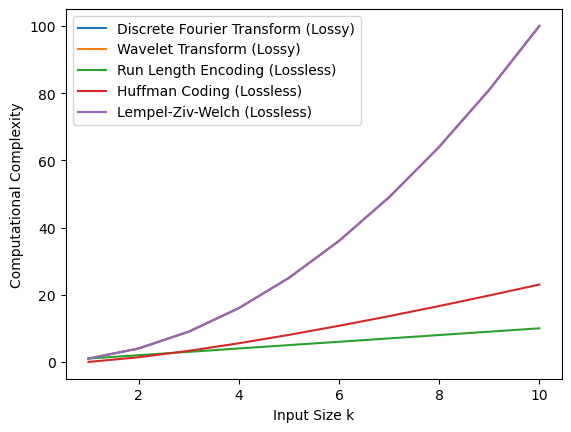

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create arrays of x-values
x = np.arange(1, 11)

# Create arrays of y-values for each function
y1 = x**2
y2 = x**2
y3 = x
y4 = x * np.log(x)
y5 = x**2

# Create plot
plt.plot(x, y1, label="Discrete Fourier Transform (Lossy)")
plt.plot(x, y2, label="Wavelet Transform (Lossy)")
plt.plot(x, y3, label="Run Length Encoding (Lossless)")
plt.plot(x, y4, label="Huffman Coding (Lossless)")
plt.plot(x, y5, label="Lempel-Ziv-Welch (Lossless)")

# Add legend and labels
plt.legend()
plt.xlabel("Input Size k")
plt.ylabel("Computational Complexity")

# Save plot as a PDF file
plt.savefig('plot.pdf')

# Show message
print("Plot saved as a PDF file.")

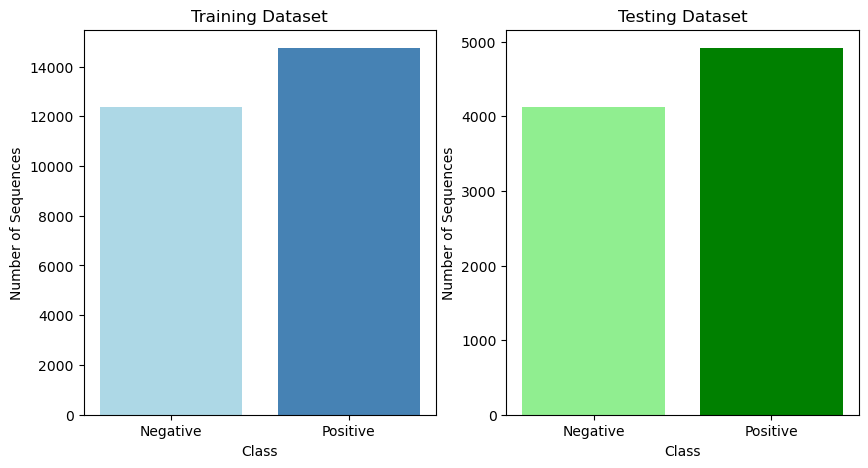

In [15]:
import matplotlib.pyplot as plt

# Define the sizes of each dataset
train_sizes = [12355, 14742]
test_sizes = [4119, 4915]

# Define the labels for each dataset
train_labels = ['Negative', 'Positive']
test_labels = ['Negative', 'Positive']

# Set the colors for each dataset
train_colors = ['lightblue', 'steelblue']
test_colors = ['lightgreen', 'green']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Add the bar charts to each subplot
ax1.bar(train_labels, train_sizes, color=train_colors)
ax2.bar(test_labels, test_sizes, color=test_colors)

# Add titles and axis labels to each subplot
ax1.set_title('Training Dataset')
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Sequences')
ax2.set_title('Testing Dataset')
ax2.set_xlabel('Class')
ax2.set_ylabel('Number of Sequences')

# Display the plot
plt.show()
